# CORONA Pandemic  - Analysis

This analysis deals with Time Series Data of all the countries, Provinces affected by Corona Pandemic.

The Confirmed Cases as well as the Fatality has been recorded.

# THE ANALYSIS

1. World Wide Data Analysis
2. Country Wide Data Analysis
3. Province-wise Data Analysis
4. Death Rate Calculation
5. Weighted Death Rate Calculation
6. New Cases/Day for each province
7. Forecast World-wide as well as Country-wise

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset

In [75]:
w3_df=pd.read_csv('train.csv')

In [77]:
Cases_fat=w3_df.groupby(['Country_Region','Province_State','Date'])['Date','ConfirmedCases','Fatalities'].sum()
Date_Cases=w3_df.groupby('Date')['Province_State','ConfirmedCases','Fatalities'].sum()
country_date_df=w3_df.groupby(['Country_Region','Date'])['Province_State','ConfirmedCases','Fatalities'].sum()

# Data Exploration

In [79]:
Date_Cases.describe().transpose()

count          mean            std    min      25%      50%  \
ConfirmedCases   73.0  186858.09589  258094.020831  554.0  40139.0  82688.0   
Fatalities       73.0    8115.39726   13159.100119   17.0    906.0   2814.0   

                     75%        max  
ConfirmedCases  181505.0  1095739.0  
Fatalities        7126.0    58782.0

In [80]:
Cases_fat.describe().transpose()

count        mean          std  min  25%  50%    75%  \
ConfirmedCases  9490.0  674.313909  5429.694904  0.0  0.0  1.0  125.0   
Fatalities      9490.0   20.333509   213.664627  0.0  0.0  0.0    1.0   

                     max  
ConfirmedCases  102987.0  
Fatalities        3203.0

In [81]:
country_date_df.describe().transpose()

count         mean          std  min  25%  50%   75%  \
ConfirmedCases  13140.0  1038.100533  8464.321813  0.0  0.0  0.0  16.0   
Fatalities      13140.0    45.085540   474.122661  0.0  0.0  0.0   0.0   

                     max  
ConfirmedCases  275426.0  
Fatalities       14681.0

# World Wise Analytics

In [82]:
from datetime import datetime
des_Cases_fat1=w3_df
des_Cases_fat1.index=pd.to_datetime(des_Cases_fat1['Date'])

In [83]:
des_Cases_fat1=des_Cases_fat1['2020-04-03'].groupby(['Country_Region']).sum()

In [84]:
des_Cases_fat1

Id  ConfirmedCases  Fatalities
Country_Region                                       
Afghanistan            73           281.0         6.0
Albania               180           304.0        17.0
Algeria               287          1171.0       105.0
Andorra               394           439.0        16.0
Angola                501             8.0         2.0
...                   ...             ...         ...
Venezuela           32280           153.0         7.0
Vietnam             32387           237.0         0.0
West Bank and Gaza  32494           194.0         1.0
Zambia              32601            39.0         1.0
Zimbabwe            32708             9.0         1.0

[180 rows x 3 columns]

In [85]:
des_Cases_fat=des_Cases_fat1.sort_values('ConfirmedCases', ascending=False)

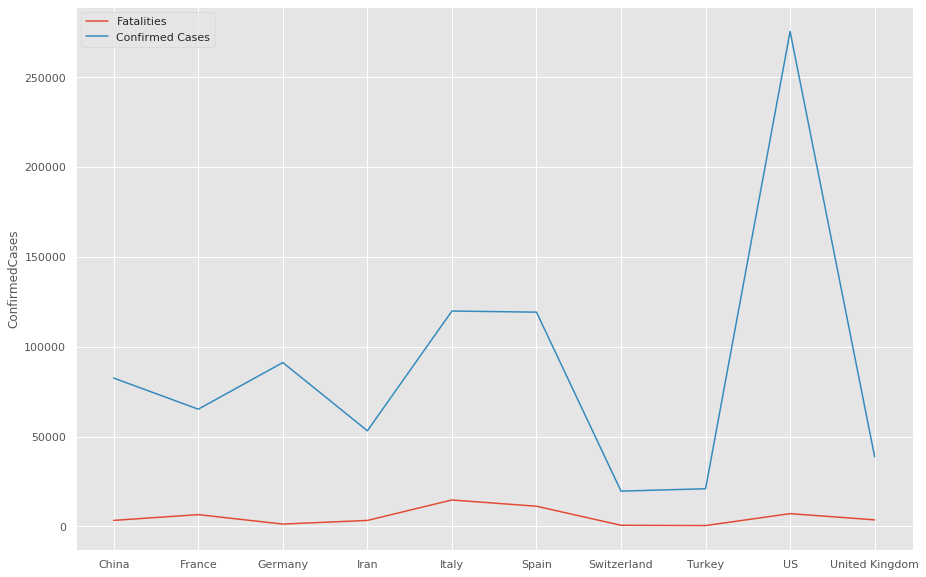

In [86]:
#NEEDS CHANGES
sns.lineplot(x=des_Cases_fat.index.values[:10],y=des_Cases_fat['Fatalities'][:10],label='Fatalities')
sns.lineplot(x=des_Cases_fat.index.values[:10],y=des_Cases_fat['ConfirmedCases'][:10],label='Confirmed Cases')
#plt.figure(figsize=(16,10))
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(16.7,10.27)})

In [87]:
des_Cases_fat

Id  ConfirmedCases  Fatalities
Country_Region                                                       
US                                1497555        275426.0      7083.0
Italy                               15588        119827.0     14681.0
Spain                               23292        119199.0     11198.0
Germany                             13555         91159.0      1275.0
China                              249579         82511.0      3326.0
...                                   ...             ...         ...
Burundi                              3818             3.0         0.0
Saint Vincent and the Grenadines    22008             3.0         0.0
Sierra Leone                        22650             2.0         0.0
Papua New Guinea                    20724             1.0         0.0
Timor-Leste                         24362             1.0         0.0

[180 rows x 3 columns]

Text(0.5, 1.0, 'Distribition of fatalities across the world')

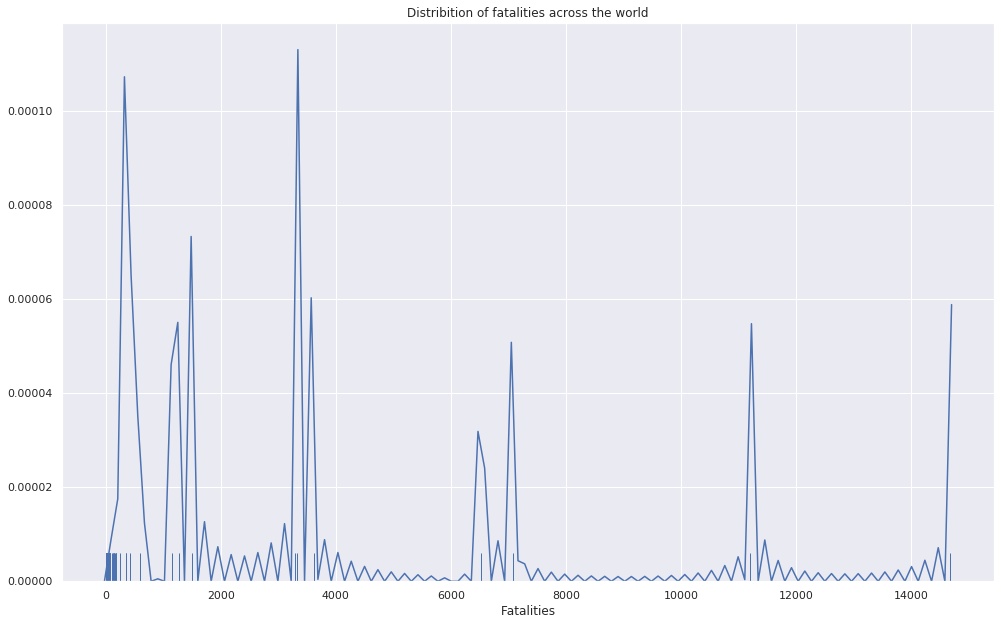

In [88]:
# Distribution plot of Fatalities
#NEEDS CHANGES
sns.distplot(des_Cases_fat['Fatalities'], hist=False, rug=True)
plt.title('Distribition of fatalities across the world')

Text(0.5, 1.0, 'Distribution of Confirmed Cases Across the wolrd')

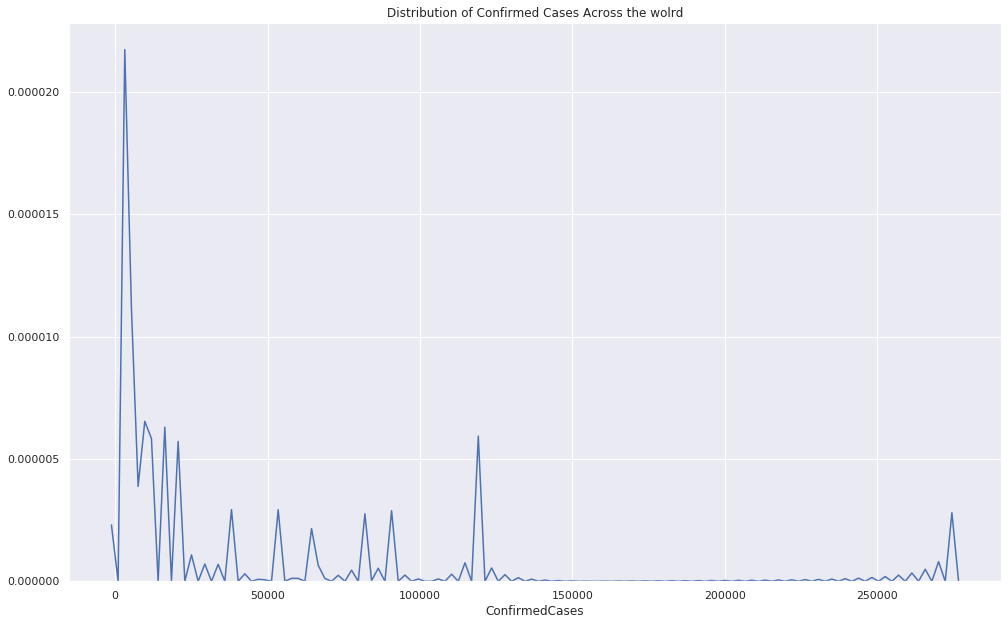

In [89]:
sns.distplot(des_Cases_fat['ConfirmedCases'], hist=False, rug=False)
plt.title('Distribution of Confirmed Cases Across the wolrd')

Text(0.5, 1.0, 'Day By Day increase in the number of cases')

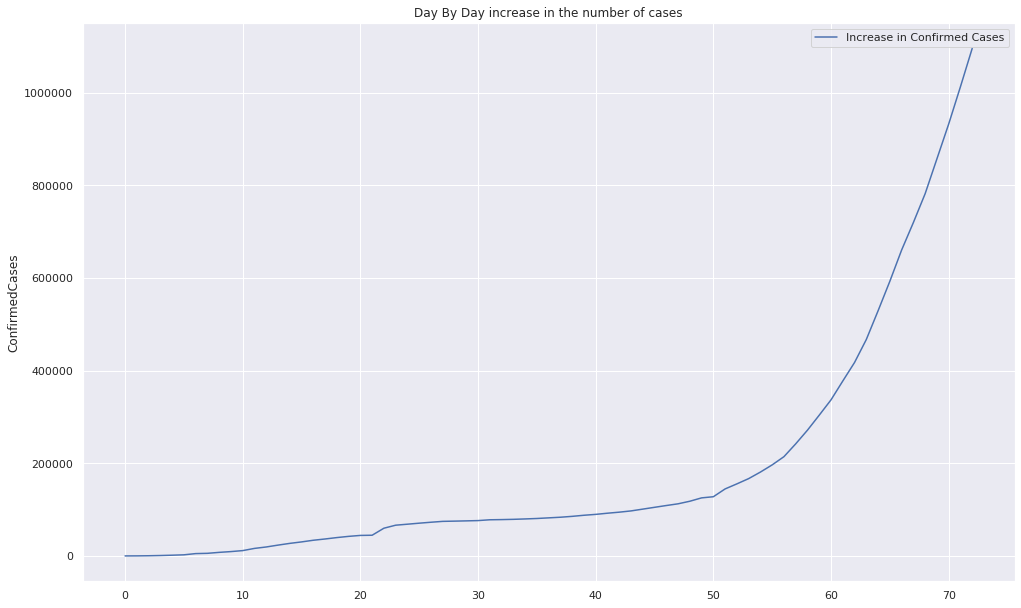

In [90]:
# Line graph to show Days vs Confirmed Cases
days=[i for i in range(len(Date_Cases.index.values))]
sns.lineplot(x=days, y=Date_Cases['ConfirmedCases'],label='Increase in Confirmed Cases')
plt.title('Day By Day increase in the number of cases')


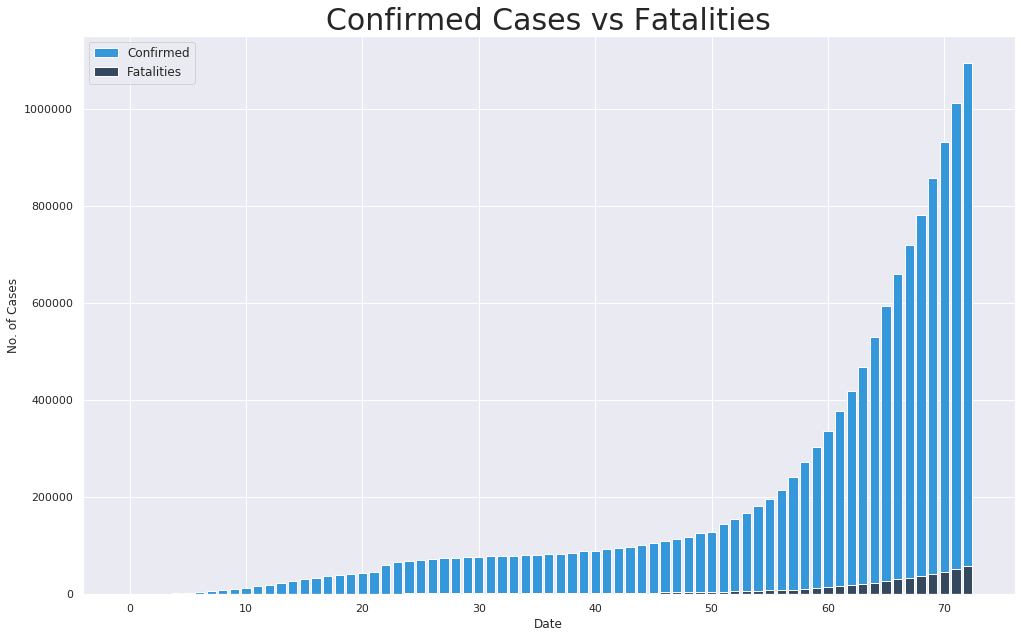

<Figure size 1202.4x739.44 with 0 Axes>

In [91]:
plt.bar(days, Date_Cases['ConfirmedCases'],label="Confirmed", color='#3498db')
plt.bar(days, Date_Cases['Fatalities'],label="Fatalities",color='#34495e')
plt.xlabel('Date')
plt.ylabel("No. of Cases")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases vs Fatalities',fontsize=30)
plt.show()
plt.savefig('Confirmed Cases vs Fatalities.png')

In [92]:
w3_df_date=w3_df.set_index('Date')
w3_df_date_count=w3_df_date.loc['2020-04-03'].groupby(['Country_Region','Province_State'])['ConfirmedCases','Fatalities'].sum()
w3_df_date_count

ConfirmedCases  Fatalities
Country_Region Province_State                                          
Australia      Australian Capital Territory            91.0         1.0
               New South Wales                       2389.0        12.0
               Northern Territory                      22.0         0.0
               Queensland                             873.0         4.0
               South Australia                        396.0         0.0
...                                                     ...         ...
United Kingdom Channel Islands                        232.0         4.0
               Gibraltar                               95.0         0.0
               Isle of Man                            114.0         1.0
               Montserrat                               6.0         0.0
               Turks and Caicos Islands                 5.0         0.0

[130 rows x 2 columns]

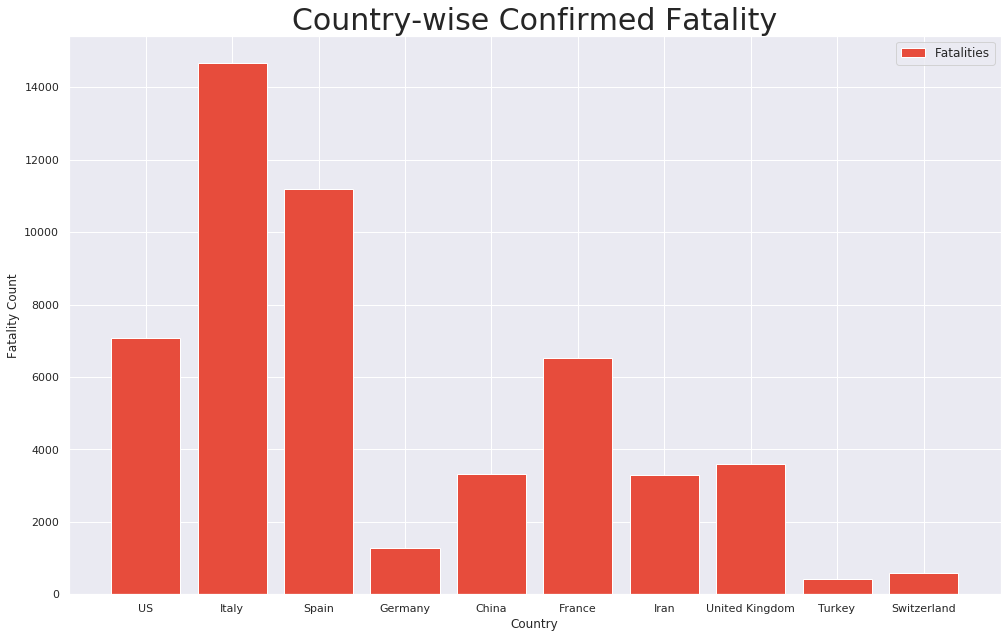

In [93]:
#NEEDS CHANGES
plt.bar(des_Cases_fat.index.values[:10],des_Cases_fat['Fatalities'][:10], label='Fatalities', color='#e74c3c')
#plt.bar(des_Cases_fat.index.values[:10],des_Cases_fat['ConfirmedCases'][:10],label='Confirmed Cases',color='yellow')
plt.xlabel('Country')
plt.ylabel("Fatality Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Country-wise Confirmed Fatality',fontsize=30)
plt.show()



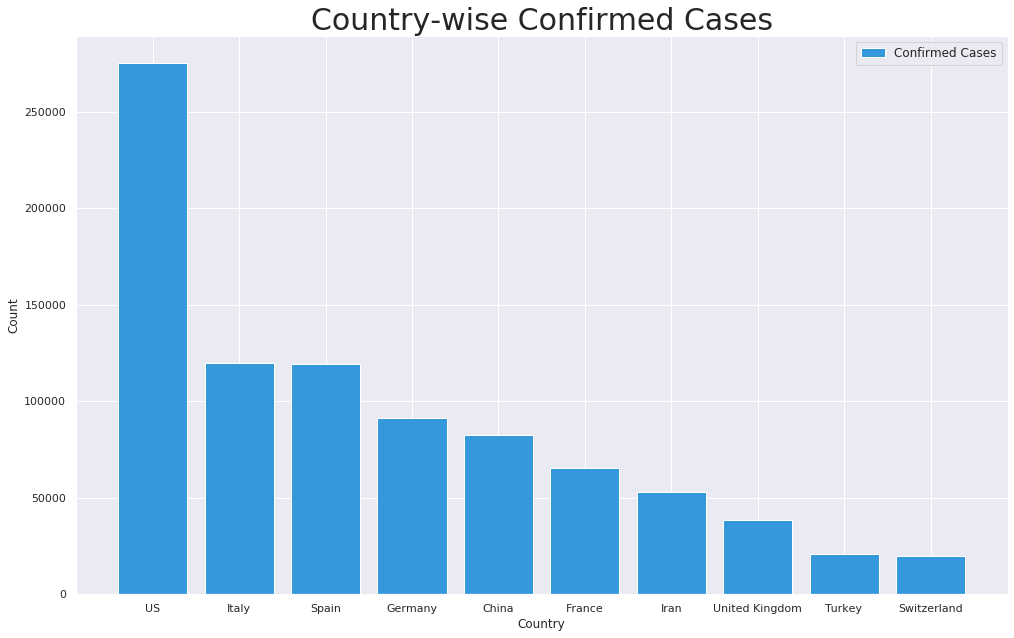

In [94]:
#plt.bar(des_Cases_fat.index.values[:10],des_Cases_fat['Fatalities'][:10], label='Fatalities', color='blue')
plt.bar(des_Cases_fat.index.values[:10],des_Cases_fat['ConfirmedCases'][:10],label='Confirmed Cases',color='#3498db')
plt.xlabel('Country')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Country-wise Confirmed Cases',fontsize=30)
plt.savefig('Country-wise Confirmed Cases.png')
plt.show()

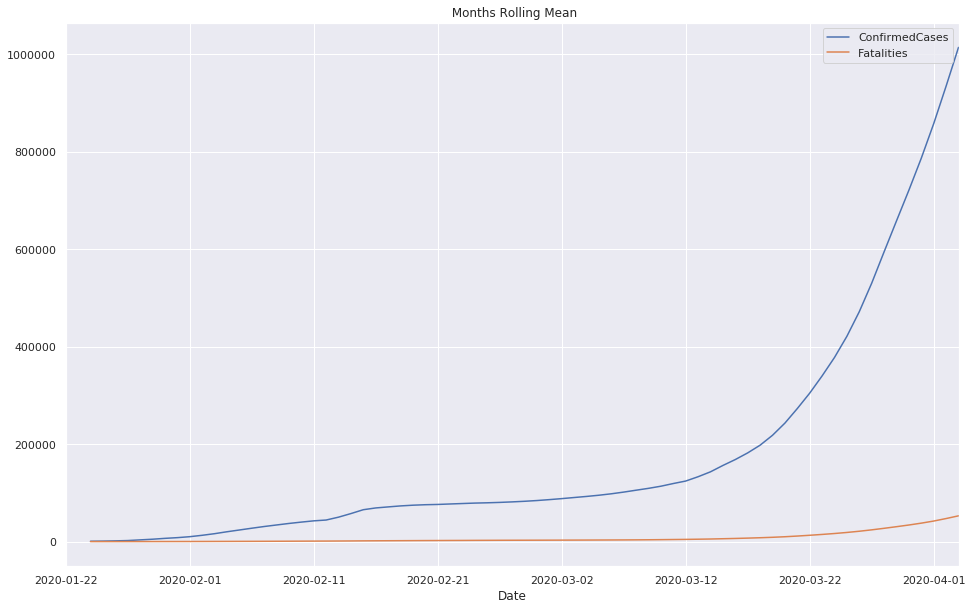

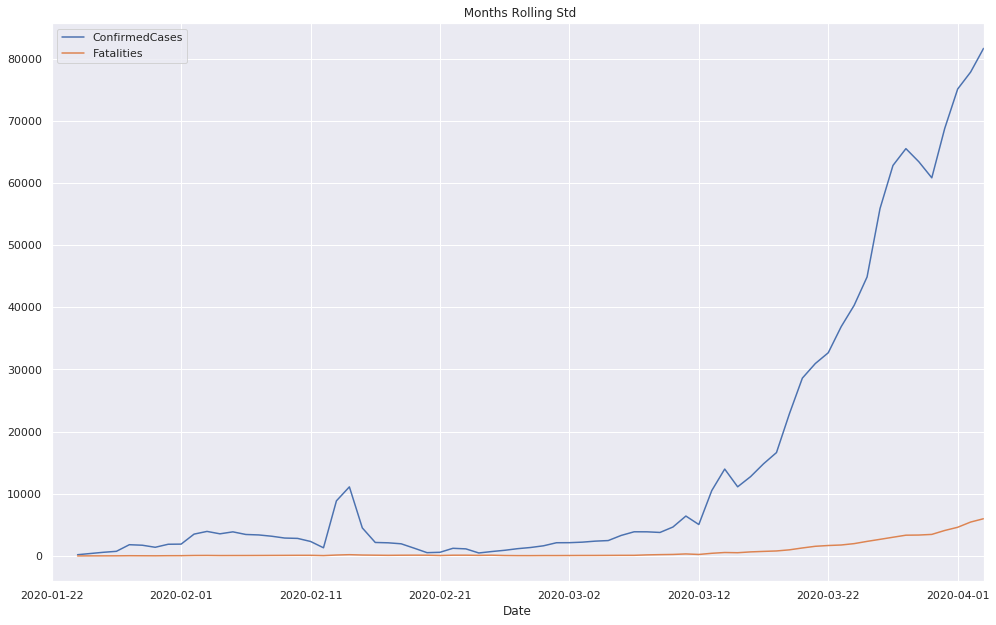

In [95]:
Date_Cases.rolling(3).mean().plot(label = '3 Days Rolling Mean', figsize = (16,10))
plt.title(' Months Rolling Mean')
Date_Cases.rolling(3).std().plot(label = '3 Days Rolling Std')
plt.title(' Months Rolling Std')
#des_Cases_fat.plot()
plt.legend();

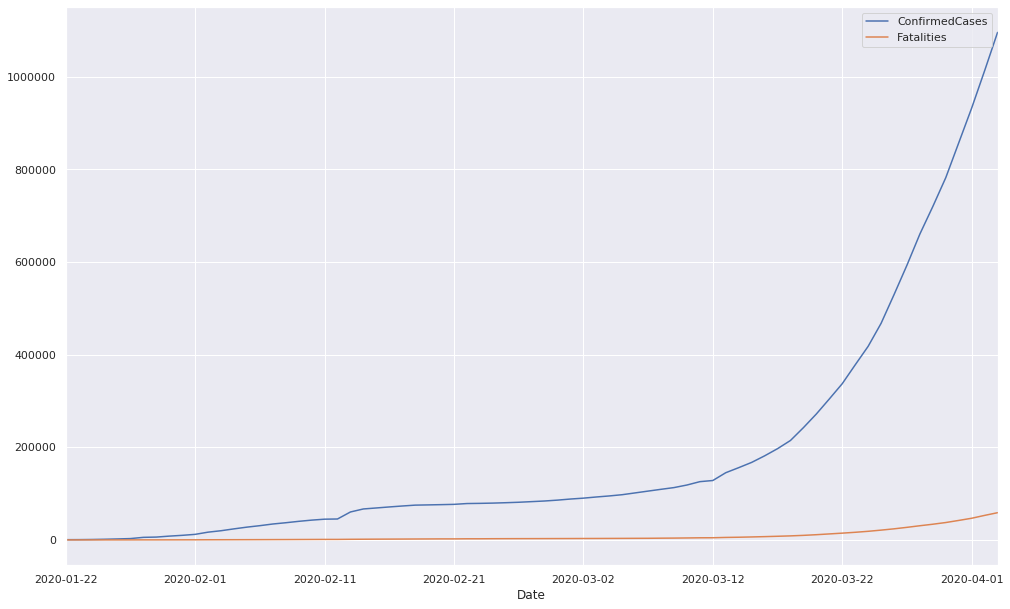

In [96]:
Date_Cases.plot()

Text(0.5, 1.0, 'Kernel Density Estimate of the number of Cases around the world ')

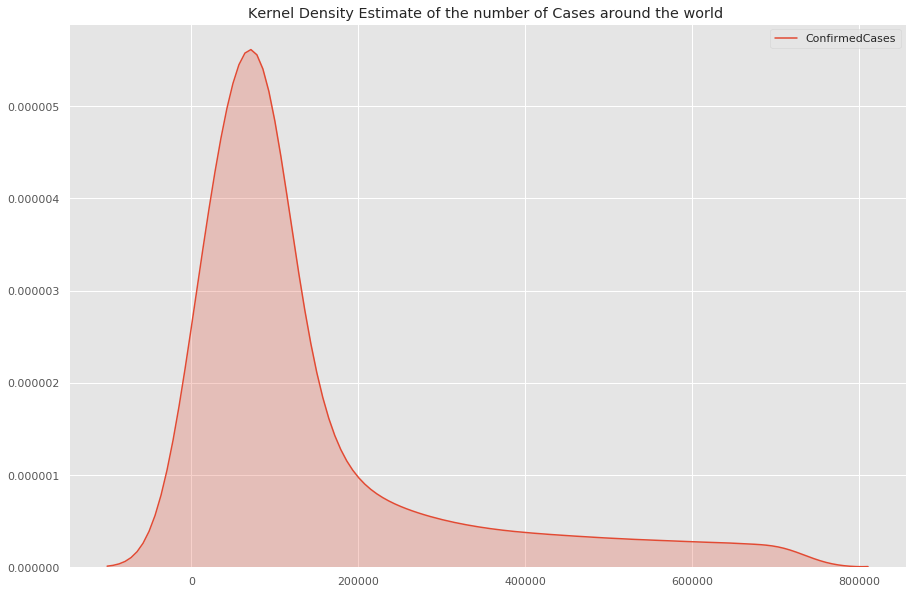

In [182]:
# Kernel Density Estimation of Confirmed Cases
sns.kdeplot(Date_Cases['ConfirmedCases'].rolling(12).mean(), shade=True)
plt.title('Kernel Density Estimate of the number of Cases around the world ')

Text(0.5, 1.0, 'Kernel Density Estimation of Fatalities around the world')

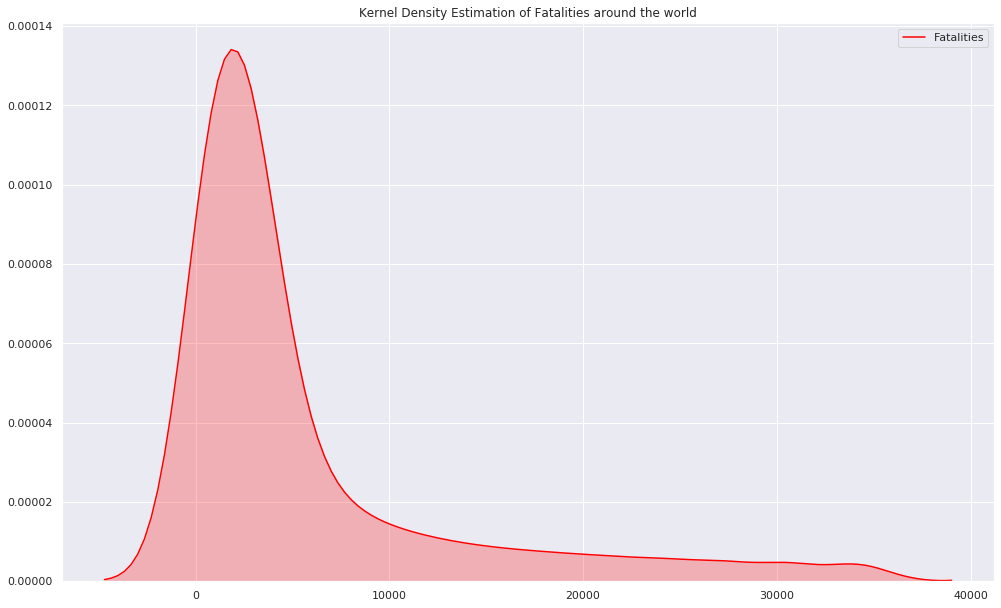

In [98]:
sns.kdeplot(Date_Cases['Fatalities'].rolling(12).mean(), shade=True, color='red')
plt.title('Kernel Density Estimation of Fatalities around the world')

In [99]:
Date_Cases['Death Ratio']=Date_Cases['Fatalities']/Date_Cases['ConfirmedCases']*100

Text(0.5, 1.0, 'Density Distribution of Death Ratio')

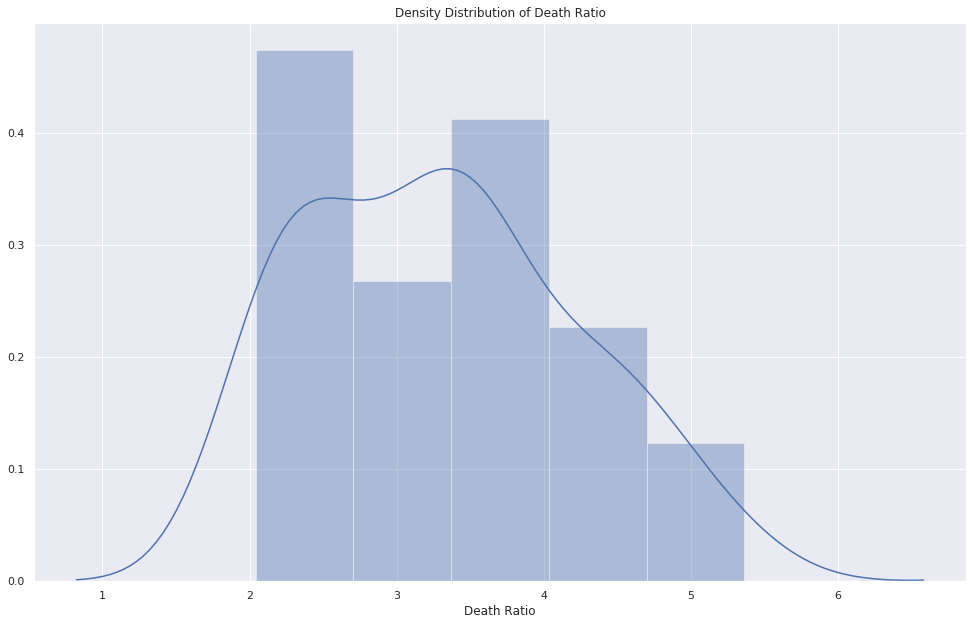

In [100]:
sns.distplot(Date_Cases['Death Ratio'])
plt.title('Density Distribution of Death Ratio')

In [101]:
del w3_df['Date']
df = w3_df.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases','Fatalities'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values(by='ConfirmedCases') \
                          .groupby(['Country_Region']).sum().sort_values(by='ConfirmedCases',ascending = False)

df = pd.DataFrame(df).reset_index()


df = pd.DataFrame(df)

df_new_cases = pd.DataFrame(w3_df.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum() \
                            .reset_index()).sort_values(['Country_Region','Date'])
df_new_cases.ConfirmedCases = df_new_cases.ConfirmedCases.diff().fillna(0)
df_new_cases = df_new_cases.loc[df_new_cases['Date'] == max(df_new_cases['Date']),['Country_Region','ConfirmedCases']]
df_new_cases.rename(columns={"ConfirmedCases": "NewCases"}, inplace=True, errors="raise")

df_new_deaths = pd.DataFrame(w3_df.fillna('NA').groupby(['Country_Region','Date'])['Fatalities'].sum() \
                            .reset_index()).sort_values(['Country_Region','Date'])

df_new_deaths.Fatalities = df_new_deaths.Fatalities.diff().fillna(0)
df_new_deaths = df_new_deaths.loc[df_new_deaths['Date'] == max(df_new_deaths['Date']),['Country_Region','Fatalities']]

df_new_deaths.rename(columns={"Fatalities": "NewFatalities"}, inplace=True, errors="raise")

merged = df.merge(df_new_cases, left_on='Country_Region', right_on='Country_Region')\
            .merge(df_new_deaths, left_on='Country_Region', right_on='Country_Region')


merged.style.background_gradient(cmap="Blues", subset=['ConfirmedCases'])\
            .background_gradient(cmap="Reds", subset=['Fatalities'])\
            .background_gradient(cmap="Blues", subset=['NewCases'])\
            .background_gradient(cmap="Reds", subset=['NewFatalities'])

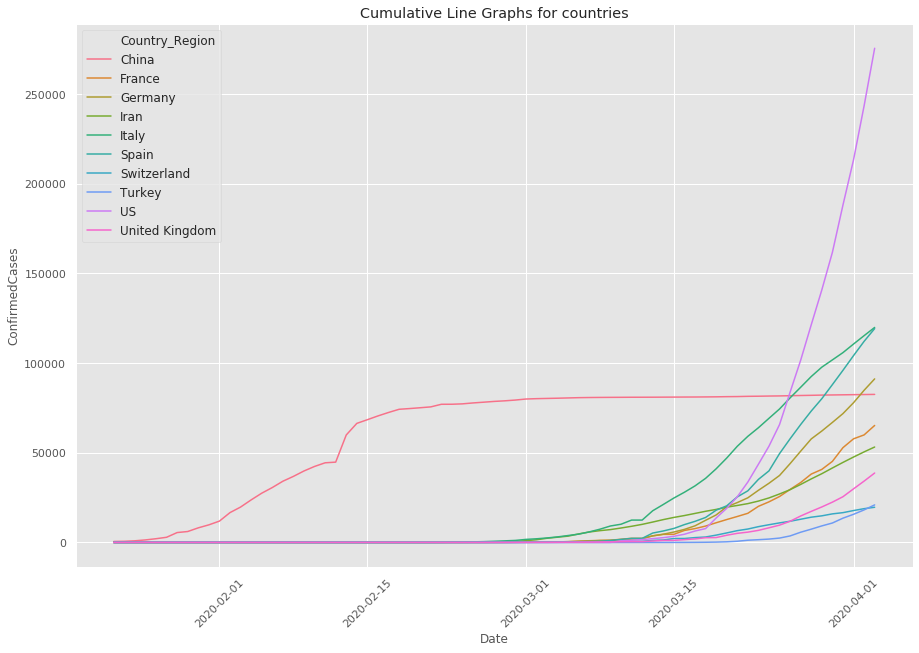

In [102]:
# Remove columns we do not need
cols = ['Fatalities']
times_series_cntr = w3_df.drop(cols, axis=1).fillna('N/A')

# Aggregate cases by date and country
times_series_cntr = times_series_cntr.groupby(['Date','Province_State','Country_Region'])['ConfirmedCases'].max()\
                    .groupby(['Date','Country_Region']).sum()\
                    .reset_index()

# Indexing with Time Series Data
times_series_cntr = times_series_cntr.set_index('Date')

import seaborn as sns
from matplotlib import rcParams, pyplot as plt, style as style

style.use('ggplot')
rcParams['figure.figsize'] = 15,10
country_province = w3_df.fillna('N/A').groupby(['Country_Region','Province_State'])['ConfirmedCases', 'Fatalities'].max().sort_values(by='ConfirmedCases', ascending=False)

countries = country_province.groupby('Country_Region')['ConfirmedCases','Fatalities'].sum().sort_values(by= 'ConfirmedCases',ascending=False)

countries['Country_Region'] = countries.index

# Unpivot the dataframe from wide to long format
df_long = pd.melt(countries, id_vars=['Country_Region'] , value_vars=['ConfirmedCases','Fatalities'])

#Top countries by confirmed cases
top_countries = countries.index[:10]

top_countries_tm = times_series_cntr[times_series_cntr['Country_Region'].isin(top_countries)]
plt.xticks(rotation=45)


ax = sns.lineplot(x=top_countries_tm.index, y="ConfirmedCases", hue="Country_Region", data=top_countries_tm).set_title('Cumulative Line Graphs for countries')
plt.legend(loc=2, prop={'size': 12});

# Death Rate

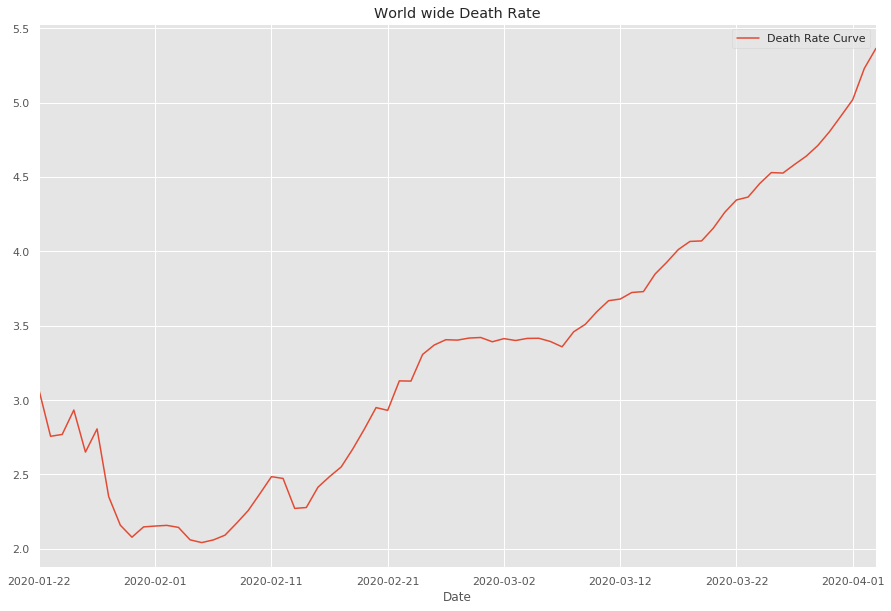

In [103]:
Date_Cases['Death Ratio']=Date_Cases['Fatalities']/Date_Cases['ConfirmedCases']
Date_Cases['Death Ratio']=Date_Cases['Death Ratio']*100
Date_Cases['Death Ratio'].plot(label='Death Rate Curve')
plt.title('World wide Death Rate')
plt.legend()
plt.savefig('World wide Death Rate.png')

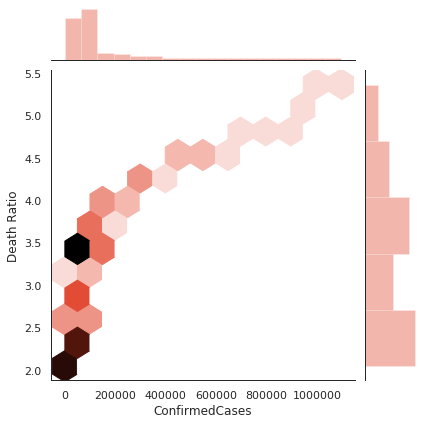

In [104]:
des_Cases_fat['Death Ratio']=np.absolute(des_Cases_fat['Fatalities']/des_Cases_fat['ConfirmedCases'])*100
with sns.axes_style('white'):
    sns.jointplot(Date_Cases["ConfirmedCases"], Date_Cases["Death Ratio"], data=Date_Cases, kind='hex', label='Confirmed Cases')


Text(0.5, 1, 'Naive Death Rate around the world')

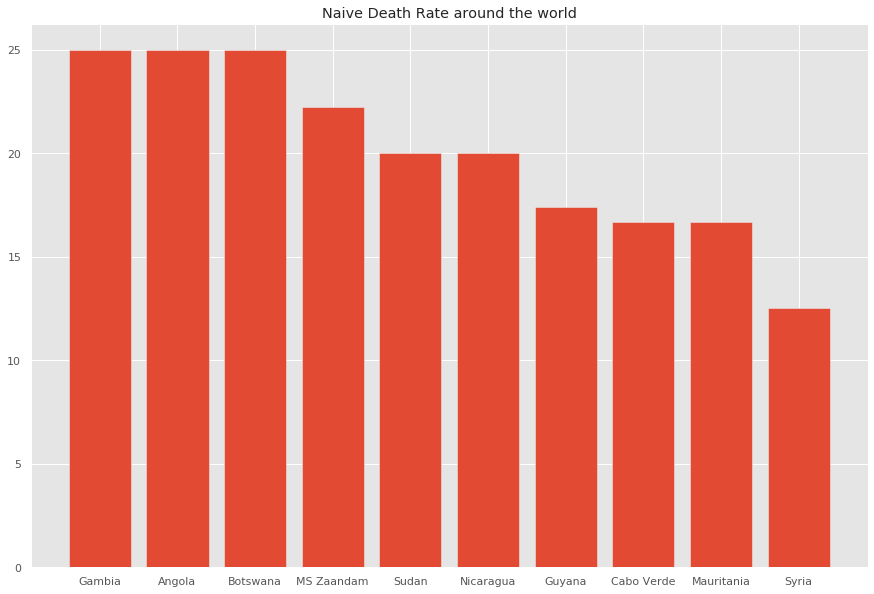

In [105]:
plt.bar(des_Cases_fat.sort_values('Death Ratio', ascending=False)[:10].index,des_Cases_fat.sort_values('Death Ratio', ascending=False)[:10]['Death Ratio'])
plt.savefig('Facts-And-Figs/NaiveDeathRate.png')
plt.title('Naive Death Rate around the world')

In [106]:
des_Cases_fat.sort_values('Death Ratio', ascending=False)[:20]

Id  ConfirmedCases  Fatalities  Death Ratio
Country_Region                                                   
Gambia             13341             4.0         1.0    25.000000
Angola               501             8.0         2.0    25.000000
Botswana            3176             4.0         1.0    25.000000
MS Zaandam         17514             9.0         2.0    22.222222
Sudan              23506            10.0         2.0    20.000000
Nicaragua          19868             5.0         1.0    20.000000
Guyana             14304            23.0         4.0    17.391304
Cabo Verde          3925             6.0         1.0    16.666667
Mauritania         18156             6.0         1.0    16.666667
Syria              23934            16.0         2.0    12.500000
Italy              15588        119827.0     14681.0    12.251830
San Marino         22115           245.0        30.0    12.244898
Zimbabwe           32708             9.0         1.0    11.111111
Suriname           23613            10.0         1.0    10.000000
France            126455         65202.0      6520.0     9.999693
Bangladesh          2213            61.0         6.0     9.836066
Congo (Kinshasa)    9596           134.0        13.0     9.701493
Netherlands        77974         15819.0      1490.0     9.419053
Spain              23292        119199.0     11198.0     9.394374
United Kingdom    314775         38689.0      3611.0     9.333402

# Death Ratio with weights

In [107]:
des_Cases_fat['Death Ratio Weights']=des_Cases_fat['ConfirmedCases']/des_Cases_fat['ConfirmedCases'].sum()
des_Cases_fat['Death Ratio with Weights']=des_Cases_fat['Death Ratio']*des_Cases_fat['Death Ratio Weights']

In [108]:
des_Cases_fat

Id  ConfirmedCases  Fatalities  \
Country_Region                                                          
US                                1497555        275426.0      7083.0   
Italy                               15588        119827.0     14681.0   
Spain                               23292        119199.0     11198.0   
Germany                             13555         91159.0      1275.0   
China                              249579         82511.0      3326.0   
...                                   ...             ...         ...   
Burundi                              3818             3.0         0.0   
Saint Vincent and the Grenadines    22008             3.0         0.0   
Sierra Leone                        22650             2.0         0.0   
Papua New Guinea                    20724             1.0         0.0   
Timor-Leste                         24362             1.0         0.0   

                                  Death Ratio  Death Ratio Weights  \
Country_Region                                                       
US                                   2.571653         2.513610e-01   
Italy                               12.251830         1.093572e-01   
Spain                                9.394374         1.087841e-01   
Germany                              1.398655         8.319408e-02   
China                                4.030978         7.530169e-02   
...                                       ...                  ...   
Burundi                              0.000000         2.737878e-06   
Saint Vincent and the Grenadines     0.000000         2.737878e-06   
Sierra Leone                         0.000000         1.825252e-06   
Papua New Guinea                     0.000000         9.126261e-07   
Timor-Leste                          0.000000         9.126261e-07   

                                  Death Ratio with Weights  
Country_Region                                              
US                                                0.646413  
Italy                                             1.339826  
Spain                                             1.021959  
Germany                                           0.116360  
China                                             0.303539  
...                                                    ...  
Burundi                                           0.000000  
Saint Vincent and the Grenadines                  0.000000  
Sierra Leone                                      0.000000  
Papua New Guinea                                  0.000000  
Timor-Leste                                       0.000000  

[180 rows x 6 columns]

Text(0.5, 1, 'Death Ratio while the number confirmed cases is in consideration')

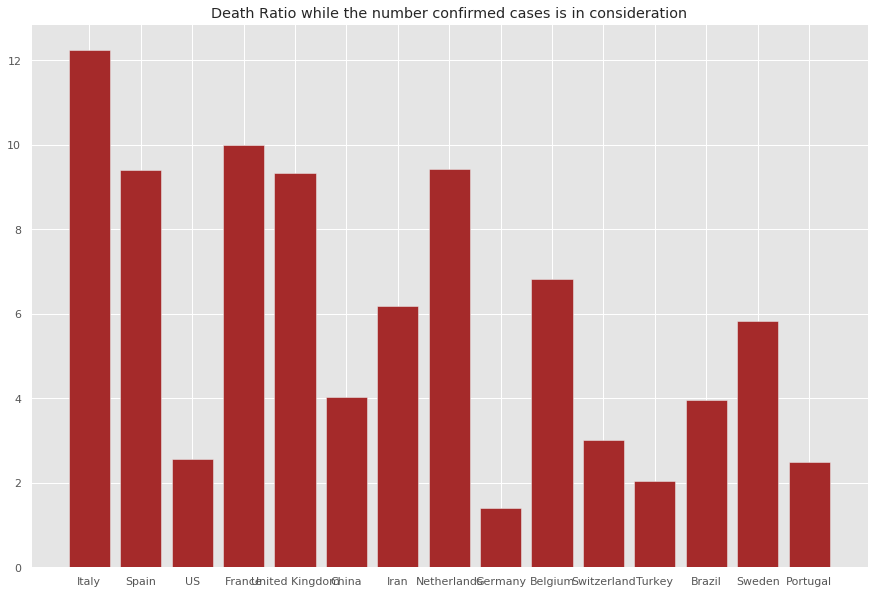

In [109]:
plt.bar(des_Cases_fat.sort_values('Death Ratio with Weights', ascending=False)[:15].index,des_Cases_fat.sort_values('Death Ratio with Weights', ascending=False)[:15]['Death Ratio'], color='brown')
plt.savefig('Facts-And-Figs/Weighted-DeathRatio.png')
plt.title('Death Ratio while the number confirmed cases is in consideration')

# Function to Check Results Country-Wise

In [110]:
def analysis_by_country(w3_df,country):
    frame_list=[]
    country_dict={}
    for i in w3_df['Country_Region'].unique():
        #print(i)
        frame_list.append(w3_df[w3_df['Country_Region']==i])
    
    countries=[i for i in w3_df['Country_Region'].unique()]
    for i in range(len(frame_list)):
        country_dict[countries[i]]=frame_list[i]
 
    plt.bar([i for i in range(len(country_dict[country].reset_index()['Date'].unique()))],country_dict[country].reset_index().groupby('Date')['ConfirmedCases'].sum(), label='Confirmed Cases',color='lightblue')
    plt.bar([i for i in range(len(country_dict[country].reset_index()['Date'].unique()))],country_dict[country].reset_index().groupby('Date')['Fatalities'].sum(), label='Fatality', color='red')
    plt.legend()
    plt.title('%s - Confirmed vs Fatalities' % country)
    plt.show()

    sns.lineplot(x=[i for i in range(len(country_dict[country].groupby('Date').sum().index.values))],y=country_dict[country].groupby('Date').sum()['ConfirmedCases'], color='orange', label='Confirmed Cases')
    sns.lineplot(x=[i for i in range(len(country_dict[country].groupby('Date').sum().index.values))],y=country_dict[country].groupby('Date').sum()['Fatalities'], color='red',label='Fatalities')
    plt.title('%s - Confirmed vs Fatalities Trend' % country)
    plt.show()

    sns.lineplot(x=[i for i in range(len(country_dict[country].groupby('Date').sum().index.values))],y=country_dict[country].groupby('Date').sum()['Fatalities']/country_dict[country].groupby('Date').sum()['ConfirmedCases']*100, color='blue', label='Curve indicating the Death Ratio').set_title('Death Ratio')
    plt.show()

# Analysis for US

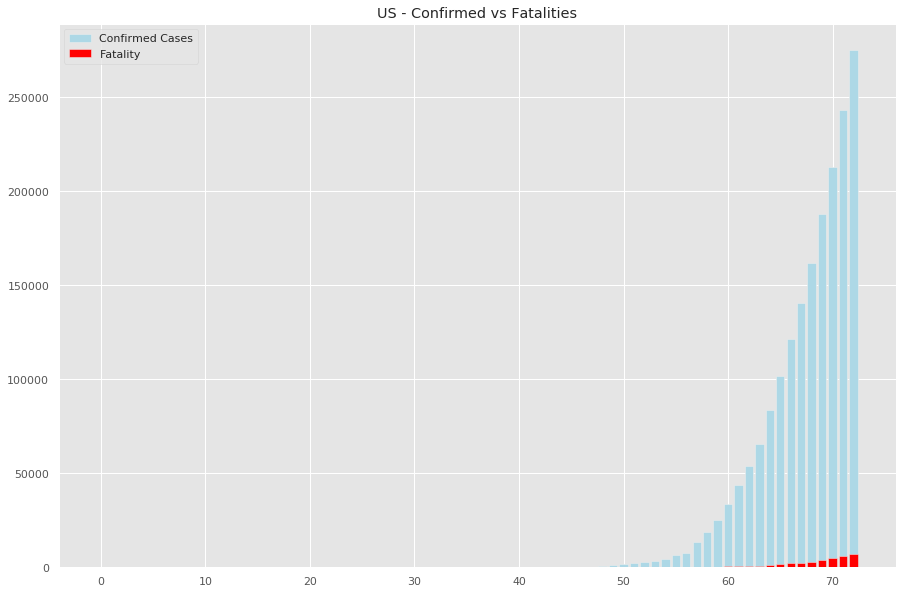

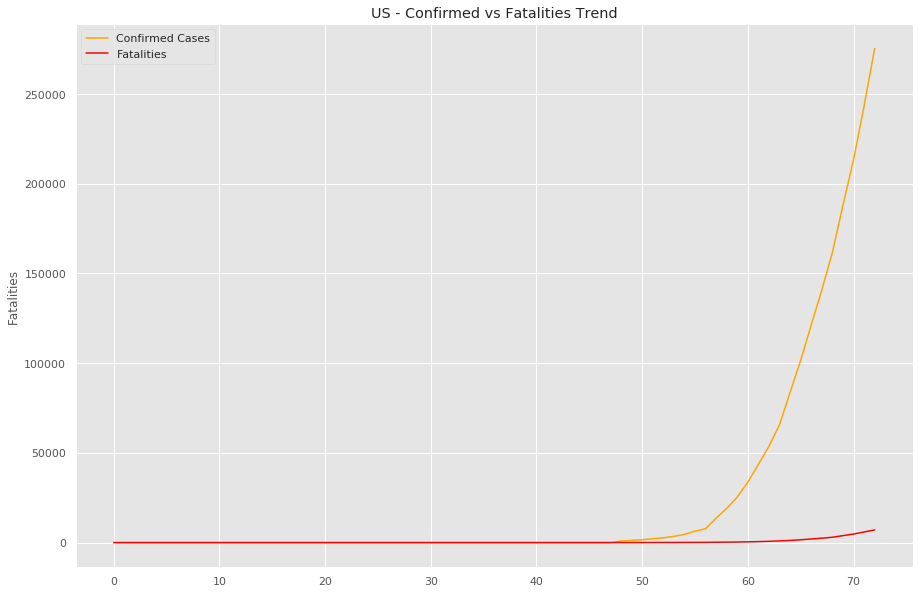

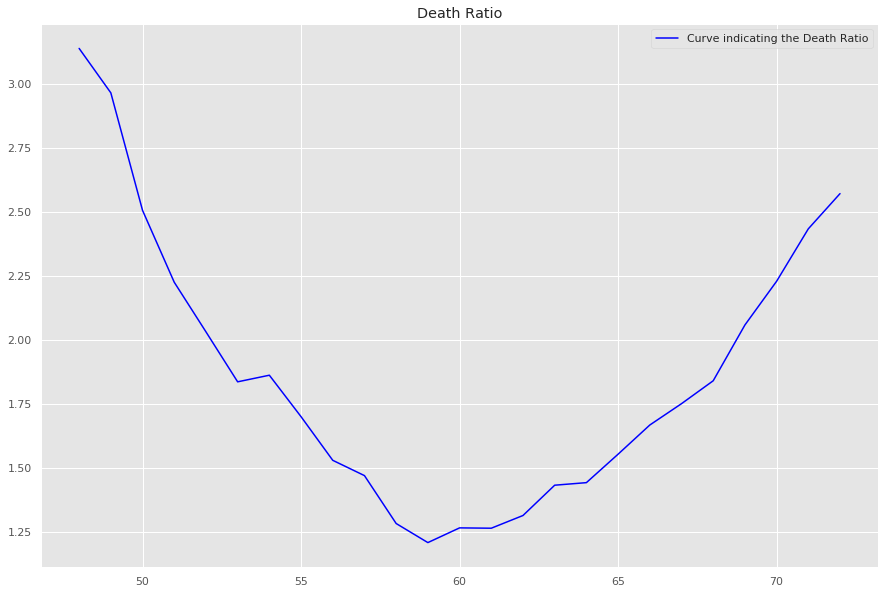

In [111]:
#del w3_df['Date']
analysis_by_country(w3_df,'US')

# Analysis for India

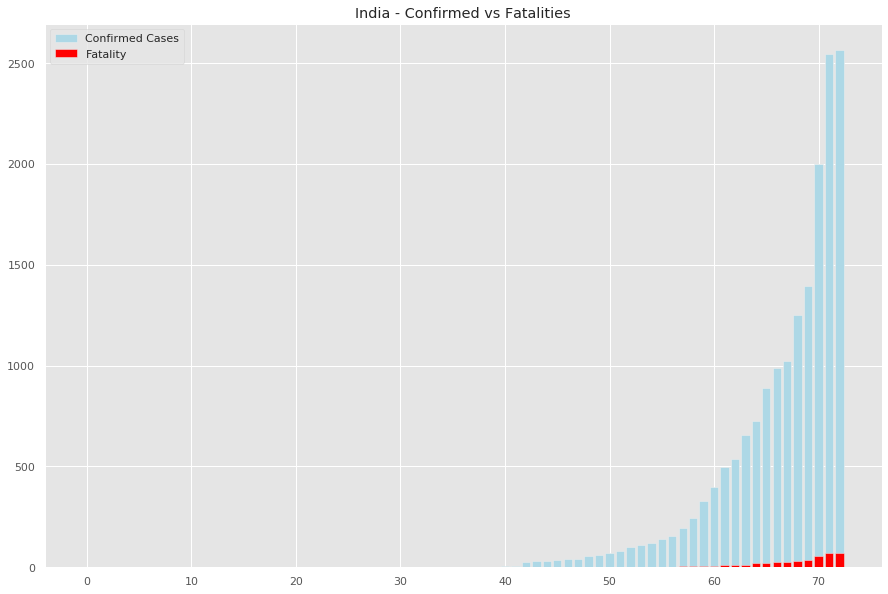

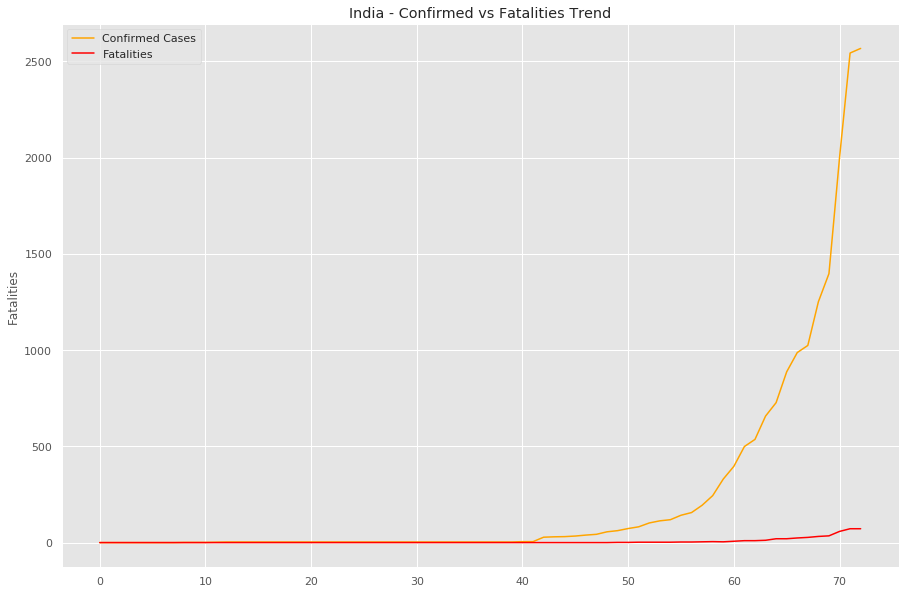

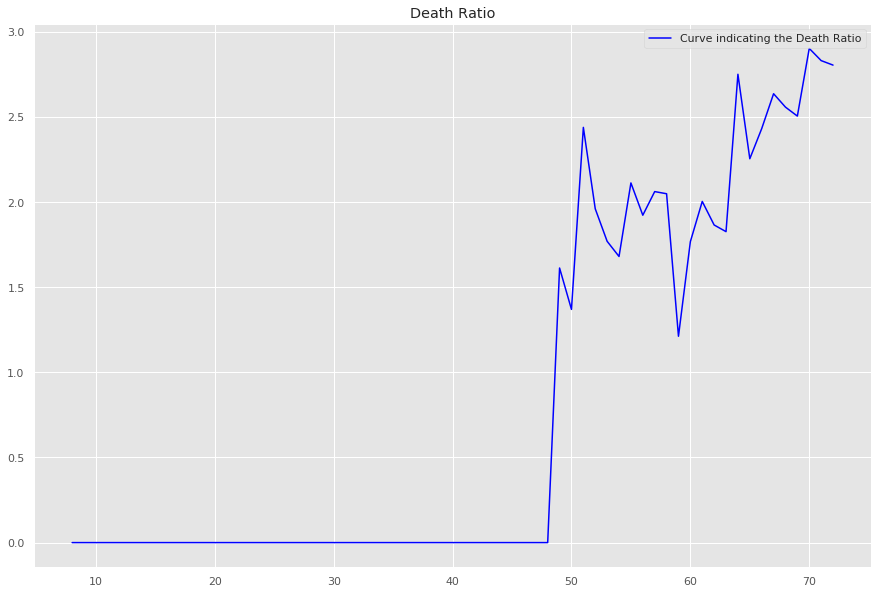

In [112]:
analysis_by_country(w3_df,'India')

# Analysis for Gambia

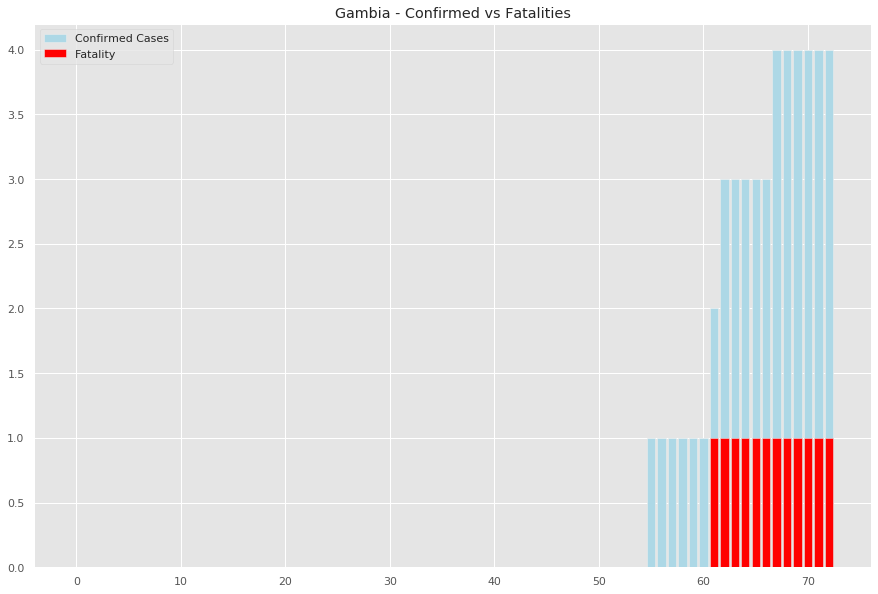

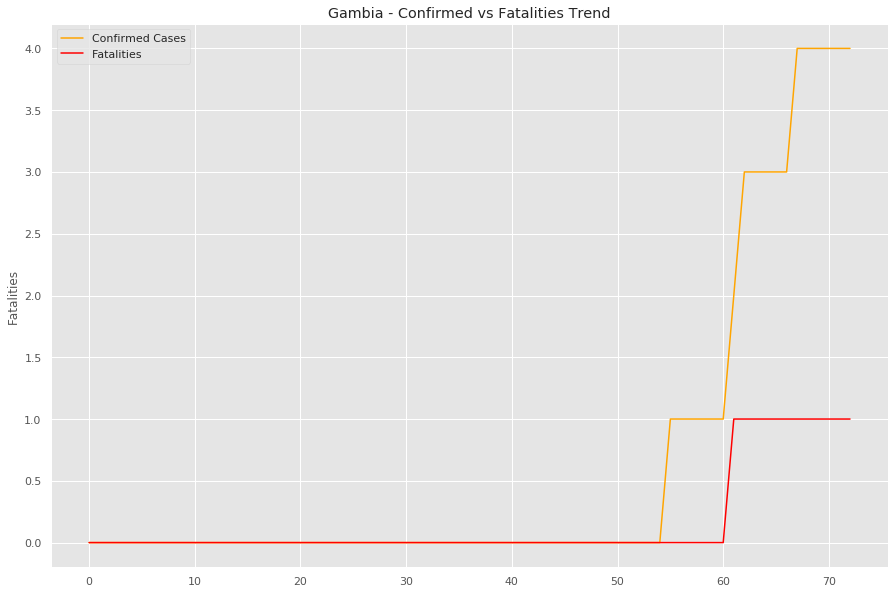

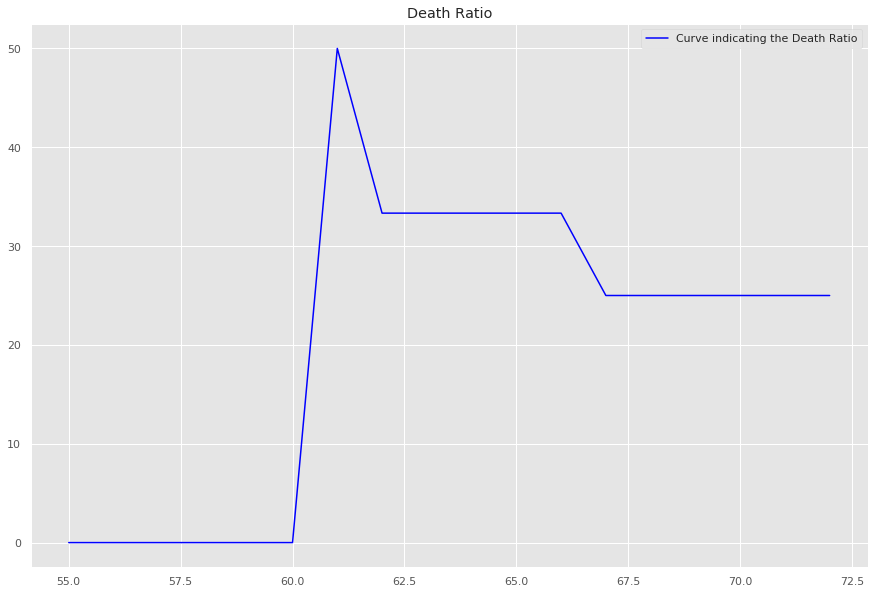

In [113]:
analysis_by_country(w3_df,'Gambia')

# Analysis for Singapore

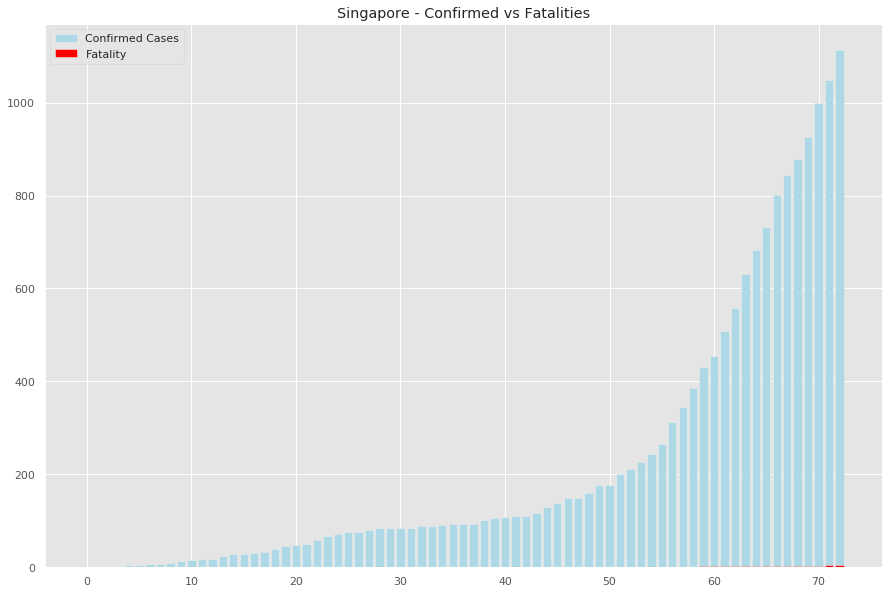

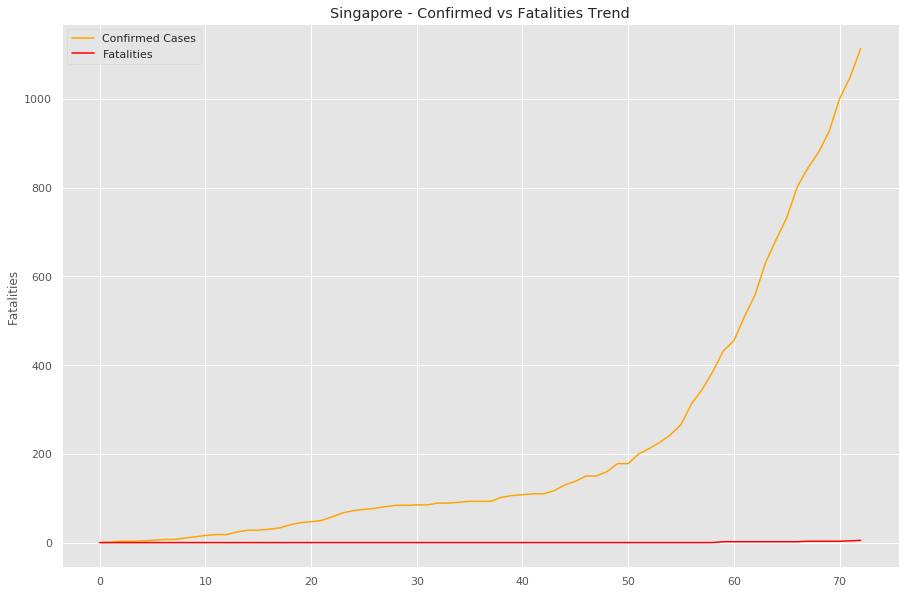

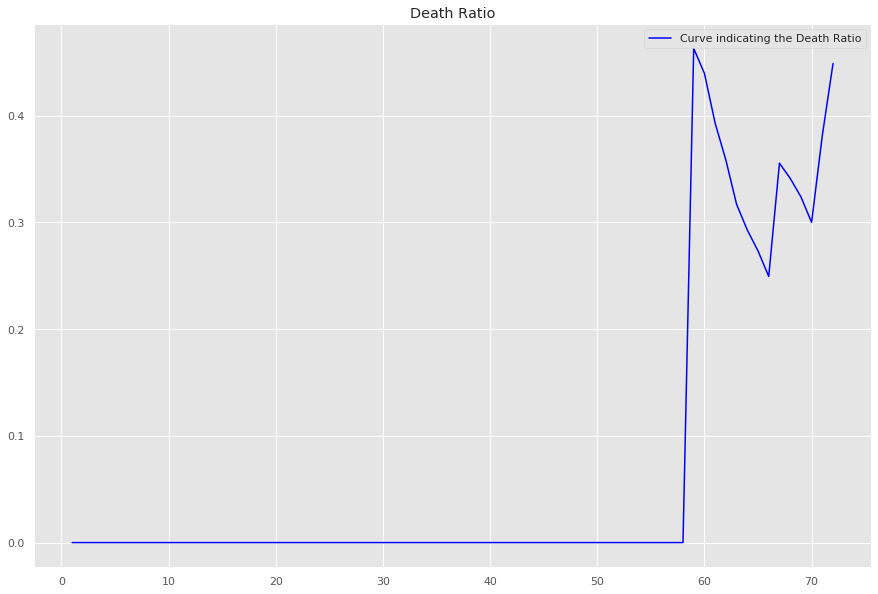

In [114]:
analysis_by_country(w3_df,'Singapore')

# Analysis for Thailand

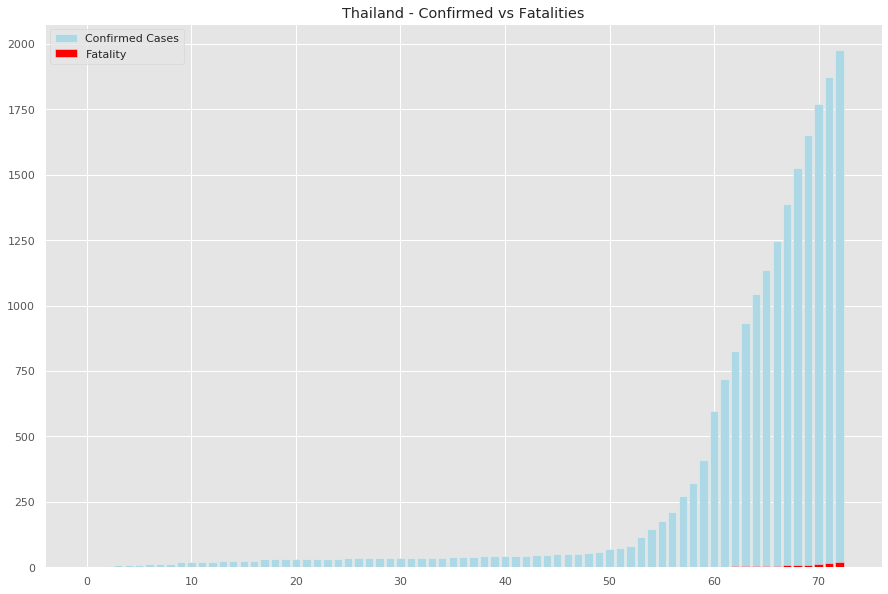

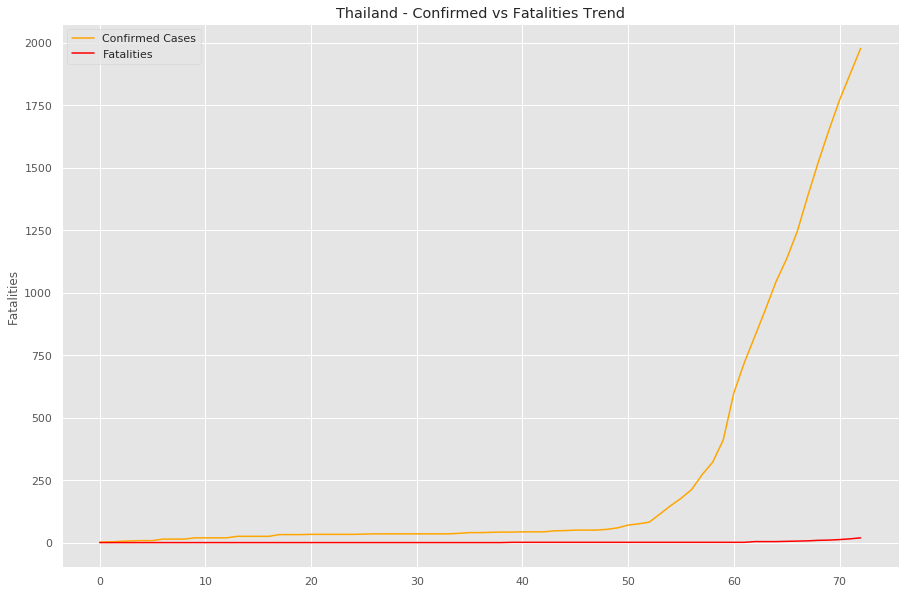

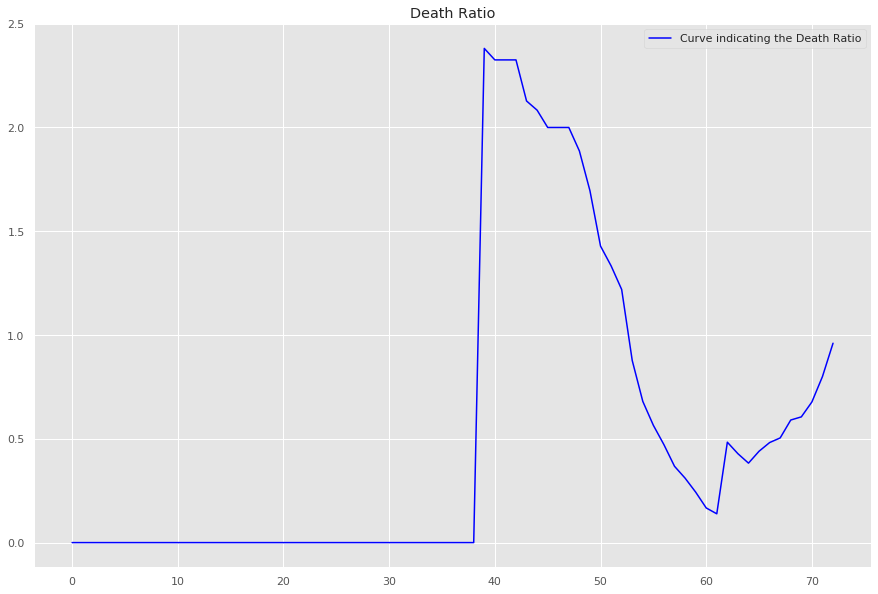

In [115]:
analysis_by_country(w3_df,'Thailand')

# Analysis for S.Korea

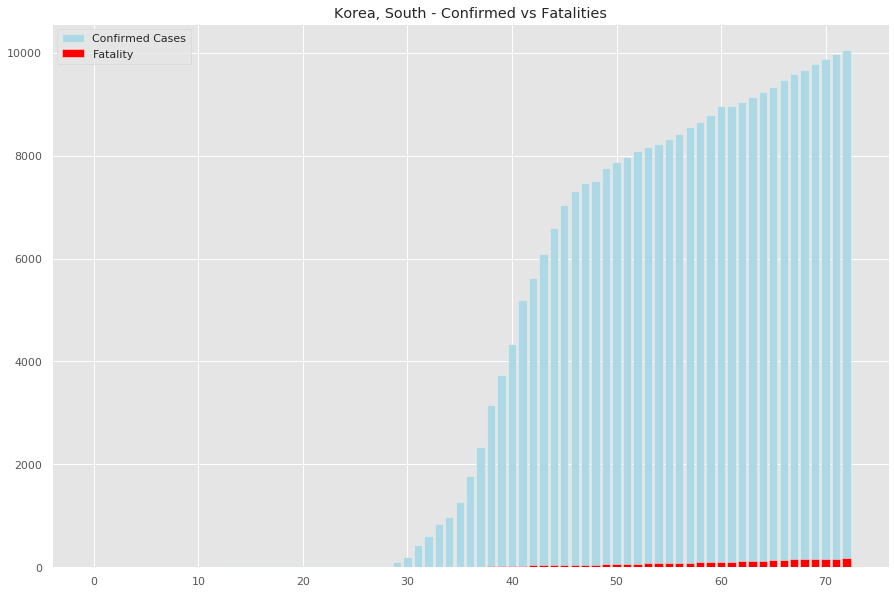

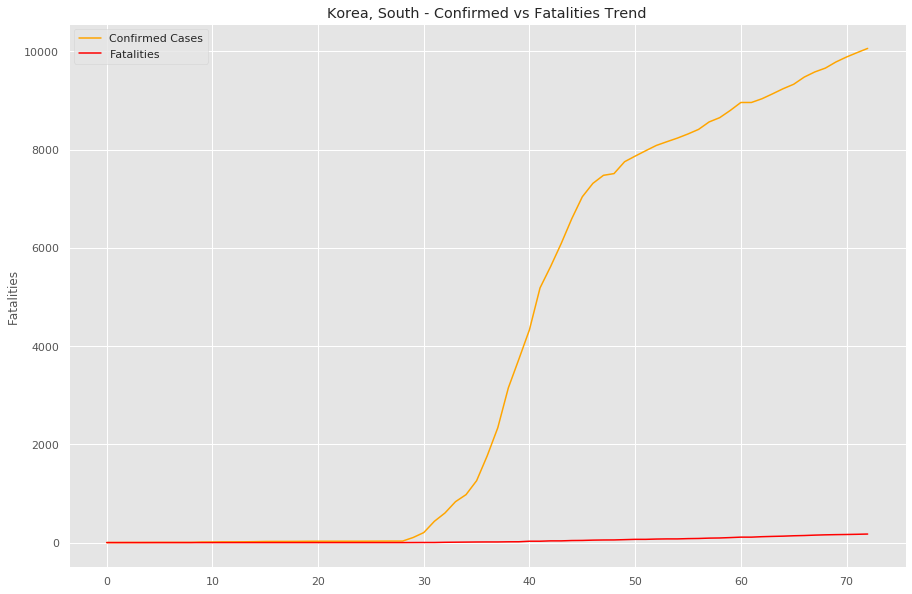

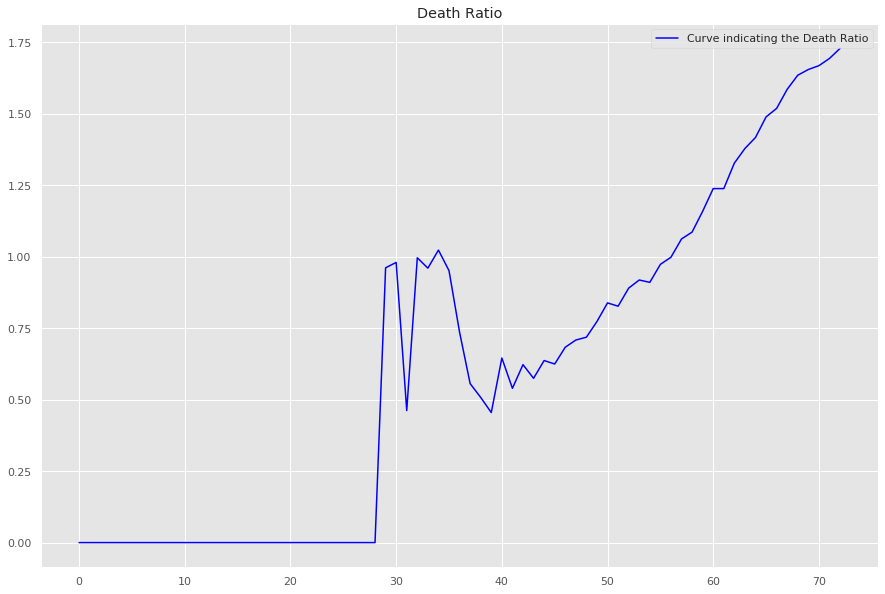

In [116]:
analysis_by_country(w3_df,'Korea, South')

# Analysis for China

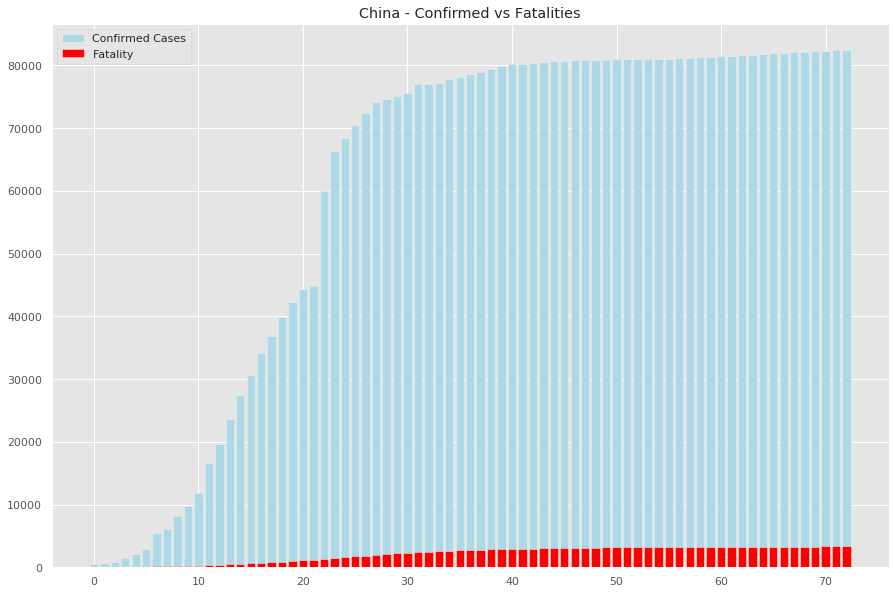

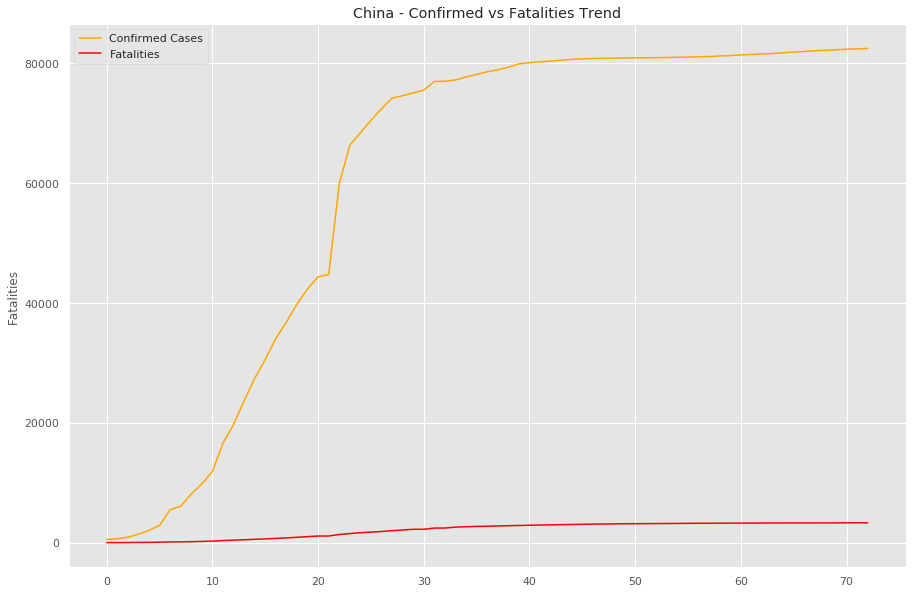

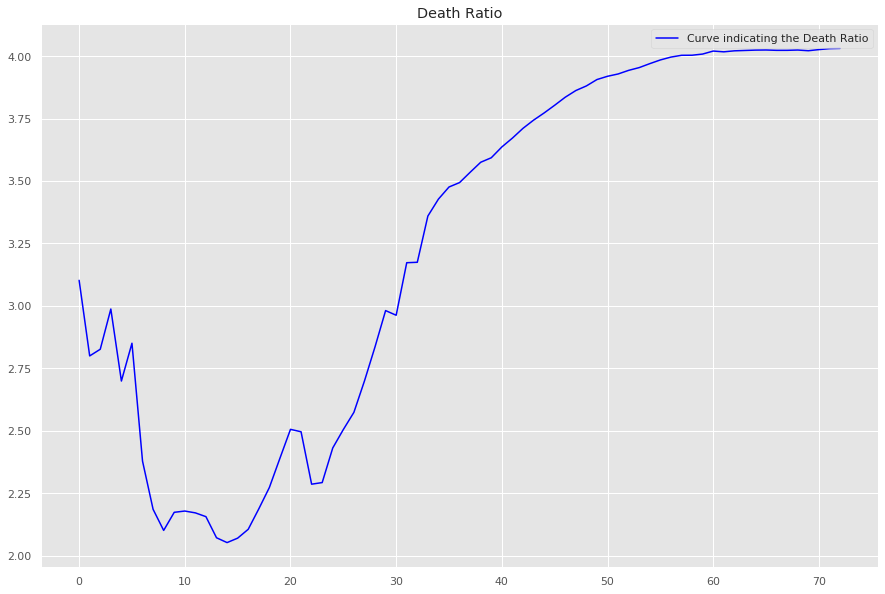

In [117]:
analysis_by_country(w3_df,'China')

# Try to make an interactive map using ipyleaflet - Leaflet JS where when you click a region, it should show the number of cases and trends

In [118]:
country_code=pd.read_csv('country_codes.csv')

In [119]:
country_code=country_code.set_index('Country')

In [120]:
count=0
present=[]
for i in des_Cases_fat.index.values:
    if i in country_code.index.values:
        present.append(i)
        pass
    else:
        #print(i)
        count+=1
print("Number of missing country codes : %s/%s" %(count, len(des_Cases_fat.index.values)))

Number of missing country codes : 34/180


In [121]:
code_dict={}
for i in present:
    #print(i)
    #print(country_code.loc[i]['code'])
    code_dict[country_code.loc[i]['code']]=des_Cases_fat.loc[i]['ConfirmedCases']/des_Cases_fat['ConfirmedCases'].sum()

In [122]:
from pygal_maps_world.maps import World

wm = World()

wm.force_uri_protocol = 'http'

wm.title="corona Affected Regions"

wm.add('Confirmed Cases', code_dict)

#make a range[0-1000,1000-10000,10000-50000,50000-100000,100000+] TO DO

wm.render_to_file('map.svg')

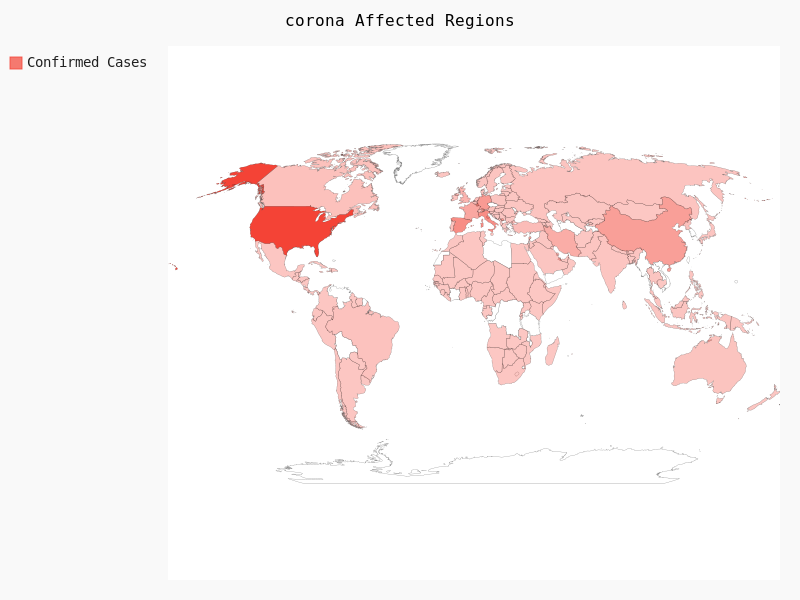

In [123]:
wm

# Province-Wise Analysis 

In [124]:
w3_df_date=w3_df
w3_df_date_count=w3_df_date.loc['2020-04-03'].groupby(['Country_Region','Province_State'])['ConfirmedCases','Fatalities'].sum()
w3_df_date_count

w3_df_date_count['Death Ratio']=w3_df_date_count['Fatalities']/w3_df_date_count['ConfirmedCases']*100
w3_df_date_count['Death Ratio Weights']=w3_df_date_count['ConfirmedCases']/w3_df_date_count['ConfirmedCases'].sum()
w3_df_date_count['Death Ratio with Weights']=w3_df_date_count['Death Ratio']*w3_df_date_count['Death Ratio Weights']
w3_df_date_count=w3_df_date_count.reset_index()
w3_df_date_count=w3_df_date_count.set_index('Province_State')

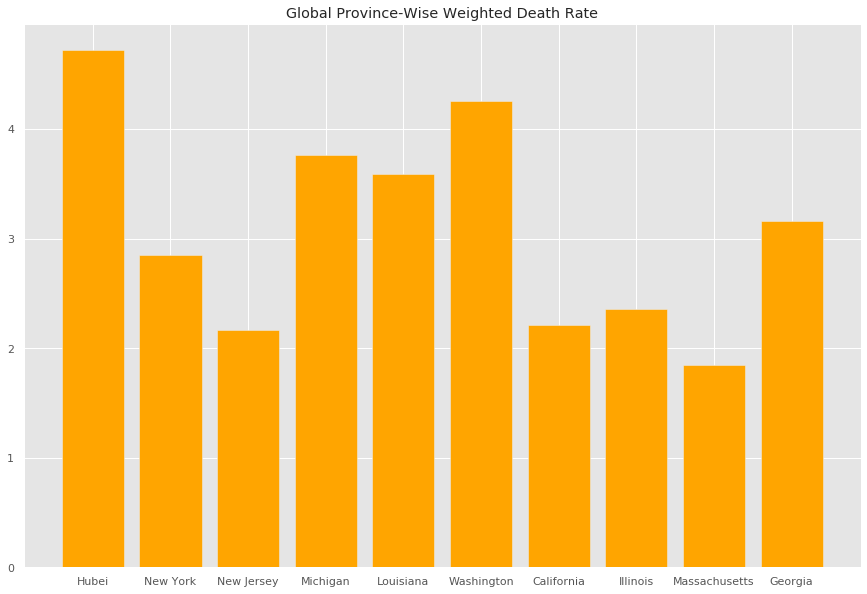

In [125]:
plt.bar(w3_df_date_count.sort_values('Death Ratio with Weights', ascending=False).index.values[:10],w3_df_date_count.sort_values('Death Ratio with Weights', ascending=False)['Death Ratio'][:10], color='orange')
plt.title('Global Province-Wise Weighted Death Rate')
plt.savefig('Facts-And-Figs/Global Province-Wise Weighted Death Rate.png')

In [126]:
w3_df_date_count=w3_df_date_count.reset_index()
w3_df_date_count=w3_df_date_count.set_index('Country_Region')
w3_df_date_count

Province_State  ConfirmedCases  Fatalities  \
Country_Region                                                             
Australia       Australian Capital Territory            91.0         1.0   
Australia                    New South Wales          2389.0        12.0   
Australia                 Northern Territory            22.0         0.0   
Australia                         Queensland           873.0         4.0   
Australia                    South Australia           396.0         0.0   
...                                      ...             ...         ...   
United Kingdom               Channel Islands           232.0         4.0   
United Kingdom                     Gibraltar            95.0         0.0   
United Kingdom                   Isle of Man           114.0         1.0   
United Kingdom                    Montserrat             6.0         0.0   
United Kingdom      Turks and Caicos Islands             5.0         0.0   

                Death Ratio  Death Ratio Weights  Death Ratio with Weights  
Country_Region                                                              
Australia          1.098901             0.000241                  0.000265  
Australia          0.502302             0.006331                  0.003180  
Australia          0.000000             0.000058                  0.000000  
Australia          0.458190             0.002313                  0.001060  
Australia          0.000000             0.001049                  0.000000  
...                     ...                  ...                       ...  
United Kingdom     1.724138             0.000615                  0.001060  
United Kingdom     0.000000             0.000252                  0.000000  
United Kingdom     0.877193             0.000302                  0.000265  
United Kingdom     0.000000             0.000016                  0.000000  
United Kingdom     0.000000             0.000013                  0.000000  

[130 rows x 6 columns]

# Province-wise Death Ratio and Confirmed vs Fatalities

In [127]:
def province_wise_deathratio(w3_df,country):
    w3_df_date=w3_df
    w3_df_date_count=w3_df_date.loc['2020-04-03'].groupby(['Country_Region','Province_State'])['ConfirmedCases','Fatalities'].sum()

    w3_df_date_count['Death Ratio']=w3_df_date_count['Fatalities']/w3_df_date_count['ConfirmedCases']*100
    w3_df_date_count['Death Ratio Weights']=w3_df_date_count['ConfirmedCases']/w3_df_date_count['ConfirmedCases'].sum()
    w3_df_date_count['Death Ratio with Weights']=w3_df_date_count['Death Ratio']*w3_df_date_count['Death Ratio Weights']
    w3_df_date_count=w3_df_date_count.reset_index()
    w3_df_date_count=w3_df_date_count.set_index('Province_State')
    
    w3_df_date_count=w3_df_date_count.reset_index()
    w3_df_date_count=w3_df_date_count.set_index('Country_Region')
    
    plt.bar(w3_df_date_count.loc[country].sort_values(['Death Ratio with Weights'],ascending=False)['Province_State'][:10],w3_df_date_count.loc[country].sort_values(['Death Ratio with Weights'], ascending=False)['Death Ratio'][:10],color='Grey', label='State-wise death rate')
    plt.title('Province-wise Death Rate in {}'.format(country))
    plt.legend()
    plt.show()
           
    plt.bar(w3_df_date_count.loc[country].sort_values(['ConfirmedCases'],ascending=False)['Province_State'][:10],w3_df_date_count.loc[country].sort_values(['ConfirmedCases'],ascending=False)['ConfirmedCases'][:10], color='Yellow',label='Number of confirmed Cases')
    plt.bar(w3_df_date_count.loc[country].sort_values(['ConfirmedCases'],ascending=False)['Province_State'][:10],w3_df_date_count.loc['US'].sort_values(['ConfirmedCases'],ascending=False)['Fatalities'][:10], color='red', label='Number of Fatalities')
    plt.legend()
    plt.title('Province-wise Confirmed vs Fatalities in {}'.format(country))
    plt.show()

# Province-Wise Analysis for Canada 

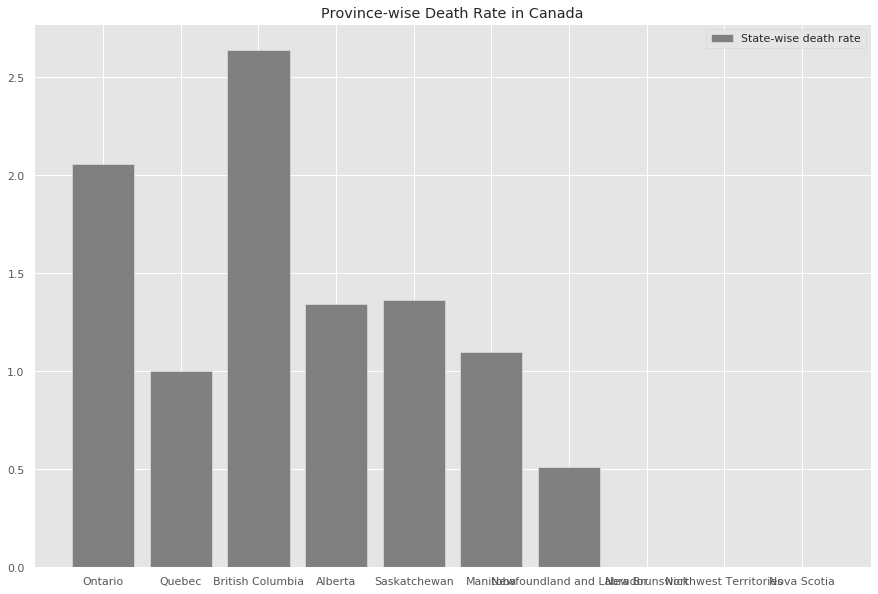

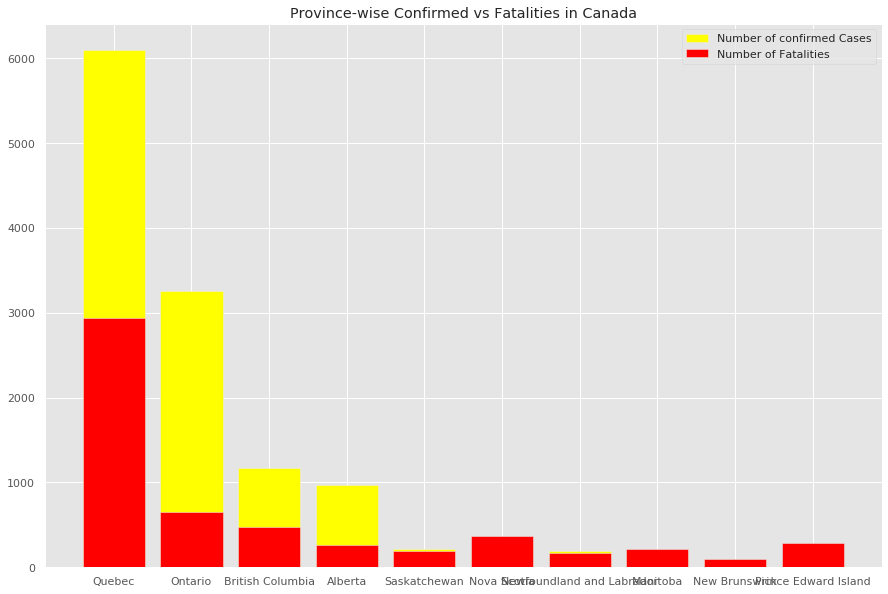

In [128]:
province_wise_deathratio(w3_df,'Canada')

# Analysis for US - Province-Wise

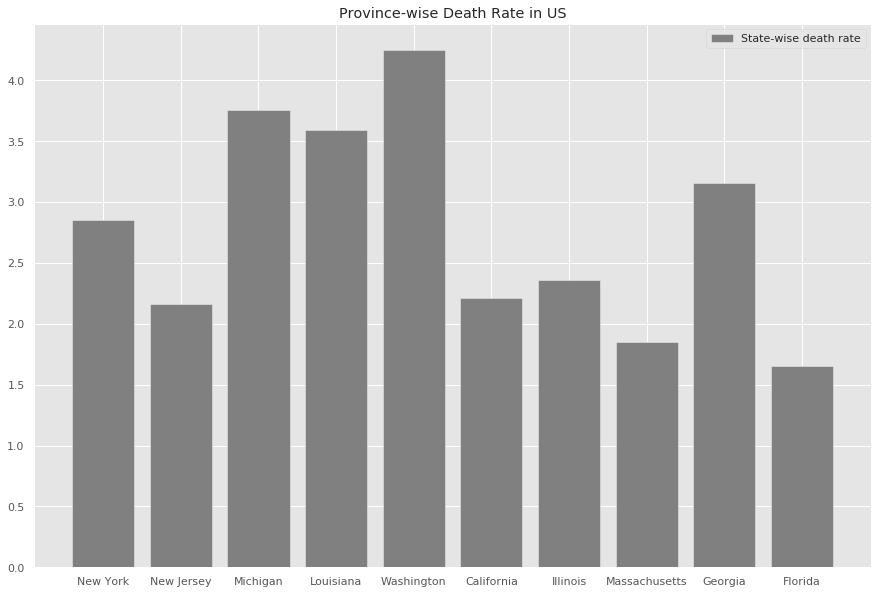

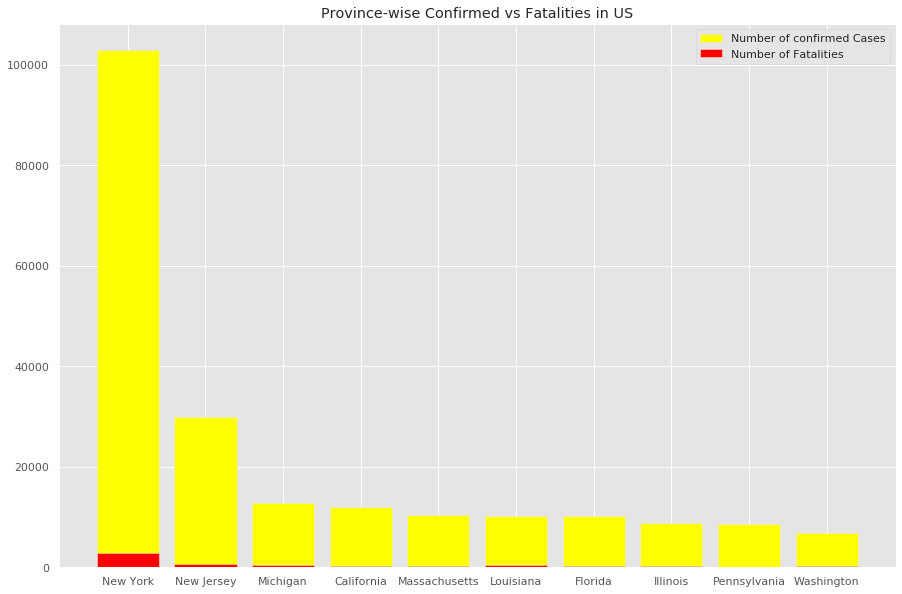

In [129]:
province_wise_deathratio(w3_df,'US')

# NEW CASES - Province Wise Analysis

In [130]:
def Rise_in_Cases(w3_df,country,province):
    Cases_fat=w3_df.groupby(['Country_Region','Province_State','Date'])['Date','ConfirmedCases','Fatalities'].sum()
    Cases_fat1=Cases_fat.reset_index()
    Cases_fat1=Cases_fat1.set_index(['Country_Region','Province_State'])
    Cases_fat2=Cases_fat1.loc[[country,province]]
    Cases_fat2=Cases_fat2.reset_index()
    Cases_fat2=Cases_fat2.set_index('Date')
    Cases_fat2[Cases_fat2['Province_State']==province]['ConfirmedCases'].diff().plot()
    plt.title("In {} - {}, The Number of New Cases Observed is shown below".format(province,country))
    plt.legend()
    plt.show()
    plt.savefig('New Cases/{}-{}.png'.format(country,province))
    
    Cases_fat2[Cases_fat2['Province_State']==province]['Fatalities'].diff().plot()
    plt.title("In {} - {}, The Number of New Fatalities Observed is shown below".format(province,country))
    plt.legend()
    plt.show()
    plt.savefig('New Cases/{}-{}-New Fatalities.png'.format(country,province))
    

In [131]:
w3_df['Province_State']=w3_df['Province_State'].fillna('')
w3_df[['Country_Region','Province_State']].reset_index()
w3_df['Country-Province']=w3_df['Country_Region']+'-'+w3_df['Province_State']
for i in w3_df[w3_df['Province_State']!='']['Country-Province'].unique():
    print(i)

Australia-Australian Capital Territory
Australia-New South Wales
Australia-Northern Territory
Australia-Queensland
Australia-South Australia
Australia-Tasmania
Australia-Victoria
Australia-Western Australia
Canada-Alberta
Canada-British Columbia
Canada-Manitoba
Canada-New Brunswick
Canada-Newfoundland and Labrador
Canada-Northwest Territories
Canada-Nova Scotia
Canada-Ontario
Canada-Prince Edward Island
Canada-Quebec
Canada-Saskatchewan
Canada-Yukon
China-Anhui
China-Beijing
China-Chongqing
China-Fujian
China-Gansu
China-Guangdong
China-Guangxi
China-Guizhou
China-Hainan
China-Hebei
China-Heilongjiang
China-Henan
China-Hong Kong
China-Hubei
China-Hunan
China-Inner Mongolia
China-Jiangsu
China-Jiangxi
China-Jilin
China-Liaoning
China-Macau
China-Ningxia
China-Qinghai
China-Shaanxi
China-Shandong
China-Shanghai
China-Shanxi
China-Sichuan
China-Tianjin
China-Tibet
China-Xinjiang
China-Yunnan
China-Zhejiang
Denmark-Faroe Islands
Denmark-Greenland
France-French Guiana
France-French Polynesi

# Select one of the Country, Province from above list

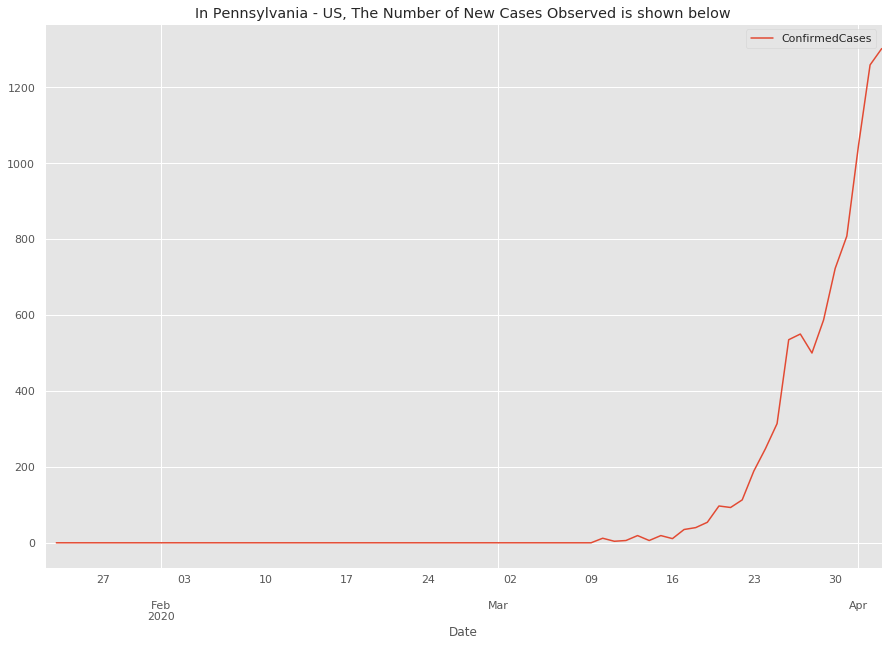

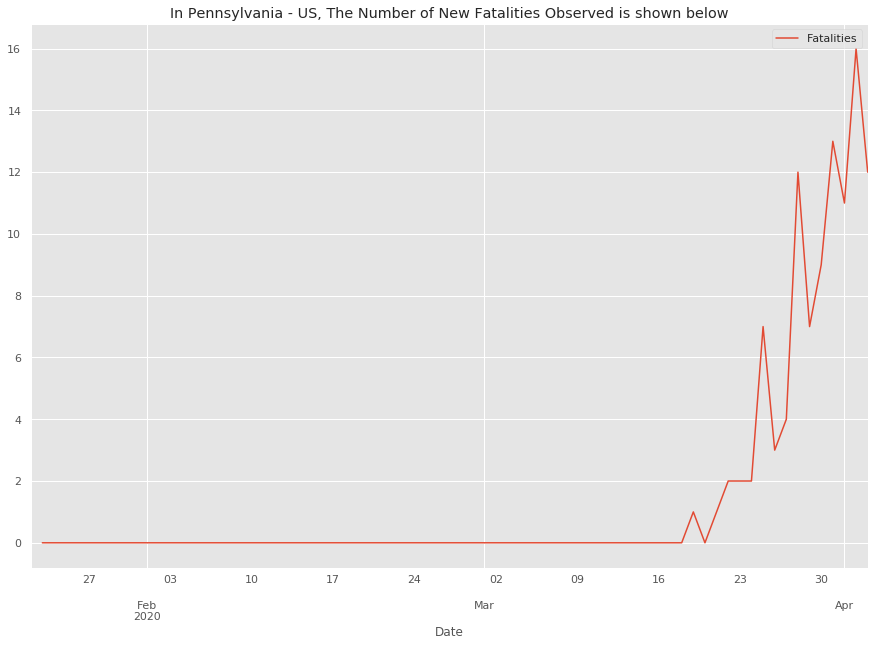

<Figure size 1080x720 with 0 Axes>

In [132]:
w3_df=w3_df.reset_index()
Rise_in_Cases(w3_df, 'US','Pennsylvania')

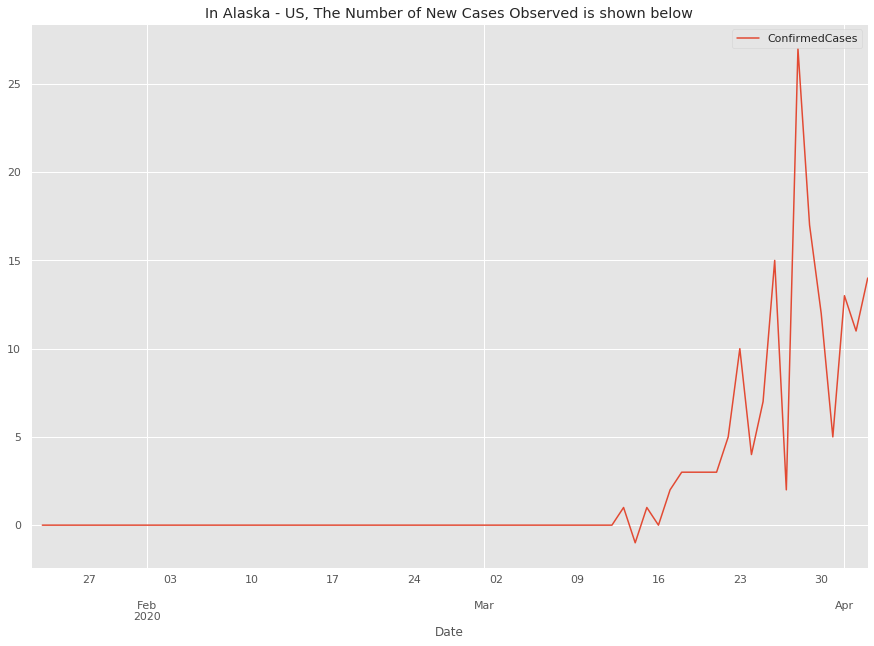

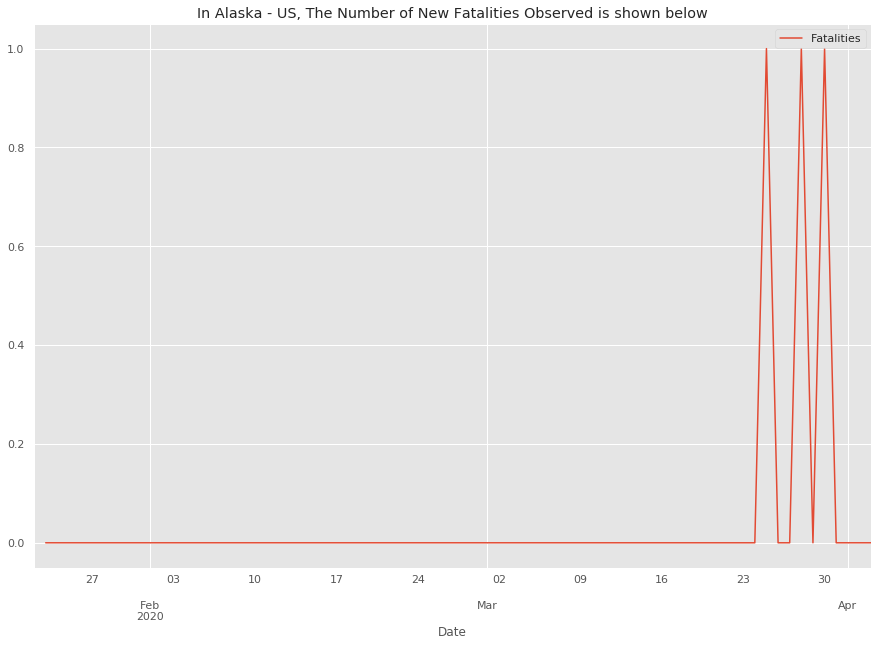

<Figure size 1080x720 with 0 Axes>

In [133]:
#w3_df=w3_df.reset_index()
Rise_in_Cases(w3_df,'US','Alaska')

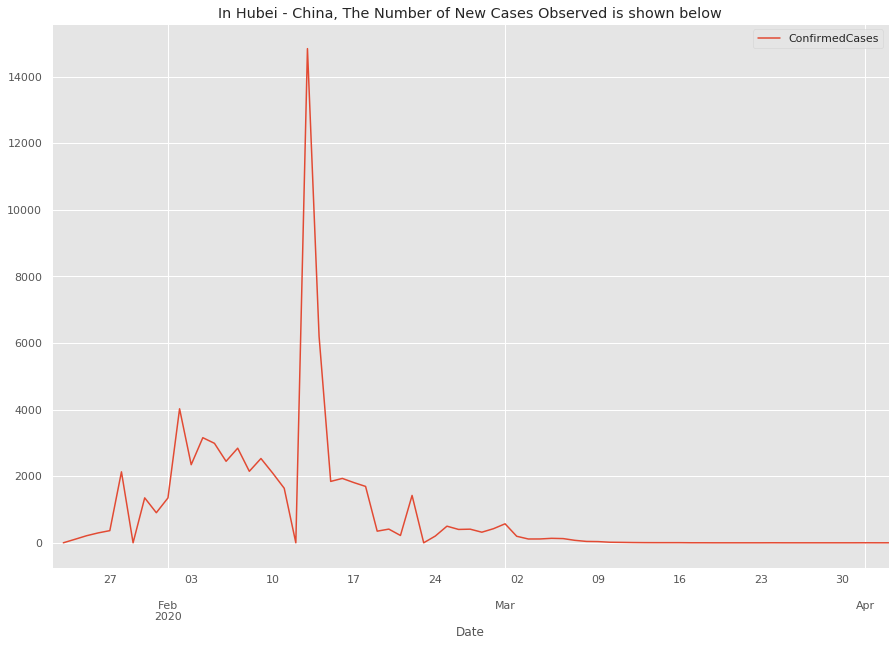

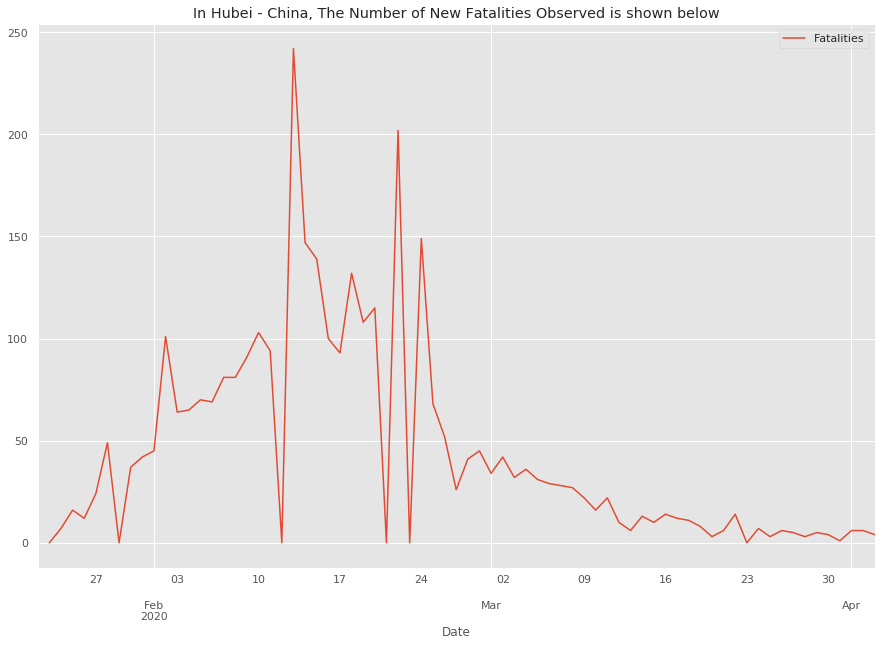

<Figure size 1080x720 with 0 Axes>

In [134]:
Rise_in_Cases(w3_df,'China','Hubei')

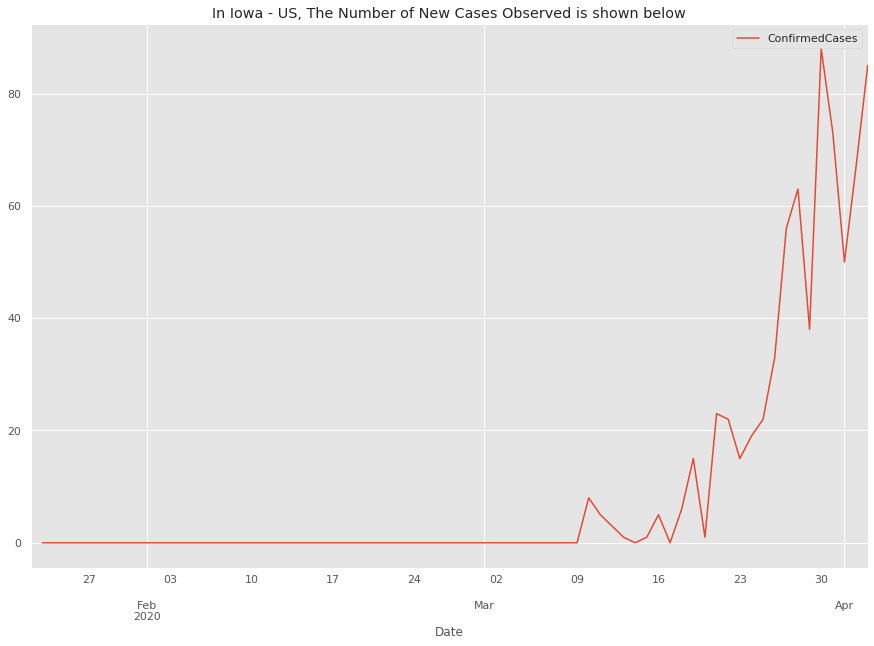

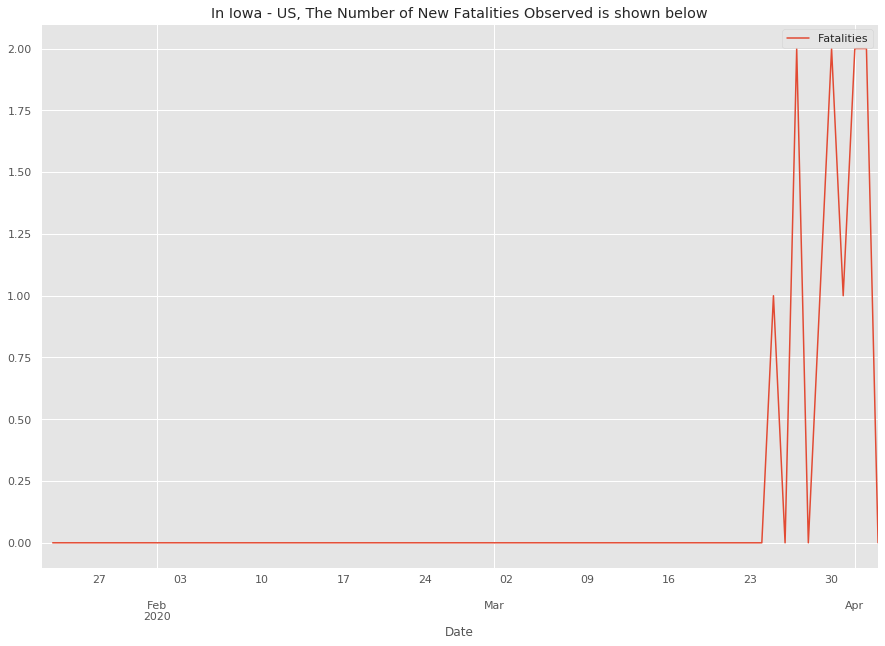

<Figure size 1080x720 with 0 Axes>

In [135]:
Rise_in_Cases(w3_df,'US','Iowa')

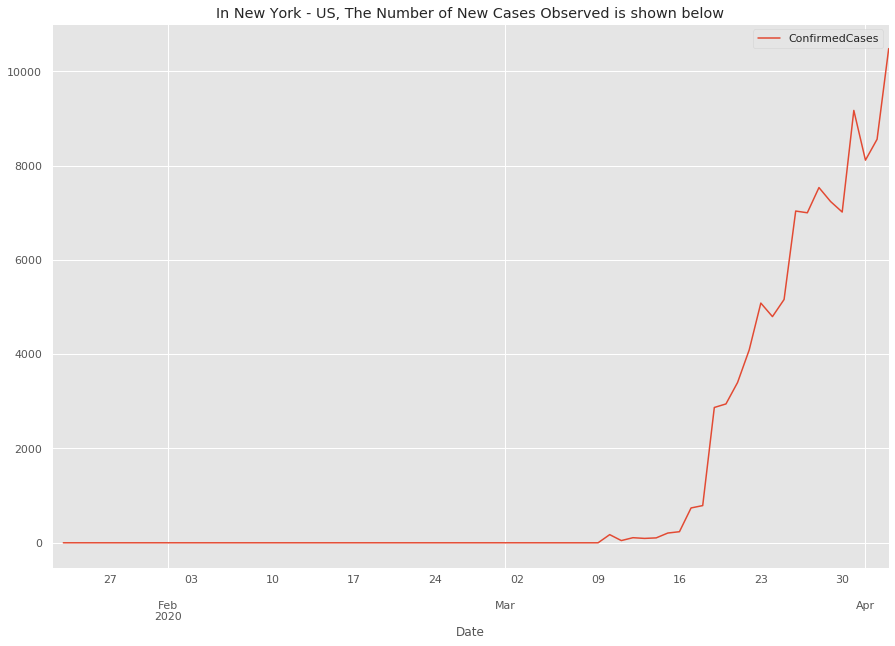

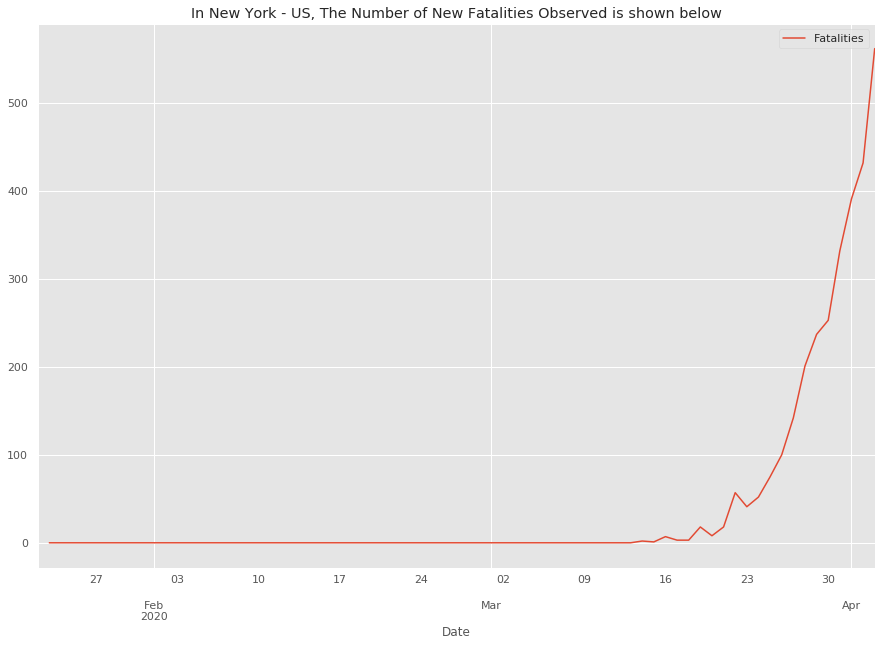

<Figure size 1080x720 with 0 Axes>

In [136]:
Rise_in_Cases(w3_df,'US','New York')

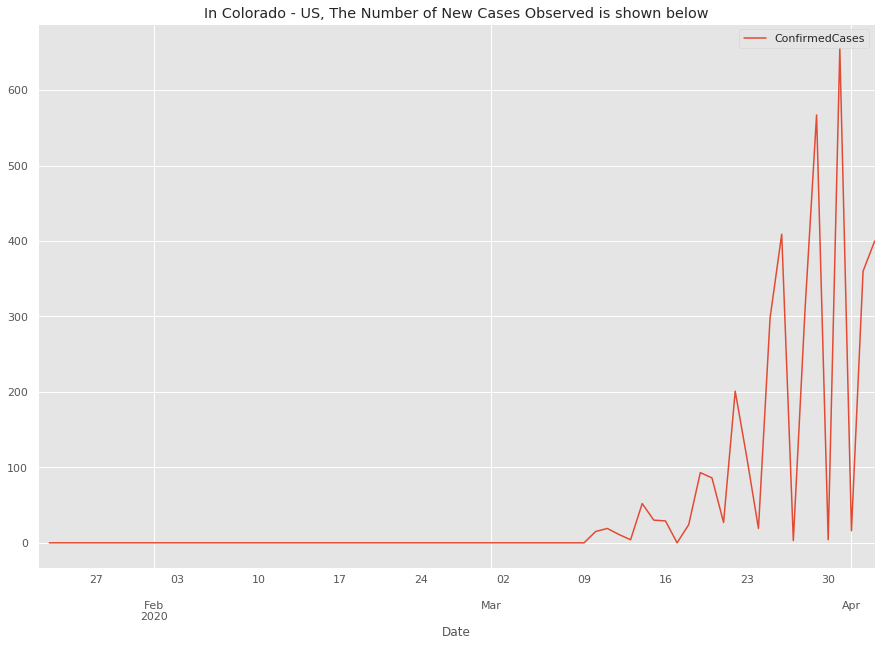

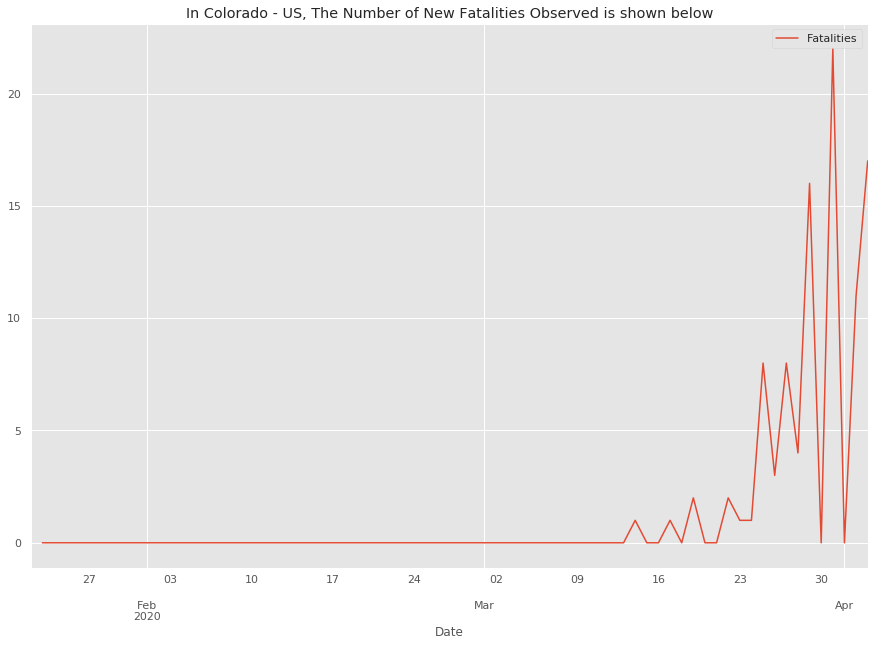

<Figure size 1080x720 with 0 Axes>

In [137]:
Rise_in_Cases(w3_df,'US','Colorado')

In [138]:
def Rise_in_Cases_country(w3_df,country):
    Cases_fat=w3_df.groupby(['Country_Region',"Date"])['Date','ConfirmedCases','Fatalities'].sum()
    Cases_fat1=Cases_fat.reset_index()
    Cases_fat1=Cases_fat1.set_index(['Country_Region'])
    Cases_fat2=Cases_fat1.loc[country]
    Cases_fat2=Cases_fat2.reset_index()
    Cases_fat2=Cases_fat2.set_index('Date')
    Cases_fat2[Cases_fat2['Country_Region']==country]['ConfirmedCases'].diff().plot()
    plt.title("In {}, The Number of New Cases Observed is shown below".format(country))
    plt.legend()
    plt.savefig('New Cases/{}.png'.format(country))
    plt.show()
    
    Cases_fat2[Cases_fat2['Country_Region']==country]['Fatalities'].diff().plot()
    plt.title("In {}, The Number of New Fatalities Observed is shown below".format(country))
    plt.legend()
    plt.savefig('New Cases/{}-New-Fatalities.png'.format(country))
    plt.show()

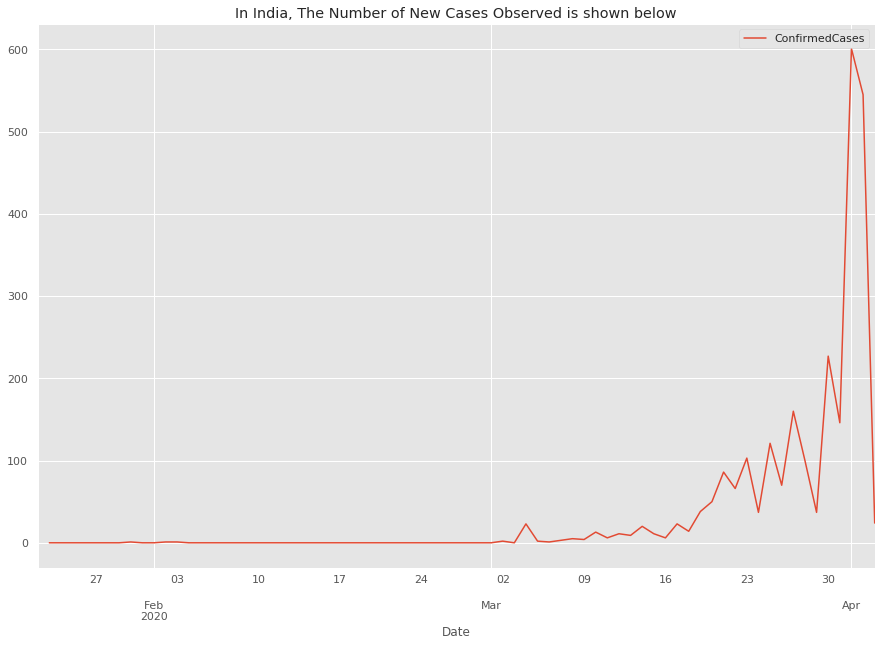

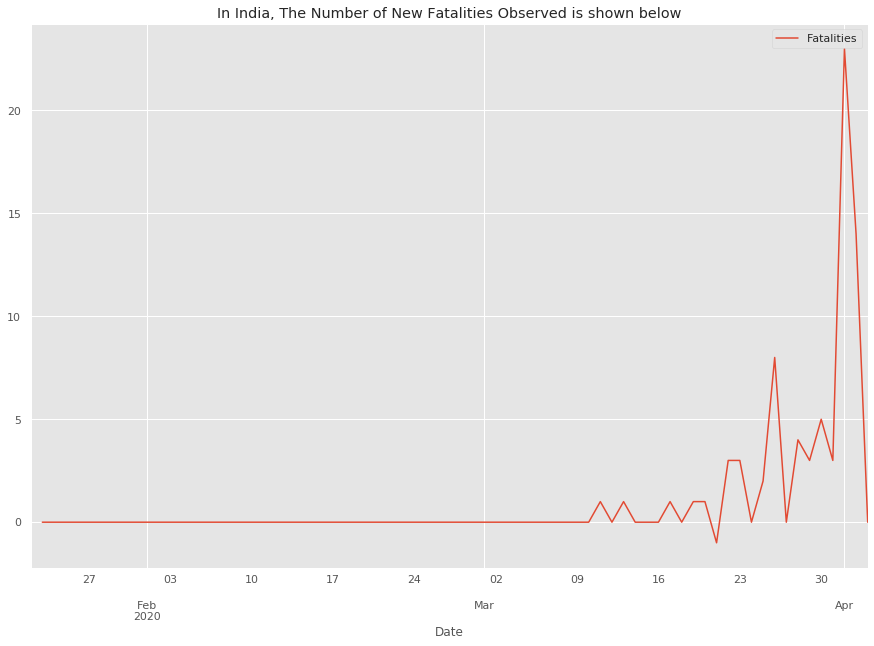

In [139]:
Rise_in_Cases_country(w3_df,"India")

# Forecasting

In [140]:
import tensorflow as tf

In [141]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

# World wide forecasting

# Model building for Worldwide forecast

--------------------Training for Confirmed Cases--------------------
Epoch 1/3500
23/23 [==============================] - 2s 76ms/step - loss: 41509.7682 - mean_absolute_error: 41625.8203
Epoch 2/3500
23/23 [==============================] - 0s 8ms/step - loss: 25127.4198 - mean_absolute_error: 25862.5879
Epoch 3/3500
23/23 [==============================] - 0s 8ms/step - loss: 54224.1168 - mean_absolute_error: 55803.5430
Epoch 4/3500
23/23 [==============================] - 0s 8ms/step - loss: 56929.6831 - mean_absolute_error: 58583.3555
Epoch 5/3500
23/23 [==============================] - 0s 8ms/step - loss: 33101.3282 - mean_absolute_error: 33762.7422
Epoch 6/3500
23/23 [==============================] - 0s 8ms/step - loss: 15725.3867 - mean_absolute_error: 16182.1416
Epoch 7/3500
23/23 [==============================] - 0s 8ms/step - loss: 17661.9559 - mean_absolute_error: 18091.6191
Epoch 8/3500
23/23 [==============================] - 0s 8ms/step - loss: 11314.4825 - mean_absol

23/23 [==============================] - 0s 8ms/step - loss: 5716.4973 - mean_absolute_error: 5862.4551
Epoch 137/3500
23/23 [==============================] - 0s 9ms/step - loss: 8924.5840 - mean_absolute_error: 9173.9746
Epoch 138/3500
23/23 [==============================] - 0s 8ms/step - loss: 7744.8231 - mean_absolute_error: 6121.6816
Epoch 139/3500
23/23 [==============================] - 0s 8ms/step - loss: 6533.2312 - mean_absolute_error: 6644.1396
Epoch 140/3500
23/23 [==============================] - 0s 8ms/step - loss: 7293.2421 - mean_absolute_error: 7137.8584
Epoch 141/3500
23/23 [==============================] - 0s 8ms/step - loss: 6836.3555 - mean_absolute_error: 6651.9883
Epoch 142/3500
23/23 [==============================] - 0s 8ms/step - loss: 9361.3440 - mean_absolute_error: 9487.1982
Epoch 143/3500
23/23 [==============================] - 0s 8ms/step - loss: 6834.0114 - mean_absolute_error: 6988.1616
Epoch 144/3500
23/23 [==============================] - 0s 8ms/

23/23 [==============================] - 0s 8ms/step - loss: 10785.4984 - mean_absolute_error: 10735.9443
Epoch 273/3500
23/23 [==============================] - 0s 8ms/step - loss: 4841.9068 - mean_absolute_error: 4922.5884
Epoch 274/3500
23/23 [==============================] - 0s 8ms/step - loss: 7075.9621 - mean_absolute_error: 7031.6987
Epoch 275/3500
23/23 [==============================] - 0s 8ms/step - loss: 4939.9157 - mean_absolute_error: 4747.7656
Epoch 276/3500
23/23 [==============================] - 0s 8ms/step - loss: 6514.7928 - mean_absolute_error: 6674.1768
Epoch 277/3500
23/23 [==============================] - 0s 8ms/step - loss: 4390.6403 - mean_absolute_error: 4406.0698
Epoch 278/3500
23/23 [==============================] - 0s 8ms/step - loss: 6051.0259 - mean_absolute_error: 5920.7397
Epoch 279/3500
23/23 [==============================] - 0s 8ms/step - loss: 5583.5263 - mean_absolute_error: 5718.5425
Epoch 280/3500
23/23 [==============================] - 0s 8m

23/23 [==============================] - 0s 8ms/step - loss: 5507.4933 - mean_absolute_error: 5598.8359
Epoch 409/3500
23/23 [==============================] - 0s 8ms/step - loss: 5526.8014 - mean_absolute_error: 5639.5098
Epoch 410/3500
23/23 [==============================] - 0s 8ms/step - loss: 5260.3370 - mean_absolute_error: 5343.8423
Epoch 411/3500
23/23 [==============================] - 0s 8ms/step - loss: 5078.6277 - mean_absolute_error: 5209.7246
Epoch 412/3500
23/23 [==============================] - 0s 8ms/step - loss: 7489.0405 - mean_absolute_error: 7684.5176
Epoch 413/3500
23/23 [==============================] - 0s 8ms/step - loss: 7951.1413 - mean_absolute_error: 8060.4580
Epoch 414/3500
23/23 [==============================] - 0s 9ms/step - loss: 7053.0244 - mean_absolute_error: 7173.1235
Epoch 415/3500
23/23 [==============================] - 0s 8ms/step - loss: 5669.2838 - mean_absolute_error: 5420.4575
Epoch 416/3500
23/23 [==============================] - 0s 8ms/

23/23 [==============================] - 0s 8ms/step - loss: 7254.1338 - mean_absolute_error: 7192.6489
Epoch 545/3500
23/23 [==============================] - 0s 8ms/step - loss: 5545.9255 - mean_absolute_error: 5691.8403
Epoch 546/3500
23/23 [==============================] - 0s 8ms/step - loss: 7414.3692 - mean_absolute_error: 7612.0557
Epoch 547/3500
23/23 [==============================] - 0s 8ms/step - loss: 8489.2723 - mean_absolute_error: 8560.1602
Epoch 548/3500
23/23 [==============================] - 0s 8ms/step - loss: 7011.0539 - mean_absolute_error: 6823.3828
Epoch 549/3500
23/23 [==============================] - 0s 8ms/step - loss: 6748.8617 - mean_absolute_error: 6816.9292
Epoch 550/3500
23/23 [==============================] - 0s 8ms/step - loss: 7433.1378 - mean_absolute_error: 7479.3403
Epoch 551/3500
23/23 [==============================] - 0s 8ms/step - loss: 5366.0711 - mean_absolute_error: 5456.1836
Epoch 552/3500
23/23 [==============================] - 0s 8ms/

Epoch 613/3500
23/23 [==============================] - 0s 8ms/step - loss: 3102.4018 - mean_absolute_error: 3154.0789
Epoch 614/3500
23/23 [==============================] - 0s 8ms/step - loss: 2929.6943 - mean_absolute_error: 2944.0837
Epoch 615/3500
23/23 [==============================] - 0s 8ms/step - loss: 2804.4900 - mean_absolute_error: 2885.0166
Epoch 616/3500
23/23 [==============================] - 0s 8ms/step - loss: 4205.6515 - mean_absolute_error: 4186.5625
Epoch 617/3500
23/23 [==============================] - 0s 8ms/step - loss: 4687.3332 - mean_absolute_error: 4174.6914
Epoch 618/3500
23/23 [==============================] - 0s 8ms/step - loss: 4487.9634 - mean_absolute_error: 4577.3433
Epoch 619/3500
23/23 [==============================] - 0s 8ms/step - loss: 4001.2973 - mean_absolute_error: 3921.1921
Epoch 620/3500
23/23 [==============================] - 0s 8ms/step - loss: 3408.5971 - mean_absolute_error: 3126.8401
Epoch 621/3500
23/23 [==========================

Epoch 750/3500
23/23 [==============================] - 0s 8ms/step - loss: 4302.0605 - mean_absolute_error: 4423.8960
Epoch 751/3500
23/23 [==============================] - 0s 8ms/step - loss: 2588.3137 - mean_absolute_error: 2660.0376
Epoch 752/3500
23/23 [==============================] - 0s 8ms/step - loss: 2564.9659 - mean_absolute_error: 2588.3767
Epoch 753/3500
23/23 [==============================] - 0s 8ms/step - loss: 4365.1139 - mean_absolute_error: 4494.4644
Epoch 754/3500
23/23 [==============================] - 0s 8ms/step - loss: 3182.7837 - mean_absolute_error: 3263.2734
Epoch 755/3500
23/23 [==============================] - 0s 8ms/step - loss: 3412.7759 - mean_absolute_error: 3483.9658
Epoch 756/3500
23/23 [==============================] - 0s 8ms/step - loss: 3139.5068 - mean_absolute_error: 2938.2146
Epoch 757/3500
23/23 [==============================] - 0s 8ms/step - loss: 2842.9719 - mean_absolute_error: 2625.5740
Epoch 758/3500
23/23 [==========================

23/23 [==============================] - 0s 8ms/step - loss: 3877.2026 - mean_absolute_error: 3617.7864
Epoch 887/3500
23/23 [==============================] - 0s 8ms/step - loss: 4208.5574 - mean_absolute_error: 4288.4043
Epoch 888/3500
23/23 [==============================] - 0s 8ms/step - loss: 4059.9119 - mean_absolute_error: 4086.5635
Epoch 889/3500
23/23 [==============================] - 0s 8ms/step - loss: 4882.4372 - mean_absolute_error: 4594.9033
Epoch 890/3500
23/23 [==============================] - 0s 8ms/step - loss: 3549.3490 - mean_absolute_error: 3623.2161
Epoch 891/3500
23/23 [==============================] - 0s 8ms/step - loss: 3067.8136 - mean_absolute_error: 3027.5312
Epoch 892/3500
23/23 [==============================] - 0s 8ms/step - loss: 3423.0899 - mean_absolute_error: 3415.3909
Epoch 893/3500
23/23 [==============================] - 0s 8ms/step - loss: 2716.5088 - mean_absolute_error: 2719.9604
Epoch 894/3500
23/23 [==============================] - 0s 8ms/

Epoch 955/3500
23/23 [==============================] - 0s 8ms/step - loss: 2599.9933 - mean_absolute_error: 2669.2136
Epoch 956/3500
23/23 [==============================] - 0s 8ms/step - loss: 3323.8226 - mean_absolute_error: 3189.7356
Epoch 957/3500
23/23 [==============================] - 0s 8ms/step - loss: 2520.8708 - mean_absolute_error: 2545.0752
Epoch 958/3500
23/23 [==============================] - 0s 8ms/step - loss: 2627.5206 - mean_absolute_error: 2702.2163
Epoch 959/3500
23/23 [==============================] - 0s 8ms/step - loss: 2707.7170 - mean_absolute_error: 2746.9299
Epoch 960/3500
23/23 [==============================] - 0s 9ms/step - loss: 3644.7605 - mean_absolute_error: 3719.4148
Epoch 961/3500
23/23 [==============================] - 0s 8ms/step - loss: 2848.5816 - mean_absolute_error: 2854.2952
Epoch 962/3500
23/23 [==============================] - 0s 8ms/step - loss: 2992.5430 - mean_absolute_error: 2706.0315
Epoch 963/3500
23/23 [==========================

23/23 [==============================] - 0s 8ms/step - loss: 5128.3393 - mean_absolute_error: 4813.6606
Epoch 1092/3500
23/23 [==============================] - 0s 8ms/step - loss: 5108.8942 - mean_absolute_error: 5196.7920
Epoch 1093/3500
23/23 [==============================] - 0s 8ms/step - loss: 2291.1476 - mean_absolute_error: 2224.1987
Epoch 1094/3500
23/23 [==============================] - 0s 8ms/step - loss: 4245.0254 - mean_absolute_error: 4191.2393
Epoch 1095/3500
23/23 [==============================] - 0s 8ms/step - loss: 2910.3932 - mean_absolute_error: 2966.9700
Epoch 1096/3500
23/23 [==============================] - 0s 8ms/step - loss: 2675.1411 - mean_absolute_error: 2693.9163
Epoch 1097/3500
23/23 [==============================] - 0s 8ms/step - loss: 3019.0307 - mean_absolute_error: 3098.0977
Epoch 1098/3500
23/23 [==============================] - 0s 8ms/step - loss: 4302.1595 - mean_absolute_error: 4296.8135
Epoch 1099/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 4441.4262 - mean_absolute_error: 4198.8779
Epoch 1228/3500
23/23 [==============================] - 0s 8ms/step - loss: 3923.1678 - mean_absolute_error: 3980.8872
Epoch 1229/3500
23/23 [==============================] - 0s 8ms/step - loss: 2804.4137 - mean_absolute_error: 2853.5769
Epoch 1230/3500
23/23 [==============================] - 0s 8ms/step - loss: 2376.0665 - mean_absolute_error: 2415.0735
Epoch 1231/3500
23/23 [==============================] - 0s 8ms/step - loss: 2896.6581 - mean_absolute_error: 2923.0764
Epoch 1232/3500
23/23 [==============================] - 0s 8ms/step - loss: 4499.4821 - mean_absolute_error: 4625.0513
Epoch 1233/3500
23/23 [==============================] - 0s 8ms/step - loss: 6628.2423 - mean_absolute_error: 6693.8423
Epoch 1234/3500
23/23 [==============================] - 0s 8ms/step - loss: 4508.3986 - mean_absolute_error: 4624.1069
Epoch 1235/3500
23/23 [==============================] -

23/23 [==============================] - 0s 6ms/step - loss: 2321.2219 - mean_absolute_error: 2342.2500
Epoch 1364/3500
23/23 [==============================] - 0s 7ms/step - loss: 2399.6405 - mean_absolute_error: 2467.9248
Epoch 1365/3500
23/23 [==============================] - 0s 6ms/step - loss: 2314.1740 - mean_absolute_error: 2378.9973
Epoch 1366/3500
23/23 [==============================] - 0s 8ms/step - loss: 3006.4520 - mean_absolute_error: 2985.6040
Epoch 1367/3500
23/23 [==============================] - 0s 7ms/step - loss: 2848.7352 - mean_absolute_error: 2702.2859
Epoch 1368/3500
23/23 [==============================] - 0s 7ms/step - loss: 2263.0466 - mean_absolute_error: 2318.0886
Epoch 1369/3500
23/23 [==============================] - 0s 7ms/step - loss: 2462.1207 - mean_absolute_error: 2534.7366
Epoch 1370/3500
23/23 [==============================] - 0s 7ms/step - loss: 2247.3802 - mean_absolute_error: 2244.9321
Epoch 1371/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 3203.8033 - mean_absolute_error: 3262.8254
Epoch 1500/3500
23/23 [==============================] - 0s 7ms/step - loss: 2870.7718 - mean_absolute_error: 2953.9033
Epoch 1501/3500
23/23 [==============================] - 0s 6ms/step - loss: 2663.9779 - mean_absolute_error: 2728.0620
Epoch 1502/3500
23/23 [==============================] - 0s 7ms/step - loss: 2779.1471 - mean_absolute_error: 2825.3643
Epoch 1503/3500
23/23 [==============================] - 0s 7ms/step - loss: 3829.7380 - mean_absolute_error: 3840.9292
Epoch 1504/3500
23/23 [==============================] - 0s 7ms/step - loss: 3653.6201 - mean_absolute_error: 3752.0061
Epoch 1505/3500
23/23 [==============================] - 0s 6ms/step - loss: 4170.6761 - mean_absolute_error: 4292.7158
Epoch 1506/3500
23/23 [==============================] - 0s 7ms/step - loss: 3985.1989 - mean_absolute_error: 4076.9231
Epoch 1507/3500
23/23 [==============================] -

23/23 [==============================] - 0s 9ms/step - loss: 2810.1010 - mean_absolute_error: 2875.0938
Epoch 1636/3500
23/23 [==============================] - 0s 9ms/step - loss: 2881.4281 - mean_absolute_error: 2911.1284
Epoch 1637/3500
23/23 [==============================] - 0s 8ms/step - loss: 2761.8104 - mean_absolute_error: 2812.8647
Epoch 1638/3500
23/23 [==============================] - 0s 9ms/step - loss: 2864.1429 - mean_absolute_error: 2903.9666
Epoch 1639/3500
23/23 [==============================] - 0s 8ms/step - loss: 4440.1575 - mean_absolute_error: 4358.5400
Epoch 1640/3500
23/23 [==============================] - 0s 8ms/step - loss: 3310.3044 - mean_absolute_error: 3376.7578
Epoch 1641/3500
23/23 [==============================] - 0s 9ms/step - loss: 3387.1763 - mean_absolute_error: 2973.4734
Epoch 1642/3500
23/23 [==============================] - 0s 9ms/step - loss: 3029.5145 - mean_absolute_error: 2977.4973
Epoch 1643/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 3335.9313 - mean_absolute_error: 3321.2727
Epoch 1772/3500
23/23 [==============================] - 0s 8ms/step - loss: 2638.3280 - mean_absolute_error: 2687.3193
Epoch 1773/3500
23/23 [==============================] - 0s 8ms/step - loss: 2425.1456 - mean_absolute_error: 2432.3662
Epoch 1774/3500
23/23 [==============================] - 0s 8ms/step - loss: 2524.8308 - mean_absolute_error: 2442.2241
Epoch 1775/3500
23/23 [==============================] - 0s 8ms/step - loss: 2552.2111 - mean_absolute_error: 2571.3530
Epoch 1776/3500
23/23 [==============================] - 0s 8ms/step - loss: 2895.0267 - mean_absolute_error: 2966.9397
Epoch 1777/3500
23/23 [==============================] - 0s 8ms/step - loss: 2308.2740 - mean_absolute_error: 2190.0999
Epoch 1778/3500
23/23 [==============================] - 0s 8ms/step - loss: 3186.7078 - mean_absolute_error: 2901.4939
Epoch 1779/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 3011.3909 - mean_absolute_error: 3037.8633
Epoch 1908/3500
23/23 [==============================] - 0s 8ms/step - loss: 2637.5938 - mean_absolute_error: 2677.3381
Epoch 1909/3500
23/23 [==============================] - 0s 8ms/step - loss: 2744.5155 - mean_absolute_error: 2382.7878
Epoch 1910/3500
23/23 [==============================] - 0s 8ms/step - loss: 2209.8275 - mean_absolute_error: 2169.7751
Epoch 1911/3500
23/23 [==============================] - 0s 8ms/step - loss: 3230.7224 - mean_absolute_error: 3304.4902
Epoch 1912/3500
23/23 [==============================] - 0s 8ms/step - loss: 3396.9092 - mean_absolute_error: 3455.4392
Epoch 1913/3500
23/23 [==============================] - 0s 8ms/step - loss: 3556.8584 - mean_absolute_error: 3645.4648
Epoch 1914/3500
23/23 [==============================] - 0s 8ms/step - loss: 4041.0880 - mean_absolute_error: 4127.9526
Epoch 1915/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 3541.6110 - mean_absolute_error: 3183.1506
Epoch 2044/3500
23/23 [==============================] - 0s 8ms/step - loss: 3993.2949 - mean_absolute_error: 4087.9407
Epoch 2045/3500
23/23 [==============================] - 0s 8ms/step - loss: 3310.6287 - mean_absolute_error: 3381.9519
Epoch 2046/3500
23/23 [==============================] - 0s 8ms/step - loss: 3520.7380 - mean_absolute_error: 3583.4475
Epoch 2047/3500
23/23 [==============================] - 0s 8ms/step - loss: 3781.5878 - mean_absolute_error: 3826.1582
Epoch 2048/3500
23/23 [==============================] - 0s 8ms/step - loss: 2763.5931 - mean_absolute_error: 2422.2131
Epoch 2049/3500
23/23 [==============================] - 0s 8ms/step - loss: 3021.0602 - mean_absolute_error: 3072.7817
Epoch 2050/3500
23/23 [==============================] - 0s 8ms/step - loss: 3474.8122 - mean_absolute_error: 3531.2695
Epoch 2051/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 2977.6660 - mean_absolute_error: 3016.6121
Epoch 2180/3500
23/23 [==============================] - 0s 8ms/step - loss: 3205.1521 - mean_absolute_error: 3299.6921
Epoch 2181/3500
23/23 [==============================] - 0s 8ms/step - loss: 3280.4957 - mean_absolute_error: 3345.5947
Epoch 2182/3500
23/23 [==============================] - 0s 8ms/step - loss: 2324.6661 - mean_absolute_error: 2380.8201
Epoch 2183/3500
23/23 [==============================] - 0s 8ms/step - loss: 3056.9852 - mean_absolute_error: 3082.4907
Epoch 2184/3500
23/23 [==============================] - 0s 8ms/step - loss: 2473.3752 - mean_absolute_error: 2504.6741
Epoch 2185/3500
23/23 [==============================] - 0s 8ms/step - loss: 3333.8139 - mean_absolute_error: 3432.1951
Epoch 2186/3500
23/23 [==============================] - 0s 8ms/step - loss: 5198.4467 - mean_absolute_error: 5313.7266
Epoch 2187/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 2374.9880 - mean_absolute_error: 2417.9939
Epoch 2315/3500
23/23 [==============================] - 0s 8ms/step - loss: 3407.8478 - mean_absolute_error: 3470.1343
Epoch 2316/3500
23/23 [==============================] - 0s 8ms/step - loss: 2857.0190 - mean_absolute_error: 2910.2117
Epoch 2317/3500
23/23 [==============================] - 0s 8ms/step - loss: 2327.7752 - mean_absolute_error: 2374.8074
Epoch 2318/3500
23/23 [==============================] - 0s 8ms/step - loss: 3418.3915 - mean_absolute_error: 3517.1511
Epoch 2319/3500
23/23 [==============================] - 0s 8ms/step - loss: 3891.3720 - mean_absolute_error: 3751.9126
Epoch 2320/3500
23/23 [==============================] - 0s 8ms/step - loss: 5930.1943 - mean_absolute_error: 5986.8921
Epoch 2321/3500
23/23 [==============================] - 0s 8ms/step - loss: 4216.4336 - mean_absolute_error: 4309.7822
Epoch 2322/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 2562.3252 - mean_absolute_error: 2638.1172
Epoch 2451/3500
23/23 [==============================] - 0s 8ms/step - loss: 3378.7386 - mean_absolute_error: 3475.0276
Epoch 2452/3500
23/23 [==============================] - 0s 8ms/step - loss: 2984.6488 - mean_absolute_error: 3061.3425
Epoch 2453/3500
23/23 [==============================] - 0s 8ms/step - loss: 3039.3511 - mean_absolute_error: 3105.5142
Epoch 2454/3500
23/23 [==============================] - 0s 8ms/step - loss: 2269.8646 - mean_absolute_error: 2311.0388
Epoch 2455/3500
23/23 [==============================] - 0s 8ms/step - loss: 5052.3834 - mean_absolute_error: 5147.8276
Epoch 2456/3500
23/23 [==============================] - 0s 8ms/step - loss: 3765.6168 - mean_absolute_error: 3840.2444
Epoch 2457/3500
23/23 [==============================] - 0s 8ms/step - loss: 2262.2320 - mean_absolute_error: 2304.7161
Epoch 2458/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 3335.1070 - mean_absolute_error: 3409.5112
Epoch 2586/3500
23/23 [==============================] - 0s 8ms/step - loss: 2551.4879 - mean_absolute_error: 2518.3333
Epoch 2587/3500
23/23 [==============================] - 0s 8ms/step - loss: 2922.1607 - mean_absolute_error: 2944.0667
Epoch 2588/3500
23/23 [==============================] - 0s 8ms/step - loss: 4938.1719 - mean_absolute_error: 5061.4634
Epoch 2589/3500
23/23 [==============================] - 0s 8ms/step - loss: 2313.7162 - mean_absolute_error: 2322.7881
Epoch 2590/3500
23/23 [==============================] - 0s 8ms/step - loss: 2397.1490 - mean_absolute_error: 2435.9146
Epoch 2591/3500
23/23 [==============================] - 0s 8ms/step - loss: 2501.7775 - mean_absolute_error: 2556.3853
Epoch 2592/3500
23/23 [==============================] - 0s 8ms/step - loss: 2837.1113 - mean_absolute_error: 2893.1265
Epoch 2593/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 3966.1947 - mean_absolute_error: 3522.9441
Epoch 2721/3500
23/23 [==============================] - 0s 8ms/step - loss: 2507.7330 - mean_absolute_error: 2563.3228
Epoch 2722/3500
23/23 [==============================] - 0s 8ms/step - loss: 2395.9362 - mean_absolute_error: 2453.8418
Epoch 2723/3500
23/23 [==============================] - 0s 8ms/step - loss: 2765.8518 - mean_absolute_error: 2821.7490
Epoch 2724/3500
23/23 [==============================] - 0s 8ms/step - loss: 2546.0517 - mean_absolute_error: 2608.9124
Epoch 2725/3500
23/23 [==============================] - 0s 8ms/step - loss: 4461.5127 - mean_absolute_error: 4418.1997
Epoch 2726/3500
23/23 [==============================] - 0s 8ms/step - loss: 2356.6312 - mean_absolute_error: 2369.0076
Epoch 2727/3500
23/23 [==============================] - 0s 8ms/step - loss: 3133.7589 - mean_absolute_error: 3208.6897
Epoch 2728/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 3009.5060 - mean_absolute_error: 2602.8269
Epoch 2857/3500
23/23 [==============================] - 0s 8ms/step - loss: 3077.5676 - mean_absolute_error: 3110.2524
Epoch 2858/3500
23/23 [==============================] - 0s 8ms/step - loss: 3524.4677 - mean_absolute_error: 3404.8738
Epoch 2859/3500
23/23 [==============================] - 0s 8ms/step - loss: 3517.2469 - mean_absolute_error: 3589.5034
Epoch 2860/3500
23/23 [==============================] - 0s 8ms/step - loss: 3180.4020 - mean_absolute_error: 3270.3718
Epoch 2861/3500
23/23 [==============================] - 0s 8ms/step - loss: 2948.2214 - mean_absolute_error: 2623.8496
Epoch 2862/3500
23/23 [==============================] - 0s 8ms/step - loss: 3927.9165 - mean_absolute_error: 3891.0613
Epoch 2863/3500
23/23 [==============================] - 0s 8ms/step - loss: 3118.1124 - mean_absolute_error: 3185.3489
Epoch 2864/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 3300.6376 - mean_absolute_error: 3363.0471
Epoch 2993/3500
23/23 [==============================] - 0s 8ms/step - loss: 3058.6730 - mean_absolute_error: 3137.2053
Epoch 2994/3500
23/23 [==============================] - 0s 8ms/step - loss: 2760.7826 - mean_absolute_error: 2761.5020
Epoch 2995/3500
23/23 [==============================] - 0s 8ms/step - loss: 4892.5756 - mean_absolute_error: 5027.7603
Epoch 2996/3500
23/23 [==============================] - 0s 8ms/step - loss: 3330.6667 - mean_absolute_error: 3385.0276
Epoch 2997/3500
23/23 [==============================] - 0s 8ms/step - loss: 3160.7764 - mean_absolute_error: 3225.0754
Epoch 2998/3500
23/23 [==============================] - 0s 8ms/step - loss: 2574.2836 - mean_absolute_error: 2612.6118
Epoch 2999/3500
23/23 [==============================] - 0s 8ms/step - loss: 2397.3636 - mean_absolute_error: 2466.4089
Epoch 3000/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 3063.4850 - mean_absolute_error: 3127.9321
Epoch 3129/3500
23/23 [==============================] - 0s 9ms/step - loss: 2887.0495 - mean_absolute_error: 2886.3074
Epoch 3130/3500
23/23 [==============================] - 0s 8ms/step - loss: 2592.9593 - mean_absolute_error: 2582.5396
Epoch 3131/3500
23/23 [==============================] - 0s 8ms/step - loss: 3039.0954 - mean_absolute_error: 2955.2131
Epoch 3132/3500
23/23 [==============================] - 0s 8ms/step - loss: 3447.3181 - mean_absolute_error: 3434.1221
Epoch 3133/3500
23/23 [==============================] - 0s 8ms/step - loss: 3054.5701 - mean_absolute_error: 3113.0759
Epoch 3134/3500
23/23 [==============================] - 0s 8ms/step - loss: 4009.3999 - mean_absolute_error: 4056.5027
Epoch 3135/3500
23/23 [==============================] - 0s 8ms/step - loss: 2345.3016 - mean_absolute_error: 2378.9153
Epoch 3136/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 3415.9086 - mean_absolute_error: 3507.8848
Epoch 3265/3500
23/23 [==============================] - 0s 7ms/step - loss: 2921.2652 - mean_absolute_error: 2746.7224
Epoch 3266/3500
23/23 [==============================] - 0s 7ms/step - loss: 3596.7681 - mean_absolute_error: 3286.8362
Epoch 3267/3500
23/23 [==============================] - 0s 6ms/step - loss: 2486.3260 - mean_absolute_error: 2526.6282
Epoch 3268/3500
23/23 [==============================] - 0s 7ms/step - loss: 2653.3672 - mean_absolute_error: 2616.1040
Epoch 3269/3500
23/23 [==============================] - 0s 6ms/step - loss: 2347.3521 - mean_absolute_error: 2407.1868
Epoch 3270/3500
23/23 [==============================] - 0s 7ms/step - loss: 2279.7571 - mean_absolute_error: 2346.9937
Epoch 3271/3500
23/23 [==============================] - 0s 6ms/step - loss: 2497.5228 - mean_absolute_error: 2532.9805
Epoch 3272/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 3399.0756 - mean_absolute_error: 3483.6179
Epoch 3401/3500
23/23 [==============================] - 0s 6ms/step - loss: 2429.6134 - mean_absolute_error: 2286.4531
Epoch 3402/3500
23/23 [==============================] - 0s 6ms/step - loss: 2526.8179 - mean_absolute_error: 2503.9729
Epoch 3403/3500
23/23 [==============================] - 0s 7ms/step - loss: 2817.0162 - mean_absolute_error: 2899.6121
Epoch 3404/3500
23/23 [==============================] - 0s 7ms/step - loss: 2167.4029 - mean_absolute_error: 2211.0193
Epoch 3405/3500
23/23 [==============================] - 0s 7ms/step - loss: 2328.2740 - mean_absolute_error: 2318.1367
Epoch 3406/3500
23/23 [==============================] - 0s 7ms/step - loss: 2420.4520 - mean_absolute_error: 2456.4583
Epoch 3407/3500
23/23 [==============================] - 0s 7ms/step - loss: 2778.2848 - mean_absolute_error: 2752.5049
Epoch 3408/3500
23/23 [==============================] -

Epoch 37/3500
23/23 [==============================] - 0s 7ms/step - loss: 736.8618 - mean_absolute_error: 753.9340
Epoch 38/3500
23/23 [==============================] - 0s 7ms/step - loss: 485.7076 - mean_absolute_error: 496.4312
Epoch 39/3500
23/23 [==============================] - 0s 7ms/step - loss: 466.3095 - mean_absolute_error: 479.5107
Epoch 40/3500
23/23 [==============================] - 0s 7ms/step - loss: 681.4653 - mean_absolute_error: 669.9003
Epoch 41/3500
23/23 [==============================] - 0s 7ms/step - loss: 678.6200 - mean_absolute_error: 699.2084
Epoch 42/3500
23/23 [==============================] - 0s 7ms/step - loss: 490.6606 - mean_absolute_error: 482.0125
Epoch 43/3500
23/23 [==============================] - 0s 6ms/step - loss: 646.7302 - mean_absolute_error: 655.6348
Epoch 44/3500
23/23 [==============================] - 0s 7ms/step - loss: 410.4420 - mean_absolute_error: 422.9747
Epoch 45/3500
23/23 [==============================] - 0s 7ms/step - los

23/23 [==============================] - 0s 7ms/step - loss: 262.9502 - mean_absolute_error: 261.8061
Epoch 178/3500
23/23 [==============================] - 0s 7ms/step - loss: 306.8932 - mean_absolute_error: 316.5097
Epoch 179/3500
23/23 [==============================] - 0s 6ms/step - loss: 453.5010 - mean_absolute_error: 461.1462
Epoch 180/3500
23/23 [==============================] - 0s 7ms/step - loss: 452.9125 - mean_absolute_error: 453.1497
Epoch 181/3500
23/23 [==============================] - 0s 7ms/step - loss: 294.9177 - mean_absolute_error: 302.4692
Epoch 182/3500
23/23 [==============================] - 0s 7ms/step - loss: 299.4859 - mean_absolute_error: 306.7461
Epoch 183/3500
23/23 [==============================] - 0s 7ms/step - loss: 309.5014 - mean_absolute_error: 319.2061
Epoch 184/3500
23/23 [==============================] - 0s 6ms/step - loss: 376.6568 - mean_absolute_error: 384.6386
Epoch 185/3500
23/23 [==============================] - 0s 7ms/step - loss: 525

23/23 [==============================] - 0s 7ms/step - loss: 315.2471 - mean_absolute_error: 314.1414
Epoch 318/3500
23/23 [==============================] - 0s 7ms/step - loss: 231.6985 - mean_absolute_error: 230.5768
Epoch 319/3500
23/23 [==============================] - 0s 7ms/step - loss: 225.3695 - mean_absolute_error: 227.8354
Epoch 320/3500
23/23 [==============================] - 0s 6ms/step - loss: 229.6137 - mean_absolute_error: 234.4814
Epoch 321/3500
23/23 [==============================] - 0s 7ms/step - loss: 219.3739 - mean_absolute_error: 221.5128
Epoch 322/3500
23/23 [==============================] - 0s 7ms/step - loss: 297.0688 - mean_absolute_error: 299.6284
Epoch 323/3500
23/23 [==============================] - 0s 7ms/step - loss: 208.5198 - mean_absolute_error: 200.9783
Epoch 324/3500
23/23 [==============================] - 0s 7ms/step - loss: 179.6787 - mean_absolute_error: 185.2246
Epoch 325/3500
23/23 [==============================] - 0s 6ms/step - loss: 182

23/23 [==============================] - 0s 7ms/step - loss: 231.6846 - mean_absolute_error: 216.4044
Epoch 458/3500
23/23 [==============================] - 0s 7ms/step - loss: 197.9449 - mean_absolute_error: 197.4423
Epoch 459/3500
23/23 [==============================] - 0s 7ms/step - loss: 176.9579 - mean_absolute_error: 180.4634
Epoch 460/3500
23/23 [==============================] - 0s 7ms/step - loss: 299.8087 - mean_absolute_error: 308.9027
Epoch 461/3500
23/23 [==============================] - 0s 7ms/step - loss: 211.6048 - mean_absolute_error: 209.5877
Epoch 462/3500
23/23 [==============================] - 0s 7ms/step - loss: 186.1666 - mean_absolute_error: 191.4515
Epoch 463/3500
23/23 [==============================] - 0s 7ms/step - loss: 195.1690 - mean_absolute_error: 198.7325
Epoch 464/3500
23/23 [==============================] - 0s 7ms/step - loss: 251.8098 - mean_absolute_error: 231.7993
Epoch 465/3500
23/23 [==============================] - 0s 6ms/step - loss: 218

23/23 [==============================] - 0s 7ms/step - loss: 186.1387 - mean_absolute_error: 191.9039
Epoch 598/3500
23/23 [==============================] - 0s 7ms/step - loss: 228.8322 - mean_absolute_error: 236.0171
Epoch 599/3500
23/23 [==============================] - 0s 7ms/step - loss: 131.5045 - mean_absolute_error: 133.2986
Epoch 600/3500
23/23 [==============================] - 0s 7ms/step - loss: 156.1858 - mean_absolute_error: 152.6847
Epoch 601/3500
23/23 [==============================] - 0s 7ms/step - loss: 143.9314 - mean_absolute_error: 142.9224
Epoch 602/3500
23/23 [==============================] - 0s 6ms/step - loss: 207.1817 - mean_absolute_error: 213.0647
Epoch 603/3500
23/23 [==============================] - 0s 7ms/step - loss: 172.9582 - mean_absolute_error: 175.0673
Epoch 604/3500
23/23 [==============================] - 0s 6ms/step - loss: 151.0344 - mean_absolute_error: 146.1918
Epoch 605/3500
23/23 [==============================] - 0s 7ms/step - loss: 271

23/23 [==============================] - 0s 7ms/step - loss: 136.1483 - mean_absolute_error: 136.9168
Epoch 738/3500
23/23 [==============================] - 0s 7ms/step - loss: 207.9091 - mean_absolute_error: 205.7992
Epoch 739/3500
23/23 [==============================] - 0s 7ms/step - loss: 316.7833 - mean_absolute_error: 325.8745
Epoch 740/3500
23/23 [==============================] - 0s 7ms/step - loss: 576.7539 - mean_absolute_error: 590.0747
Epoch 741/3500
23/23 [==============================] - 0s 7ms/step - loss: 228.9582 - mean_absolute_error: 224.8893
Epoch 742/3500
23/23 [==============================] - 0s 6ms/step - loss: 179.1179 - mean_absolute_error: 178.0867
Epoch 743/3500
23/23 [==============================] - 0s 6ms/step - loss: 262.2312 - mean_absolute_error: 270.1470
Epoch 744/3500
23/23 [==============================] - 0s 6ms/step - loss: 201.6316 - mean_absolute_error: 199.6039
Epoch 745/3500
23/23 [==============================] - 0s 7ms/step - loss: 234

23/23 [==============================] - 0s 7ms/step - loss: 206.0095 - mean_absolute_error: 167.0584
Epoch 808/3500
23/23 [==============================] - 0s 6ms/step - loss: 155.5813 - mean_absolute_error: 156.6066
Epoch 809/3500
23/23 [==============================] - 0s 6ms/step - loss: 152.1790 - mean_absolute_error: 153.0195
Epoch 810/3500
23/23 [==============================] - 0s 6ms/step - loss: 212.7489 - mean_absolute_error: 213.6585
Epoch 811/3500
23/23 [==============================] - 0s 6ms/step - loss: 166.6223 - mean_absolute_error: 168.4843
Epoch 812/3500
23/23 [==============================] - 0s 7ms/step - loss: 188.8734 - mean_absolute_error: 194.8273
Epoch 813/3500
23/23 [==============================] - 0s 8ms/step - loss: 163.3889 - mean_absolute_error: 161.9321
Epoch 814/3500
23/23 [==============================] - 0s 7ms/step - loss: 164.9236 - mean_absolute_error: 167.0252
Epoch 815/3500
23/23 [==============================] - 0s 6ms/step - loss: 163

23/23 [==============================] - 0s 7ms/step - loss: 146.3109 - mean_absolute_error: 146.4759
Epoch 948/3500
23/23 [==============================] - 0s 7ms/step - loss: 151.1821 - mean_absolute_error: 149.2312
Epoch 949/3500
23/23 [==============================] - 0s 6ms/step - loss: 120.0438 - mean_absolute_error: 121.2256
Epoch 950/3500
23/23 [==============================] - 0s 6ms/step - loss: 129.8085 - mean_absolute_error: 126.3866
Epoch 951/3500
23/23 [==============================] - 0s 6ms/step - loss: 177.4988 - mean_absolute_error: 183.0734
Epoch 952/3500
23/23 [==============================] - 0s 7ms/step - loss: 149.1714 - mean_absolute_error: 148.5053
Epoch 953/3500
23/23 [==============================] - 0s 7ms/step - loss: 280.5630 - mean_absolute_error: 283.8613
Epoch 954/3500
23/23 [==============================] - 0s 7ms/step - loss: 168.1370 - mean_absolute_error: 170.7502
Epoch 955/3500
23/23 [==============================] - 0s 7ms/step - loss: 140

23/23 [==============================] - 0s 7ms/step - loss: 157.2850 - mean_absolute_error: 154.1161
Epoch 1018/3500
23/23 [==============================] - 0s 6ms/step - loss: 159.2411 - mean_absolute_error: 157.0300
Epoch 1019/3500
23/23 [==============================] - 0s 7ms/step - loss: 154.0370 - mean_absolute_error: 135.5216
Epoch 1020/3500
23/23 [==============================] - 0s 7ms/step - loss: 217.0452 - mean_absolute_error: 217.7931
Epoch 1021/3500
23/23 [==============================] - 0s 7ms/step - loss: 169.6794 - mean_absolute_error: 168.4152
Epoch 1022/3500
23/23 [==============================] - 0s 7ms/step - loss: 222.5851 - mean_absolute_error: 228.8654
Epoch 1023/3500
23/23 [==============================] - 0s 7ms/step - loss: 229.8914 - mean_absolute_error: 231.3137
Epoch 1024/3500
23/23 [==============================] - 0s 7ms/step - loss: 126.0182 - mean_absolute_error: 129.8789
Epoch 1025/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 219.9839 - mean_absolute_error: 226.7472
Epoch 1156/3500
23/23 [==============================] - 0s 7ms/step - loss: 163.3163 - mean_absolute_error: 166.2016
Epoch 1157/3500
23/23 [==============================] - 0s 7ms/step - loss: 141.8968 - mean_absolute_error: 137.1530
Epoch 1158/3500
23/23 [==============================] - 0s 6ms/step - loss: 135.6321 - mean_absolute_error: 117.6392
Epoch 1159/3500
23/23 [==============================] - 0s 7ms/step - loss: 159.9529 - mean_absolute_error: 163.5636
Epoch 1160/3500
23/23 [==============================] - 0s 7ms/step - loss: 244.0706 - mean_absolute_error: 249.3038
Epoch 1161/3500
23/23 [==============================] - 0s 7ms/step - loss: 135.5428 - mean_absolute_error: 138.8487
Epoch 1162/3500
23/23 [==============================] - 0s 7ms/step - loss: 189.0092 - mean_absolute_error: 173.7786
Epoch 1163/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 157.7494 - mean_absolute_error: 153.3939
Epoch 1294/3500
23/23 [==============================] - 0s 6ms/step - loss: 120.7156 - mean_absolute_error: 124.6767
Epoch 1295/3500
23/23 [==============================] - 0s 7ms/step - loss: 129.9513 - mean_absolute_error: 129.9092
Epoch 1296/3500
23/23 [==============================] - 0s 7ms/step - loss: 115.5326 - mean_absolute_error: 119.3993
Epoch 1297/3500
23/23 [==============================] - 0s 7ms/step - loss: 159.8220 - mean_absolute_error: 162.0601
Epoch 1298/3500
23/23 [==============================] - 0s 7ms/step - loss: 113.7275 - mean_absolute_error: 117.5023
Epoch 1299/3500
23/23 [==============================] - 0s 7ms/step - loss: 140.9414 - mean_absolute_error: 143.2918
Epoch 1300/3500
23/23 [==============================] - 0s 6ms/step - loss: 111.5556 - mean_absolute_error: 112.0886
Epoch 1301/3500
23/23 [==============================] - 0s 6ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 167.3072 - mean_absolute_error: 154.7039
Epoch 1432/3500
23/23 [==============================] - 0s 6ms/step - loss: 128.8733 - mean_absolute_error: 123.1648
Epoch 1433/3500
23/23 [==============================] - 0s 6ms/step - loss: 147.7457 - mean_absolute_error: 152.3183
Epoch 1434/3500
23/23 [==============================] - 0s 7ms/step - loss: 118.2372 - mean_absolute_error: 119.2696
Epoch 1435/3500
23/23 [==============================] - 0s 6ms/step - loss: 131.7988 - mean_absolute_error: 126.8301
Epoch 1436/3500
23/23 [==============================] - 0s 7ms/step - loss: 130.2079 - mean_absolute_error: 134.5498
Epoch 1437/3500
23/23 [==============================] - 0s 7ms/step - loss: 170.7310 - mean_absolute_error: 175.8220
Epoch 1438/3500
23/23 [==============================] - 0s 7ms/step - loss: 164.5677 - mean_absolute_error: 168.3078
Epoch 1439/3500
23/23 [==============================] - 0s 6ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 124.9347 - mean_absolute_error: 129.1509
Epoch 1570/3500
23/23 [==============================] - 0s 7ms/step - loss: 116.7549 - mean_absolute_error: 112.3878
Epoch 1571/3500
23/23 [==============================] - 0s 7ms/step - loss: 131.4404 - mean_absolute_error: 134.3934
Epoch 1572/3500
23/23 [==============================] - 0s 7ms/step - loss: 173.5126 - mean_absolute_error: 178.8801
Epoch 1573/3500
23/23 [==============================] - 0s 7ms/step - loss: 307.9524 - mean_absolute_error: 310.8718
Epoch 1574/3500
23/23 [==============================] - 0s 7ms/step - loss: 126.3863 - mean_absolute_error: 128.8253
Epoch 1575/3500
23/23 [==============================] - 0s 7ms/step - loss: 163.1005 - mean_absolute_error: 139.7339
Epoch 1576/3500
23/23 [==============================] - 0s 6ms/step - loss: 234.9233 - mean_absolute_error: 242.3353
Epoch 1577/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 95.5862 - mean_absolute_error: 96.6230
Epoch 1708/3500
23/23 [==============================] - 0s 7ms/step - loss: 106.4174 - mean_absolute_error: 109.9152
Epoch 1709/3500
23/23 [==============================] - 0s 7ms/step - loss: 138.6391 - mean_absolute_error: 142.1357
Epoch 1710/3500
23/23 [==============================] - 0s 7ms/step - loss: 92.9562 - mean_absolute_error: 93.9787
Epoch 1711/3500
23/23 [==============================] - 0s 6ms/step - loss: 95.6915 - mean_absolute_error: 96.8790
Epoch 1712/3500
23/23 [==============================] - 0s 7ms/step - loss: 102.0999 - mean_absolute_error: 104.7515
Epoch 1713/3500
23/23 [==============================] - 0s 7ms/step - loss: 100.0546 - mean_absolute_error: 103.0743
Epoch 1714/3500
23/23 [==============================] - 0s 7ms/step - loss: 150.4710 - mean_absolute_error: 152.3661
Epoch 1715/3500
23/23 [==============================] - 0s 7ms/step - loss: 1

23/23 [==============================] - 0s 7ms/step - loss: 132.6979 - mean_absolute_error: 134.6387
Epoch 1846/3500
23/23 [==============================] - 0s 7ms/step - loss: 111.3968 - mean_absolute_error: 113.1691
Epoch 1847/3500
23/23 [==============================] - 0s 7ms/step - loss: 100.6374 - mean_absolute_error: 103.9263
Epoch 1848/3500
23/23 [==============================] - 0s 7ms/step - loss: 216.2740 - mean_absolute_error: 221.6691
Epoch 1849/3500
23/23 [==============================] - 0s 7ms/step - loss: 189.5346 - mean_absolute_error: 154.4854
Epoch 1850/3500
23/23 [==============================] - 0s 7ms/step - loss: 239.5327 - mean_absolute_error: 246.1072
Epoch 1851/3500
23/23 [==============================] - 0s 7ms/step - loss: 178.5456 - mean_absolute_error: 179.2049
Epoch 1852/3500
23/23 [==============================] - 0s 7ms/step - loss: 150.2233 - mean_absolute_error: 155.0592
Epoch 1853/3500
23/23 [==============================] - 0s 7ms/step - l

Epoch 1984/3500
23/23 [==============================] - 0s 6ms/step - loss: 96.2691 - mean_absolute_error: 98.5122
Epoch 1985/3500
23/23 [==============================] - 0s 7ms/step - loss: 94.1897 - mean_absolute_error: 94.3443
Epoch 1986/3500
23/23 [==============================] - 0s 7ms/step - loss: 107.2257 - mean_absolute_error: 107.3511
Epoch 1987/3500
23/23 [==============================] - 0s 7ms/step - loss: 90.0618 - mean_absolute_error: 93.0735
Epoch 1988/3500
23/23 [==============================] - 0s 7ms/step - loss: 136.4200 - mean_absolute_error: 136.4211
Epoch 1989/3500
23/23 [==============================] - 0s 7ms/step - loss: 236.0985 - mean_absolute_error: 243.5301
Epoch 1990/3500
23/23 [==============================] - 0s 6ms/step - loss: 103.5371 - mean_absolute_error: 104.1924
Epoch 1991/3500
23/23 [==============================] - 0s 6ms/step - loss: 98.7018 - mean_absolute_error: 101.5825
Epoch 1992/3500
23/23 [==============================] - 0s 7ms

23/23 [==============================] - 0s 7ms/step - loss: 90.3228 - mean_absolute_error: 90.9867
Epoch 2124/3500
23/23 [==============================] - 0s 7ms/step - loss: 171.2813 - mean_absolute_error: 151.1421
Epoch 2125/3500
23/23 [==============================] - 0s 7ms/step - loss: 109.3032 - mean_absolute_error: 112.3610
Epoch 2126/3500
23/23 [==============================] - 0s 7ms/step - loss: 92.6664 - mean_absolute_error: 85.3554
Epoch 2127/3500
23/23 [==============================] - 0s 6ms/step - loss: 94.8724 - mean_absolute_error: 97.7121
Epoch 2128/3500
23/23 [==============================] - 0s 7ms/step - loss: 86.1070 - mean_absolute_error: 89.1614
Epoch 2129/3500
23/23 [==============================] - 0s 7ms/step - loss: 108.2988 - mean_absolute_error: 108.9299
Epoch 2130/3500
23/23 [==============================] - 0s 7ms/step - loss: 180.1939 - mean_absolute_error: 184.5735
Epoch 2131/3500
23/23 [==============================] - 0s 7ms/step - loss: 127

23/23 [==============================] - 0s 6ms/step - loss: 93.7635 - mean_absolute_error: 93.6141
Epoch 2194/3500
23/23 [==============================] - 0s 7ms/step - loss: 100.1998 - mean_absolute_error: 103.4199
Epoch 2195/3500
23/23 [==============================] - 0s 7ms/step - loss: 108.0921 - mean_absolute_error: 103.3721
Epoch 2196/3500
23/23 [==============================] - 0s 7ms/step - loss: 128.4797 - mean_absolute_error: 132.8026
Epoch 2197/3500
23/23 [==============================] - 0s 7ms/step - loss: 97.5286 - mean_absolute_error: 98.1098
Epoch 2198/3500
23/23 [==============================] - 0s 7ms/step - loss: 95.1275 - mean_absolute_error: 97.5799
Epoch 2199/3500
23/23 [==============================] - 0s 7ms/step - loss: 158.9231 - mean_absolute_error: 156.1805
Epoch 2200/3500
23/23 [==============================] - 0s 6ms/step - loss: 169.1485 - mean_absolute_error: 174.4406
Epoch 2201/3500
23/23 [==============================] - 0s 7ms/step - loss: 1

Epoch 2263/3500
23/23 [==============================] - 0s 8ms/step - loss: 114.1474 - mean_absolute_error: 115.2509
Epoch 2264/3500
23/23 [==============================] - 0s 7ms/step - loss: 98.9038 - mean_absolute_error: 100.4449
Epoch 2265/3500
23/23 [==============================] - 0s 6ms/step - loss: 93.7444 - mean_absolute_error: 95.8586
Epoch 2266/3500
23/23 [==============================] - 0s 7ms/step - loss: 104.8354 - mean_absolute_error: 108.3413
Epoch 2267/3500
23/23 [==============================] - 0s 7ms/step - loss: 88.6153 - mean_absolute_error: 88.6399
Epoch 2268/3500
23/23 [==============================] - 0s 7ms/step - loss: 143.6369 - mean_absolute_error: 144.7961
Epoch 2269/3500
23/23 [==============================] - 0s 7ms/step - loss: 107.7467 - mean_absolute_error: 111.1080
Epoch 2270/3500
23/23 [==============================] - 0s 7ms/step - loss: 98.3690 - mean_absolute_error: 100.2128
Epoch 2271/3500
23/23 [==============================] - 0s 7m

23/23 [==============================] - 0s 7ms/step - loss: 87.2945 - mean_absolute_error: 89.6464
Epoch 2403/3500
23/23 [==============================] - 0s 7ms/step - loss: 100.9407 - mean_absolute_error: 96.9527
Epoch 2404/3500
23/23 [==============================] - 0s 7ms/step - loss: 95.9589 - mean_absolute_error: 98.8866
Epoch 2405/3500
23/23 [==============================] - 0s 7ms/step - loss: 89.0116 - mean_absolute_error: 92.1526
Epoch 2406/3500
23/23 [==============================] - 0s 7ms/step - loss: 93.2557 - mean_absolute_error: 87.1288
Epoch 2407/3500
23/23 [==============================] - 0s 7ms/step - loss: 77.8889 - mean_absolute_error: 80.6919
Epoch 2408/3500
23/23 [==============================] - 0s 7ms/step - loss: 151.0665 - mean_absolute_error: 155.6051
Epoch 2409/3500
23/23 [==============================] - 0s 7ms/step - loss: 125.4627 - mean_absolute_error: 127.7419
Epoch 2410/3500
23/23 [==============================] - 0s 7ms/step - loss: 103.95

23/23 [==============================] - 0s 7ms/step - loss: 87.0615 - mean_absolute_error: 83.9611
Epoch 2473/3500
23/23 [==============================] - 0s 7ms/step - loss: 101.2945 - mean_absolute_error: 98.8129
Epoch 2474/3500
23/23 [==============================] - 0s 6ms/step - loss: 170.9449 - mean_absolute_error: 167.7408
Epoch 2475/3500
23/23 [==============================] - 0s 7ms/step - loss: 164.2285 - mean_absolute_error: 158.8508
Epoch 2476/3500
23/23 [==============================] - 0s 7ms/step - loss: 207.7085 - mean_absolute_error: 200.5926
Epoch 2477/3500
23/23 [==============================] - 0s 6ms/step - loss: 134.4049 - mean_absolute_error: 137.7384
Epoch 2478/3500
23/23 [==============================] - 0s 6ms/step - loss: 144.9346 - mean_absolute_error: 147.4315
Epoch 2479/3500
23/23 [==============================] - 0s 6ms/step - loss: 124.5625 - mean_absolute_error: 128.5482
Epoch 2480/3500
23/23 [==============================] - 0s 7ms/step - loss

23/23 [==============================] - 0s 8ms/step - loss: 95.0519 - mean_absolute_error: 98.2810
Epoch 2612/3500
23/23 [==============================] - 0s 8ms/step - loss: 89.1300 - mean_absolute_error: 92.1670
Epoch 2613/3500
23/23 [==============================] - 0s 8ms/step - loss: 81.9769 - mean_absolute_error: 84.5311
Epoch 2614/3500
23/23 [==============================] - 0s 8ms/step - loss: 105.8815 - mean_absolute_error: 108.8789
Epoch 2615/3500
23/23 [==============================] - 0s 8ms/step - loss: 92.1832 - mean_absolute_error: 92.3055
Epoch 2616/3500
23/23 [==============================] - 0s 8ms/step - loss: 219.5647 - mean_absolute_error: 226.2746
Epoch 2617/3500
23/23 [==============================] - 0s 8ms/step - loss: 103.4159 - mean_absolute_error: 98.1671
Epoch 2618/3500
23/23 [==============================] - 0s 9ms/step - loss: 133.8038 - mean_absolute_error: 136.2745
Epoch 2619/3500
23/23 [==============================] - 0s 8ms/step - loss: 152.

Epoch 2681/3500
23/23 [==============================] - 0s 9ms/step - loss: 96.3220 - mean_absolute_error: 98.9581
Epoch 2682/3500
23/23 [==============================] - 0s 8ms/step - loss: 122.5177 - mean_absolute_error: 126.0566
Epoch 2683/3500
23/23 [==============================] - 0s 9ms/step - loss: 89.5650 - mean_absolute_error: 92.5748
Epoch 2684/3500
23/23 [==============================] - 0s 8ms/step - loss: 86.6908 - mean_absolute_error: 89.4664
Epoch 2685/3500
23/23 [==============================] - 0s 8ms/step - loss: 84.9557 - mean_absolute_error: 87.0408
Epoch 2686/3500
23/23 [==============================] - 0s 8ms/step - loss: 99.7621 - mean_absolute_error: 102.4529
Epoch 2687/3500
23/23 [==============================] - 0s 8ms/step - loss: 115.7720 - mean_absolute_error: 119.7109
Epoch 2688/3500
23/23 [==============================] - 0s 9ms/step - loss: 109.7486 - mean_absolute_error: 111.1913
Epoch 2689/3500
23/23 [==============================] - 0s 9ms/s

23/23 [==============================] - 0s 8ms/step - loss: 98.6593 - mean_absolute_error: 102.0943
Epoch 2821/3500
23/23 [==============================] - 0s 8ms/step - loss: 102.6680 - mean_absolute_error: 106.1567
Epoch 2822/3500
23/23 [==============================] - 0s 8ms/step - loss: 118.2285 - mean_absolute_error: 121.5887
Epoch 2823/3500
23/23 [==============================] - 0s 8ms/step - loss: 82.2327 - mean_absolute_error: 84.6902
Epoch 2824/3500
23/23 [==============================] - 0s 8ms/step - loss: 110.8573 - mean_absolute_error: 113.1161
Epoch 2825/3500
23/23 [==============================] - 0s 8ms/step - loss: 124.7059 - mean_absolute_error: 126.6673
Epoch 2826/3500
23/23 [==============================] - 0s 8ms/step - loss: 90.2857 - mean_absolute_error: 93.4605
Epoch 2827/3500
23/23 [==============================] - 0s 8ms/step - loss: 113.5797 - mean_absolute_error: 117.1893
Epoch 2828/3500
23/23 [==============================] - 0s 8ms/step - loss: 

23/23 [==============================] - 0s 8ms/step - loss: 130.3094 - mean_absolute_error: 119.3803
Epoch 2891/3500
23/23 [==============================] - 0s 8ms/step - loss: 196.0475 - mean_absolute_error: 202.0064
Epoch 2892/3500
23/23 [==============================] - 0s 8ms/step - loss: 88.8469 - mean_absolute_error: 91.7097
Epoch 2893/3500
23/23 [==============================] - 0s 8ms/step - loss: 89.6201 - mean_absolute_error: 92.4726
Epoch 2894/3500
23/23 [==============================] - 0s 8ms/step - loss: 111.8493 - mean_absolute_error: 105.5374
Epoch 2895/3500
23/23 [==============================] - 0s 8ms/step - loss: 113.3372 - mean_absolute_error: 109.7868
Epoch 2896/3500
23/23 [==============================] - 0s 8ms/step - loss: 92.2807 - mean_absolute_error: 95.3661
Epoch 2897/3500
23/23 [==============================] - 0s 8ms/step - loss: 89.0921 - mean_absolute_error: 91.4575
Epoch 2898/3500
23/23 [==============================] - 0s 8ms/step - loss: 140

23/23 [==============================] - 0s 8ms/step - loss: 92.9892 - mean_absolute_error: 91.9138
Epoch 2961/3500
23/23 [==============================] - 0s 8ms/step - loss: 106.8073 - mean_absolute_error: 109.9814
Epoch 2962/3500
23/23 [==============================] - 0s 8ms/step - loss: 86.9955 - mean_absolute_error: 90.0667
Epoch 2963/3500
23/23 [==============================] - 0s 8ms/step - loss: 84.9630 - mean_absolute_error: 86.8137
Epoch 2964/3500
23/23 [==============================] - 0s 8ms/step - loss: 81.2513 - mean_absolute_error: 84.1601
Epoch 2965/3500
23/23 [==============================] - 0s 8ms/step - loss: 116.6432 - mean_absolute_error: 118.9426
Epoch 2966/3500
23/23 [==============================] - 0s 8ms/step - loss: 79.2884 - mean_absolute_error: 82.1389
Epoch 2967/3500
23/23 [==============================] - 0s 8ms/step - loss: 83.7053 - mean_absolute_error: 82.0533
Epoch 2968/3500
23/23 [==============================] - 0s 8ms/step - loss: 91.1461

23/23 [==============================] - 0s 8ms/step - loss: 134.7807 - mean_absolute_error: 139.0455
Epoch 3101/3500
23/23 [==============================] - 0s 8ms/step - loss: 92.6899 - mean_absolute_error: 95.3442
Epoch 3102/3500
23/23 [==============================] - 0s 8ms/step - loss: 148.3550 - mean_absolute_error: 135.0452
Epoch 3103/3500
23/23 [==============================] - 0s 9ms/step - loss: 101.4619 - mean_absolute_error: 87.1499
Epoch 3104/3500
23/23 [==============================] - 0s 8ms/step - loss: 117.1341 - mean_absolute_error: 111.2502
Epoch 3105/3500
23/23 [==============================] - 0s 8ms/step - loss: 177.6254 - mean_absolute_error: 152.7006
Epoch 3106/3500
23/23 [==============================] - 0s 8ms/step - loss: 156.9931 - mean_absolute_error: 157.6727
Epoch 3107/3500
23/23 [==============================] - 0s 8ms/step - loss: 115.8491 - mean_absolute_error: 111.2143
Epoch 3108/3500
23/23 [==============================] - 0s 9ms/step - loss

23/23 [==============================] - 0s 8ms/step - loss: 77.3832 - mean_absolute_error: 79.5454
Epoch 3241/3500
23/23 [==============================] - 0s 8ms/step - loss: 90.0909 - mean_absolute_error: 92.3156
Epoch 3242/3500
23/23 [==============================] - 0s 8ms/step - loss: 102.3014 - mean_absolute_error: 105.4081
Epoch 3243/3500
23/23 [==============================] - 0s 8ms/step - loss: 124.5324 - mean_absolute_error: 124.9486
Epoch 3244/3500
23/23 [==============================] - 0s 8ms/step - loss: 208.6214 - mean_absolute_error: 212.9279
Epoch 3245/3500
23/23 [==============================] - 0s 8ms/step - loss: 122.6149 - mean_absolute_error: 125.6062
Epoch 3246/3500
23/23 [==============================] - 0s 8ms/step - loss: 225.0544 - mean_absolute_error: 205.6835
Epoch 3247/3500
23/23 [==============================] - 0s 8ms/step - loss: 133.1873 - mean_absolute_error: 137.3433
Epoch 3248/3500
23/23 [==============================] - 0s 8ms/step - loss:

23/23 [==============================] - 0s 8ms/step - loss: 112.3338 - mean_absolute_error: 113.1109
Epoch 3311/3500
23/23 [==============================] - 0s 8ms/step - loss: 90.9187 - mean_absolute_error: 93.9007
Epoch 3312/3500
23/23 [==============================] - 0s 8ms/step - loss: 92.8994 - mean_absolute_error: 93.8993
Epoch 3313/3500
23/23 [==============================] - 0s 8ms/step - loss: 152.6429 - mean_absolute_error: 135.6822
Epoch 3314/3500
23/23 [==============================] - 0s 8ms/step - loss: 92.6351 - mean_absolute_error: 91.4442
Epoch 3315/3500
23/23 [==============================] - 0s 8ms/step - loss: 112.0078 - mean_absolute_error: 114.7602
Epoch 3316/3500
23/23 [==============================] - 0s 8ms/step - loss: 96.4095 - mean_absolute_error: 97.6225
Epoch 3317/3500
23/23 [==============================] - 0s 8ms/step - loss: 138.7911 - mean_absolute_error: 142.4174
Epoch 3318/3500
23/23 [==============================] - 0s 8ms/step - loss: 109

23/23 [==============================] - 0s 8ms/step - loss: 111.0518 - mean_absolute_error: 110.5622
Epoch 3451/3500
23/23 [==============================] - 0s 8ms/step - loss: 94.3520 - mean_absolute_error: 82.0326
Epoch 3452/3500
23/23 [==============================] - 0s 8ms/step - loss: 98.4079 - mean_absolute_error: 98.6188
Epoch 3453/3500
23/23 [==============================] - 0s 8ms/step - loss: 91.5704 - mean_absolute_error: 80.2172
Epoch 3454/3500
23/23 [==============================] - 0s 8ms/step - loss: 96.2387 - mean_absolute_error: 99.2224
Epoch 3455/3500
23/23 [==============================] - 0s 8ms/step - loss: 104.7792 - mean_absolute_error: 107.3902
Epoch 3456/3500
23/23 [==============================] - 0s 8ms/step - loss: 110.6715 - mean_absolute_error: 114.2175
Epoch 3457/3500
23/23 [==============================] - 0s 8ms/step - loss: 88.3484 - mean_absolute_error: 86.3733
Epoch 3458/3500
23/23 [==============================] - 0s 8ms/step - loss: 130.0

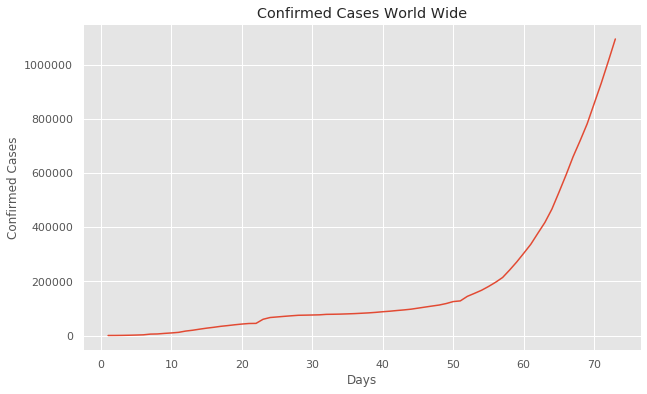

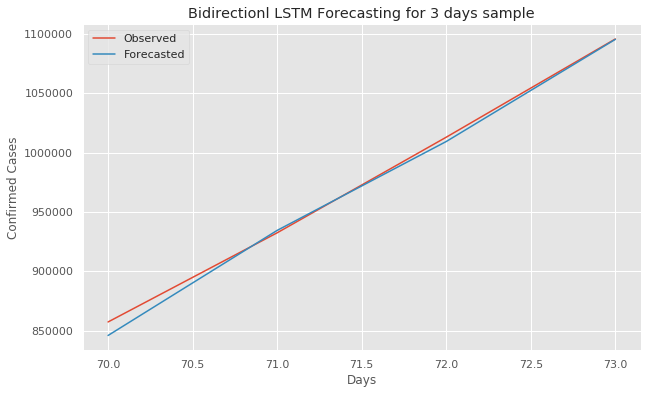

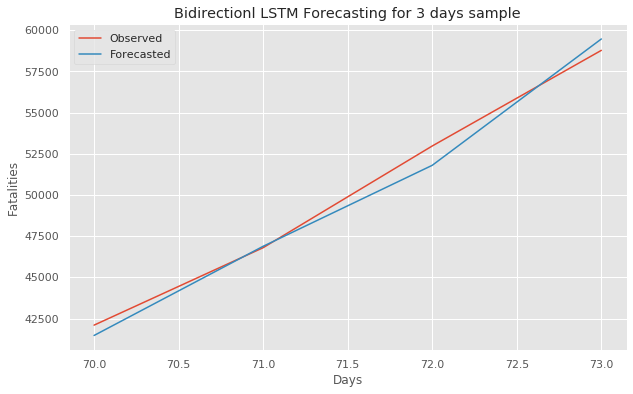

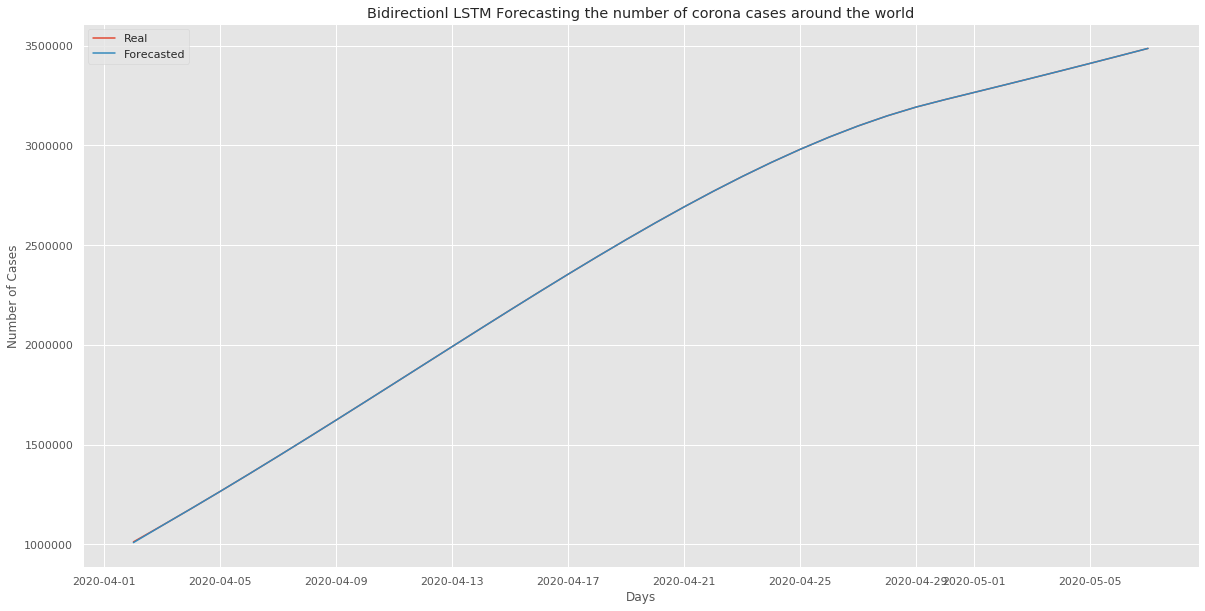

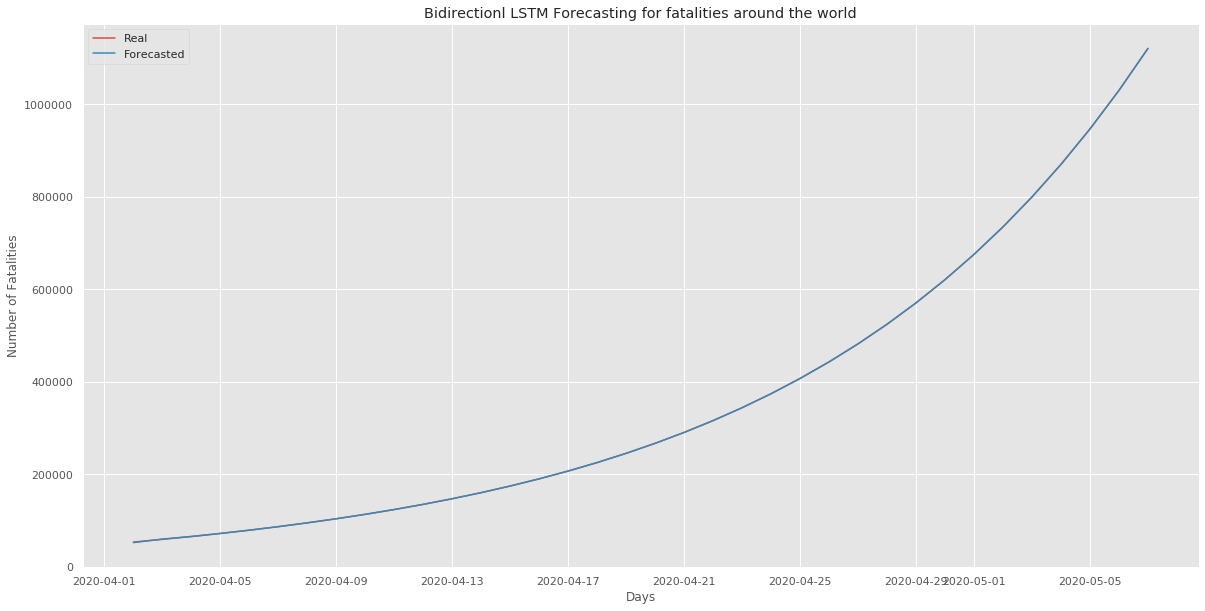

In [143]:
no_of_epochs_cases=3500
no_of_epochs_fat=3500

w3_df=pd.read_csv('train.csv')
w3_df1=w3_df
w3_df=w3_df.groupby('Date').sum()
w3_df=w3_df.reset_index()
w3_df['New Cases']=w3_df['ConfirmedCases'].diff()
w3_df['New Fatalities']=w3_df['Fatalities'].diff()

w3_df['days']=[i for i in range(1,74)]
#print(w3_df.head())

w3_df=w3_df.reset_index()

x=w3_df['Date']
time=w3_df['days']
y=w3_df['ConfirmedCases']
z=w3_df['Fatalities']
time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")
#time.shape

time=np.array(time)
series=np.array(series)
split_time = 69
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 2
batch_size = 3
shuffle_buffer_size = 69

# Bidirectional LSTM
print('-'*20+"Training for Confirmed Cases"+"-"*20)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

world_model_cases = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True,activation="relu")),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation="relu")),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


world_model_cases.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
history = world_model_cases.fit(dataset,epochs=no_of_epochs_cases)

plt.figure(figsize=(10, 6))

plt.plot(time, series)
plt.title("Confirmed Cases World Wide")
plt.ylabel("Confirmed Cases")
plt.xlabel("Days")
#plt.legend()

forecast=[]
for time in range(len(series) - window_size):
    forecast.append(world_model_cases.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
#print(forecast)

plt.figure(figsize=(10, 6))

plt.plot( time_valid, x_valid,label="Observed")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for 3 days sample")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.xlabel("Days")

w3_df=pd.read_csv('train.csv')
w3_df1=w3_df
w3_df=w3_df.groupby('Date').sum()
w3_df=w3_df.reset_index()
w3_df['New Cases']=w3_df['ConfirmedCases'].diff()
w3_df['New Fatalities']=w3_df['Fatalities'].diff()
w3_df
w3_df['days']=[i for i in range(1,74)]
#print(w3_df.head())


print('-'*20+"Training for Fatalities"+"-"*20)
x=w3_df['Date']
time=w3_df['days']
y=w3_df['Fatalities']
time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")
#time.shape

time=np.array(time)
series=np.array(series)
split_time = 69
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 2
batch_size = 3
shuffle_buffer_size = 69

# Bidirectional LSTM

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

world_model_fatalities = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True,activation="relu")),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation="relu")),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


world_model_fatalities.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
history = world_model_fatalities.fit(dataset,epochs=no_of_epochs_fat)



forecast=[]
for time in range(len(series) - window_size):
    forecast.append(world_model_fatalities.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
#print(forecast)

plt.figure(figsize=(10, 6))

plt.plot( time_valid, x_valid,label="Observed")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for 3 days sample")
plt.ylabel("Fatalities")
plt.legend()
plt.xlabel("Days")

#-------------------------------------------------------------------

w3_df=Date_Cases

df=pd.read_csv("test.csv")
df1=Date_Cases
df3=df1.reset_index()

df2=pd.DataFrame()
df2["days_test"]=[x for x in range(1,108)]


#df2=df2.reset_index()
df4 = [df3, df2]
df_test = pd.concat(df4, axis=1)
Date=pd.date_range(start=df_test['Date'].tolist()[0],periods=107)
#print(df_test.head())
x=df_test.iloc[:,0]
time=df_test['days_test']
dates=Date
y=df_test['ConfirmedCases']
#print(df_test.head())
time=time.to_numpy(dtype="float32")
dates=dates.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")

time=np.array(time)
dates=np.array(dates)
series=np.array(series)
split_time = 71
time_train = time[:split_time]
dates_train=dates[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
dates_valid=dates[split_time:]
x_valid = series[split_time:]


window_size = 2
batch_size = 3
shuffle_buffer_size = 73


forecast=[]
for time in range(len(series) - window_size):
    #print(time)
    z=world_model_cases.predict(series[time:time + window_size][np.newaxis])
    #print(z)
    if time >= 71:
        series[time+window_size]=z
        #print(series)
    forecast.append(world_model_cases.predict(series[time:time + window_size][np.newaxis]))




forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
print('-'*80)
print('-'*20+'Forecasting Worldwide'+'-'*20)
print('-'*80)
plt.figure(figsize=(20, 10))

plt.plot( Date[split_time:], x_valid,label="Real")
plt.plot(Date[split_time:], results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting the number of corona cases around the world")
plt.ylabel("Number of Cases")
plt.xlabel("Days")
plt.legend()



x=df_test.iloc[:,0]
time=df_test['days_test']
dates=Date
y=df_test['Fatalities']
time=time.to_numpy(dtype="float32")
dates=dates.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")


time=np.array(time)
dates=np.array(dates)
series=np.array(series)
split_time = 71
time_train = time[:split_time]
dates_train=dates[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
dates_valid=dates[split_time:]
x_valid = series[split_time:]


window_size = 2
batch_size = 3
shuffle_buffer_size = 73


forecast=[]
for time in range(len(series) - window_size):
    #print(time)
    z=world_model_fatalities.predict(series[time:time + window_size][np.newaxis])
    #print(z)
    if time >= 71:
        series[time+window_size]=z
        #print(series)
    forecast.append(world_model_fatalities.predict(series[time:time + window_size][np.newaxis]))




forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(20, 10))


plt.plot( Date[split_time:], x_valid,label="Real")
plt.plot(Date[split_time:], results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for fatalities around the world")
plt.ylabel("Number of Fatalities")
plt.xlabel("Days")
plt.legend()    



print('-'*100)


# Forecasting the Emerging Cases

--------------------Training for Confirmed Cases--------------------
Epoch 1/3500
23/23 [==============================] - 2s 86ms/step - loss: 9542.7890 - mean_absolute_error: 9816.9727
Epoch 2/3500
23/23 [==============================] - 0s 7ms/step - loss: 3468.1830 - mean_absolute_error: 3568.0332
Epoch 3/3500
23/23 [==============================] - 0s 7ms/step - loss: 5428.3194 - mean_absolute_error: 5575.8130
Epoch 4/3500
23/23 [==============================] - 0s 7ms/step - loss: 7150.2719 - mean_absolute_error: 7296.2295
Epoch 5/3500
23/23 [==============================] - 0s 7ms/step - loss: 3630.2851 - mean_absolute_error: 3716.0208
Epoch 6/3500
23/23 [==============================] - 0s 7ms/step - loss: 3637.1698 - mean_absolute_error: 3138.9062
Epoch 7/3500
23/23 [==============================] - 0s 7ms/step - loss: 4331.8973 - mean_absolute_error: 4458.9995
Epoch 8/3500
23/23 [==============================] - 0s 7ms/step - loss: 3695.7608 - mean_absolute_error: 3803

23/23 [==============================] - 0s 7ms/step - loss: 1887.4943 - mean_absolute_error: 1941.9425
Epoch 139/3500
23/23 [==============================] - 0s 7ms/step - loss: 1821.3469 - mean_absolute_error: 1870.8151
Epoch 140/3500
23/23 [==============================] - 0s 7ms/step - loss: 2012.9337 - mean_absolute_error: 2067.0459
Epoch 141/3500
23/23 [==============================] - 0s 7ms/step - loss: 3047.2966 - mean_absolute_error: 3099.4216
Epoch 142/3500
23/23 [==============================] - 0s 7ms/step - loss: 2089.4210 - mean_absolute_error: 2145.5486
Epoch 143/3500
23/23 [==============================] - 0s 7ms/step - loss: 1961.1881 - mean_absolute_error: 2015.4126
Epoch 144/3500
23/23 [==============================] - 0s 7ms/step - loss: 2007.8043 - mean_absolute_error: 2008.3586
Epoch 145/3500
23/23 [==============================] - 0s 7ms/step - loss: 2348.7262 - mean_absolute_error: 2344.3391
Epoch 146/3500
23/23 [==============================] - 0s 7ms/

Epoch 207/3500
23/23 [==============================] - 0s 7ms/step - loss: 2431.3197 - mean_absolute_error: 2411.9321
Epoch 208/3500
23/23 [==============================] - 0s 7ms/step - loss: 2514.3092 - mean_absolute_error: 2556.5400
Epoch 209/3500
23/23 [==============================] - 0s 7ms/step - loss: 2054.0798 - mean_absolute_error: 2088.0835
Epoch 210/3500
23/23 [==============================] - 0s 7ms/step - loss: 2214.2375 - mean_absolute_error: 2226.6733
Epoch 211/3500
23/23 [==============================] - 0s 7ms/step - loss: 1905.1762 - mean_absolute_error: 1944.0371
Epoch 212/3500
23/23 [==============================] - 0s 7ms/step - loss: 1967.9389 - mean_absolute_error: 1967.9382
Epoch 213/3500
23/23 [==============================] - 0s 7ms/step - loss: 2669.1360 - mean_absolute_error: 2706.4060
Epoch 214/3500
23/23 [==============================] - 0s 7ms/step - loss: 2306.5571 - mean_absolute_error: 2202.8831
Epoch 215/3500
23/23 [==========================

Epoch 344/3500
23/23 [==============================] - 0s 7ms/step - loss: 2072.4803 - mean_absolute_error: 2083.5388
Epoch 345/3500
23/23 [==============================] - 0s 7ms/step - loss: 1885.6434 - mean_absolute_error: 1938.8193
Epoch 346/3500
23/23 [==============================] - 0s 7ms/step - loss: 1947.0578 - mean_absolute_error: 1956.6420
Epoch 347/3500
23/23 [==============================] - 0s 7ms/step - loss: 1983.5292 - mean_absolute_error: 1895.8053
Epoch 348/3500
23/23 [==============================] - 0s 7ms/step - loss: 1914.7689 - mean_absolute_error: 1966.4116
Epoch 349/3500
23/23 [==============================] - 0s 7ms/step - loss: 2195.5156 - mean_absolute_error: 2258.6836
Epoch 350/3500
23/23 [==============================] - 0s 7ms/step - loss: 2219.8371 - mean_absolute_error: 2260.9832
Epoch 351/3500
23/23 [==============================] - 0s 7ms/step - loss: 1902.7136 - mean_absolute_error: 1925.9684
Epoch 352/3500
23/23 [==========================

Epoch 481/3500
23/23 [==============================] - 0s 7ms/step - loss: 1959.3119 - mean_absolute_error: 2007.7670
Epoch 482/3500
23/23 [==============================] - 0s 7ms/step - loss: 2274.7421 - mean_absolute_error: 1965.3817
Epoch 483/3500
23/23 [==============================] - 0s 7ms/step - loss: 1951.0089 - mean_absolute_error: 2001.1309
Epoch 484/3500
23/23 [==============================] - 0s 7ms/step - loss: 2241.2352 - mean_absolute_error: 1876.3256
Epoch 485/3500
23/23 [==============================] - 0s 7ms/step - loss: 1983.4938 - mean_absolute_error: 1989.5702
Epoch 486/3500
23/23 [==============================] - 0s 7ms/step - loss: 2010.4689 - mean_absolute_error: 2068.1475
Epoch 487/3500
23/23 [==============================] - 0s 7ms/step - loss: 2405.5170 - mean_absolute_error: 2378.7073
Epoch 488/3500
23/23 [==============================] - 0s 7ms/step - loss: 1841.3560 - mean_absolute_error: 1858.3522
Epoch 489/3500
23/23 [==========================

Epoch 618/3500
23/23 [==============================] - 0s 7ms/step - loss: 2067.5363 - mean_absolute_error: 2115.3240
Epoch 619/3500
23/23 [==============================] - 0s 7ms/step - loss: 1957.4834 - mean_absolute_error: 2003.4792
Epoch 620/3500
23/23 [==============================] - 0s 7ms/step - loss: 1871.3763 - mean_absolute_error: 1877.0391
Epoch 621/3500
23/23 [==============================] - 0s 7ms/step - loss: 2049.9108 - mean_absolute_error: 2056.3135
Epoch 622/3500
23/23 [==============================] - 0s 7ms/step - loss: 1887.9795 - mean_absolute_error: 1928.5526
Epoch 623/3500
23/23 [==============================] - 0s 7ms/step - loss: 1917.2251 - mean_absolute_error: 1963.7703
Epoch 624/3500
23/23 [==============================] - 0s 7ms/step - loss: 1928.5485 - mean_absolute_error: 1956.8214
Epoch 625/3500
23/23 [==============================] - 0s 7ms/step - loss: 1872.2451 - mean_absolute_error: 1922.1075
Epoch 626/3500
23/23 [==========================

Epoch 755/3500
23/23 [==============================] - 0s 7ms/step - loss: 2044.9994 - mean_absolute_error: 1937.3910
Epoch 756/3500
23/23 [==============================] - 0s 7ms/step - loss: 2008.6523 - mean_absolute_error: 2068.6572
Epoch 757/3500
23/23 [==============================] - 0s 7ms/step - loss: 2280.3682 - mean_absolute_error: 1942.6229
Epoch 758/3500
23/23 [==============================] - 0s 7ms/step - loss: 1873.6159 - mean_absolute_error: 1929.7400
Epoch 759/3500
23/23 [==============================] - 0s 7ms/step - loss: 1864.1863 - mean_absolute_error: 1915.1605
Epoch 760/3500
23/23 [==============================] - 0s 7ms/step - loss: 1777.5417 - mean_absolute_error: 1823.1782
Epoch 761/3500
23/23 [==============================] - 0s 7ms/step - loss: 1775.5963 - mean_absolute_error: 1796.9830
Epoch 762/3500
23/23 [==============================] - 0s 7ms/step - loss: 1948.1722 - mean_absolute_error: 2000.6990
Epoch 763/3500
23/23 [==========================

Epoch 892/3500
23/23 [==============================] - 0s 7ms/step - loss: 1838.1189 - mean_absolute_error: 1889.4441
Epoch 893/3500
23/23 [==============================] - 0s 7ms/step - loss: 1934.7186 - mean_absolute_error: 1988.0536
Epoch 894/3500
23/23 [==============================] - 0s 7ms/step - loss: 1868.9104 - mean_absolute_error: 1909.2382
Epoch 895/3500
23/23 [==============================] - 0s 7ms/step - loss: 1828.5416 - mean_absolute_error: 1879.3289
Epoch 896/3500
23/23 [==============================] - 0s 7ms/step - loss: 2244.6765 - mean_absolute_error: 1842.0525
Epoch 897/3500
23/23 [==============================] - 0s 7ms/step - loss: 1914.4445 - mean_absolute_error: 1886.9191
Epoch 898/3500
23/23 [==============================] - 0s 7ms/step - loss: 1947.5131 - mean_absolute_error: 1979.3022
Epoch 899/3500
23/23 [==============================] - 0s 7ms/step - loss: 2045.2841 - mean_absolute_error: 2084.4363
Epoch 900/3500
23/23 [==========================

23/23 [==============================] - 0s 7ms/step - loss: 2185.0891 - mean_absolute_error: 1848.9631
Epoch 1029/3500
23/23 [==============================] - 0s 9ms/step - loss: 1939.9181 - mean_absolute_error: 1966.1677
Epoch 1030/3500
23/23 [==============================] - 0s 7ms/step - loss: 1849.1705 - mean_absolute_error: 1881.2148
Epoch 1031/3500
23/23 [==============================] - 0s 8ms/step - loss: 1924.6918 - mean_absolute_error: 1817.9115
Epoch 1032/3500
23/23 [==============================] - 0s 7ms/step - loss: 1856.9856 - mean_absolute_error: 1828.2135
Epoch 1033/3500
23/23 [==============================] - 0s 8ms/step - loss: 2142.4585 - mean_absolute_error: 1958.1721
Epoch 1034/3500
23/23 [==============================] - 0s 7ms/step - loss: 1856.6027 - mean_absolute_error: 1904.3268
Epoch 1035/3500
23/23 [==============================] - 0s 7ms/step - loss: 1861.5895 - mean_absolute_error: 1866.5585
Epoch 1036/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1954.1477 - mean_absolute_error: 2009.7351
Epoch 1165/3500
23/23 [==============================] - 0s 7ms/step - loss: 1940.0095 - mean_absolute_error: 1985.4834
Epoch 1166/3500
23/23 [==============================] - 0s 7ms/step - loss: 1971.5618 - mean_absolute_error: 1988.5950
Epoch 1167/3500
23/23 [==============================] - 0s 7ms/step - loss: 1826.8618 - mean_absolute_error: 1880.7617
Epoch 1168/3500
23/23 [==============================] - 0s 7ms/step - loss: 1813.4757 - mean_absolute_error: 1863.2495
Epoch 1169/3500
23/23 [==============================] - 0s 7ms/step - loss: 1798.3775 - mean_absolute_error: 1845.6663
Epoch 1170/3500
23/23 [==============================] - 0s 7ms/step - loss: 1722.5288 - mean_absolute_error: 1755.1115
Epoch 1171/3500
23/23 [==============================] - 0s 7ms/step - loss: 1782.0780 - mean_absolute_error: 1824.4484
Epoch 1172/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1822.5512 - mean_absolute_error: 1832.5320
Epoch 1301/3500
23/23 [==============================] - 0s 7ms/step - loss: 1974.3274 - mean_absolute_error: 2032.4993
Epoch 1302/3500
23/23 [==============================] - 0s 7ms/step - loss: 1794.3185 - mean_absolute_error: 1828.8524
Epoch 1303/3500
23/23 [==============================] - 0s 7ms/step - loss: 1923.2519 - mean_absolute_error: 1957.6783
Epoch 1304/3500
23/23 [==============================] - 0s 7ms/step - loss: 2298.6701 - mean_absolute_error: 1962.4664
Epoch 1305/3500
23/23 [==============================] - 0s 7ms/step - loss: 1806.4381 - mean_absolute_error: 1856.1052
Epoch 1306/3500
23/23 [==============================] - 0s 7ms/step - loss: 2072.7240 - mean_absolute_error: 1823.8568
Epoch 1307/3500
23/23 [==============================] - 0s 7ms/step - loss: 1868.1948 - mean_absolute_error: 1828.9370
Epoch 1308/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1933.7759 - mean_absolute_error: 1966.1262
Epoch 1437/3500
23/23 [==============================] - 0s 7ms/step - loss: 1699.4280 - mean_absolute_error: 1697.4176
Epoch 1438/3500
23/23 [==============================] - 0s 7ms/step - loss: 1697.7456 - mean_absolute_error: 1700.5742
Epoch 1439/3500
23/23 [==============================] - 0s 7ms/step - loss: 1910.9426 - mean_absolute_error: 1968.2731
Epoch 1440/3500
23/23 [==============================] - 0s 7ms/step - loss: 1769.5821 - mean_absolute_error: 1773.1953
Epoch 1441/3500
23/23 [==============================] - 0s 7ms/step - loss: 1803.6468 - mean_absolute_error: 1835.6830
Epoch 1442/3500
23/23 [==============================] - 0s 7ms/step - loss: 1741.3402 - mean_absolute_error: 1738.4447
Epoch 1443/3500
23/23 [==============================] - 0s 7ms/step - loss: 1793.6532 - mean_absolute_error: 1817.7452
Epoch 1444/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 2087.4048 - mean_absolute_error: 1838.9290
Epoch 1573/3500
23/23 [==============================] - 0s 7ms/step - loss: 1836.7477 - mean_absolute_error: 1881.0839
Epoch 1574/3500
23/23 [==============================] - 0s 7ms/step - loss: 2098.9091 - mean_absolute_error: 1811.1281
Epoch 1575/3500
23/23 [==============================] - 0s 7ms/step - loss: 2331.6967 - mean_absolute_error: 2395.6724
Epoch 1576/3500
23/23 [==============================] - 0s 7ms/step - loss: 1853.5918 - mean_absolute_error: 1861.3503
Epoch 1577/3500
23/23 [==============================] - 0s 7ms/step - loss: 1752.1223 - mean_absolute_error: 1776.9481
Epoch 1578/3500
23/23 [==============================] - 0s 7ms/step - loss: 1959.6481 - mean_absolute_error: 1999.8939
Epoch 1579/3500
23/23 [==============================] - 0s 7ms/step - loss: 1731.5289 - mean_absolute_error: 1773.4216
Epoch 1580/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 1837.4516 - mean_absolute_error: 1884.5791
Epoch 1709/3500
23/23 [==============================] - 0s 9ms/step - loss: 1845.8737 - mean_absolute_error: 1889.8701
Epoch 1710/3500
23/23 [==============================] - 0s 9ms/step - loss: 1789.8813 - mean_absolute_error: 1833.0381
Epoch 1711/3500
23/23 [==============================] - 0s 8ms/step - loss: 1814.8275 - mean_absolute_error: 1860.1967
Epoch 1712/3500
23/23 [==============================] - 0s 8ms/step - loss: 1805.5834 - mean_absolute_error: 1859.5142
Epoch 1713/3500
23/23 [==============================] - 0s 8ms/step - loss: 1775.8954 - mean_absolute_error: 1828.0809
Epoch 1714/3500
23/23 [==============================] - 0s 7ms/step - loss: 1799.0750 - mean_absolute_error: 1777.9707
Epoch 1715/3500
23/23 [==============================] - 0s 8ms/step - loss: 1717.9792 - mean_absolute_error: 1764.3257
Epoch 1716/3500
23/23 [==============================] -

23/23 [==============================] - 0s 9ms/step - loss: 2103.7623 - mean_absolute_error: 2095.3569
Epoch 1845/3500
23/23 [==============================] - 0s 7ms/step - loss: 1736.6327 - mean_absolute_error: 1778.0310
Epoch 1846/3500
23/23 [==============================] - 0s 7ms/step - loss: 1812.9857 - mean_absolute_error: 1832.1917
Epoch 1847/3500
23/23 [==============================] - 0s 8ms/step - loss: 1802.5706 - mean_absolute_error: 1838.2000
Epoch 1848/3500
23/23 [==============================] - 0s 8ms/step - loss: 1868.2627 - mean_absolute_error: 1914.7086
Epoch 1849/3500
23/23 [==============================] - 0s 7ms/step - loss: 1779.0136 - mean_absolute_error: 1827.3395
Epoch 1850/3500
23/23 [==============================] - 0s 8ms/step - loss: 1766.1755 - mean_absolute_error: 1817.2468
Epoch 1851/3500
23/23 [==============================] - 0s 7ms/step - loss: 1847.3454 - mean_absolute_error: 1900.1287
Epoch 1852/3500
23/23 [==============================] -

23/23 [==============================] - 0s 9ms/step - loss: 2232.5086 - mean_absolute_error: 2299.3320
Epoch 1981/3500
23/23 [==============================] - 0s 8ms/step - loss: 1951.5870 - mean_absolute_error: 1985.4130
Epoch 1982/3500
23/23 [==============================] - 0s 7ms/step - loss: 1987.2567 - mean_absolute_error: 2035.9757
Epoch 1983/3500
23/23 [==============================] - 0s 9ms/step - loss: 2026.5508 - mean_absolute_error: 2074.2368
Epoch 1984/3500
23/23 [==============================] - 0s 7ms/step - loss: 1866.9270 - mean_absolute_error: 1850.2947
Epoch 1985/3500
23/23 [==============================] - 0s 8ms/step - loss: 2049.4574 - mean_absolute_error: 2008.9362
Epoch 1986/3500
23/23 [==============================] - 0s 8ms/step - loss: 1869.1648 - mean_absolute_error: 1874.9806
Epoch 1987/3500
23/23 [==============================] - 0s 8ms/step - loss: 1878.5613 - mean_absolute_error: 1921.9585
Epoch 1988/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1706.3422 - mean_absolute_error: 1749.8527
Epoch 2117/3500
23/23 [==============================] - 0s 7ms/step - loss: 1832.7053 - mean_absolute_error: 1871.5131
Epoch 2118/3500
23/23 [==============================] - 0s 7ms/step - loss: 1992.4404 - mean_absolute_error: 2035.7567
Epoch 2119/3500
23/23 [==============================] - 0s 7ms/step - loss: 1816.5522 - mean_absolute_error: 1858.1683
Epoch 2120/3500
23/23 [==============================] - 0s 7ms/step - loss: 1667.5132 - mean_absolute_error: 1712.0968
Epoch 2121/3500
23/23 [==============================] - 0s 7ms/step - loss: 1771.1162 - mean_absolute_error: 1805.2062
Epoch 2122/3500
23/23 [==============================] - 0s 7ms/step - loss: 1755.9496 - mean_absolute_error: 1788.4414
Epoch 2123/3500
23/23 [==============================] - 0s 7ms/step - loss: 1843.3640 - mean_absolute_error: 1883.8096
Epoch 2124/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1779.2454 - mean_absolute_error: 1829.8416
Epoch 2253/3500
23/23 [==============================] - 0s 7ms/step - loss: 1710.3692 - mean_absolute_error: 1745.7584
Epoch 2254/3500
23/23 [==============================] - 0s 8ms/step - loss: 1770.6560 - mean_absolute_error: 1790.3837
Epoch 2255/3500
23/23 [==============================] - 0s 7ms/step - loss: 1981.8053 - mean_absolute_error: 2041.0538
Epoch 2256/3500
23/23 [==============================] - 0s 8ms/step - loss: 1735.6264 - mean_absolute_error: 1768.6154
Epoch 2257/3500
23/23 [==============================] - 0s 8ms/step - loss: 1767.4835 - mean_absolute_error: 1818.2649
Epoch 2258/3500
23/23 [==============================] - 0s 7ms/step - loss: 1743.3544 - mean_absolute_error: 1741.7852
Epoch 2259/3500
23/23 [==============================] - 0s 7ms/step - loss: 1765.7656 - mean_absolute_error: 1809.5443
Epoch 2260/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1947.5425 - mean_absolute_error: 1945.4421
Epoch 2389/3500
23/23 [==============================] - 0s 7ms/step - loss: 1848.8475 - mean_absolute_error: 1892.1523
Epoch 2390/3500
23/23 [==============================] - 0s 8ms/step - loss: 1830.0968 - mean_absolute_error: 1884.9585
Epoch 2391/3500
23/23 [==============================] - 0s 7ms/step - loss: 1834.2229 - mean_absolute_error: 1889.4144
Epoch 2392/3500
23/23 [==============================] - 0s 8ms/step - loss: 2014.6767 - mean_absolute_error: 1819.7845
Epoch 2393/3500
23/23 [==============================] - 0s 7ms/step - loss: 2171.4197 - mean_absolute_error: 1971.9851
Epoch 2394/3500
23/23 [==============================] - 0s 7ms/step - loss: 1696.8260 - mean_absolute_error: 1695.9062
Epoch 2395/3500
23/23 [==============================] - 0s 7ms/step - loss: 1818.8027 - mean_absolute_error: 1829.5818
Epoch 2396/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1822.4492 - mean_absolute_error: 1865.6271
Epoch 2525/3500
23/23 [==============================] - 0s 8ms/step - loss: 1781.5284 - mean_absolute_error: 1833.6318
Epoch 2526/3500
23/23 [==============================] - 0s 7ms/step - loss: 1677.1007 - mean_absolute_error: 1711.6736
Epoch 2527/3500
23/23 [==============================] - 0s 7ms/step - loss: 1668.6262 - mean_absolute_error: 1716.1185
Epoch 2528/3500
23/23 [==============================] - 0s 7ms/step - loss: 1732.8541 - mean_absolute_error: 1784.7632
Epoch 2529/3500
23/23 [==============================] - 0s 7ms/step - loss: 1670.9018 - mean_absolute_error: 1707.7373
Epoch 2530/3500
23/23 [==============================] - 0s 8ms/step - loss: 1700.1775 - mean_absolute_error: 1751.3522
Epoch 2531/3500
23/23 [==============================] - 0s 7ms/step - loss: 1767.3267 - mean_absolute_error: 1791.1338
Epoch 2532/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1667.2418 - mean_absolute_error: 1713.2234
Epoch 2661/3500
23/23 [==============================] - 0s 8ms/step - loss: 1781.1433 - mean_absolute_error: 1777.5966
Epoch 2662/3500
23/23 [==============================] - 0s 8ms/step - loss: 1795.1454 - mean_absolute_error: 1820.9414
Epoch 2663/3500
23/23 [==============================] - 0s 8ms/step - loss: 1689.5916 - mean_absolute_error: 1730.0929
Epoch 2664/3500
23/23 [==============================] - 0s 8ms/step - loss: 1966.8018 - mean_absolute_error: 1748.8269
Epoch 2665/3500
23/23 [==============================] - 0s 7ms/step - loss: 1648.3444 - mean_absolute_error: 1695.8204
Epoch 2666/3500
23/23 [==============================] - 0s 8ms/step - loss: 1868.8251 - mean_absolute_error: 1783.9857
Epoch 2667/3500
23/23 [==============================] - 0s 8ms/step - loss: 1783.2872 - mean_absolute_error: 1812.6375
Epoch 2668/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1668.0102 - mean_absolute_error: 1694.5731
Epoch 2797/3500
23/23 [==============================] - 0s 8ms/step - loss: 1837.6488 - mean_absolute_error: 1824.5398
Epoch 2798/3500
23/23 [==============================] - 0s 7ms/step - loss: 1746.2449 - mean_absolute_error: 1700.0967
Epoch 2799/3500
23/23 [==============================] - 0s 8ms/step - loss: 1750.4175 - mean_absolute_error: 1786.1847
Epoch 2800/3500
23/23 [==============================] - 0s 7ms/step - loss: 1771.2630 - mean_absolute_error: 1788.6726
Epoch 2801/3500
23/23 [==============================] - 0s 7ms/step - loss: 1786.3356 - mean_absolute_error: 1791.8574
Epoch 2802/3500
23/23 [==============================] - 0s 8ms/step - loss: 1813.4913 - mean_absolute_error: 1822.0664
Epoch 2803/3500
23/23 [==============================] - 0s 7ms/step - loss: 1846.8201 - mean_absolute_error: 1891.6155
Epoch 2804/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 1615.3714 - mean_absolute_error: 1660.6133
Epoch 2933/3500
23/23 [==============================] - 0s 7ms/step - loss: 1783.4716 - mean_absolute_error: 1809.5316
Epoch 2934/3500
23/23 [==============================] - 0s 8ms/step - loss: 1814.4580 - mean_absolute_error: 1868.0040
Epoch 2935/3500
23/23 [==============================] - 0s 7ms/step - loss: 1711.1965 - mean_absolute_error: 1728.9617
Epoch 2936/3500
23/23 [==============================] - 0s 7ms/step - loss: 1771.7244 - mean_absolute_error: 1814.4355
Epoch 2937/3500
23/23 [==============================] - 0s 7ms/step - loss: 1803.1322 - mean_absolute_error: 1853.3135
Epoch 2938/3500
23/23 [==============================] - 0s 7ms/step - loss: 1695.3052 - mean_absolute_error: 1733.5404
Epoch 2939/3500
23/23 [==============================] - 0s 8ms/step - loss: 1778.1751 - mean_absolute_error: 1810.1835
Epoch 2940/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 1700.6681 - mean_absolute_error: 1749.6864
Epoch 3069/3500
23/23 [==============================] - 0s 7ms/step - loss: 1753.0233 - mean_absolute_error: 1734.0116
Epoch 3070/3500
23/23 [==============================] - 0s 8ms/step - loss: 1740.5672 - mean_absolute_error: 1741.3972
Epoch 3071/3500
23/23 [==============================] - 0s 7ms/step - loss: 1827.1315 - mean_absolute_error: 1880.7773
Epoch 3072/3500
23/23 [==============================] - 0s 7ms/step - loss: 1697.1970 - mean_absolute_error: 1736.9955
Epoch 3073/3500
23/23 [==============================] - 0s 8ms/step - loss: 1648.8474 - mean_absolute_error: 1680.9325
Epoch 3074/3500
23/23 [==============================] - 0s 8ms/step - loss: 1680.7521 - mean_absolute_error: 1706.3237
Epoch 3075/3500
23/23 [==============================] - 0s 8ms/step - loss: 1660.6156 - mean_absolute_error: 1660.2557
Epoch 3076/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 1752.0806 - mean_absolute_error: 1793.8606
Epoch 3205/3500
23/23 [==============================] - 0s 7ms/step - loss: 1640.8969 - mean_absolute_error: 1652.8373
Epoch 3206/3500
23/23 [==============================] - 0s 8ms/step - loss: 1841.0276 - mean_absolute_error: 1846.1278
Epoch 3207/3500
23/23 [==============================] - 0s 7ms/step - loss: 2061.7632 - mean_absolute_error: 1832.8545
Epoch 3208/3500
23/23 [==============================] - 0s 7ms/step - loss: 1660.4076 - mean_absolute_error: 1709.0754
Epoch 3209/3500
23/23 [==============================] - 0s 8ms/step - loss: 1744.2528 - mean_absolute_error: 1769.7827
Epoch 3210/3500
23/23 [==============================] - 0s 7ms/step - loss: 1717.4425 - mean_absolute_error: 1767.7751
Epoch 3211/3500
23/23 [==============================] - 0s 8ms/step - loss: 1671.4218 - mean_absolute_error: 1720.8208
Epoch 3212/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 1709.3640 - mean_absolute_error: 1737.3763
Epoch 3341/3500
23/23 [==============================] - 0s 8ms/step - loss: 1942.4311 - mean_absolute_error: 1972.0450
Epoch 3342/3500
23/23 [==============================] - 0s 8ms/step - loss: 1971.5239 - mean_absolute_error: 1729.1918
Epoch 3343/3500
23/23 [==============================] - 0s 7ms/step - loss: 1868.2238 - mean_absolute_error: 1895.2002
Epoch 3344/3500
23/23 [==============================] - 0s 8ms/step - loss: 1703.7771 - mean_absolute_error: 1753.5690
Epoch 3345/3500
23/23 [==============================] - 0s 7ms/step - loss: 1905.6566 - mean_absolute_error: 1914.1141
Epoch 3346/3500
23/23 [==============================] - 0s 7ms/step - loss: 1865.0777 - mean_absolute_error: 1886.4790
Epoch 3347/3500
23/23 [==============================] - 0s 8ms/step - loss: 2247.5250 - mean_absolute_error: 2272.5166
Epoch 3348/3500
23/23 [==============================] -

23/23 [==============================] - 0s 8ms/step - loss: 1703.6948 - mean_absolute_error: 1716.0527
Epoch 3477/3500
23/23 [==============================] - 0s 7ms/step - loss: 2519.1412 - mean_absolute_error: 2300.0767
Epoch 3478/3500
23/23 [==============================] - 0s 7ms/step - loss: 1948.1815 - mean_absolute_error: 1999.9155
Epoch 3479/3500
23/23 [==============================] - 0s 7ms/step - loss: 1688.1306 - mean_absolute_error: 1727.9668
Epoch 3480/3500
23/23 [==============================] - 0s 7ms/step - loss: 1983.7201 - mean_absolute_error: 1766.5618
Epoch 3481/3500
23/23 [==============================] - 0s 8ms/step - loss: 1692.3790 - mean_absolute_error: 1729.3954
Epoch 3482/3500
23/23 [==============================] - 0s 7ms/step - loss: 2176.5323 - mean_absolute_error: 1978.0664
Epoch 3483/3500
23/23 [==============================] - 0s 7ms/step - loss: 1732.2255 - mean_absolute_error: 1768.2920
Epoch 3484/3500
23/23 [==============================] -

23/23 [==============================] - 0s 7ms/step - loss: 62.1526 - mean_absolute_error: 60.9828
Epoch 117/3500
23/23 [==============================] - 0s 8ms/step - loss: 75.3618 - mean_absolute_error: 78.0993
Epoch 118/3500
23/23 [==============================] - 0s 8ms/step - loss: 59.0205 - mean_absolute_error: 58.2302
Epoch 119/3500
23/23 [==============================] - 0s 7ms/step - loss: 51.7756 - mean_absolute_error: 53.7459
Epoch 120/3500
23/23 [==============================] - 0s 8ms/step - loss: 57.9308 - mean_absolute_error: 59.8169
Epoch 121/3500
23/23 [==============================] - 0s 7ms/step - loss: 56.0039 - mean_absolute_error: 55.5774
Epoch 122/3500
23/23 [==============================] - 0s 8ms/step - loss: 51.3666 - mean_absolute_error: 52.0012
Epoch 123/3500
23/23 [==============================] - 0s 8ms/step - loss: 62.3805 - mean_absolute_error: 64.6093
Epoch 124/3500
23/23 [==============================] - 0s 8ms/step - loss: 61.9506 - mean_abso

23/23 [==============================] - 0s 7ms/step - loss: 50.0866 - mean_absolute_error: 51.7505
Epoch 259/3500
23/23 [==============================] - 0s 7ms/step - loss: 53.3607 - mean_absolute_error: 50.6435
Epoch 260/3500
23/23 [==============================] - 0s 7ms/step - loss: 64.8699 - mean_absolute_error: 60.5042
Epoch 261/3500
23/23 [==============================] - 0s 7ms/step - loss: 50.3860 - mean_absolute_error: 52.2490
Epoch 262/3500
23/23 [==============================] - 0s 7ms/step - loss: 54.2932 - mean_absolute_error: 53.4442
Epoch 263/3500
23/23 [==============================] - 0s 7ms/step - loss: 62.3580 - mean_absolute_error: 64.2201
Epoch 264/3500
23/23 [==============================] - 0s 7ms/step - loss: 55.1559 - mean_absolute_error: 55.4628
Epoch 265/3500
23/23 [==============================] - 0s 7ms/step - loss: 50.9097 - mean_absolute_error: 52.4530
Epoch 266/3500
23/23 [==============================] - 0s 7ms/step - loss: 51.1711 - mean_abso

23/23 [==============================] - 0s 8ms/step - loss: 66.9857 - mean_absolute_error: 66.6898
Epoch 400/3500
23/23 [==============================] - 0s 7ms/step - loss: 51.3239 - mean_absolute_error: 52.6557
Epoch 401/3500
23/23 [==============================] - 0s 8ms/step - loss: 49.9398 - mean_absolute_error: 51.7043
Epoch 402/3500
23/23 [==============================] - 0s 7ms/step - loss: 53.2379 - mean_absolute_error: 55.2980
Epoch 403/3500
23/23 [==============================] - 0s 8ms/step - loss: 55.7808 - mean_absolute_error: 57.8511
Epoch 404/3500
23/23 [==============================] - 0s 7ms/step - loss: 55.1892 - mean_absolute_error: 56.7730
Epoch 405/3500
23/23 [==============================] - 0s 8ms/step - loss: 55.0453 - mean_absolute_error: 56.9473
Epoch 406/3500
23/23 [==============================] - 0s 8ms/step - loss: 53.7858 - mean_absolute_error: 52.4106
Epoch 407/3500
23/23 [==============================] - 0s 8ms/step - loss: 54.5601 - mean_abso

23/23 [==============================] - 0s 8ms/step - loss: 53.2813 - mean_absolute_error: 54.9301
Epoch 542/3500
23/23 [==============================] - 0s 7ms/step - loss: 61.9895 - mean_absolute_error: 64.1620
Epoch 543/3500
23/23 [==============================] - 0s 8ms/step - loss: 59.9077 - mean_absolute_error: 61.7608
Epoch 544/3500
23/23 [==============================] - 0s 8ms/step - loss: 58.5064 - mean_absolute_error: 60.0486
Epoch 545/3500
23/23 [==============================] - 0s 7ms/step - loss: 50.9988 - mean_absolute_error: 52.3745
Epoch 546/3500
23/23 [==============================] - 0s 7ms/step - loss: 57.0209 - mean_absolute_error: 59.1919
Epoch 547/3500
23/23 [==============================] - 0s 8ms/step - loss: 66.9544 - mean_absolute_error: 69.0936
Epoch 548/3500
23/23 [==============================] - 0s 7ms/step - loss: 48.2081 - mean_absolute_error: 50.1136
Epoch 549/3500
23/23 [==============================] - 0s 7ms/step - loss: 48.6404 - mean_abso

23/23 [==============================] - 0s 7ms/step - loss: 73.0821 - mean_absolute_error: 75.5385
Epoch 684/3500
23/23 [==============================] - 0s 8ms/step - loss: 67.0730 - mean_absolute_error: 68.5548
Epoch 685/3500
23/23 [==============================] - 0s 7ms/step - loss: 66.9420 - mean_absolute_error: 68.7827
Epoch 686/3500
23/23 [==============================] - 0s 7ms/step - loss: 59.3892 - mean_absolute_error: 61.0950
Epoch 687/3500
23/23 [==============================] - 0s 8ms/step - loss: 54.4622 - mean_absolute_error: 56.1084
Epoch 688/3500
23/23 [==============================] - 0s 7ms/step - loss: 55.0435 - mean_absolute_error: 56.4864
Epoch 689/3500
23/23 [==============================] - 0s 8ms/step - loss: 53.1868 - mean_absolute_error: 54.4684
Epoch 690/3500
23/23 [==============================] - 0s 8ms/step - loss: 49.4793 - mean_absolute_error: 51.2993
Epoch 691/3500
23/23 [==============================] - 0s 8ms/step - loss: 71.3781 - mean_abso

23/23 [==============================] - 0s 9ms/step - loss: 50.8762 - mean_absolute_error: 50.2685
Epoch 826/3500
23/23 [==============================] - 0s 9ms/step - loss: 68.2499 - mean_absolute_error: 70.6753
Epoch 827/3500
23/23 [==============================] - 0s 10ms/step - loss: 72.3859 - mean_absolute_error: 68.2836
Epoch 828/3500
23/23 [==============================] - 0s 7ms/step - loss: 61.3166 - mean_absolute_error: 50.4036
Epoch 829/3500
23/23 [==============================] - 0s 8ms/step - loss: 69.4802 - mean_absolute_error: 71.7901
Epoch 830/3500
23/23 [==============================] - 0s 7ms/step - loss: 56.5857 - mean_absolute_error: 49.4681
Epoch 831/3500
23/23 [==============================] - 0s 8ms/step - loss: 47.9890 - mean_absolute_error: 49.7059
Epoch 832/3500
23/23 [==============================] - 0s 7ms/step - loss: 48.1771 - mean_absolute_error: 49.6082
Epoch 833/3500
23/23 [==============================] - 0s 8ms/step - loss: 50.4535 - mean_abs

23/23 [==============================] - 0s 7ms/step - loss: 66.0953 - mean_absolute_error: 59.2519
Epoch 968/3500
23/23 [==============================] - 0s 7ms/step - loss: 65.5498 - mean_absolute_error: 58.6374
Epoch 969/3500
23/23 [==============================] - 0s 8ms/step - loss: 57.4380 - mean_absolute_error: 57.8907
Epoch 970/3500
23/23 [==============================] - 0s 8ms/step - loss: 64.5834 - mean_absolute_error: 64.0652
Epoch 971/3500
23/23 [==============================] - 0s 7ms/step - loss: 66.1202 - mean_absolute_error: 67.9112
Epoch 972/3500
23/23 [==============================] - 0s 8ms/step - loss: 62.5443 - mean_absolute_error: 64.0370
Epoch 973/3500
23/23 [==============================] - 0s 7ms/step - loss: 64.5292 - mean_absolute_error: 60.5393
Epoch 974/3500
23/23 [==============================] - 0s 8ms/step - loss: 58.5191 - mean_absolute_error: 60.4621
Epoch 975/3500
23/23 [==============================] - 0s 8ms/step - loss: 60.3524 - mean_abso

23/23 [==============================] - 0s 7ms/step - loss: 51.7084 - mean_absolute_error: 49.5603
Epoch 1039/3500
23/23 [==============================] - 0s 7ms/step - loss: 51.0493 - mean_absolute_error: 52.7826
Epoch 1040/3500
23/23 [==============================] - 0s 8ms/step - loss: 47.1077 - mean_absolute_error: 48.9044
Epoch 1041/3500
23/23 [==============================] - 0s 7ms/step - loss: 47.5115 - mean_absolute_error: 48.6075
Epoch 1042/3500
23/23 [==============================] - 0s 7ms/step - loss: 49.5367 - mean_absolute_error: 50.9240
Epoch 1043/3500
23/23 [==============================] - 0s 7ms/step - loss: 55.6802 - mean_absolute_error: 57.2616
Epoch 1044/3500
23/23 [==============================] - 0s 8ms/step - loss: 52.0869 - mean_absolute_error: 53.6877
Epoch 1045/3500
23/23 [==============================] - 0s 8ms/step - loss: 50.3816 - mean_absolute_error: 49.8134
Epoch 1046/3500
23/23 [==============================] - 0s 7ms/step - loss: 53.1263 - m

23/23 [==============================] - 0s 7ms/step - loss: 57.9239 - mean_absolute_error: 56.9092
Epoch 1179/3500
23/23 [==============================] - 0s 8ms/step - loss: 49.2732 - mean_absolute_error: 51.0058
Epoch 1180/3500
23/23 [==============================] - 0s 7ms/step - loss: 58.1919 - mean_absolute_error: 58.7039
Epoch 1181/3500
23/23 [==============================] - 0s 7ms/step - loss: 48.0689 - mean_absolute_error: 49.9809
Epoch 1182/3500
23/23 [==============================] - 0s 7ms/step - loss: 48.1665 - mean_absolute_error: 49.7672
Epoch 1183/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.9163 - mean_absolute_error: 47.5510
Epoch 1184/3500
23/23 [==============================] - 0s 7ms/step - loss: 54.0074 - mean_absolute_error: 55.4651
Epoch 1185/3500
23/23 [==============================] - 0s 8ms/step - loss: 57.1224 - mean_absolute_error: 55.2388
Epoch 1186/3500
23/23 [==============================] - 0s 8ms/step - loss: 58.3918 - m

23/23 [==============================] - 0s 8ms/step - loss: 50.0458 - mean_absolute_error: 44.5072
Epoch 1319/3500
23/23 [==============================] - 0s 7ms/step - loss: 47.5208 - mean_absolute_error: 49.4052
Epoch 1320/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.4586 - mean_absolute_error: 45.9043
Epoch 1321/3500
23/23 [==============================] - 0s 7ms/step - loss: 59.2727 - mean_absolute_error: 58.8898
Epoch 1322/3500
23/23 [==============================] - 0s 7ms/step - loss: 50.7575 - mean_absolute_error: 50.2814
Epoch 1323/3500
23/23 [==============================] - 0s 8ms/step - loss: 47.0427 - mean_absolute_error: 48.9017
Epoch 1324/3500
23/23 [==============================] - 0s 8ms/step - loss: 48.2959 - mean_absolute_error: 49.9969
Epoch 1325/3500
23/23 [==============================] - 0s 8ms/step - loss: 48.6000 - mean_absolute_error: 50.3161
Epoch 1326/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.4315 - m

23/23 [==============================] - 0s 8ms/step - loss: 43.2532 - mean_absolute_error: 44.9182
Epoch 1459/3500
23/23 [==============================] - 0s 7ms/step - loss: 57.2040 - mean_absolute_error: 59.3960
Epoch 1460/3500
23/23 [==============================] - 0s 7ms/step - loss: 55.8420 - mean_absolute_error: 57.9614
Epoch 1461/3500
23/23 [==============================] - 0s 7ms/step - loss: 50.0951 - mean_absolute_error: 52.0527
Epoch 1462/3500
23/23 [==============================] - 0s 8ms/step - loss: 53.8980 - mean_absolute_error: 46.3528
Epoch 1463/3500
23/23 [==============================] - 0s 7ms/step - loss: 50.3815 - mean_absolute_error: 52.3702
Epoch 1464/3500
23/23 [==============================] - 0s 8ms/step - loss: 45.8769 - mean_absolute_error: 47.6814
Epoch 1465/3500
23/23 [==============================] - 0s 8ms/step - loss: 48.9367 - mean_absolute_error: 50.6581
Epoch 1466/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.5278 - m

23/23 [==============================] - 0s 8ms/step - loss: 52.8537 - mean_absolute_error: 52.2444
Epoch 1599/3500
23/23 [==============================] - 0s 7ms/step - loss: 46.5823 - mean_absolute_error: 46.5236
Epoch 1600/3500
23/23 [==============================] - 0s 8ms/step - loss: 46.7388 - mean_absolute_error: 46.6002
Epoch 1601/3500
23/23 [==============================] - 0s 8ms/step - loss: 45.7876 - mean_absolute_error: 47.5641
Epoch 1602/3500
23/23 [==============================] - 0s 7ms/step - loss: 46.5259 - mean_absolute_error: 47.4848
Epoch 1603/3500
23/23 [==============================] - 0s 8ms/step - loss: 46.8651 - mean_absolute_error: 48.7263
Epoch 1604/3500
23/23 [==============================] - 0s 7ms/step - loss: 62.3319 - mean_absolute_error: 59.7361
Epoch 1605/3500
23/23 [==============================] - 0s 8ms/step - loss: 45.4006 - mean_absolute_error: 46.6423
Epoch 1606/3500
23/23 [==============================] - 0s 7ms/step - loss: 52.2899 - m

23/23 [==============================] - 0s 8ms/step - loss: 47.4684 - mean_absolute_error: 49.1853
Epoch 1739/3500
23/23 [==============================] - 0s 7ms/step - loss: 43.5731 - mean_absolute_error: 44.9729
Epoch 1740/3500
23/23 [==============================] - 0s 8ms/step - loss: 46.0149 - mean_absolute_error: 44.2523
Epoch 1741/3500
23/23 [==============================] - 0s 7ms/step - loss: 47.9233 - mean_absolute_error: 49.4523
Epoch 1742/3500
23/23 [==============================] - 0s 8ms/step - loss: 47.1815 - mean_absolute_error: 48.6430
Epoch 1743/3500
23/23 [==============================] - 0s 7ms/step - loss: 53.7642 - mean_absolute_error: 49.1515
Epoch 1744/3500
23/23 [==============================] - 0s 8ms/step - loss: 50.0613 - mean_absolute_error: 48.6810
Epoch 1745/3500
23/23 [==============================] - 0s 7ms/step - loss: 52.7503 - mean_absolute_error: 54.7881
Epoch 1746/3500
23/23 [==============================] - 0s 8ms/step - loss: 43.2937 - m

23/23 [==============================] - 0s 7ms/step - loss: 50.1761 - mean_absolute_error: 48.3977
Epoch 1879/3500
23/23 [==============================] - 0s 7ms/step - loss: 48.4027 - mean_absolute_error: 49.1413
Epoch 1880/3500
23/23 [==============================] - 0s 7ms/step - loss: 46.8602 - mean_absolute_error: 48.7062
Epoch 1881/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.8826 - mean_absolute_error: 47.6539
Epoch 1882/3500
23/23 [==============================] - 0s 7ms/step - loss: 54.1162 - mean_absolute_error: 49.6029
Epoch 1883/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.3611 - mean_absolute_error: 46.1447
Epoch 1884/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.6616 - mean_absolute_error: 46.2684
Epoch 1885/3500
23/23 [==============================] - 0s 7ms/step - loss: 47.3443 - mean_absolute_error: 45.4304
Epoch 1886/3500
23/23 [==============================] - 0s 7ms/step - loss: 47.7426 - m

23/23 [==============================] - 0s 7ms/step - loss: 45.4801 - mean_absolute_error: 47.3064
Epoch 2019/3500
23/23 [==============================] - 0s 7ms/step - loss: 47.4037 - mean_absolute_error: 49.0020
Epoch 2020/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.0949 - mean_absolute_error: 46.7568
Epoch 2021/3500
23/23 [==============================] - 0s 7ms/step - loss: 46.7886 - mean_absolute_error: 48.0721
Epoch 2022/3500
23/23 [==============================] - 0s 7ms/step - loss: 43.5828 - mean_absolute_error: 45.3471
Epoch 2023/3500
23/23 [==============================] - 0s 7ms/step - loss: 42.7813 - mean_absolute_error: 44.4578
Epoch 2024/3500
23/23 [==============================] - 0s 7ms/step - loss: 41.8826 - mean_absolute_error: 43.5363
Epoch 2025/3500
23/23 [==============================] - 0s 7ms/step - loss: 57.5383 - mean_absolute_error: 54.4526
Epoch 2026/3500
23/23 [==============================] - 0s 7ms/step - loss: 59.9507 - m

23/23 [==============================] - 0s 7ms/step - loss: 45.5012 - mean_absolute_error: 47.1686
Epoch 2159/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.2595 - mean_absolute_error: 46.3584
Epoch 2160/3500
23/23 [==============================] - 0s 7ms/step - loss: 46.1318 - mean_absolute_error: 47.9169
Epoch 2161/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.3454 - mean_absolute_error: 47.1642
Epoch 2162/3500
23/23 [==============================] - 0s 7ms/step - loss: 62.2503 - mean_absolute_error: 48.9189
Epoch 2163/3500
23/23 [==============================] - 0s 7ms/step - loss: 57.0813 - mean_absolute_error: 58.4440
Epoch 2164/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.9082 - mean_absolute_error: 47.4722
Epoch 2165/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.9399 - mean_absolute_error: 46.4701
Epoch 2166/3500
23/23 [==============================] - 0s 7ms/step - loss: 46.4670 - m

23/23 [==============================] - 0s 8ms/step - loss: 41.2091 - mean_absolute_error: 42.7943
Epoch 2299/3500
23/23 [==============================] - 0s 7ms/step - loss: 47.7373 - mean_absolute_error: 44.2436
Epoch 2300/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.9024 - mean_absolute_error: 43.2154
Epoch 2301/3500
23/23 [==============================] - 0s 7ms/step - loss: 40.3415 - mean_absolute_error: 41.8288
Epoch 2302/3500
23/23 [==============================] - 0s 8ms/step - loss: 48.6222 - mean_absolute_error: 50.5298
Epoch 2303/3500
23/23 [==============================] - 0s 7ms/step - loss: 43.2346 - mean_absolute_error: 44.6896
Epoch 2304/3500
23/23 [==============================] - 0s 7ms/step - loss: 43.1303 - mean_absolute_error: 44.7147
Epoch 2305/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.2657 - mean_absolute_error: 43.7847
Epoch 2306/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.3189 - m

23/23 [==============================] - 0s 8ms/step - loss: 44.4665 - mean_absolute_error: 46.2543
Epoch 2439/3500
23/23 [==============================] - 0s 8ms/step - loss: 43.2769 - mean_absolute_error: 45.0058
Epoch 2440/3500
23/23 [==============================] - 0s 7ms/step - loss: 46.9443 - mean_absolute_error: 43.8835
Epoch 2441/3500
23/23 [==============================] - 0s 7ms/step - loss: 41.3306 - mean_absolute_error: 42.1522
Epoch 2442/3500
23/23 [==============================] - 0s 7ms/step - loss: 46.4350 - mean_absolute_error: 48.2993
Epoch 2443/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.3657 - mean_absolute_error: 46.7816
Epoch 2444/3500
23/23 [==============================] - 0s 7ms/step - loss: 50.5512 - mean_absolute_error: 52.1334
Epoch 2445/3500
23/23 [==============================] - 0s 8ms/step - loss: 50.7235 - mean_absolute_error: 49.1725
Epoch 2446/3500
23/23 [==============================] - 0s 7ms/step - loss: 41.1204 - m

23/23 [==============================] - 0s 8ms/step - loss: 40.0379 - mean_absolute_error: 41.6915
Epoch 2579/3500
23/23 [==============================] - 0s 8ms/step - loss: 43.9741 - mean_absolute_error: 45.7033
Epoch 2580/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.2095 - mean_absolute_error: 43.5614
Epoch 2581/3500
23/23 [==============================] - 0s 8ms/step - loss: 43.4833 - mean_absolute_error: 45.2401
Epoch 2582/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.4645 - mean_absolute_error: 44.1310
Epoch 2583/3500
23/23 [==============================] - 0s 8ms/step - loss: 41.9818 - mean_absolute_error: 43.6814
Epoch 2584/3500
23/23 [==============================] - 0s 7ms/step - loss: 54.0359 - mean_absolute_error: 52.4374
Epoch 2585/3500
23/23 [==============================] - 0s 8ms/step - loss: 44.0136 - mean_absolute_error: 45.7513
Epoch 2586/3500
23/23 [==============================] - 0s 8ms/step - loss: 44.2615 - m

23/23 [==============================] - 0s 8ms/step - loss: 41.7202 - mean_absolute_error: 43.4270
Epoch 2719/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.7016 - mean_absolute_error: 44.3970
Epoch 2720/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.7144 - mean_absolute_error: 44.4629
Epoch 2721/3500
23/23 [==============================] - 0s 9ms/step - loss: 44.9897 - mean_absolute_error: 44.9884
Epoch 2722/3500
23/23 [==============================] - 0s 8ms/step - loss: 44.4291 - mean_absolute_error: 46.1002
Epoch 2723/3500
23/23 [==============================] - 0s 7ms/step - loss: 47.5192 - mean_absolute_error: 49.2881
Epoch 2724/3500
23/23 [==============================] - 0s 7ms/step - loss: 43.1163 - mean_absolute_error: 44.8819
Epoch 2725/3500
23/23 [==============================] - 0s 7ms/step - loss: 46.7816 - mean_absolute_error: 44.6603
Epoch 2726/3500
23/23 [==============================] - 0s 7ms/step - loss: 43.9267 - m

23/23 [==============================] - 0s 7ms/step - loss: 44.5345 - mean_absolute_error: 46.3163
Epoch 2859/3500
23/23 [==============================] - 0s 8ms/step - loss: 41.5037 - mean_absolute_error: 42.9570
Epoch 2860/3500
23/23 [==============================] - 0s 7ms/step - loss: 42.2307 - mean_absolute_error: 43.9010
Epoch 2861/3500
23/23 [==============================] - 0s 7ms/step - loss: 42.9238 - mean_absolute_error: 42.8730
Epoch 2862/3500
23/23 [==============================] - 0s 7ms/step - loss: 42.4208 - mean_absolute_error: 44.1133
Epoch 2863/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.2019 - mean_absolute_error: 45.9701
Epoch 2864/3500
23/23 [==============================] - 0s 8ms/step - loss: 44.3234 - mean_absolute_error: 43.0469
Epoch 2865/3500
23/23 [==============================] - 0s 7ms/step - loss: 40.5396 - mean_absolute_error: 42.2206
Epoch 2866/3500
23/23 [==============================] - 0s 8ms/step - loss: 41.0800 - m

23/23 [==============================] - 0s 8ms/step - loss: 44.3060 - mean_absolute_error: 43.1995
Epoch 2999/3500
23/23 [==============================] - 0s 7ms/step - loss: 43.8417 - mean_absolute_error: 45.4526
Epoch 3000/3500
23/23 [==============================] - 0s 7ms/step - loss: 42.8555 - mean_absolute_error: 44.5508
Epoch 3001/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.7731 - mean_absolute_error: 44.3150
Epoch 3002/3500
23/23 [==============================] - 0s 7ms/step - loss: 40.7984 - mean_absolute_error: 42.3941
Epoch 3003/3500
23/23 [==============================] - 0s 8ms/step - loss: 41.3952 - mean_absolute_error: 43.0033
Epoch 3004/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.0988 - mean_absolute_error: 45.8461
Epoch 3005/3500
23/23 [==============================] - 0s 7ms/step - loss: 40.9118 - mean_absolute_error: 42.5205
Epoch 3006/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.9678 - m

23/23 [==============================] - 0s 8ms/step - loss: 52.9281 - mean_absolute_error: 50.2960
Epoch 3139/3500
23/23 [==============================] - 0s 8ms/step - loss: 44.3767 - mean_absolute_error: 45.8554
Epoch 3140/3500
23/23 [==============================] - 0s 8ms/step - loss: 48.3288 - mean_absolute_error: 45.5621
Epoch 3141/3500
23/23 [==============================] - 0s 8ms/step - loss: 39.4205 - mean_absolute_error: 40.6521
Epoch 3142/3500
23/23 [==============================] - 0s 7ms/step - loss: 45.5315 - mean_absolute_error: 47.2582
Epoch 3143/3500
23/23 [==============================] - 0s 8ms/step - loss: 43.6975 - mean_absolute_error: 42.7101
Epoch 3144/3500
23/23 [==============================] - 0s 7ms/step - loss: 48.1558 - mean_absolute_error: 48.4034
Epoch 3145/3500
23/23 [==============================] - 0s 8ms/step - loss: 44.8884 - mean_absolute_error: 46.3212
Epoch 3146/3500
23/23 [==============================] - 0s 8ms/step - loss: 46.7442 - m

23/23 [==============================] - 0s 8ms/step - loss: 43.3079 - mean_absolute_error: 44.8305
Epoch 3279/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.6639 - mean_absolute_error: 43.1924
Epoch 3280/3500
23/23 [==============================] - 0s 8ms/step - loss: 45.4685 - mean_absolute_error: 47.0903
Epoch 3281/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.5035 - mean_absolute_error: 41.9862
Epoch 3282/3500
23/23 [==============================] - 0s 7ms/step - loss: 42.0226 - mean_absolute_error: 43.1447
Epoch 3283/3500
23/23 [==============================] - 0s 7ms/step - loss: 40.3646 - mean_absolute_error: 41.9736
Epoch 3284/3500
23/23 [==============================] - 0s 7ms/step - loss: 43.6697 - mean_absolute_error: 41.9658
Epoch 3285/3500
23/23 [==============================] - 0s 8ms/step - loss: 43.6017 - mean_absolute_error: 45.3554
Epoch 3286/3500
23/23 [==============================] - 0s 7ms/step - loss: 41.8537 - m

23/23 [==============================] - 0s 8ms/step - loss: 42.7411 - mean_absolute_error: 44.4192
Epoch 3419/3500
23/23 [==============================] - 0s 7ms/step - loss: 44.3193 - mean_absolute_error: 42.2815
Epoch 3420/3500
23/23 [==============================] - 0s 8ms/step - loss: 40.6315 - mean_absolute_error: 42.2479
Epoch 3421/3500
23/23 [==============================] - 0s 7ms/step - loss: 42.7781 - mean_absolute_error: 43.9927
Epoch 3422/3500
23/23 [==============================] - 0s 8ms/step - loss: 44.0221 - mean_absolute_error: 43.1327
Epoch 3423/3500
23/23 [==============================] - 0s 8ms/step - loss: 46.2015 - mean_absolute_error: 47.9956
Epoch 3424/3500
23/23 [==============================] - 0s 7ms/step - loss: 49.7378 - mean_absolute_error: 46.9506
Epoch 3425/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.5631 - mean_absolute_error: 43.3737
Epoch 3426/3500
23/23 [==============================] - 0s 8ms/step - loss: 44.4783 - m

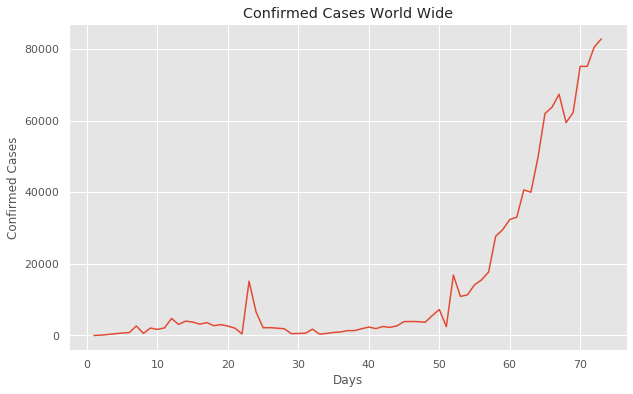

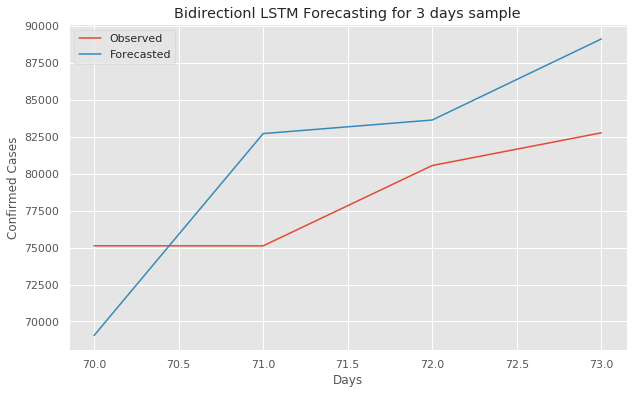

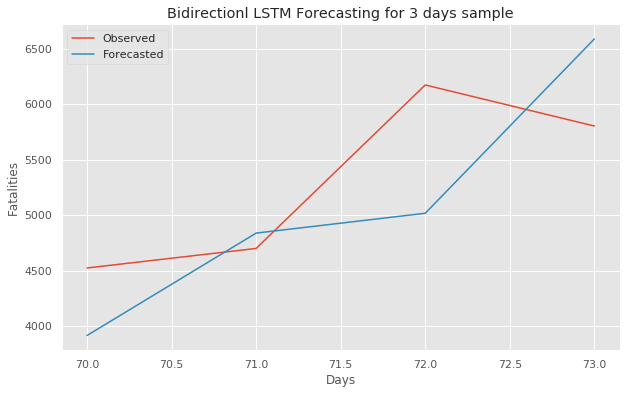

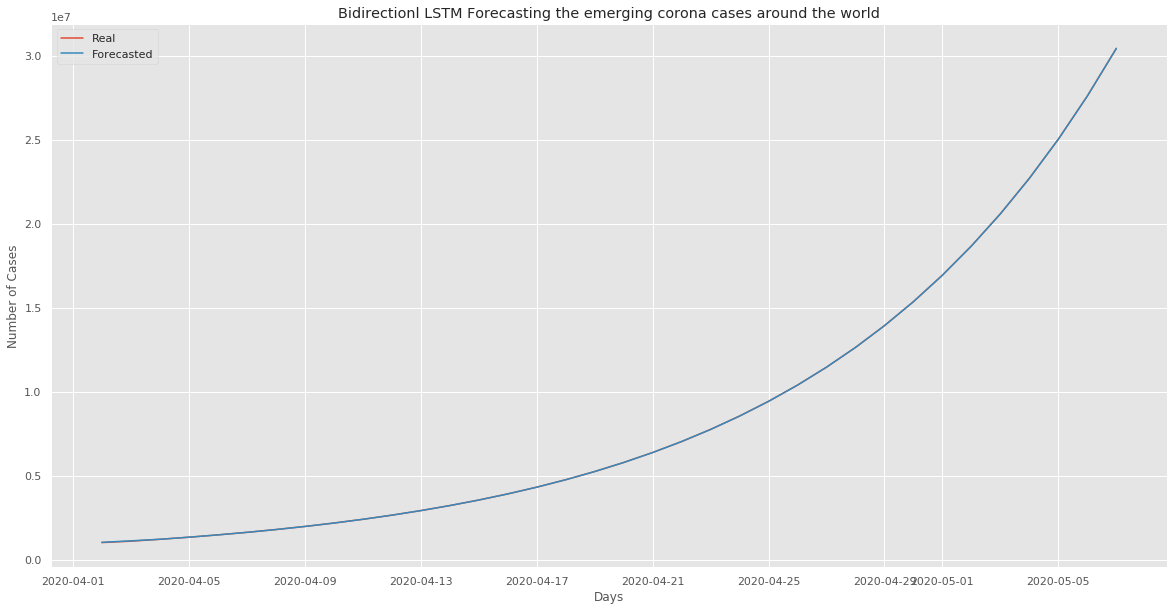

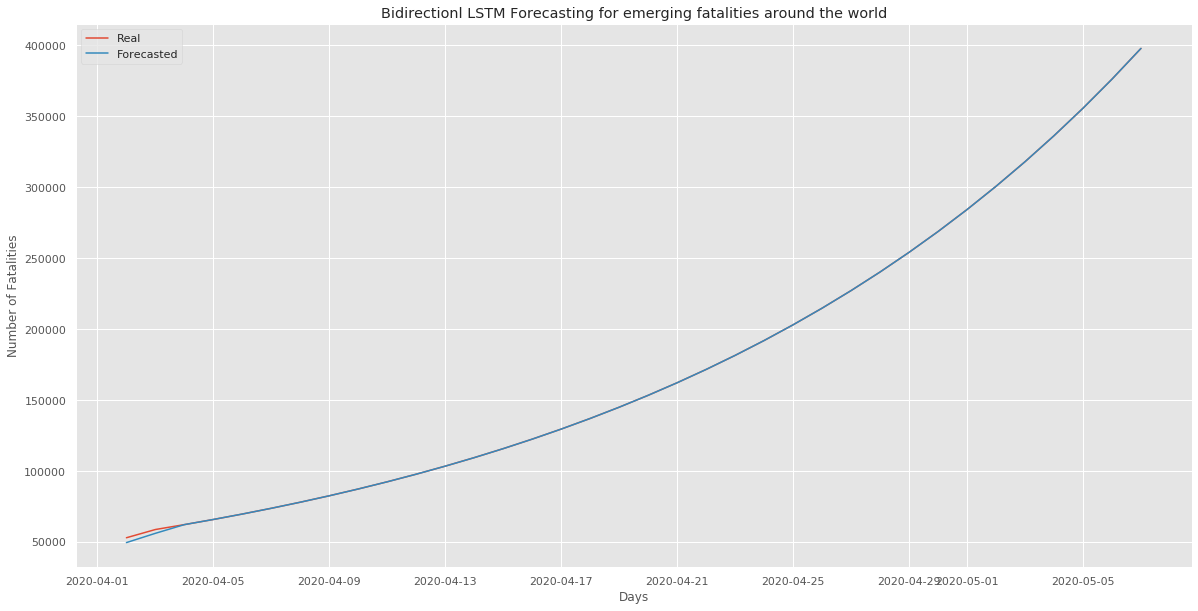

In [160]:
no_of_epochs_cases=3500
no_of_epochs_fat=3500

w3_df=pd.read_csv('train.csv')
w3_df1=w3_df
w3_df=w3_df.groupby('Date').sum()
w3_df=w3_df.reset_index()
w3_df['New Cases']=w3_df['ConfirmedCases'].diff()
w3_df['New Fatalities']=w3_df['Fatalities'].diff()
w3_df=w3_df.fillna(0)

w3_df['days']=[i for i in range(1,74)]
#print(w3_df.head())

w3_df=w3_df.reset_index()

x=w3_df.iloc[:,0]
time=w3_df['days']
y=w3_df['New Cases']
z=w3_df['New Fatalities']

time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")
#time.shape

time=np.array(time)
series=np.array(series)
split_time = 69
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 2
batch_size = 3
shuffle_buffer_size = 69

# Bidirectional LSTM
print('-'*20+"Training for Confirmed Cases"+"-"*20)

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

world_model_emerging_cases = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True,activation="relu")),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation="relu")),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


world_model_emerging_cases.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
history = world_model_emerging_cases.fit(dataset,epochs=no_of_epochs_cases)

plt.figure(figsize=(10, 6))

plt.plot(time, series)
plt.title("Confirmed Cases World Wide")
plt.ylabel("Confirmed Cases")
plt.xlabel("Days")
#plt.legend()

forecast=[]
for time in range(len(series) - window_size):
    forecast.append(world_model_emerging_cases.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
#print(forecast)

plt.figure(figsize=(10, 6))

plt.plot( time_valid, x_valid,label="Observed")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for 3 days sample")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.xlabel("Days")

w3_df=pd.read_csv('train.csv')
w3_df1=w3_df
w3_df=w3_df.groupby('Date').sum()
w3_df=w3_df.reset_index()
w3_df['New Cases']=w3_df['ConfirmedCases'].diff()
w3_df['New Fatalities']=w3_df['Fatalities'].diff()
w3_df=w3_df.fillna(0)

#w3_df=w3_df.reset_index()
w3_df['days']=[i for i in range(1,74)]
#print(w3_df.head())


print('-'*20+"Training for Fatalities"+"-"*20)
x=w3_df.iloc[:,0]
time=w3_df['days']
y=w3_df['New Fatalities']
time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")
#time.shape

time=np.array(time)
series=np.array(series)
split_time = 69
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 2
batch_size = 3
shuffle_buffer_size = 69

# Bidirectional LSTM

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

world_model_emerging_fatalities = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True,activation="relu")),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation="relu")),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


world_model_emerging_fatalities.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
history = world_model_emerging_fatalities.fit(dataset,epochs=no_of_epochs_fat)



forecast=[]
for time in range(len(series) - window_size):
    forecast.append(world_model_emerging_fatalities.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
#print(forecast)

plt.figure(figsize=(10, 6))

plt.plot( time_valid, x_valid,label="Observed")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for 3 days sample")
plt.ylabel("Fatalities")
plt.legend()
plt.xlabel("Days")

#-------------------------------------------------------------------


df=pd.read_csv("test.csv")

w3_df=w3_df1

w3_df=w3_df.groupby('Date').sum()
w3_df=w3_df.reset_index()
w3_df['New Cases']=w3_df['ConfirmedCases'].diff()
w3_df['New Fatalities']=w3_df['Fatalities'].diff()


df1=w3_df
#df3=df1.reset_index()

df2=pd.DataFrame()
df2["days_test"]=[x for x in range(1,108)]


#df2=df2.reset_index()
df4 = [df1, df2]
df_test = pd.concat(df4, axis=1)
Date=pd.date_range(start=df_test['Date'].tolist()[0],periods=107)
#print(df_test.head())
x=df_test['Date']
time=df_test['days_test']
dates=Date
y=df_test['ConfirmedCases']
#print(df_test.head())
time=time.to_numpy(dtype="float32")
dates=dates.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")

time=np.array(time)
dates=np.array(dates)
series=np.array(series)
split_time = 71
time_train = time[:split_time]
dates_train=dates[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
dates_valid=dates[split_time:]
x_valid = series[split_time:]


window_size = 2
batch_size = 3
shuffle_buffer_size = 73


forecast=[]
for time in range(len(series) - window_size):
    #print(time)
    z=world_model_emerging_cases.predict(series[time:time + window_size][np.newaxis])
    #print(z)
    if time >= 71:
        series[time+window_size]=z
        #print(series)
    forecast.append(world_model_emerging_cases.predict(series[time:time + window_size][np.newaxis]))




forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
print('-'*80)
print('-'*20+'Forecasting Worldwide'+'-'*20)
print('-'*80)
plt.figure(figsize=(20, 10))

plt.plot( Date[split_time:], x_valid,label="Real")
plt.plot(Date[split_time:], results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting the emerging corona cases around the world")
plt.ylabel("Number of Cases")
plt.xlabel("Days")
plt.legend()



x=df_test.iloc[:,0]
time=df_test['days_test']
dates=Date
y=df_test['Fatalities']
time=time.to_numpy(dtype="float32")
dates=dates.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")


time=np.array(time)
dates=np.array(dates)
series=np.array(series)
split_time = 71
time_train = time[:split_time]
dates_train=dates[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
dates_valid=dates[split_time:]
x_valid = series[split_time:]


window_size = 2
batch_size = 3
shuffle_buffer_size = 73


forecast=[]
for time in range(len(series) - window_size):
    #print(time)
    z=world_model_emerging_fatalities.predict(series[time:time + window_size][np.newaxis])
    #print(z)
    if time >= 71:
        series[time+window_size]=z
        #print(series)
    forecast.append(world_model_emerging_fatalities.predict(series[time:time + window_size][np.newaxis]))




forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(20, 10))


plt.plot( Date[split_time:], x_valid,label="Real")
plt.plot(Date[split_time:], results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for emerging fatalities around the world")
plt.ylabel("Number of Fatalities")
plt.xlabel("Days")
plt.legend()    



print('-'*100)


# Country Wise Forecasting

# Model Training

In [145]:
country="China"
w3_df=pd.read_csv('train.csv')
w3_df1=w3_df
w3_df=w3_df.groupby(['Country_Region','Date'])['ConfirmedCases','Fatalities'].sum()
w3_df=w3_df.reset_index()
w3_df=w3_df[w3_df['Country_Region']==country]
w3_df['New Cases']=w3_df[w3_df['Country_Region']==country]['ConfirmedCases'].diff()
w3_df['New Cases']=w3_df[w3_df['Country_Region']==country]['Fatalities'].diff()
w3_df

Country_Region        Date  ConfirmedCases  Fatalities  New Cases
2628          China  2020-01-22           548.0        17.0        NaN
2629          China  2020-01-23           643.0        18.0        1.0
2630          China  2020-01-24           920.0        26.0        8.0
2631          China  2020-01-25          1406.0        42.0       16.0
2632          China  2020-01-26          2075.0        56.0       14.0
...             ...         ...             ...         ...        ...
2696          China  2020-03-30         82198.0      3308.0        4.0
2697          China  2020-03-31         82279.0      3309.0        1.0
2698          China  2020-04-01         82361.0      3316.0        7.0
2699          China  2020-04-02         82432.0      3322.0        6.0
2700          China  2020-04-03         82511.0      3326.0        4.0

[73 rows x 5 columns]

--------------------Training for Confirmed Cases--------------------
Epoch 1/3500
23/23 [==============================] - 2s 84ms/step - loss: 26024.6524 - mean_absolute_error: 26742.5215
Epoch 2/3500
23/23 [==============================] - 0s 8ms/step - loss: 11696.5329 - mean_absolute_error: 11583.2725
Epoch 3/3500
23/23 [==============================] - 0s 9ms/step - loss: 8959.2633 - mean_absolute_error: 8934.2666
Epoch 4/3500
23/23 [==============================] - 0s 9ms/step - loss: 5432.4298 - mean_absolute_error: 5586.0684
Epoch 5/3500
23/23 [==============================] - 0s 8ms/step - loss: 5907.8323 - mean_absolute_error: 5965.7324
Epoch 6/3500
23/23 [==============================] - 0s 8ms/step - loss: 5217.6348 - mean_absolute_error: 5287.6616
Epoch 7/3500
23/23 [==============================] - 0s 8ms/step - loss: 6206.0327 - mean_absolute_error: 6281.4756
Epoch 8/3500
23/23 [==============================] - 0s 8ms/step - loss: 1930.6497 - mean_absolute_error: 

23/23 [==============================] - 0s 8ms/step - loss: 1434.1809 - mean_absolute_error: 1436.4011
Epoch 139/3500
23/23 [==============================] - 0s 8ms/step - loss: 1773.4538 - mean_absolute_error: 1709.6080
Epoch 140/3500
23/23 [==============================] - 0s 8ms/step - loss: 1245.4461 - mean_absolute_error: 1242.6686
Epoch 141/3500
23/23 [==============================] - 0s 8ms/step - loss: 1821.1071 - mean_absolute_error: 1844.3114
Epoch 142/3500
23/23 [==============================] - 0s 8ms/step - loss: 1387.2141 - mean_absolute_error: 1412.5392
Epoch 143/3500
23/23 [==============================] - 0s 8ms/step - loss: 1475.3129 - mean_absolute_error: 1475.6755
Epoch 144/3500
23/23 [==============================] - 0s 8ms/step - loss: 1285.4509 - mean_absolute_error: 1287.7471
Epoch 145/3500
23/23 [==============================] - 0s 8ms/step - loss: 1210.5268 - mean_absolute_error: 1182.5221
Epoch 146/3500
23/23 [==============================] - 0s 8ms/

23/23 [==============================] - 0s 8ms/step - loss: 4342.8318 - mean_absolute_error: 4450.5366
Epoch 208/3500
23/23 [==============================] - 0s 8ms/step - loss: 2311.0625 - mean_absolute_error: 2302.8347
Epoch 209/3500
23/23 [==============================] - 0s 8ms/step - loss: 3073.6806 - mean_absolute_error: 3124.1362
Epoch 210/3500
23/23 [==============================] - 0s 8ms/step - loss: 5122.8001 - mean_absolute_error: 5223.8169
Epoch 211/3500
23/23 [==============================] - 0s 8ms/step - loss: 3674.4791 - mean_absolute_error: 3784.4241
Epoch 212/3500
23/23 [==============================] - 0s 8ms/step - loss: 1924.7410 - mean_absolute_error: 1966.2810
Epoch 213/3500
23/23 [==============================] - 0s 8ms/step - loss: 2056.1941 - mean_absolute_error: 1871.9272
Epoch 214/3500
23/23 [==============================] - 0s 8ms/step - loss: 1336.1391 - mean_absolute_error: 1368.0282
Epoch 215/3500
23/23 [==============================] - 0s 8ms/

Epoch 276/3500
23/23 [==============================] - 0s 8ms/step - loss: 960.1601 - mean_absolute_error: 972.7216
Epoch 277/3500
23/23 [==============================] - 0s 8ms/step - loss: 1049.5363 - mean_absolute_error: 1075.5190
Epoch 278/3500
23/23 [==============================] - 0s 8ms/step - loss: 911.1656 - mean_absolute_error: 930.0913
Epoch 279/3500
23/23 [==============================] - 0s 8ms/step - loss: 1532.1811 - mean_absolute_error: 1520.9646
Epoch 280/3500
23/23 [==============================] - 0s 8ms/step - loss: 1985.2644 - mean_absolute_error: 2034.4203
Epoch 281/3500
23/23 [==============================] - 0s 8ms/step - loss: 972.4128 - mean_absolute_error: 895.7646
Epoch 282/3500
23/23 [==============================] - 0s 8ms/step - loss: 1459.9221 - mean_absolute_error: 1483.0414
Epoch 283/3500
23/23 [==============================] - 0s 8ms/step - loss: 1345.2207 - mean_absolute_error: 1377.9926
Epoch 284/3500
23/23 [==============================] 

23/23 [==============================] - 0s 8ms/step - loss: 940.4542 - mean_absolute_error: 964.3350
Epoch 346/3500
23/23 [==============================] - 0s 8ms/step - loss: 964.0031 - mean_absolute_error: 912.2627
Epoch 347/3500
23/23 [==============================] - 0s 8ms/step - loss: 1019.2741 - mean_absolute_error: 1039.1581
Epoch 348/3500
23/23 [==============================] - 0s 8ms/step - loss: 917.2688 - mean_absolute_error: 927.4882
Epoch 349/3500
23/23 [==============================] - 0s 8ms/step - loss: 1068.5787 - mean_absolute_error: 1071.2198
Epoch 350/3500
23/23 [==============================] - 0s 8ms/step - loss: 1366.3160 - mean_absolute_error: 1321.4233
Epoch 351/3500
23/23 [==============================] - 0s 8ms/step - loss: 1429.4822 - mean_absolute_error: 1466.2933
Epoch 352/3500
23/23 [==============================] - 0s 8ms/step - loss: 932.5146 - mean_absolute_error: 914.7294
Epoch 353/3500
23/23 [==============================] - 0s 8ms/step - l

23/23 [==============================] - 0s 8ms/step - loss: 972.8162 - mean_absolute_error: 999.5298
Epoch 484/3500
23/23 [==============================] - 0s 9ms/step - loss: 792.5586 - mean_absolute_error: 816.4195
Epoch 485/3500
23/23 [==============================] - 0s 8ms/step - loss: 963.5571 - mean_absolute_error: 952.7563
Epoch 486/3500
23/23 [==============================] - 0s 9ms/step - loss: 1294.2717 - mean_absolute_error: 1275.1888
Epoch 487/3500
23/23 [==============================] - 0s 8ms/step - loss: 1042.3812 - mean_absolute_error: 1011.4873
Epoch 488/3500
23/23 [==============================] - 0s 8ms/step - loss: 1601.7755 - mean_absolute_error: 1220.9851
Epoch 489/3500
23/23 [==============================] - 0s 9ms/step - loss: 831.3864 - mean_absolute_error: 851.3167
Epoch 490/3500
23/23 [==============================] - 0s 8ms/step - loss: 1206.9499 - mean_absolute_error: 1176.0571
Epoch 491/3500
23/23 [==============================] - 0s 8ms/step - l

23/23 [==============================] - 0s 10ms/step - loss: 1182.3438 - mean_absolute_error: 1173.9073
Epoch 622/3500
23/23 [==============================] - 0s 9ms/step - loss: 1400.9551 - mean_absolute_error: 1381.8590
Epoch 623/3500
23/23 [==============================] - 0s 8ms/step - loss: 1060.0104 - mean_absolute_error: 1083.9805
Epoch 624/3500
23/23 [==============================] - 0s 8ms/step - loss: 1109.4375 - mean_absolute_error: 1107.7019
Epoch 625/3500
23/23 [==============================] - 0s 9ms/step - loss: 1205.0694 - mean_absolute_error: 1209.5593
Epoch 626/3500
23/23 [==============================] - 0s 9ms/step - loss: 1117.5266 - mean_absolute_error: 1150.3341
Epoch 627/3500
23/23 [==============================] - 0s 9ms/step - loss: 1200.3140 - mean_absolute_error: 1203.0314
Epoch 628/3500
23/23 [==============================] - 0s 8ms/step - loss: 1121.6450 - mean_absolute_error: 1109.0532
Epoch 629/3500
23/23 [==============================] - 0s 9ms

23/23 [==============================] - 0s 8ms/step - loss: 962.4176 - mean_absolute_error: 991.2899
Epoch 760/3500
23/23 [==============================] - 0s 9ms/step - loss: 1072.4627 - mean_absolute_error: 1090.1211
Epoch 761/3500
23/23 [==============================] - 0s 10ms/step - loss: 2025.4357 - mean_absolute_error: 2010.0161
Epoch 762/3500
23/23 [==============================] - 0s 9ms/step - loss: 2189.0954 - mean_absolute_error: 2199.6951
Epoch 763/3500
23/23 [==============================] - 0s 9ms/step - loss: 1525.7970 - mean_absolute_error: 1553.6047
Epoch 764/3500
23/23 [==============================] - 0s 9ms/step - loss: 1736.1346 - mean_absolute_error: 1694.9800
Epoch 765/3500
23/23 [==============================] - 0s 8ms/step - loss: 1146.6357 - mean_absolute_error: 1150.5652
Epoch 766/3500
23/23 [==============================] - 0s 8ms/step - loss: 1423.6541 - mean_absolute_error: 1440.1289
Epoch 767/3500
23/23 [==============================] - 0s 8ms/s

23/23 [==============================] - 0s 8ms/step - loss: 1331.2029 - mean_absolute_error: 1337.5242
Epoch 898/3500
23/23 [==============================] - 0s 8ms/step - loss: 1667.4661 - mean_absolute_error: 1651.0366
Epoch 899/3500
23/23 [==============================] - 0s 8ms/step - loss: 1291.9263 - mean_absolute_error: 1299.0044
Epoch 900/3500
23/23 [==============================] - 0s 8ms/step - loss: 1076.0307 - mean_absolute_error: 1075.1586
Epoch 901/3500
23/23 [==============================] - 0s 8ms/step - loss: 855.3936 - mean_absolute_error: 872.9258
Epoch 902/3500
23/23 [==============================] - 0s 8ms/step - loss: 1190.8787 - mean_absolute_error: 1220.6527
Epoch 903/3500
23/23 [==============================] - 0s 8ms/step - loss: 1705.6948 - mean_absolute_error: 1752.3312
Epoch 904/3500
23/23 [==============================] - 0s 8ms/step - loss: 1355.6886 - mean_absolute_error: 1349.1486
Epoch 905/3500
23/23 [==============================] - 0s 8ms/st

23/23 [==============================] - 0s 9ms/step - loss: 1172.4406 - mean_absolute_error: 1164.4745
Epoch 1036/3500
23/23 [==============================] - 0s 8ms/step - loss: 1331.3796 - mean_absolute_error: 1340.3831
Epoch 1037/3500
23/23 [==============================] - 0s 8ms/step - loss: 900.5955 - mean_absolute_error: 912.7688
Epoch 1038/3500
23/23 [==============================] - 0s 8ms/step - loss: 826.3841 - mean_absolute_error: 850.7610
Epoch 1039/3500
23/23 [==============================] - 0s 8ms/step - loss: 1061.3648 - mean_absolute_error: 1090.4419
Epoch 1040/3500
23/23 [==============================] - 0s 8ms/step - loss: 983.3889 - mean_absolute_error: 922.4069
Epoch 1041/3500
23/23 [==============================] - 0s 8ms/step - loss: 1316.1424 - mean_absolute_error: 1304.8076
Epoch 1042/3500
23/23 [==============================] - 0s 8ms/step - loss: 1236.1930 - mean_absolute_error: 1254.8557
Epoch 1043/3500
23/23 [==============================] - 0s 8m

23/23 [==============================] - 0s 8ms/step - loss: 967.9457 - mean_absolute_error: 995.2107
Epoch 1172/3500
23/23 [==============================] - 0s 8ms/step - loss: 899.0144 - mean_absolute_error: 910.3032
Epoch 1173/3500
23/23 [==============================] - 0s 8ms/step - loss: 808.7968 - mean_absolute_error: 827.6995
Epoch 1174/3500
23/23 [==============================] - 0s 8ms/step - loss: 967.7831 - mean_absolute_error: 993.1865
Epoch 1175/3500
23/23 [==============================] - 0s 8ms/step - loss: 1024.7243 - mean_absolute_error: 991.6031
Epoch 1176/3500
23/23 [==============================] - 0s 8ms/step - loss: 1128.3753 - mean_absolute_error: 1162.5514
Epoch 1177/3500
23/23 [==============================] - 0s 8ms/step - loss: 1046.2796 - mean_absolute_error: 1056.1653
Epoch 1178/3500
23/23 [==============================] - 0s 8ms/step - loss: 1054.8036 - mean_absolute_error: 1068.9714
Epoch 1179/3500
23/23 [==============================] - 0s 9ms/s

23/23 [==============================] - 0s 8ms/step - loss: 1259.2300 - mean_absolute_error: 1248.6365
Epoch 1241/3500
23/23 [==============================] - 0s 8ms/step - loss: 900.3627 - mean_absolute_error: 923.3278
Epoch 1242/3500
23/23 [==============================] - 0s 8ms/step - loss: 948.7397 - mean_absolute_error: 975.5717
Epoch 1243/3500
23/23 [==============================] - 0s 8ms/step - loss: 797.8955 - mean_absolute_error: 820.8911
Epoch 1244/3500
23/23 [==============================] - 0s 8ms/step - loss: 1025.5988 - mean_absolute_error: 1053.6365
Epoch 1245/3500
23/23 [==============================] - 0s 8ms/step - loss: 1526.6391 - mean_absolute_error: 1536.4645
Epoch 1246/3500
23/23 [==============================] - 0s 8ms/step - loss: 988.5794 - mean_absolute_error: 1006.7324
Epoch 1247/3500
23/23 [==============================] - 0s 8ms/step - loss: 972.7346 - mean_absolute_error: 992.5424
Epoch 1248/3500
23/23 [==============================] - 0s 8ms/s

23/23 [==============================] - 0s 8ms/step - loss: 1153.7845 - mean_absolute_error: 1120.7332
Epoch 1310/3500
23/23 [==============================] - 0s 8ms/step - loss: 897.2212 - mean_absolute_error: 884.4896
Epoch 1311/3500
23/23 [==============================] - 0s 8ms/step - loss: 1058.7276 - mean_absolute_error: 1069.2637
Epoch 1312/3500
23/23 [==============================] - 0s 8ms/step - loss: 1116.1742 - mean_absolute_error: 1143.2925
Epoch 1313/3500
23/23 [==============================] - 0s 8ms/step - loss: 1320.3944 - mean_absolute_error: 1352.0959
Epoch 1314/3500
23/23 [==============================] - 0s 8ms/step - loss: 822.6336 - mean_absolute_error: 814.1434
Epoch 1315/3500
23/23 [==============================] - 0s 8ms/step - loss: 777.8263 - mean_absolute_error: 794.0175
Epoch 1316/3500
23/23 [==============================] - 0s 8ms/step - loss: 1283.6619 - mean_absolute_error: 1311.5914
Epoch 1317/3500
23/23 [==============================] - 0s 8m

23/23 [==============================] - 0s 8ms/step - loss: 926.7804 - mean_absolute_error: 944.1829
Epoch 1379/3500
23/23 [==============================] - 0s 8ms/step - loss: 710.0650 - mean_absolute_error: 729.0156
Epoch 1380/3500
23/23 [==============================] - 0s 8ms/step - loss: 951.4128 - mean_absolute_error: 969.3760
Epoch 1381/3500
23/23 [==============================] - 0s 8ms/step - loss: 840.8124 - mean_absolute_error: 856.2471
Epoch 1382/3500
23/23 [==============================] - 0s 8ms/step - loss: 911.0586 - mean_absolute_error: 934.7515
Epoch 1383/3500
23/23 [==============================] - 0s 8ms/step - loss: 890.9138 - mean_absolute_error: 872.3286
Epoch 1384/3500
23/23 [==============================] - 0s 8ms/step - loss: 778.6219 - mean_absolute_error: 790.3281
Epoch 1385/3500
23/23 [==============================] - 0s 8ms/step - loss: 805.8431 - mean_absolute_error: 829.4420
Epoch 1386/3500
23/23 [==============================] - 0s 8ms/step - l

23/23 [==============================] - 0s 8ms/step - loss: 832.1132 - mean_absolute_error: 834.9279
Epoch 1517/3500
23/23 [==============================] - 0s 8ms/step - loss: 1248.5500 - mean_absolute_error: 850.0847
Epoch 1518/3500
23/23 [==============================] - 0s 8ms/step - loss: 792.2028 - mean_absolute_error: 802.6601
Epoch 1519/3500
23/23 [==============================] - 0s 8ms/step - loss: 865.9121 - mean_absolute_error: 855.1273
Epoch 1520/3500
23/23 [==============================] - 0s 8ms/step - loss: 950.1746 - mean_absolute_error: 976.6074
Epoch 1521/3500
23/23 [==============================] - 0s 8ms/step - loss: 949.9428 - mean_absolute_error: 950.9933
Epoch 1522/3500
23/23 [==============================] - 0s 8ms/step - loss: 954.4148 - mean_absolute_error: 956.5024
Epoch 1523/3500
23/23 [==============================] - 0s 8ms/step - loss: 736.4830 - mean_absolute_error: 733.3414
Epoch 1524/3500
23/23 [==============================] - 0s 8ms/step - 

23/23 [==============================] - 0s 8ms/step - loss: 822.1805 - mean_absolute_error: 845.4368
Epoch 1654/3500
23/23 [==============================] - 0s 8ms/step - loss: 1115.9089 - mean_absolute_error: 724.3043
Epoch 1655/3500
23/23 [==============================] - 0s 8ms/step - loss: 960.8542 - mean_absolute_error: 977.7957
Epoch 1656/3500
23/23 [==============================] - 0s 8ms/step - loss: 824.9802 - mean_absolute_error: 836.7288
Epoch 1657/3500
23/23 [==============================] - 0s 8ms/step - loss: 1137.0288 - mean_absolute_error: 1164.2577
Epoch 1658/3500
23/23 [==============================] - 0s 8ms/step - loss: 739.3638 - mean_absolute_error: 752.9698
Epoch 1659/3500
23/23 [==============================] - 0s 8ms/step - loss: 936.3193 - mean_absolute_error: 902.5991
Epoch 1660/3500
23/23 [==============================] - 0s 8ms/step - loss: 1356.4398 - mean_absolute_error: 1374.3162
Epoch 1661/3500
23/23 [==============================] - 0s 8ms/ste

23/23 [==============================] - 0s 8ms/step - loss: 988.9830 - mean_absolute_error: 1005.5338
Epoch 1792/3500
23/23 [==============================] - 0s 8ms/step - loss: 1045.8081 - mean_absolute_error: 1073.1315
Epoch 1793/3500
23/23 [==============================] - 0s 8ms/step - loss: 665.9655 - mean_absolute_error: 685.3794
Epoch 1794/3500
23/23 [==============================] - 0s 8ms/step - loss: 848.3369 - mean_absolute_error: 840.8997
Epoch 1795/3500
23/23 [==============================] - 0s 8ms/step - loss: 727.8688 - mean_absolute_error: 739.3338
Epoch 1796/3500
23/23 [==============================] - 0s 8ms/step - loss: 969.4225 - mean_absolute_error: 989.3199
Epoch 1797/3500
23/23 [==============================] - 0s 8ms/step - loss: 755.8381 - mean_absolute_error: 775.3633
Epoch 1798/3500
23/23 [==============================] - 0s 8ms/step - loss: 949.8487 - mean_absolute_error: 930.1117
Epoch 1799/3500
23/23 [==============================] - 0s 8ms/step 

23/23 [==============================] - 0s 8ms/step - loss: 766.8749 - mean_absolute_error: 761.7585
Epoch 1930/3500
23/23 [==============================] - 0s 8ms/step - loss: 730.8303 - mean_absolute_error: 750.5865
Epoch 1931/3500
23/23 [==============================] - 0s 8ms/step - loss: 759.1461 - mean_absolute_error: 751.4780
Epoch 1932/3500
23/23 [==============================] - 0s 8ms/step - loss: 711.7370 - mean_absolute_error: 695.7503
Epoch 1933/3500
23/23 [==============================] - 0s 8ms/step - loss: 1476.5654 - mean_absolute_error: 1084.0049
Epoch 1934/3500
23/23 [==============================] - 0s 8ms/step - loss: 611.1656 - mean_absolute_error: 623.7725
Epoch 1935/3500
23/23 [==============================] - 0s 8ms/step - loss: 871.1967 - mean_absolute_error: 873.6611
Epoch 1936/3500
23/23 [==============================] - 0s 8ms/step - loss: 875.7210 - mean_absolute_error: 901.2852
Epoch 1937/3500
23/23 [==============================] - 0s 8ms/step -

23/23 [==============================] - 0s 8ms/step - loss: 739.3259 - mean_absolute_error: 720.3345
Epoch 2068/3500
23/23 [==============================] - 0s 8ms/step - loss: 628.8240 - mean_absolute_error: 644.4106
Epoch 2069/3500
23/23 [==============================] - 0s 8ms/step - loss: 836.8935 - mean_absolute_error: 857.9549
Epoch 2070/3500
23/23 [==============================] - 0s 8ms/step - loss: 856.6577 - mean_absolute_error: 818.6921
Epoch 2071/3500
23/23 [==============================] - 0s 8ms/step - loss: 735.7172 - mean_absolute_error: 746.7570
Epoch 2072/3500
23/23 [==============================] - 0s 8ms/step - loss: 732.5095 - mean_absolute_error: 749.0662
Epoch 2073/3500
23/23 [==============================] - 0s 8ms/step - loss: 717.3934 - mean_absolute_error: 728.3888
Epoch 2074/3500
23/23 [==============================] - 0s 8ms/step - loss: 770.6303 - mean_absolute_error: 785.2590
Epoch 2075/3500
23/23 [==============================] - 0s 8ms/step - l

23/23 [==============================] - 0s 8ms/step - loss: 1471.0327 - mean_absolute_error: 1082.1132
Epoch 2206/3500
23/23 [==============================] - 0s 8ms/step - loss: 718.6913 - mean_absolute_error: 737.8179
Epoch 2207/3500
23/23 [==============================] - 0s 8ms/step - loss: 873.6462 - mean_absolute_error: 879.2538
Epoch 2208/3500
23/23 [==============================] - 0s 8ms/step - loss: 980.5813 - mean_absolute_error: 1002.7760
Epoch 2209/3500
23/23 [==============================] - 0s 8ms/step - loss: 904.4001 - mean_absolute_error: 917.2786
Epoch 2210/3500
23/23 [==============================] - 0s 8ms/step - loss: 707.6823 - mean_absolute_error: 715.9327
Epoch 2211/3500
23/23 [==============================] - 0s 8ms/step - loss: 939.4365 - mean_absolute_error: 958.7560
Epoch 2212/3500
23/23 [==============================] - 0s 8ms/step - loss: 717.7513 - mean_absolute_error: 730.6296
Epoch 2213/3500
23/23 [==============================] - 0s 9ms/step 

23/23 [==============================] - 0s 7ms/step - loss: 846.1082 - mean_absolute_error: 850.2511
Epoch 2344/3500
23/23 [==============================] - 0s 7ms/step - loss: 854.7883 - mean_absolute_error: 845.8677
Epoch 2345/3500
23/23 [==============================] - 0s 7ms/step - loss: 945.1226 - mean_absolute_error: 945.8233
Epoch 2346/3500
23/23 [==============================] - 0s 7ms/step - loss: 1619.6008 - mean_absolute_error: 1602.8105
Epoch 2347/3500
23/23 [==============================] - 0s 7ms/step - loss: 964.6898 - mean_absolute_error: 971.9877
Epoch 2348/3500
23/23 [==============================] - 0s 7ms/step - loss: 916.7969 - mean_absolute_error: 900.9236
Epoch 2349/3500
23/23 [==============================] - 0s 7ms/step - loss: 914.4803 - mean_absolute_error: 919.0177
Epoch 2350/3500
23/23 [==============================] - 0s 7ms/step - loss: 1026.5859 - mean_absolute_error: 1031.2100
Epoch 2351/3500
23/23 [==============================] - 0s 7ms/step

23/23 [==============================] - 0s 7ms/step - loss: 1159.4853 - mean_absolute_error: 1133.0868
Epoch 2482/3500
23/23 [==============================] - 0s 7ms/step - loss: 822.2410 - mean_absolute_error: 844.2950
Epoch 2483/3500
23/23 [==============================] - 0s 7ms/step - loss: 709.2793 - mean_absolute_error: 721.9133
Epoch 2484/3500
23/23 [==============================] - 0s 7ms/step - loss: 909.9114 - mean_absolute_error: 916.8252
Epoch 2485/3500
23/23 [==============================] - 0s 7ms/step - loss: 857.6026 - mean_absolute_error: 841.5953
Epoch 2486/3500
23/23 [==============================] - 0s 7ms/step - loss: 821.2597 - mean_absolute_error: 838.8575
Epoch 2487/3500
23/23 [==============================] - 0s 7ms/step - loss: 671.8123 - mean_absolute_error: 683.2668
Epoch 2488/3500
23/23 [==============================] - 0s 7ms/step - loss: 1017.0573 - mean_absolute_error: 1039.3947
Epoch 2489/3500
23/23 [==============================] - 0s 7ms/step

23/23 [==============================] - 0s 7ms/step - loss: 831.3889 - mean_absolute_error: 854.8327
Epoch 2620/3500
23/23 [==============================] - 0s 7ms/step - loss: 998.8767 - mean_absolute_error: 1003.8144
Epoch 2621/3500
23/23 [==============================] - 0s 7ms/step - loss: 930.7460 - mean_absolute_error: 907.2498
Epoch 2622/3500
23/23 [==============================] - 0s 7ms/step - loss: 939.5405 - mean_absolute_error: 955.0947
Epoch 2623/3500
23/23 [==============================] - 0s 7ms/step - loss: 846.3493 - mean_absolute_error: 827.2084
Epoch 2624/3500
23/23 [==============================] - 0s 7ms/step - loss: 1177.7977 - mean_absolute_error: 1196.3851
Epoch 2625/3500
23/23 [==============================] - 0s 7ms/step - loss: 945.8346 - mean_absolute_error: 971.1701
Epoch 2626/3500
23/23 [==============================] - 0s 7ms/step - loss: 958.7873 - mean_absolute_error: 971.0707
Epoch 2627/3500
23/23 [==============================] - 0s 7ms/step 

23/23 [==============================] - 0s 7ms/step - loss: 780.0382 - mean_absolute_error: 766.3495
Epoch 2758/3500
23/23 [==============================] - 0s 7ms/step - loss: 898.2400 - mean_absolute_error: 905.1785
Epoch 2759/3500
23/23 [==============================] - 0s 7ms/step - loss: 788.1548 - mean_absolute_error: 804.1032
Epoch 2760/3500
23/23 [==============================] - 0s 7ms/step - loss: 816.8564 - mean_absolute_error: 809.3047
Epoch 2761/3500
23/23 [==============================] - 0s 7ms/step - loss: 1237.1044 - mean_absolute_error: 1251.3732
Epoch 2762/3500
23/23 [==============================] - 0s 7ms/step - loss: 908.1563 - mean_absolute_error: 934.0646
Epoch 2763/3500
23/23 [==============================] - 0s 7ms/step - loss: 922.3468 - mean_absolute_error: 896.9116
Epoch 2764/3500
23/23 [==============================] - 0s 7ms/step - loss: 716.3246 - mean_absolute_error: 736.7292
Epoch 2765/3500
23/23 [==============================] - 0s 7ms/step -

23/23 [==============================] - 0s 7ms/step - loss: 830.1659 - mean_absolute_error: 842.5099
Epoch 2896/3500
23/23 [==============================] - 0s 7ms/step - loss: 1209.0081 - mean_absolute_error: 1225.3473
Epoch 2897/3500
23/23 [==============================] - 0s 7ms/step - loss: 1371.2124 - mean_absolute_error: 1405.6149
Epoch 2898/3500
23/23 [==============================] - 0s 7ms/step - loss: 979.8602 - mean_absolute_error: 986.9062
Epoch 2899/3500
23/23 [==============================] - 0s 7ms/step - loss: 807.7681 - mean_absolute_error: 810.9536
Epoch 2900/3500
23/23 [==============================] - 0s 7ms/step - loss: 995.8685 - mean_absolute_error: 1022.9283
Epoch 2901/3500
23/23 [==============================] - 0s 7ms/step - loss: 1043.4554 - mean_absolute_error: 1061.1780
Epoch 2902/3500
23/23 [==============================] - 0s 7ms/step - loss: 827.0782 - mean_absolute_error: 819.2689
Epoch 2903/3500
23/23 [==============================] - 0s 7ms/s

23/23 [==============================] - 0s 7ms/step - loss: 746.0128 - mean_absolute_error: 767.2501
Epoch 3034/3500
23/23 [==============================] - 0s 7ms/step - loss: 805.8303 - mean_absolute_error: 811.8340
Epoch 3035/3500
23/23 [==============================] - 0s 7ms/step - loss: 750.1768 - mean_absolute_error: 728.0831
Epoch 3036/3500
23/23 [==============================] - 0s 7ms/step - loss: 670.0217 - mean_absolute_error: 681.1786
Epoch 3037/3500
23/23 [==============================] - 0s 7ms/step - loss: 824.6771 - mean_absolute_error: 806.4840
Epoch 3038/3500
23/23 [==============================] - 0s 7ms/step - loss: 774.1382 - mean_absolute_error: 773.3626
Epoch 3039/3500
23/23 [==============================] - 0s 7ms/step - loss: 938.6563 - mean_absolute_error: 957.3430
Epoch 3040/3500
23/23 [==============================] - 0s 7ms/step - loss: 794.4134 - mean_absolute_error: 801.8099
Epoch 3041/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 671.0677 - mean_absolute_error: 682.7234
Epoch 3172/3500
23/23 [==============================] - 0s 7ms/step - loss: 633.6323 - mean_absolute_error: 649.9747
Epoch 3173/3500
23/23 [==============================] - 0s 7ms/step - loss: 605.8917 - mean_absolute_error: 622.3964
Epoch 3174/3500
23/23 [==============================] - 0s 7ms/step - loss: 712.3925 - mean_absolute_error: 716.8265
Epoch 3175/3500
23/23 [==============================] - 0s 7ms/step - loss: 688.6223 - mean_absolute_error: 707.1085
Epoch 3176/3500
23/23 [==============================] - 0s 7ms/step - loss: 819.7639 - mean_absolute_error: 831.1199
Epoch 3177/3500
23/23 [==============================] - 0s 7ms/step - loss: 649.0301 - mean_absolute_error: 668.5519
Epoch 3178/3500
23/23 [==============================] - 0s 7ms/step - loss: 806.1610 - mean_absolute_error: 827.1354
Epoch 3179/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 740.7208 - mean_absolute_error: 762.3839
Epoch 3310/3500
23/23 [==============================] - 0s 7ms/step - loss: 1095.9036 - mean_absolute_error: 1051.1445
Epoch 3311/3500
23/23 [==============================] - 0s 7ms/step - loss: 720.6425 - mean_absolute_error: 693.0657
Epoch 3312/3500
23/23 [==============================] - 0s 7ms/step - loss: 603.3201 - mean_absolute_error: 617.5414
Epoch 3313/3500
23/23 [==============================] - 0s 7ms/step - loss: 683.7144 - mean_absolute_error: 681.6958
Epoch 3314/3500
23/23 [==============================] - 0s 7ms/step - loss: 716.8643 - mean_absolute_error: 725.7010
Epoch 3315/3500
23/23 [==============================] - 0s 7ms/step - loss: 744.3082 - mean_absolute_error: 757.6747
Epoch 3316/3500
23/23 [==============================] - 0s 7ms/step - loss: 752.4743 - mean_absolute_error: 727.5499
Epoch 3317/3500
23/23 [==============================] - 0s 7ms/step -

23/23 [==============================] - 0s 7ms/step - loss: 643.4263 - mean_absolute_error: 655.3700
Epoch 3448/3500
23/23 [==============================] - 0s 7ms/step - loss: 872.6579 - mean_absolute_error: 885.1141
Epoch 3449/3500
23/23 [==============================] - 0s 7ms/step - loss: 774.4242 - mean_absolute_error: 716.4300
Epoch 3450/3500
23/23 [==============================] - 0s 7ms/step - loss: 635.0309 - mean_absolute_error: 649.0110
Epoch 3451/3500
23/23 [==============================] - 0s 7ms/step - loss: 615.8608 - mean_absolute_error: 623.5421
Epoch 3452/3500
23/23 [==============================] - 0s 7ms/step - loss: 743.3366 - mean_absolute_error: 764.8910
Epoch 3453/3500
23/23 [==============================] - 0s 7ms/step - loss: 649.5421 - mean_absolute_error: 664.5663
Epoch 3454/3500
23/23 [==============================] - 0s 7ms/step - loss: 623.9987 - mean_absolute_error: 640.6726
Epoch 3455/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 9ms/step - loss: 141.3288 - mean_absolute_error: 142.8954
Epoch 87/3500
23/23 [==============================] - 0s 9ms/step - loss: 61.9106 - mean_absolute_error: 64.1561
Epoch 88/3500
23/23 [==============================] - 0s 11ms/step - loss: 71.7008 - mean_absolute_error: 69.2580
Epoch 89/3500
23/23 [==============================] - 0s 11ms/step - loss: 72.7201 - mean_absolute_error: 75.3531
Epoch 90/3500
23/23 [==============================] - 0s 7ms/step - loss: 101.6936 - mean_absolute_error: 104.8597
Epoch 91/3500
23/23 [==============================] - 0s 8ms/step - loss: 107.7912 - mean_absolute_error: 110.9913
Epoch 92/3500
23/23 [==============================] - 0s 9ms/step - loss: 93.7179 - mean_absolute_error: 94.0247
Epoch 93/3500
23/23 [==============================] - 0s 8ms/step - loss: 79.4050 - mean_absolute_error: 80.0793
Epoch 94/3500
23/23 [==============================] - 0s 8ms/step - loss: 85.2846 - mean_abso

23/23 [==============================] - 0s 9ms/step - loss: 74.0393 - mean_absolute_error: 75.5789
Epoch 158/3500
23/23 [==============================] - 0s 8ms/step - loss: 84.6219 - mean_absolute_error: 78.9730
Epoch 159/3500
23/23 [==============================] - 0s 8ms/step - loss: 68.9592 - mean_absolute_error: 70.3590
Epoch 160/3500
23/23 [==============================] - 0s 9ms/step - loss: 81.5555 - mean_absolute_error: 82.4012
Epoch 161/3500
23/23 [==============================] - 0s 9ms/step - loss: 45.8440 - mean_absolute_error: 45.7053
Epoch 162/3500
23/23 [==============================] - 0s 8ms/step - loss: 38.6614 - mean_absolute_error: 38.1092
Epoch 163/3500
23/23 [==============================] - 0s 10ms/step - loss: 65.1969 - mean_absolute_error: 66.7675
Epoch 164/3500
23/23 [==============================] - 0s 10ms/step - loss: 94.6945 - mean_absolute_error: 97.1701
Epoch 165/3500
23/23 [==============================] - 0s 9ms/step - loss: 81.7128 - mean_ab

23/23 [==============================] - 0s 8ms/step - loss: 39.8190 - mean_absolute_error: 41.3272
Epoch 300/3500
23/23 [==============================] - 0s 8ms/step - loss: 41.2509 - mean_absolute_error: 42.5723
Epoch 301/3500
23/23 [==============================] - 0s 8ms/step - loss: 58.2366 - mean_absolute_error: 58.0528
Epoch 302/3500
23/23 [==============================] - 0s 8ms/step - loss: 51.1641 - mean_absolute_error: 50.6356
Epoch 303/3500
23/23 [==============================] - 0s 8ms/step - loss: 52.7980 - mean_absolute_error: 54.8690
Epoch 304/3500
23/23 [==============================] - 0s 8ms/step - loss: 32.8320 - mean_absolute_error: 34.2503
Epoch 305/3500
23/23 [==============================] - 0s 8ms/step - loss: 52.0806 - mean_absolute_error: 53.7801
Epoch 306/3500
23/23 [==============================] - 0s 8ms/step - loss: 54.4527 - mean_absolute_error: 54.3029
Epoch 307/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.1630 - mean_abso

23/23 [==============================] - 0s 8ms/step - loss: 43.5672 - mean_absolute_error: 44.8135
Epoch 442/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.4257 - mean_absolute_error: 43.6472
Epoch 443/3500
23/23 [==============================] - 0s 8ms/step - loss: 31.4856 - mean_absolute_error: 31.2595
Epoch 444/3500
23/23 [==============================] - 0s 8ms/step - loss: 30.8870 - mean_absolute_error: 32.0984
Epoch 445/3500
23/23 [==============================] - 0s 8ms/step - loss: 32.4336 - mean_absolute_error: 32.4544
Epoch 446/3500
23/23 [==============================] - 0s 8ms/step - loss: 38.4531 - mean_absolute_error: 39.2972
Epoch 447/3500
23/23 [==============================] - 0s 8ms/step - loss: 38.7409 - mean_absolute_error: 39.1352
Epoch 448/3500
23/23 [==============================] - 0s 8ms/step - loss: 42.2209 - mean_absolute_error: 43.9673
Epoch 449/3500
23/23 [==============================] - 0s 8ms/step - loss: 28.4462 - mean_abso

23/23 [==============================] - 0s 8ms/step - loss: 37.6512 - mean_absolute_error: 39.2604
Epoch 584/3500
23/23 [==============================] - 0s 8ms/step - loss: 47.8326 - mean_absolute_error: 49.1830
Epoch 585/3500
23/23 [==============================] - 0s 8ms/step - loss: 37.1088 - mean_absolute_error: 38.3597
Epoch 586/3500
23/23 [==============================] - 0s 8ms/step - loss: 26.4362 - mean_absolute_error: 27.4120
Epoch 587/3500
23/23 [==============================] - 0s 8ms/step - loss: 23.7928 - mean_absolute_error: 24.6178
Epoch 588/3500
23/23 [==============================] - 0s 8ms/step - loss: 28.1941 - mean_absolute_error: 29.2185
Epoch 589/3500
23/23 [==============================] - 0s 8ms/step - loss: 29.1407 - mean_absolute_error: 30.2100
Epoch 590/3500
23/23 [==============================] - 0s 8ms/step - loss: 29.2581 - mean_absolute_error: 30.3246
Epoch 591/3500
23/23 [==============================] - 0s 8ms/step - loss: 30.6373 - mean_abso

23/23 [==============================] - 0s 8ms/step - loss: 27.1507 - mean_absolute_error: 25.3699
Epoch 726/3500
23/23 [==============================] - 0s 8ms/step - loss: 22.1078 - mean_absolute_error: 23.2461
Epoch 727/3500
23/23 [==============================] - 0s 8ms/step - loss: 25.9993 - mean_absolute_error: 27.1701
Epoch 728/3500
23/23 [==============================] - 0s 8ms/step - loss: 23.6191 - mean_absolute_error: 24.4034
Epoch 729/3500
23/23 [==============================] - 0s 8ms/step - loss: 28.4890 - mean_absolute_error: 27.4996
Epoch 730/3500
23/23 [==============================] - 0s 8ms/step - loss: 26.3099 - mean_absolute_error: 25.7852
Epoch 731/3500
23/23 [==============================] - 0s 8ms/step - loss: 31.9592 - mean_absolute_error: 31.0348
Epoch 732/3500
23/23 [==============================] - 0s 8ms/step - loss: 29.9830 - mean_absolute_error: 30.9863
Epoch 733/3500
23/23 [==============================] - 0s 8ms/step - loss: 39.9564 - mean_abso

23/23 [==============================] - 0s 8ms/step - loss: 21.1176 - mean_absolute_error: 22.1824
Epoch 867/3500
23/23 [==============================] - 0s 8ms/step - loss: 26.9373 - mean_absolute_error: 28.1513
Epoch 868/3500
23/23 [==============================] - 0s 8ms/step - loss: 30.7466 - mean_absolute_error: 32.0160
Epoch 869/3500
23/23 [==============================] - 0s 8ms/step - loss: 29.0293 - mean_absolute_error: 30.2603
Epoch 870/3500
23/23 [==============================] - 0s 8ms/step - loss: 23.5250 - mean_absolute_error: 23.7434
Epoch 871/3500
23/23 [==============================] - 0s 8ms/step - loss: 29.3445 - mean_absolute_error: 29.4117
Epoch 872/3500
23/23 [==============================] - 0s 8ms/step - loss: 24.1930 - mean_absolute_error: 25.3933
Epoch 873/3500
23/23 [==============================] - 0s 9ms/step - loss: 23.3713 - mean_absolute_error: 24.3226
Epoch 874/3500
23/23 [==============================] - 0s 8ms/step - loss: 32.8669 - mean_abso

23/23 [==============================] - 0s 8ms/step - loss: 26.7658 - mean_absolute_error: 27.8509
Epoch 1009/3500
23/23 [==============================] - 0s 8ms/step - loss: 28.9036 - mean_absolute_error: 29.5101
Epoch 1010/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.9605 - mean_absolute_error: 19.6018
Epoch 1011/3500
23/23 [==============================] - 0s 8ms/step - loss: 20.6148 - mean_absolute_error: 21.6979
Epoch 1012/3500
23/23 [==============================] - 0s 8ms/step - loss: 34.2716 - mean_absolute_error: 34.2138
Epoch 1013/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.9938 - mean_absolute_error: 21.0691
Epoch 1014/3500
23/23 [==============================] - 0s 8ms/step - loss: 20.3251 - mean_absolute_error: 19.4593
Epoch 1015/3500
23/23 [==============================] - 0s 8ms/step - loss: 18.7261 - mean_absolute_error: 19.4960
Epoch 1016/3500
23/23 [==============================] - 0s 8ms/step - loss: 20.8228 - m

23/23 [==============================] - 0s 8ms/step - loss: 23.8598 - mean_absolute_error: 24.6012
Epoch 1149/3500
23/23 [==============================] - 0s 8ms/step - loss: 20.0543 - mean_absolute_error: 21.0707
Epoch 1150/3500
23/23 [==============================] - 0s 8ms/step - loss: 41.5340 - mean_absolute_error: 42.6101
Epoch 1151/3500
23/23 [==============================] - 0s 8ms/step - loss: 27.8800 - mean_absolute_error: 28.8468
Epoch 1152/3500
23/23 [==============================] - 0s 9ms/step - loss: 21.7872 - mean_absolute_error: 22.3817
Epoch 1153/3500
23/23 [==============================] - 0s 8ms/step - loss: 34.6764 - mean_absolute_error: 35.9774
Epoch 1154/3500
23/23 [==============================] - 0s 9ms/step - loss: 22.3066 - mean_absolute_error: 22.2878
Epoch 1155/3500
23/23 [==============================] - 0s 8ms/step - loss: 22.4425 - mean_absolute_error: 23.4312
Epoch 1156/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.2360 - m

23/23 [==============================] - 0s 8ms/step - loss: 20.1661 - mean_absolute_error: 20.7629
Epoch 1289/3500
23/23 [==============================] - 0s 8ms/step - loss: 25.8323 - mean_absolute_error: 25.0023
Epoch 1290/3500
23/23 [==============================] - 0s 8ms/step - loss: 24.8285 - mean_absolute_error: 25.4898
Epoch 1291/3500
23/23 [==============================] - 0s 8ms/step - loss: 16.7812 - mean_absolute_error: 17.7755
Epoch 1292/3500
23/23 [==============================] - 0s 8ms/step - loss: 16.9354 - mean_absolute_error: 17.9295
Epoch 1293/3500
23/23 [==============================] - 0s 8ms/step - loss: 18.7166 - mean_absolute_error: 18.8033
Epoch 1294/3500
23/23 [==============================] - 0s 8ms/step - loss: 18.6596 - mean_absolute_error: 19.4729
Epoch 1295/3500
23/23 [==============================] - 0s 8ms/step - loss: 29.9092 - mean_absolute_error: 29.7820
Epoch 1296/3500
23/23 [==============================] - 0s 8ms/step - loss: 24.4342 - m

23/23 [==============================] - 0s 8ms/step - loss: 19.0812 - mean_absolute_error: 19.9791
Epoch 1429/3500
23/23 [==============================] - 0s 8ms/step - loss: 17.3884 - mean_absolute_error: 17.5776
Epoch 1430/3500
23/23 [==============================] - 0s 8ms/step - loss: 24.7808 - mean_absolute_error: 25.5095
Epoch 1431/3500
23/23 [==============================] - 0s 8ms/step - loss: 20.9279 - mean_absolute_error: 21.4921
Epoch 1432/3500
23/23 [==============================] - 0s 8ms/step - loss: 25.5890 - mean_absolute_error: 26.4350
Epoch 1433/3500
23/23 [==============================] - 0s 8ms/step - loss: 16.1869 - mean_absolute_error: 16.2224
Epoch 1434/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.7555 - mean_absolute_error: 22.4364
Epoch 1435/3500
23/23 [==============================] - 0s 8ms/step - loss: 20.3288 - mean_absolute_error: 20.3268
Epoch 1436/3500
23/23 [==============================] - 0s 8ms/step - loss: 17.6242 - m

23/23 [==============================] - 0s 8ms/step - loss: 19.2242 - mean_absolute_error: 19.9951
Epoch 1569/3500
23/23 [==============================] - 0s 9ms/step - loss: 27.2000 - mean_absolute_error: 25.2932
Epoch 1570/3500
23/23 [==============================] - 0s 8ms/step - loss: 23.9444 - mean_absolute_error: 24.7244
Epoch 1571/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.2532 - mean_absolute_error: 20.2388
Epoch 1572/3500
23/23 [==============================] - 0s 8ms/step - loss: 20.2180 - mean_absolute_error: 20.4760
Epoch 1573/3500
23/23 [==============================] - 0s 8ms/step - loss: 18.4957 - mean_absolute_error: 19.5310
Epoch 1574/3500
23/23 [==============================] - 0s 8ms/step - loss: 20.8661 - mean_absolute_error: 21.6664
Epoch 1575/3500
23/23 [==============================] - 0s 8ms/step - loss: 17.8215 - mean_absolute_error: 17.2493
Epoch 1576/3500
23/23 [==============================] - 0s 9ms/step - loss: 30.2286 - m

23/23 [==============================] - 0s 8ms/step - loss: 23.9793 - mean_absolute_error: 24.7937
Epoch 1709/3500
23/23 [==============================] - 0s 8ms/step - loss: 16.3144 - mean_absolute_error: 17.2858
Epoch 1710/3500
23/23 [==============================] - 0s 8ms/step - loss: 18.2176 - mean_absolute_error: 18.5267
Epoch 1711/3500
23/23 [==============================] - 0s 9ms/step - loss: 24.4707 - mean_absolute_error: 23.6690
Epoch 1712/3500
23/23 [==============================] - 0s 8ms/step - loss: 16.4805 - mean_absolute_error: 16.7463
Epoch 1713/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.2209 - mean_absolute_error: 19.8745
Epoch 1714/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.1763 - mean_absolute_error: 21.3794
Epoch 1715/3500
23/23 [==============================] - 0s 8ms/step - loss: 28.5902 - mean_absolute_error: 28.6871
Epoch 1716/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.5239 - m

23/23 [==============================] - 0s 8ms/step - loss: 20.3850 - mean_absolute_error: 21.2833
Epoch 1849/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.4148 - mean_absolute_error: 22.4592
Epoch 1850/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.9838 - mean_absolute_error: 21.0181
Epoch 1851/3500
23/23 [==============================] - 0s 8ms/step - loss: 17.2916 - mean_absolute_error: 18.2271
Epoch 1852/3500
23/23 [==============================] - 0s 8ms/step - loss: 18.7498 - mean_absolute_error: 17.9587
Epoch 1853/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.3537 - mean_absolute_error: 21.6948
Epoch 1854/3500
23/23 [==============================] - 0s 8ms/step - loss: 25.9729 - mean_absolute_error: 26.3697
Epoch 1855/3500
23/23 [==============================] - 0s 8ms/step - loss: 17.9947 - mean_absolute_error: 18.4129
Epoch 1856/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.3395 - m

23/23 [==============================] - 0s 8ms/step - loss: 23.9303 - mean_absolute_error: 24.1451
Epoch 1989/3500
23/23 [==============================] - 0s 8ms/step - loss: 22.9249 - mean_absolute_error: 23.2681
Epoch 1990/3500
23/23 [==============================] - 0s 8ms/step - loss: 23.2048 - mean_absolute_error: 23.5579
Epoch 1991/3500
23/23 [==============================] - 0s 8ms/step - loss: 26.6403 - mean_absolute_error: 27.5691
Epoch 1992/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.7611 - mean_absolute_error: 19.9493
Epoch 1993/3500
23/23 [==============================] - 0s 8ms/step - loss: 17.1626 - mean_absolute_error: 18.1479
Epoch 1994/3500
23/23 [==============================] - 0s 8ms/step - loss: 22.7063 - mean_absolute_error: 22.4613
Epoch 1995/3500
23/23 [==============================] - 0s 9ms/step - loss: 20.7712 - mean_absolute_error: 21.2240
Epoch 1996/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.5462 - m

23/23 [==============================] - 0s 9ms/step - loss: 25.8058 - mean_absolute_error: 26.4357
Epoch 2129/3500
23/23 [==============================] - 0s 8ms/step - loss: 18.8524 - mean_absolute_error: 19.8045
Epoch 2130/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.3670 - mean_absolute_error: 20.3473
Epoch 2131/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.4331 - mean_absolute_error: 22.3801
Epoch 2132/3500
23/23 [==============================] - 0s 9ms/step - loss: 18.8181 - mean_absolute_error: 19.5715
Epoch 2133/3500
23/23 [==============================] - 0s 8ms/step - loss: 16.3053 - mean_absolute_error: 16.5413
Epoch 2134/3500
23/23 [==============================] - 0s 8ms/step - loss: 23.7431 - mean_absolute_error: 24.3793
Epoch 2135/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.7944 - mean_absolute_error: 22.9094
Epoch 2136/3500
23/23 [==============================] - 0s 8ms/step - loss: 25.2014 - m

23/23 [==============================] - 0s 8ms/step - loss: 14.8291 - mean_absolute_error: 15.3328
Epoch 2269/3500
23/23 [==============================] - 0s 8ms/step - loss: 17.0759 - mean_absolute_error: 17.7989
Epoch 2270/3500
23/23 [==============================] - 0s 8ms/step - loss: 26.1398 - mean_absolute_error: 26.6735
Epoch 2271/3500
23/23 [==============================] - 0s 8ms/step - loss: 20.7004 - mean_absolute_error: 21.1287
Epoch 2272/3500
23/23 [==============================] - 0s 8ms/step - loss: 18.1981 - mean_absolute_error: 18.5432
Epoch 2273/3500
23/23 [==============================] - 0s 8ms/step - loss: 22.3424 - mean_absolute_error: 22.8537
Epoch 2274/3500
23/23 [==============================] - 0s 8ms/step - loss: 16.6823 - mean_absolute_error: 17.0711
Epoch 2275/3500
23/23 [==============================] - 0s 8ms/step - loss: 17.3928 - mean_absolute_error: 18.1564
Epoch 2276/3500
23/23 [==============================] - 0s 8ms/step - loss: 19.8081 - m

23/23 [==============================] - 0s 8ms/step - loss: 27.4993 - mean_absolute_error: 28.6384
Epoch 2409/3500
23/23 [==============================] - 0s 8ms/step - loss: 28.4399 - mean_absolute_error: 29.5801
Epoch 2410/3500
23/23 [==============================] - 0s 8ms/step - loss: 32.9120 - mean_absolute_error: 33.5874
Epoch 2411/3500
23/23 [==============================] - 0s 8ms/step - loss: 35.2454 - mean_absolute_error: 35.4867
Epoch 2412/3500
23/23 [==============================] - 0s 9ms/step - loss: 20.6568 - mean_absolute_error: 21.6420
Epoch 2413/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.5168 - mean_absolute_error: 22.0496
Epoch 2414/3500
23/23 [==============================] - 0s 8ms/step - loss: 17.1244 - mean_absolute_error: 18.1223
Epoch 2415/3500
23/23 [==============================] - 0s 9ms/step - loss: 14.6031 - mean_absolute_error: 15.4664
Epoch 2416/3500
23/23 [==============================] - 0s 8ms/step - loss: 27.0022 - m

23/23 [==============================] - 0s 9ms/step - loss: 29.8457 - mean_absolute_error: 30.8237
Epoch 2549/3500
23/23 [==============================] - 0s 8ms/step - loss: 23.7003 - mean_absolute_error: 23.9396
Epoch 2550/3500
23/23 [==============================] - 0s 8ms/step - loss: 15.0908 - mean_absolute_error: 15.7909
Epoch 2551/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.0149 - mean_absolute_error: 22.0777
Epoch 2552/3500
23/23 [==============================] - 0s 8ms/step - loss: 18.3469 - mean_absolute_error: 17.8404
Epoch 2553/3500
23/23 [==============================] - 0s 8ms/step - loss: 27.9233 - mean_absolute_error: 28.3850
Epoch 2554/3500
23/23 [==============================] - 0s 8ms/step - loss: 32.0124 - mean_absolute_error: 32.6431
Epoch 2555/3500
23/23 [==============================] - 0s 8ms/step - loss: 21.1603 - mean_absolute_error: 21.7562
Epoch 2556/3500
23/23 [==============================] - 0s 8ms/step - loss: 29.8845 - m

23/23 [==============================] - 0s 7ms/step - loss: 16.2433 - mean_absolute_error: 16.7619
Epoch 2689/3500
23/23 [==============================] - 0s 7ms/step - loss: 28.8257 - mean_absolute_error: 29.9599
Epoch 2690/3500
23/23 [==============================] - 0s 7ms/step - loss: 25.0262 - mean_absolute_error: 25.7995
Epoch 2691/3500
23/23 [==============================] - 0s 7ms/step - loss: 15.0659 - mean_absolute_error: 15.7979
Epoch 2692/3500
23/23 [==============================] - 0s 7ms/step - loss: 25.3514 - mean_absolute_error: 24.6291
Epoch 2693/3500
23/23 [==============================] - 0s 7ms/step - loss: 31.6184 - mean_absolute_error: 31.4630
Epoch 2694/3500
23/23 [==============================] - 0s 7ms/step - loss: 27.8991 - mean_absolute_error: 26.6730
Epoch 2695/3500
23/23 [==============================] - 0s 7ms/step - loss: 27.6789 - mean_absolute_error: 28.6009
Epoch 2696/3500
23/23 [==============================] - 0s 7ms/step - loss: 16.1334 - m

23/23 [==============================] - 0s 7ms/step - loss: 24.9022 - mean_absolute_error: 25.5706
Epoch 2829/3500
23/23 [==============================] - 0s 7ms/step - loss: 23.9631 - mean_absolute_error: 24.6510
Epoch 2830/3500
23/23 [==============================] - 0s 7ms/step - loss: 21.7100 - mean_absolute_error: 20.4265
Epoch 2831/3500
23/23 [==============================] - 0s 7ms/step - loss: 16.5693 - mean_absolute_error: 17.5374
Epoch 2832/3500
23/23 [==============================] - 0s 7ms/step - loss: 23.2690 - mean_absolute_error: 23.6590
Epoch 2833/3500
23/23 [==============================] - 0s 7ms/step - loss: 18.3140 - mean_absolute_error: 18.6952
Epoch 2834/3500
23/23 [==============================] - 0s 7ms/step - loss: 17.5350 - mean_absolute_error: 18.5186
Epoch 2835/3500
23/23 [==============================] - 0s 7ms/step - loss: 21.1100 - mean_absolute_error: 21.4624
Epoch 2836/3500
23/23 [==============================] - 0s 7ms/step - loss: 19.7550 - m

23/23 [==============================] - 0s 7ms/step - loss: 28.0792 - mean_absolute_error: 28.0838
Epoch 2969/3500
23/23 [==============================] - 0s 7ms/step - loss: 23.1697 - mean_absolute_error: 24.3400
Epoch 2970/3500
23/23 [==============================] - 0s 7ms/step - loss: 21.6049 - mean_absolute_error: 22.7356
Epoch 2971/3500
23/23 [==============================] - 0s 7ms/step - loss: 17.8948 - mean_absolute_error: 18.8811
Epoch 2972/3500
23/23 [==============================] - 0s 7ms/step - loss: 14.5707 - mean_absolute_error: 15.3171
Epoch 2973/3500
23/23 [==============================] - 0s 7ms/step - loss: 16.6256 - mean_absolute_error: 16.8703
Epoch 2974/3500
23/23 [==============================] - 0s 7ms/step - loss: 14.3480 - mean_absolute_error: 15.1215
Epoch 2975/3500
23/23 [==============================] - 0s 7ms/step - loss: 14.6603 - mean_absolute_error: 15.0803
Epoch 2976/3500
23/23 [==============================] - 0s 7ms/step - loss: 17.9282 - m

23/23 [==============================] - 0s 7ms/step - loss: 16.4531 - mean_absolute_error: 17.3737
Epoch 3109/3500
23/23 [==============================] - 0s 7ms/step - loss: 14.4279 - mean_absolute_error: 15.2772
Epoch 3110/3500
23/23 [==============================] - 0s 7ms/step - loss: 21.8496 - mean_absolute_error: 20.2092
Epoch 3111/3500
23/23 [==============================] - 0s 7ms/step - loss: 22.3143 - mean_absolute_error: 22.7380
Epoch 3112/3500
23/23 [==============================] - 0s 7ms/step - loss: 13.2214 - mean_absolute_error: 14.0096
Epoch 3113/3500
23/23 [==============================] - 0s 7ms/step - loss: 20.5918 - mean_absolute_error: 21.0682
Epoch 3114/3500
23/23 [==============================] - 0s 7ms/step - loss: 18.3387 - mean_absolute_error: 18.8748
Epoch 3115/3500
23/23 [==============================] - 0s 7ms/step - loss: 20.9321 - mean_absolute_error: 20.0201
Epoch 3116/3500
23/23 [==============================] - 0s 7ms/step - loss: 17.3021 - m

23/23 [==============================] - 0s 7ms/step - loss: 21.1928 - mean_absolute_error: 21.9929
Epoch 3249/3500
23/23 [==============================] - 0s 7ms/step - loss: 15.8257 - mean_absolute_error: 16.7675
Epoch 3250/3500
23/23 [==============================] - 0s 7ms/step - loss: 19.2678 - mean_absolute_error: 20.2133
Epoch 3251/3500
23/23 [==============================] - 0s 7ms/step - loss: 15.0864 - mean_absolute_error: 15.2923
Epoch 3252/3500
23/23 [==============================] - 0s 7ms/step - loss: 22.4775 - mean_absolute_error: 23.5038
Epoch 3253/3500
23/23 [==============================] - 0s 7ms/step - loss: 18.4696 - mean_absolute_error: 19.4576
Epoch 3254/3500
23/23 [==============================] - 0s 7ms/step - loss: 18.0429 - mean_absolute_error: 18.7261
Epoch 3255/3500
23/23 [==============================] - 0s 7ms/step - loss: 19.8940 - mean_absolute_error: 20.3253
Epoch 3256/3500
23/23 [==============================] - 0s 7ms/step - loss: 18.1704 - m

23/23 [==============================] - 0s 7ms/step - loss: 16.4075 - mean_absolute_error: 16.7314
Epoch 3389/3500
23/23 [==============================] - 0s 7ms/step - loss: 18.2290 - mean_absolute_error: 19.2546
Epoch 3390/3500
23/23 [==============================] - 0s 7ms/step - loss: 15.7512 - mean_absolute_error: 16.1420
Epoch 3391/3500
23/23 [==============================] - 0s 7ms/step - loss: 14.6824 - mean_absolute_error: 15.4834
Epoch 3392/3500
23/23 [==============================] - 0s 7ms/step - loss: 14.3645 - mean_absolute_error: 14.9762
Epoch 3393/3500
23/23 [==============================] - 0s 7ms/step - loss: 17.9739 - mean_absolute_error: 18.0703
Epoch 3394/3500
23/23 [==============================] - 0s 7ms/step - loss: 17.0212 - mean_absolute_error: 18.0124
Epoch 3395/3500
23/23 [==============================] - 0s 7ms/step - loss: 19.2861 - mean_absolute_error: 20.0865
Epoch 3396/3500
23/23 [==============================] - 0s 7ms/step - loss: 16.2347 - m

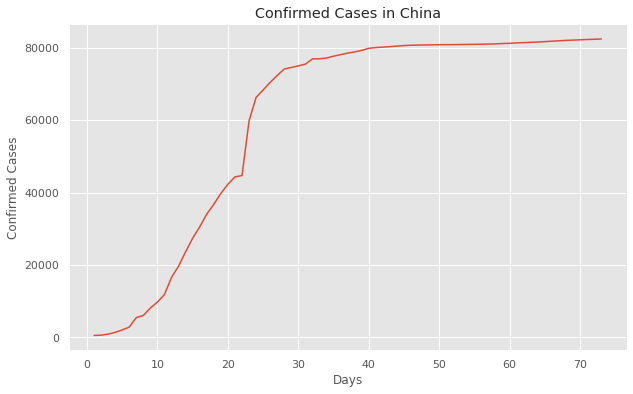

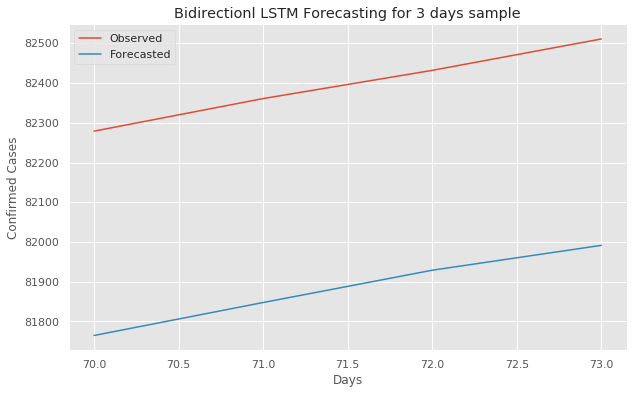

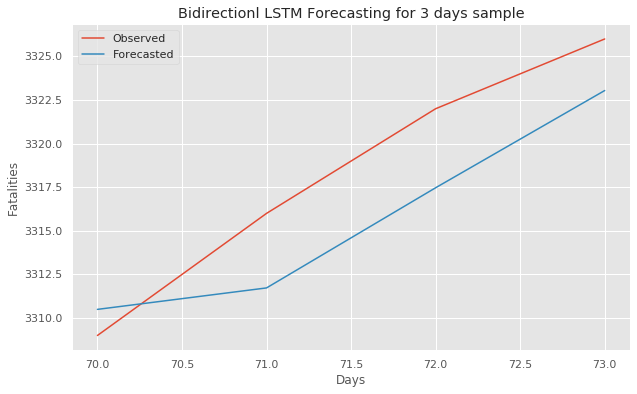

In [159]:
#Country Model
#def train_country_forecast1(w3_df,country,epochs):
no_of_epochs=3500
country="China"

country="China"
w3_df=pd.read_csv('train.csv')
w3_df1=w3_df
w3_df=w3_df.groupby(['Country_Region','Date'])['ConfirmedCases','Fatalities'].sum()
w3_df=w3_df.reset_index()
w3_df=w3_df[w3_df['Country_Region']==country]
w3_df['New Cases']=w3_df[w3_df['Country_Region']==country]['ConfirmedCases'].diff()
w3_df['New Fatalities']=w3_df[w3_df['Country_Region']==country]['Fatalities'].diff()

w3_df['days']=[i for i in range(1,74)]
#print(w3_df.head())



x=w3_df['Country_Region']
time=w3_df['days']
y=w3_df['ConfirmedCases']
#z=w3_df.iloc[:,3]
time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")
#time.shape

time=np.array(time)
series=np.array(series)
split_time = 69
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 2
batch_size = 3
shuffle_buffer_size = 69

# Bidirectional LSTM
print('-'*20+"Training for Confirmed Cases"+"-"*20)

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

country_model_cases = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True,activation="relu")),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation="relu")),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


country_model_cases.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
history = country_model_cases.fit(dataset,epochs=no_of_epochs)

plt.figure(figsize=(10, 6))

plt.plot(time, series)
plt.title("Confirmed Cases in {}".format(country))
plt.ylabel("Confirmed Cases")
plt.xlabel("Days")
#plt.legend()

forecast=[]
for time in range(len(series) - window_size):
    forecast.append(country_model_cases.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
#print(forecast)

plt.figure(figsize=(10, 6))

plt.plot( time_valid, x_valid,label="Observed")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for 3 days sample")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.xlabel("Days")

w3_df=w3_df1
w3_df=w3_df.groupby(['Country_Region','Date'])['ConfirmedCases','Fatalities'].sum()
w3_df=w3_df.reset_index()
w3_df=w3_df[w3_df['Country_Region']==country]
w3_df['New Cases']=w3_df[w3_df['Country_Region']==country]['ConfirmedCases'].diff()
w3_df['New Fatalities']=w3_df[w3_df['Country_Region']==country]['Fatalities'].diff()

w3_df['days']=[i for i in range(1,74)]
#print(w3_df.head())


print('-'*20+"Training for Fatalities"+"-"*20)
x=w3_df['Country_Region']
time=w3_df['days']
y=w3_df['Fatalities']
time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")
#time.shape

time=np.array(time)
series=np.array(series)
split_time = 69
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 2
batch_size = 3
shuffle_buffer_size = 69

# Bidirectional LSTM

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

country_model_fatalities = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True,activation="relu")),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation="relu")),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


country_model_fatalities.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
history = country_model_fatalities.fit(dataset,epochs=no_of_epochs)



forecast=[]
for time in range(len(series) - window_size):
    forecast.append(country_model_fatalities.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
#print(forecast)

plt.figure(figsize=(10, 6))

plt.plot( time_valid, x_valid,label="Observed")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for 3 days sample")
plt.ylabel("Fatalities")
plt.legend()
plt.xlabel("Days")

#return country_model_cases, country_model_fatalities


print('-'*100)

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Emerging Cases per Country

--------------------Training for Confirmed Cases--------------------
Epoch 1/3500
23/23 [==============================] - 2s 91ms/step - loss: 1206.2671 - mean_absolute_error: 1240.8960
Epoch 2/3500
23/23 [==============================] - 0s 8ms/step - loss: 1060.8842 - mean_absolute_error: 1090.8618
Epoch 3/3500
23/23 [==============================] - 0s 8ms/step - loss: 1155.3926 - mean_absolute_error: 1121.9464
Epoch 4/3500
23/23 [==============================] - 0s 7ms/step - loss: 1167.5456 - mean_absolute_error: 1118.6266
Epoch 5/3500
23/23 [==============================] - 0s 8ms/step - loss: 1075.3005 - mean_absolute_error: 1102.5795
Epoch 6/3500
23/23 [==============================] - 0s 8ms/step - loss: 1092.3886 - mean_absolute_error: 1121.8359
Epoch 7/3500
23/23 [==============================] - 0s 8ms/step - loss: 733.0201 - mean_absolute_error: 754.0883
Epoch 8/3500
23/23 [==============================] - 0s 8ms/step - loss: 1233.9420 - mean_absolute_error: 1269.9

23/23 [==============================] - 0s 8ms/step - loss: 522.3313 - mean_absolute_error: 538.1673
Epoch 141/3500
23/23 [==============================] - 0s 7ms/step - loss: 511.8292 - mean_absolute_error: 526.9339
Epoch 142/3500
23/23 [==============================] - 0s 7ms/step - loss: 513.7361 - mean_absolute_error: 529.2913
Epoch 143/3500
23/23 [==============================] - 0s 7ms/step - loss: 507.9822 - mean_absolute_error: 518.0312
Epoch 144/3500
23/23 [==============================] - 0s 8ms/step - loss: 541.8173 - mean_absolute_error: 530.6296
Epoch 145/3500
23/23 [==============================] - 0s 7ms/step - loss: 526.8703 - mean_absolute_error: 541.2774
Epoch 146/3500
23/23 [==============================] - 0s 7ms/step - loss: 518.3821 - mean_absolute_error: 534.1455
Epoch 147/3500
23/23 [==============================] - 0s 7ms/step - loss: 514.6792 - mean_absolute_error: 530.5330
Epoch 148/3500
23/23 [==============================] - 0s 8ms/step - loss: 512

23/23 [==============================] - 0s 7ms/step - loss: 633.4450 - mean_absolute_error: 652.8164
Epoch 281/3500
23/23 [==============================] - 0s 7ms/step - loss: 802.6330 - mean_absolute_error: 826.6961
Epoch 282/3500
23/23 [==============================] - 0s 7ms/step - loss: 808.1912 - mean_absolute_error: 832.4429
Epoch 283/3500
23/23 [==============================] - 0s 7ms/step - loss: 581.3588 - mean_absolute_error: 580.2036
Epoch 284/3500
23/23 [==============================] - 0s 7ms/step - loss: 565.9365 - mean_absolute_error: 574.4000
Epoch 285/3500
23/23 [==============================] - 0s 7ms/step - loss: 607.7827 - mean_absolute_error: 595.8593
Epoch 286/3500
23/23 [==============================] - 0s 8ms/step - loss: 605.6836 - mean_absolute_error: 624.1650
Epoch 287/3500
23/23 [==============================] - 0s 7ms/step - loss: 570.4859 - mean_absolute_error: 586.5181
Epoch 288/3500
23/23 [==============================] - 0s 7ms/step - loss: 539

23/23 [==============================] - 0s 7ms/step - loss: 516.4129 - mean_absolute_error: 522.9319
Epoch 421/3500
23/23 [==============================] - 0s 9ms/step - loss: 497.3506 - mean_absolute_error: 512.5942
Epoch 422/3500
23/23 [==============================] - 0s 8ms/step - loss: 497.4702 - mean_absolute_error: 511.6053
Epoch 423/3500
23/23 [==============================] - 0s 8ms/step - loss: 522.4119 - mean_absolute_error: 528.2357
Epoch 424/3500
23/23 [==============================] - 0s 8ms/step - loss: 489.0397 - mean_absolute_error: 500.4646
Epoch 425/3500
23/23 [==============================] - 0s 7ms/step - loss: 574.2118 - mean_absolute_error: 587.4852
Epoch 426/3500
23/23 [==============================] - 0s 8ms/step - loss: 562.0958 - mean_absolute_error: 567.8726
Epoch 427/3500
23/23 [==============================] - 0s 7ms/step - loss: 528.6720 - mean_absolute_error: 544.9276
Epoch 428/3500
23/23 [==============================] - 0s 7ms/step - loss: 495

23/23 [==============================] - 0s 7ms/step - loss: 502.6699 - mean_absolute_error: 518.1041
Epoch 561/3500
23/23 [==============================] - 0s 7ms/step - loss: 521.2237 - mean_absolute_error: 513.5009
Epoch 562/3500
23/23 [==============================] - 0s 7ms/step - loss: 462.1106 - mean_absolute_error: 466.9063
Epoch 563/3500
23/23 [==============================] - 0s 7ms/step - loss: 480.8649 - mean_absolute_error: 495.6632
Epoch 564/3500
23/23 [==============================] - 0s 7ms/step - loss: 470.4307 - mean_absolute_error: 480.5091
Epoch 565/3500
23/23 [==============================] - 0s 7ms/step - loss: 465.2546 - mean_absolute_error: 479.5977
Epoch 566/3500
23/23 [==============================] - 0s 7ms/step - loss: 458.6414 - mean_absolute_error: 472.7028
Epoch 567/3500
23/23 [==============================] - 0s 7ms/step - loss: 500.6047 - mean_absolute_error: 515.9541
Epoch 568/3500
23/23 [==============================] - 0s 7ms/step - loss: 473

23/23 [==============================] - 0s 7ms/step - loss: 475.0446 - mean_absolute_error: 489.6610
Epoch 701/3500
23/23 [==============================] - 0s 7ms/step - loss: 483.8720 - mean_absolute_error: 496.4595
Epoch 702/3500
23/23 [==============================] - 0s 7ms/step - loss: 472.1652 - mean_absolute_error: 481.5179
Epoch 703/3500
23/23 [==============================] - 0s 7ms/step - loss: 475.7532 - mean_absolute_error: 478.3078
Epoch 704/3500
23/23 [==============================] - 0s 7ms/step - loss: 485.1477 - mean_absolute_error: 500.0047
Epoch 705/3500
23/23 [==============================] - 0s 7ms/step - loss: 457.1183 - mean_absolute_error: 466.0530
Epoch 706/3500
23/23 [==============================] - 0s 7ms/step - loss: 455.1073 - mean_absolute_error: 469.0364
Epoch 707/3500
23/23 [==============================] - 0s 7ms/step - loss: 487.4450 - mean_absolute_error: 474.6522
Epoch 708/3500
23/23 [==============================] - 0s 7ms/step - loss: 602

23/23 [==============================] - 0s 7ms/step - loss: 590.6294 - mean_absolute_error: 573.2610
Epoch 841/3500
23/23 [==============================] - 0s 7ms/step - loss: 550.0928 - mean_absolute_error: 563.4251
Epoch 842/3500
23/23 [==============================] - 0s 7ms/step - loss: 536.7486 - mean_absolute_error: 552.1127
Epoch 843/3500
23/23 [==============================] - 0s 7ms/step - loss: 541.6485 - mean_absolute_error: 557.8440
Epoch 844/3500
23/23 [==============================] - 0s 7ms/step - loss: 558.6198 - mean_absolute_error: 545.7089
Epoch 845/3500
23/23 [==============================] - 0s 7ms/step - loss: 571.2657 - mean_absolute_error: 560.2108
Epoch 846/3500
23/23 [==============================] - 0s 7ms/step - loss: 531.6414 - mean_absolute_error: 547.7503
Epoch 847/3500
23/23 [==============================] - 0s 7ms/step - loss: 525.2254 - mean_absolute_error: 540.2785
Epoch 848/3500
23/23 [==============================] - 0s 7ms/step - loss: 565

23/23 [==============================] - 0s 7ms/step - loss: 818.9329 - mean_absolute_error: 843.8464
Epoch 911/3500
23/23 [==============================] - 0s 7ms/step - loss: 762.7926 - mean_absolute_error: 781.6928
Epoch 912/3500
23/23 [==============================] - 0s 7ms/step - loss: 639.9153 - mean_absolute_error: 659.4938
Epoch 913/3500
23/23 [==============================] - 0s 7ms/step - loss: 706.0212 - mean_absolute_error: 726.3453
Epoch 914/3500
23/23 [==============================] - 0s 7ms/step - loss: 634.3636 - mean_absolute_error: 632.9567
Epoch 915/3500
23/23 [==============================] - 0s 7ms/step - loss: 839.0101 - mean_absolute_error: 864.5372
Epoch 916/3500
23/23 [==============================] - 0s 7ms/step - loss: 900.4379 - mean_absolute_error: 825.6490
Epoch 917/3500
23/23 [==============================] - 0s 7ms/step - loss: 608.2938 - mean_absolute_error: 626.8900
Epoch 918/3500
23/23 [==============================] - 0s 7ms/step - loss: 752

23/23 [==============================] - 0s 7ms/step - loss: 522.3445 - mean_absolute_error: 525.7349
Epoch 1050/3500
23/23 [==============================] - 0s 7ms/step - loss: 496.0810 - mean_absolute_error: 510.2649
Epoch 1051/3500
23/23 [==============================] - 0s 7ms/step - loss: 486.5122 - mean_absolute_error: 501.0088
Epoch 1052/3500
23/23 [==============================] - 0s 7ms/step - loss: 467.4857 - mean_absolute_error: 481.6783
Epoch 1053/3500
23/23 [==============================] - 0s 7ms/step - loss: 509.5107 - mean_absolute_error: 525.1165
Epoch 1054/3500
23/23 [==============================] - 0s 7ms/step - loss: 516.8569 - mean_absolute_error: 532.6434
Epoch 1055/3500
23/23 [==============================] - 0s 7ms/step - loss: 510.7272 - mean_absolute_error: 526.2352
Epoch 1056/3500
23/23 [==============================] - 0s 7ms/step - loss: 527.2655 - mean_absolute_error: 543.3245
Epoch 1057/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 504.8003 - mean_absolute_error: 520.1895
Epoch 1188/3500
23/23 [==============================] - 0s 7ms/step - loss: 444.9669 - mean_absolute_error: 458.6356
Epoch 1189/3500
23/23 [==============================] - 0s 8ms/step - loss: 475.4081 - mean_absolute_error: 490.0888
Epoch 1190/3500
23/23 [==============================] - 0s 7ms/step - loss: 453.5229 - mean_absolute_error: 467.2516
Epoch 1191/3500
23/23 [==============================] - 0s 7ms/step - loss: 502.5946 - mean_absolute_error: 478.7778
Epoch 1192/3500
23/23 [==============================] - 0s 7ms/step - loss: 455.9807 - mean_absolute_error: 469.8932
Epoch 1193/3500
23/23 [==============================] - 0s 7ms/step - loss: 471.4895 - mean_absolute_error: 485.6985
Epoch 1194/3500
23/23 [==============================] - 0s 7ms/step - loss: 475.3074 - mean_absolute_error: 477.5197
Epoch 1195/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 511.7374 - mean_absolute_error: 527.2760
Epoch 1326/3500
23/23 [==============================] - 0s 7ms/step - loss: 493.0325 - mean_absolute_error: 508.1136
Epoch 1327/3500
23/23 [==============================] - 0s 7ms/step - loss: 499.3678 - mean_absolute_error: 512.3657
Epoch 1328/3500
23/23 [==============================] - 0s 7ms/step - loss: 476.0375 - mean_absolute_error: 489.4466
Epoch 1329/3500
23/23 [==============================] - 0s 7ms/step - loss: 547.8858 - mean_absolute_error: 510.0106
Epoch 1330/3500
23/23 [==============================] - 0s 7ms/step - loss: 487.6703 - mean_absolute_error: 501.5363
Epoch 1331/3500
23/23 [==============================] - 0s 7ms/step - loss: 516.4511 - mean_absolute_error: 509.0220
Epoch 1332/3500
23/23 [==============================] - 0s 7ms/step - loss: 471.8449 - mean_absolute_error: 485.6608
Epoch 1333/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 475.9292 - mean_absolute_error: 483.4752
Epoch 1464/3500
23/23 [==============================] - 0s 7ms/step - loss: 510.5815 - mean_absolute_error: 497.7773
Epoch 1465/3500
23/23 [==============================] - 0s 7ms/step - loss: 509.4227 - mean_absolute_error: 510.6441
Epoch 1466/3500
23/23 [==============================] - 0s 7ms/step - loss: 480.4260 - mean_absolute_error: 494.1846
Epoch 1467/3500
23/23 [==============================] - 0s 7ms/step - loss: 479.7662 - mean_absolute_error: 493.6707
Epoch 1468/3500
23/23 [==============================] - 0s 7ms/step - loss: 533.2440 - mean_absolute_error: 530.7046
Epoch 1469/3500
23/23 [==============================] - 0s 7ms/step - loss: 557.5313 - mean_absolute_error: 572.1743
Epoch 1470/3500
23/23 [==============================] - 0s 7ms/step - loss: 528.1108 - mean_absolute_error: 541.4404
Epoch 1471/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 522.9373 - mean_absolute_error: 537.0906
Epoch 1602/3500
23/23 [==============================] - 0s 7ms/step - loss: 510.7095 - mean_absolute_error: 526.3481
Epoch 1603/3500
23/23 [==============================] - 0s 7ms/step - loss: 528.2580 - mean_absolute_error: 544.4919
Epoch 1604/3500
23/23 [==============================] - 0s 7ms/step - loss: 519.3670 - mean_absolute_error: 533.8219
Epoch 1605/3500
23/23 [==============================] - 0s 7ms/step - loss: 532.0859 - mean_absolute_error: 541.0037
Epoch 1606/3500
23/23 [==============================] - 0s 7ms/step - loss: 516.4697 - mean_absolute_error: 530.6014
Epoch 1607/3500
23/23 [==============================] - 0s 7ms/step - loss: 527.6046 - mean_absolute_error: 537.4868
Epoch 1608/3500
23/23 [==============================] - 0s 7ms/step - loss: 528.9515 - mean_absolute_error: 545.0475
Epoch 1609/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 510.0969 - mean_absolute_error: 525.6644
Epoch 1740/3500
23/23 [==============================] - 0s 7ms/step - loss: 520.7715 - mean_absolute_error: 528.7117
Epoch 1741/3500
23/23 [==============================] - 0s 7ms/step - loss: 621.2203 - mean_absolute_error: 596.4565
Epoch 1742/3500
23/23 [==============================] - 0s 7ms/step - loss: 556.4594 - mean_absolute_error: 571.3295
Epoch 1743/3500
23/23 [==============================] - 0s 7ms/step - loss: 507.6311 - mean_absolute_error: 521.6143
Epoch 1744/3500
23/23 [==============================] - 0s 7ms/step - loss: 524.6853 - mean_absolute_error: 537.6914
Epoch 1745/3500
23/23 [==============================] - 0s 7ms/step - loss: 530.7225 - mean_absolute_error: 545.6132
Epoch 1746/3500
23/23 [==============================] - 0s 7ms/step - loss: 558.5663 - mean_absolute_error: 557.7833
Epoch 1747/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 566.8469 - mean_absolute_error: 539.5296
Epoch 1878/3500
23/23 [==============================] - 0s 7ms/step - loss: 540.6762 - mean_absolute_error: 556.9583
Epoch 1879/3500
23/23 [==============================] - 0s 7ms/step - loss: 526.0051 - mean_absolute_error: 541.9006
Epoch 1880/3500
23/23 [==============================] - 0s 7ms/step - loss: 629.2251 - mean_absolute_error: 544.8246
Epoch 1881/3500
23/23 [==============================] - 0s 7ms/step - loss: 527.1164 - mean_absolute_error: 543.1932
Epoch 1882/3500
23/23 [==============================] - 0s 7ms/step - loss: 518.5402 - mean_absolute_error: 534.4034
Epoch 1883/3500
23/23 [==============================] - 0s 7ms/step - loss: 520.2202 - mean_absolute_error: 523.5397
Epoch 1884/3500
23/23 [==============================] - 0s 7ms/step - loss: 507.8379 - mean_absolute_error: 522.6110
Epoch 1885/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 507.6665 - mean_absolute_error: 523.3011
Epoch 2016/3500
23/23 [==============================] - 0s 7ms/step - loss: 504.1958 - mean_absolute_error: 519.3004
Epoch 2017/3500
23/23 [==============================] - 0s 7ms/step - loss: 511.7151 - mean_absolute_error: 527.2115
Epoch 2018/3500
23/23 [==============================] - 0s 7ms/step - loss: 492.1327 - mean_absolute_error: 506.3834
Epoch 2019/3500
23/23 [==============================] - 0s 7ms/step - loss: 511.4378 - mean_absolute_error: 526.0197
Epoch 2020/3500
23/23 [==============================] - 0s 7ms/step - loss: 500.9029 - mean_absolute_error: 516.1465
Epoch 2021/3500
23/23 [==============================] - 0s 7ms/step - loss: 528.0213 - mean_absolute_error: 523.8860
Epoch 2022/3500
23/23 [==============================] - 0s 7ms/step - loss: 498.0460 - mean_absolute_error: 512.7768
Epoch 2023/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 514.3443 - mean_absolute_error: 530.0930
Epoch 2154/3500
23/23 [==============================] - 0s 7ms/step - loss: 512.1370 - mean_absolute_error: 514.5151
Epoch 2155/3500
23/23 [==============================] - 0s 7ms/step - loss: 491.2699 - mean_absolute_error: 506.2570
Epoch 2156/3500
23/23 [==============================] - 0s 7ms/step - loss: 469.3184 - mean_absolute_error: 466.6446
Epoch 2157/3500
23/23 [==============================] - 0s 7ms/step - loss: 473.2107 - mean_absolute_error: 482.9359
Epoch 2158/3500
23/23 [==============================] - 0s 7ms/step - loss: 506.9024 - mean_absolute_error: 522.3154
Epoch 2159/3500
23/23 [==============================] - 0s 7ms/step - loss: 469.9522 - mean_absolute_error: 484.2519
Epoch 2160/3500
23/23 [==============================] - 0s 7ms/step - loss: 516.4065 - mean_absolute_error: 532.0042
Epoch 2161/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 419.9413 - mean_absolute_error: 426.8930
Epoch 2292/3500
23/23 [==============================] - 0s 7ms/step - loss: 434.8495 - mean_absolute_error: 446.9658
Epoch 2293/3500
23/23 [==============================] - 0s 7ms/step - loss: 504.6299 - mean_absolute_error: 477.7585
Epoch 2294/3500
23/23 [==============================] - 0s 7ms/step - loss: 523.3974 - mean_absolute_error: 477.5808
Epoch 2295/3500
23/23 [==============================] - 0s 7ms/step - loss: 500.0140 - mean_absolute_error: 513.8995
Epoch 2296/3500
23/23 [==============================] - 0s 7ms/step - loss: 563.3023 - mean_absolute_error: 493.1810
Epoch 2297/3500
23/23 [==============================] - 0s 8ms/step - loss: 467.2324 - mean_absolute_error: 430.1770
Epoch 2298/3500
23/23 [==============================] - 0s 7ms/step - loss: 468.0946 - mean_absolute_error: 477.0038
Epoch 2299/3500
23/23 [==============================] - 0s 8ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 549.4502 - mean_absolute_error: 566.3359
Epoch 2430/3500
23/23 [==============================] - 0s 7ms/step - loss: 543.1357 - mean_absolute_error: 559.4302
Epoch 2431/3500
23/23 [==============================] - 0s 7ms/step - loss: 560.3437 - mean_absolute_error: 575.2803
Epoch 2432/3500
23/23 [==============================] - 0s 7ms/step - loss: 541.3380 - mean_absolute_error: 555.3671
Epoch 2433/3500
23/23 [==============================] - 0s 7ms/step - loss: 553.4409 - mean_absolute_error: 567.8779
Epoch 2434/3500
23/23 [==============================] - 0s 7ms/step - loss: 530.5953 - mean_absolute_error: 546.4576
Epoch 2435/3500
23/23 [==============================] - 0s 7ms/step - loss: 574.5129 - mean_absolute_error: 589.4966
Epoch 2436/3500
23/23 [==============================] - 0s 7ms/step - loss: 566.3255 - mean_absolute_error: 552.9275
Epoch 2437/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 8ms/step - loss: 483.4396 - mean_absolute_error: 492.7620
Epoch 2568/3500
23/23 [==============================] - 0s 9ms/step - loss: 628.8334 - mean_absolute_error: 575.8932
Epoch 2569/3500
23/23 [==============================] - 0s 7ms/step - loss: 484.3682 - mean_absolute_error: 499.2773
Epoch 2570/3500
23/23 [==============================] - 0s 8ms/step - loss: 495.6601 - mean_absolute_error: 508.2228
Epoch 2571/3500
23/23 [==============================] - 0s 8ms/step - loss: 475.6674 - mean_absolute_error: 490.1334
Epoch 2572/3500
23/23 [==============================] - 0s 7ms/step - loss: 486.5198 - mean_absolute_error: 499.1372
Epoch 2573/3500
23/23 [==============================] - 0s 8ms/step - loss: 846.1812 - mean_absolute_error: 479.5526
Epoch 2574/3500
23/23 [==============================] - 0s 7ms/step - loss: 471.8796 - mean_absolute_error: 486.4137
Epoch 2575/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 489.3154 - mean_absolute_error: 503.7446
Epoch 2706/3500
23/23 [==============================] - 0s 7ms/step - loss: 477.1443 - mean_absolute_error: 490.4604
Epoch 2707/3500
23/23 [==============================] - 0s 7ms/step - loss: 501.0984 - mean_absolute_error: 500.4877
Epoch 2708/3500
23/23 [==============================] - 0s 7ms/step - loss: 485.6674 - mean_absolute_error: 500.6270
Epoch 2709/3500
23/23 [==============================] - 0s 7ms/step - loss: 486.2241 - mean_absolute_error: 500.7407
Epoch 2710/3500
23/23 [==============================] - 0s 7ms/step - loss: 486.6328 - mean_absolute_error: 499.6333
Epoch 2711/3500
23/23 [==============================] - 0s 7ms/step - loss: 471.2945 - mean_absolute_error: 485.8252
Epoch 2712/3500
23/23 [==============================] - 0s 7ms/step - loss: 505.2397 - mean_absolute_error: 500.7382
Epoch 2713/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 477.3240 - mean_absolute_error: 491.4701
Epoch 2844/3500
23/23 [==============================] - 0s 7ms/step - loss: 488.6191 - mean_absolute_error: 499.1331
Epoch 2845/3500
23/23 [==============================] - 0s 7ms/step - loss: 468.8881 - mean_absolute_error: 476.8041
Epoch 2846/3500
23/23 [==============================] - 0s 7ms/step - loss: 473.7050 - mean_absolute_error: 487.3799
Epoch 2847/3500
23/23 [==============================] - 0s 7ms/step - loss: 856.9191 - mean_absolute_error: 489.6033
Epoch 2848/3500
23/23 [==============================] - 0s 7ms/step - loss: 513.3752 - mean_absolute_error: 487.8647
Epoch 2849/3500
23/23 [==============================] - 0s 7ms/step - loss: 527.7529 - mean_absolute_error: 491.5568
Epoch 2850/3500
23/23 [==============================] - 0s 7ms/step - loss: 465.9033 - mean_absolute_error: 480.2413
Epoch 2851/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 485.0640 - mean_absolute_error: 499.8892
Epoch 2982/3500
23/23 [==============================] - 0s 7ms/step - loss: 476.9491 - mean_absolute_error: 490.9047
Epoch 2983/3500
23/23 [==============================] - 0s 7ms/step - loss: 469.6071 - mean_absolute_error: 483.9986
Epoch 2984/3500
23/23 [==============================] - 0s 7ms/step - loss: 475.4303 - mean_absolute_error: 487.9053
Epoch 2985/3500
23/23 [==============================] - 0s 7ms/step - loss: 488.1525 - mean_absolute_error: 497.9461
Epoch 2986/3500
23/23 [==============================] - 0s 7ms/step - loss: 485.0503 - mean_absolute_error: 498.7117
Epoch 2987/3500
23/23 [==============================] - 0s 7ms/step - loss: 479.7724 - mean_absolute_error: 494.5206
Epoch 2988/3500
23/23 [==============================] - 0s 7ms/step - loss: 487.0438 - mean_absolute_error: 493.4957
Epoch 2989/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 1440.9906 - mean_absolute_error: 1484.3099
Epoch 3120/3500
23/23 [==============================] - 0s 7ms/step - loss: 1063.3888 - mean_absolute_error: 1093.8574
Epoch 3121/3500
23/23 [==============================] - 0s 7ms/step - loss: 1096.2546 - mean_absolute_error: 1125.9235
Epoch 3122/3500
23/23 [==============================] - 0s 7ms/step - loss: 1022.4040 - mean_absolute_error: 1053.1710
Epoch 3123/3500
23/23 [==============================] - 0s 7ms/step - loss: 972.9352 - mean_absolute_error: 996.2246
Epoch 3124/3500
23/23 [==============================] - 0s 7ms/step - loss: 1096.4703 - mean_absolute_error: 1042.3318
Epoch 3125/3500
23/23 [==============================] - 0s 7ms/step - loss: 992.7700 - mean_absolute_error: 1015.4087
Epoch 3126/3500
23/23 [==============================] - 0s 7ms/step - loss: 1022.4235 - mean_absolute_error: 1007.0750
Epoch 3127/3500
23/23 [==============================] - 0s

23/23 [==============================] - 0s 7ms/step - loss: 885.2621 - mean_absolute_error: 911.3672
Epoch 3258/3500
23/23 [==============================] - 0s 7ms/step - loss: 871.9668 - mean_absolute_error: 898.4154
Epoch 3259/3500
23/23 [==============================] - 0s 7ms/step - loss: 888.3817 - mean_absolute_error: 915.3421
Epoch 3260/3500
23/23 [==============================] - 0s 7ms/step - loss: 878.8862 - mean_absolute_error: 905.2267
Epoch 3261/3500
23/23 [==============================] - 0s 7ms/step - loss: 875.6542 - mean_absolute_error: 902.1375
Epoch 3262/3500
23/23 [==============================] - 0s 7ms/step - loss: 875.7863 - mean_absolute_error: 901.1179
Epoch 3263/3500
23/23 [==============================] - 0s 7ms/step - loss: 944.1852 - mean_absolute_error: 904.4173
Epoch 3264/3500
23/23 [==============================] - 0s 7ms/step - loss: 875.8214 - mean_absolute_error: 902.0977
Epoch 3265/3500
23/23 [==============================] - 0s 7ms/step - l

23/23 [==============================] - 0s 7ms/step - loss: 907.2713 - mean_absolute_error: 932.2966
Epoch 3396/3500
23/23 [==============================] - 0s 7ms/step - loss: 896.4417 - mean_absolute_error: 920.5329
Epoch 3397/3500
23/23 [==============================] - 0s 7ms/step - loss: 1273.1598 - mean_absolute_error: 1308.1204
Epoch 3398/3500
23/23 [==============================] - 0s 7ms/step - loss: 1033.0798 - mean_absolute_error: 1061.3308
Epoch 3399/3500
23/23 [==============================] - 0s 7ms/step - loss: 944.1502 - mean_absolute_error: 912.7328
Epoch 3400/3500
23/23 [==============================] - 0s 7ms/step - loss: 919.0025 - mean_absolute_error: 918.9004
Epoch 3401/3500
23/23 [==============================] - 0s 7ms/step - loss: 878.7423 - mean_absolute_error: 890.8256
Epoch 3402/3500
23/23 [==============================] - 0s 7ms/step - loss: 879.6831 - mean_absolute_error: 905.1270
Epoch 3403/3500
23/23 [==============================] - 0s 7ms/step

23/23 [==============================] - 0s 7ms/step - loss: 13.7307 - mean_absolute_error: 13.9584
Epoch 35/3500
23/23 [==============================] - 0s 7ms/step - loss: 12.7867 - mean_absolute_error: 13.5099
Epoch 36/3500
23/23 [==============================] - 0s 7ms/step - loss: 11.9285 - mean_absolute_error: 12.7307
Epoch 37/3500
23/23 [==============================] - 0s 7ms/step - loss: 12.6011 - mean_absolute_error: 13.1774
Epoch 38/3500
23/23 [==============================] - 0s 7ms/step - loss: 14.3239 - mean_absolute_error: 15.2137
Epoch 39/3500
23/23 [==============================] - 0s 7ms/step - loss: 12.2853 - mean_absolute_error: 12.9446
Epoch 40/3500
23/23 [==============================] - 0s 7ms/step - loss: 12.5267 - mean_absolute_error: 13.1004
Epoch 41/3500
23/23 [==============================] - 0s 7ms/step - loss: 11.8966 - mean_absolute_error: 12.3642
Epoch 42/3500
23/23 [==============================] - 0s 7ms/step - loss: 13.0956 - mean_absolute_err

23/23 [==============================] - 0s 7ms/step - loss: 11.8269 - mean_absolute_error: 12.3671
Epoch 107/3500
23/23 [==============================] - 0s 7ms/step - loss: 9.9582 - mean_absolute_error: 10.6237
Epoch 108/3500
23/23 [==============================] - 0s 7ms/step - loss: 10.4276 - mean_absolute_error: 11.0933
Epoch 109/3500
23/23 [==============================] - 0s 7ms/step - loss: 10.1548 - mean_absolute_error: 10.1620
Epoch 110/3500
23/23 [==============================] - 0s 7ms/step - loss: 10.9543 - mean_absolute_error: 11.7079
Epoch 111/3500
23/23 [==============================] - 0s 7ms/step - loss: 9.5213 - mean_absolute_error: 10.2582
Epoch 112/3500
23/23 [==============================] - 0s 7ms/step - loss: 11.4422 - mean_absolute_error: 11.8234
Epoch 113/3500
23/23 [==============================] - 0s 7ms/step - loss: 9.5970 - mean_absolute_error: 10.0978
Epoch 114/3500
23/23 [==============================] - 0s 7ms/step - loss: 10.7924 - mean_absolut

23/23 [==============================] - 0s 7ms/step - loss: 9.3673 - mean_absolute_error: 9.7651
Epoch 179/3500
23/23 [==============================] - 0s 7ms/step - loss: 9.4445 - mean_absolute_error: 9.6807
Epoch 180/3500
23/23 [==============================] - 0s 7ms/step - loss: 8.2016 - mean_absolute_error: 8.8933
Epoch 181/3500
23/23 [==============================] - 0s 7ms/step - loss: 8.2045 - mean_absolute_error: 8.8921
Epoch 182/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.9701 - mean_absolute_error: 8.6386
Epoch 183/3500
23/23 [==============================] - 0s 7ms/step - loss: 8.8766 - mean_absolute_error: 9.6038
Epoch 184/3500
23/23 [==============================] - 0s 7ms/step - loss: 10.8315 - mean_absolute_error: 9.7883
Epoch 185/3500
23/23 [==============================] - 0s 7ms/step - loss: 9.2871 - mean_absolute_error: 9.9930
Epoch 186/3500
23/23 [==============================] - 0s 7ms/step - loss: 8.7021 - mean_absolute_error: 9.28

23/23 [==============================] - 0s 7ms/step - loss: 7.3646 - mean_absolute_error: 7.8877
Epoch 323/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.3121 - mean_absolute_error: 7.8293
Epoch 324/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.9218 - mean_absolute_error: 7.5204
Epoch 325/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.5736 - mean_absolute_error: 7.9032
Epoch 326/3500
23/23 [==============================] - 0s 7ms/step - loss: 11.0091 - mean_absolute_error: 9.9368
Epoch 327/3500
23/23 [==============================] - 0s 7ms/step - loss: 9.9186 - mean_absolute_error: 8.0758
Epoch 328/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.9760 - mean_absolute_error: 8.6743
Epoch 329/3500
23/23 [==============================] - 0s 7ms/step - loss: 8.3007 - mean_absolute_error: 8.8614
Epoch 330/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.3378 - mean_absolute_error: 7.96

23/23 [==============================] - 0s 7ms/step - loss: 6.6722 - mean_absolute_error: 7.3118
Epoch 467/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.5029 - mean_absolute_error: 8.1296
Epoch 468/3500
23/23 [==============================] - 0s 7ms/step - loss: 8.3932 - mean_absolute_error: 9.0643
Epoch 469/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.7135 - mean_absolute_error: 7.2970
Epoch 470/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.6591 - mean_absolute_error: 8.0614
Epoch 471/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.5603 - mean_absolute_error: 8.1387
Epoch 472/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.9160 - mean_absolute_error: 7.5525
Epoch 473/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.6861 - mean_absolute_error: 7.2821
Epoch 474/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.7344 - mean_absolute_error: 7.356

23/23 [==============================] - 0s 7ms/step - loss: 6.7157 - mean_absolute_error: 7.3628
Epoch 611/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.4388 - mean_absolute_error: 6.9064
Epoch 612/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.2419 - mean_absolute_error: 6.8367
Epoch 613/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.1538 - mean_absolute_error: 7.7843
Epoch 614/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.6857 - mean_absolute_error: 8.3199
Epoch 615/3500
23/23 [==============================] - 0s 7ms/step - loss: 8.0922 - mean_absolute_error: 8.7732
Epoch 616/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.0689 - mean_absolute_error: 7.4934
Epoch 617/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.3366 - mean_absolute_error: 7.6413
Epoch 618/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.4858 - mean_absolute_error: 7.093

23/23 [==============================] - 0s 7ms/step - loss: 6.8223 - mean_absolute_error: 7.2072
Epoch 755/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.2395 - mean_absolute_error: 7.8790
Epoch 756/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.0769 - mean_absolute_error: 6.4036
Epoch 757/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.2565 - mean_absolute_error: 6.8419
Epoch 758/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.2104 - mean_absolute_error: 6.7784
Epoch 759/3500
23/23 [==============================] - 0s 7ms/step - loss: 8.1246 - mean_absolute_error: 6.9023
Epoch 760/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.1936 - mean_absolute_error: 7.6379
Epoch 761/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.7764 - mean_absolute_error: 7.1839
Epoch 762/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.5787 - mean_absolute_error: 7.119

23/23 [==============================] - 0s 7ms/step - loss: 5.9269 - mean_absolute_error: 6.3417
Epoch 899/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.9180 - mean_absolute_error: 6.4795
Epoch 900/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.2197 - mean_absolute_error: 6.3593
Epoch 901/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.9432 - mean_absolute_error: 6.5113
Epoch 902/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.7353 - mean_absolute_error: 6.2606
Epoch 903/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.0575 - mean_absolute_error: 7.6846
Epoch 904/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.8377 - mean_absolute_error: 6.3931
Epoch 905/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.4992 - mean_absolute_error: 6.0272
Epoch 906/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.8995 - mean_absolute_error: 6.369

23/23 [==============================] - 0s 7ms/step - loss: 5.9275 - mean_absolute_error: 6.2997
Epoch 1043/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.0299 - mean_absolute_error: 6.5482
Epoch 1044/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.3372 - mean_absolute_error: 7.8515
Epoch 1045/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.0316 - mean_absolute_error: 7.4805
Epoch 1046/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.6164 - mean_absolute_error: 6.4750
Epoch 1047/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.5827 - mean_absolute_error: 6.1657
Epoch 1048/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.4988 - mean_absolute_error: 6.9357
Epoch 1049/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.1853 - mean_absolute_error: 6.5469
Epoch 1050/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.1569 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 6.6820 - mean_absolute_error: 7.2673
Epoch 1115/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.8674 - mean_absolute_error: 7.0015
Epoch 1116/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.3750 - mean_absolute_error: 6.9721
Epoch 1117/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.9133 - mean_absolute_error: 6.4741
Epoch 1118/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.6589 - mean_absolute_error: 7.1576
Epoch 1119/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.1876 - mean_absolute_error: 7.7158
Epoch 1120/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.6472 - mean_absolute_error: 7.0506
Epoch 1121/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.7772 - mean_absolute_error: 7.4182
Epoch 1122/3500
23/23 [==============================] - 0s 7ms/step - loss: 7.5211 - mean_absolute_erro

Epoch 1186/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.4034 - mean_absolute_error: 7.0221
Epoch 1187/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.4142 - mean_absolute_error: 5.9779
Epoch 1188/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.8183 - mean_absolute_error: 6.3997
Epoch 1189/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.3298 - mean_absolute_error: 6.6922
Epoch 1190/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.1911 - mean_absolute_error: 6.7683
Epoch 1191/3500
23/23 [==============================] - 0s 7ms/step - loss: 8.9993 - mean_absolute_error: 6.7403
Epoch 1192/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.9856 - mean_absolute_error: 6.5998
Epoch 1193/3500
23/23 [==============================] - 0s 9ms/step - loss: 5.6971 - mean_absolute_error: 6.2734
Epoch 1194/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.5568 - me

23/23 [==============================] - 0s 7ms/step - loss: 7.5474 - mean_absolute_error: 8.1810
Epoch 1330/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7212 - mean_absolute_error: 6.2783
Epoch 1331/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.5571 - mean_absolute_error: 6.0466
Epoch 1332/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.9709 - mean_absolute_error: 6.4393
Epoch 1333/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.5489 - mean_absolute_error: 6.7213
Epoch 1334/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.0039 - mean_absolute_error: 6.5183
Epoch 1335/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.7826 - mean_absolute_error: 6.2700
Epoch 1336/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.2300 - mean_absolute_error: 5.7555
Epoch 1337/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.6395 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 5.4336 - mean_absolute_error: 5.9742
Epoch 1402/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.3114 - mean_absolute_error: 5.8574
Epoch 1403/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.1733 - mean_absolute_error: 6.7237
Epoch 1404/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.3881 - mean_absolute_error: 5.9176
Epoch 1405/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7132 - mean_absolute_error: 6.2627
Epoch 1406/3500
23/23 [==============================] - 0s 8ms/step - loss: 7.6893 - mean_absolute_error: 5.8640
Epoch 1407/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.3697 - mean_absolute_error: 6.7541
Epoch 1408/3500
23/23 [==============================] - 0s 8ms/step - loss: 7.2425 - mean_absolute_error: 7.8794
Epoch 1409/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.3903 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 6.1191 - mean_absolute_error: 6.7101
Epoch 1474/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.1743 - mean_absolute_error: 6.8057
Epoch 1475/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.6372 - mean_absolute_error: 6.2030
Epoch 1476/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7365 - mean_absolute_error: 6.3014
Epoch 1477/3500
23/23 [==============================] - 0s 8ms/step - loss: 7.7324 - mean_absolute_error: 5.6350
Epoch 1478/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.5601 - mean_absolute_error: 6.1137
Epoch 1479/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.2234 - mean_absolute_error: 6.7639
Epoch 1480/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7133 - mean_absolute_error: 6.2439
Epoch 1481/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.5476 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 6.0940 - mean_absolute_error: 6.6919
Epoch 1546/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.6511 - mean_absolute_error: 6.0066
Epoch 1547/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.6466 - mean_absolute_error: 6.1514
Epoch 1548/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.8314 - mean_absolute_error: 6.2257
Epoch 1549/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.4062 - mean_absolute_error: 6.6310
Epoch 1550/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.5568 - mean_absolute_error: 6.1205
Epoch 1551/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.3014 - mean_absolute_error: 6.8119
Epoch 1552/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.4490 - mean_absolute_error: 5.9956
Epoch 1553/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.5690 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 5.1362 - mean_absolute_error: 5.7088
Epoch 1618/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.4966 - mean_absolute_error: 6.0691
Epoch 1619/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.0181 - mean_absolute_error: 6.1889
Epoch 1620/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.5223 - mean_absolute_error: 6.0110
Epoch 1621/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.3694 - mean_absolute_error: 5.8913
Epoch 1622/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7210 - mean_absolute_error: 6.2938
Epoch 1623/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.2217 - mean_absolute_error: 5.7322
Epoch 1624/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.3954 - mean_absolute_error: 5.9621
Epoch 1625/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.8111 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 5.5359 - mean_absolute_error: 6.1449
Epoch 1690/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.5502 - mean_absolute_error: 6.0409
Epoch 1691/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.2580 - mean_absolute_error: 5.7902
Epoch 1692/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7837 - mean_absolute_error: 6.3901
Epoch 1693/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.3065 - mean_absolute_error: 6.2870
Epoch 1694/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.0727 - mean_absolute_error: 5.9955
Epoch 1695/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.9579 - mean_absolute_error: 5.4769
Epoch 1696/3500
23/23 [==============================] - 0s 8ms/step - loss: 7.7335 - mean_absolute_error: 6.1393
Epoch 1697/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.2564 - mean_absolute_erro

Epoch 1761/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.3860 - mean_absolute_error: 5.9792
Epoch 1762/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.9115 - mean_absolute_error: 5.3940
Epoch 1763/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.5717 - mean_absolute_error: 5.9541
Epoch 1764/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7382 - mean_absolute_error: 6.1350
Epoch 1765/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.8326 - mean_absolute_error: 6.4186
Epoch 1766/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.3152 - mean_absolute_error: 5.8936
Epoch 1767/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.0568 - mean_absolute_error: 5.5748
Epoch 1768/3500
23/23 [==============================] - ETA: 0s - loss: 5.7028 - mean_absolute_error: 6.087 - 0s 8ms/step - loss: 5.5075 - mean_absolute_error: 6.0222
Epoch 1769/3500
23/23 [===========

23/23 [==============================] - 0s 8ms/step - loss: 5.2269 - mean_absolute_error: 5.7465
Epoch 1905/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.0741 - mean_absolute_error: 5.5989
Epoch 1906/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.6911 - mean_absolute_error: 5.2173
Epoch 1907/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4318 - mean_absolute_error: 4.9201
Epoch 1908/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.5702 - mean_absolute_error: 5.2928
Epoch 1909/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.0338 - mean_absolute_error: 5.5413
Epoch 1910/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.1207 - mean_absolute_error: 5.6465
Epoch 1911/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4204 - mean_absolute_error: 4.9471
Epoch 1912/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.7584 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 4.9679 - mean_absolute_error: 5.4357
Epoch 1977/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.5596 - mean_absolute_error: 5.0786
Epoch 1978/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7866 - mean_absolute_error: 5.8236
Epoch 1979/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.7311 - mean_absolute_error: 6.0392
Epoch 1980/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.5559 - mean_absolute_error: 5.0620
Epoch 1981/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.1512 - mean_absolute_error: 5.4609
Epoch 1982/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.8162 - mean_absolute_error: 4.9837
Epoch 1983/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.1663 - mean_absolute_error: 5.7034
Epoch 1984/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.1635 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 4.7976 - mean_absolute_error: 5.3342
Epoch 2049/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.0165 - mean_absolute_error: 5.4565
Epoch 2050/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.1964 - mean_absolute_error: 4.7082
Epoch 2051/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.0113 - mean_absolute_error: 5.5122
Epoch 2052/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.1607 - mean_absolute_error: 5.6721
Epoch 2053/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.3172 - mean_absolute_error: 5.8210
Epoch 2054/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.5689 - mean_absolute_error: 5.9842
Epoch 2055/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.4548 - mean_absolute_error: 6.4375
Epoch 2056/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.0812 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 4.4994 - mean_absolute_error: 4.9583
Epoch 2121/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.7669 - mean_absolute_error: 5.2395
Epoch 2122/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.3916 - mean_absolute_error: 5.8576
Epoch 2123/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.0779 - mean_absolute_error: 6.6533
Epoch 2124/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.8436 - mean_absolute_error: 5.3815
Epoch 2125/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.6465 - mean_absolute_error: 5.0386
Epoch 2126/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.2517 - mean_absolute_error: 5.7891
Epoch 2127/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.9019 - mean_absolute_error: 5.4358
Epoch 2128/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.1044 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 4.9946 - mean_absolute_error: 5.5408
Epoch 2193/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.3038 - mean_absolute_error: 4.7431
Epoch 2194/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.0457 - mean_absolute_error: 5.4741
Epoch 2195/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.7445 - mean_absolute_error: 5.2627
Epoch 2196/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.0366 - mean_absolute_error: 5.3570
Epoch 2197/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.6314 - mean_absolute_error: 5.1789
Epoch 2198/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.7387 - mean_absolute_error: 5.2693
Epoch 2199/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.4441 - mean_absolute_error: 4.9928
Epoch 2200/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.7728 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 5.8863 - mean_absolute_error: 6.4800
Epoch 2265/3500
23/23 [==============================] - 0s 8ms/step - loss: 7.0640 - mean_absolute_error: 5.3234
Epoch 2266/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7041 - mean_absolute_error: 6.2344
Epoch 2267/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.4861 - mean_absolute_error: 7.0338
Epoch 2268/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.2483 - mean_absolute_error: 6.6066
Epoch 2269/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.1165 - mean_absolute_error: 5.9826
Epoch 2270/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.4344 - mean_absolute_error: 5.7751
Epoch 2271/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.2327 - mean_absolute_error: 4.7344
Epoch 2272/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.8335 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 4.5191 - mean_absolute_error: 4.9530
Epoch 2337/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.5510 - mean_absolute_error: 5.0816
Epoch 2338/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.3478 - mean_absolute_error: 4.7490
Epoch 2339/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.5378 - mean_absolute_error: 5.0209
Epoch 2340/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4117 - mean_absolute_error: 4.9035
Epoch 2341/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.2487 - mean_absolute_error: 5.7739
Epoch 2342/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.4829 - mean_absolute_error: 4.9482
Epoch 2343/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.2583 - mean_absolute_error: 4.7270
Epoch 2344/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.5335 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 4.0631 - mean_absolute_error: 4.5438
Epoch 2409/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.8305 - mean_absolute_error: 5.3453
Epoch 2410/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.9887 - mean_absolute_error: 5.3929
Epoch 2411/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.7191 - mean_absolute_error: 5.1184
Epoch 2412/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.7192 - mean_absolute_error: 5.4802
Epoch 2413/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.0006 - mean_absolute_error: 4.4610
Epoch 2414/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.5596 - mean_absolute_error: 5.0619
Epoch 2415/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.9157 - mean_absolute_error: 5.4280
Epoch 2416/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.4372 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 4.7852 - mean_absolute_error: 5.2587
Epoch 2552/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.7258 - mean_absolute_error: 5.2658
Epoch 2553/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.2971 - mean_absolute_error: 4.8316
Epoch 2554/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.4934 - mean_absolute_error: 4.9929
Epoch 2555/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.8930 - mean_absolute_error: 5.3739
Epoch 2556/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.6459 - mean_absolute_error: 4.9292
Epoch 2557/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.5258 - mean_absolute_error: 5.0992
Epoch 2558/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.9590 - mean_absolute_error: 5.2602
Epoch 2559/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.0284 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 5.3891 - mean_absolute_error: 5.9355
Epoch 2624/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.8898 - mean_absolute_error: 5.4681
Epoch 2625/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.2519 - mean_absolute_error: 4.7869
Epoch 2626/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.2539 - mean_absolute_error: 4.6743
Epoch 2627/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.8190 - mean_absolute_error: 5.3567
Epoch 2628/3500
23/23 [==============================] - 0s 8ms/step - loss: 3.9300 - mean_absolute_error: 4.4448
Epoch 2629/3500
23/23 [==============================] - 0s 8ms/step - loss: 3.9822 - mean_absolute_error: 4.4319
Epoch 2630/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.8710 - mean_absolute_error: 4.2634
Epoch 2631/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.6126 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 4.9128 - mean_absolute_error: 5.4251
Epoch 2696/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.4008 - mean_absolute_error: 5.8575
Epoch 2697/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.3099 - mean_absolute_error: 4.8353
Epoch 2698/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.8314 - mean_absolute_error: 5.3451
Epoch 2699/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.9935 - mean_absolute_error: 5.4338
Epoch 2700/3500
23/23 [==============================] - 0s 8ms/step - loss: 6.0741 - mean_absolute_error: 5.0393
Epoch 2701/3500
23/23 [==============================] - 0s 8ms/step - loss: 5.7573 - mean_absolute_error: 5.9305
Epoch 2702/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4513 - mean_absolute_error: 4.9741
Epoch 2703/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.0739 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 5.2479 - mean_absolute_error: 5.7694
Epoch 2768/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.2997 - mean_absolute_error: 4.8295
Epoch 2769/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.1788 - mean_absolute_error: 4.7070
Epoch 2770/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4185 - mean_absolute_error: 4.8847
Epoch 2771/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.9470 - mean_absolute_error: 5.4918
Epoch 2772/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.6125 - mean_absolute_error: 5.1292
Epoch 2773/3500
23/23 [==============================] - 0s 8ms/step - loss: 3.2732 - mean_absolute_error: 3.6877
Epoch 2774/3500
23/23 [==============================] - 0s 8ms/step - loss: 4.4014 - mean_absolute_error: 4.8638
Epoch 2775/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.1279 - mean_absolute_erro

23/23 [==============================] - 0s 8ms/step - loss: 5.4516 - mean_absolute_error: 4.4880
Epoch 2840/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.7427 - mean_absolute_error: 7.0604
Epoch 2841/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.3177 - mean_absolute_error: 4.7593
Epoch 2842/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.5267 - mean_absolute_error: 4.5942
Epoch 2843/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.7368 - mean_absolute_error: 4.2207
Epoch 2844/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.4548 - mean_absolute_error: 3.8702
Epoch 2845/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4370 - mean_absolute_error: 4.5390
Epoch 2846/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4846 - mean_absolute_error: 5.0133
Epoch 2847/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.3714 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 5.1771 - mean_absolute_error: 5.7420
Epoch 2912/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.3787 - mean_absolute_error: 4.8807
Epoch 2913/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.2938 - mean_absolute_error: 4.9767
Epoch 2914/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.6299 - mean_absolute_error: 5.1365
Epoch 2915/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4810 - mean_absolute_error: 4.9652
Epoch 2916/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.0864 - mean_absolute_error: 4.5206
Epoch 2917/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.6840 - mean_absolute_error: 5.1913
Epoch 2918/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.2868 - mean_absolute_error: 4.7486
Epoch 2919/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.8427 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 3.9244 - mean_absolute_error: 4.3389
Epoch 2984/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.5758 - mean_absolute_error: 4.8838
Epoch 2985/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4472 - mean_absolute_error: 4.9174
Epoch 2986/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.5338 - mean_absolute_error: 5.0590
Epoch 2987/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.6417 - mean_absolute_error: 5.1713
Epoch 2988/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.7005 - mean_absolute_error: 6.1656
Epoch 2989/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.6046 - mean_absolute_error: 4.8922
Epoch 2990/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4714 - mean_absolute_error: 4.9686
Epoch 2991/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.5960 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 4.5299 - mean_absolute_error: 5.0213
Epoch 3056/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.9794 - mean_absolute_error: 4.4612
Epoch 3057/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.1664 - mean_absolute_error: 4.3864
Epoch 3058/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.9085 - mean_absolute_error: 4.3494
Epoch 3059/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.2663 - mean_absolute_error: 4.5521
Epoch 3060/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.9391 - mean_absolute_error: 4.4587
Epoch 3061/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.5835 - mean_absolute_error: 4.0033
Epoch 3062/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.1145 - mean_absolute_error: 4.4359
Epoch 3063/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.9329 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 4.7566 - mean_absolute_error: 5.3066
Epoch 3128/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.8631 - mean_absolute_error: 5.2733
Epoch 3129/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.0966 - mean_absolute_error: 4.4330
Epoch 3130/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.1695 - mean_absolute_error: 5.3409
Epoch 3131/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.7420 - mean_absolute_error: 6.2394
Epoch 3132/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4396 - mean_absolute_error: 4.9792
Epoch 3133/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.4832 - mean_absolute_error: 5.8607
Epoch 3134/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.6725 - mean_absolute_error: 6.1377
Epoch 3135/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.5983 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 4.1551 - mean_absolute_error: 4.6526
Epoch 3200/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.2665 - mean_absolute_error: 4.7998
Epoch 3201/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.6538 - mean_absolute_error: 4.1250
Epoch 3202/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.8243 - mean_absolute_error: 4.2323
Epoch 3203/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.9896 - mean_absolute_error: 4.4975
Epoch 3204/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.2277 - mean_absolute_error: 4.7159
Epoch 3205/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.8096 - mean_absolute_error: 4.2890
Epoch 3206/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.9611 - mean_absolute_error: 4.4417
Epoch 3207/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.1987 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 4.3600 - mean_absolute_error: 4.8539
Epoch 3272/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.7947 - mean_absolute_error: 6.3217
Epoch 3273/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.2579 - mean_absolute_error: 5.8055
Epoch 3274/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.5232 - mean_absolute_error: 5.0249
Epoch 3275/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.2604 - mean_absolute_error: 3.7189
Epoch 3276/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.0970 - mean_absolute_error: 5.3458
Epoch 3277/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.3764 - mean_absolute_error: 4.7990
Epoch 3278/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.6645 - mean_absolute_error: 5.2306
Epoch 3279/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.8831 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 4.1279 - mean_absolute_error: 4.6502
Epoch 3344/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.9159 - mean_absolute_error: 4.3199
Epoch 3345/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.3361 - mean_absolute_error: 4.8469
Epoch 3346/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.6801 - mean_absolute_error: 4.1411
Epoch 3347/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.8422 - mean_absolute_error: 4.3050
Epoch 3348/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.4561 - mean_absolute_error: 3.6503
Epoch 3349/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.5006 - mean_absolute_error: 3.8799
Epoch 3350/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.5441 - mean_absolute_error: 5.0837
Epoch 3351/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.8868 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 3.6114 - mean_absolute_error: 4.0820
Epoch 3416/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.7559 - mean_absolute_error: 4.0154
Epoch 3417/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.9303 - mean_absolute_error: 4.4193
Epoch 3418/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.0133 - mean_absolute_error: 4.1833
Epoch 3419/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.7964 - mean_absolute_error: 4.2986
Epoch 3420/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.4329 - mean_absolute_error: 3.8729
Epoch 3421/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.1857 - mean_absolute_error: 4.6590
Epoch 3422/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.3923 - mean_absolute_error: 3.5935
Epoch 3423/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.2754 - mean_absolute_erro

23/23 [==============================] - 0s 7ms/step - loss: 4.8450 - mean_absolute_error: 5.0689
Epoch 3488/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.6007 - mean_absolute_error: 6.1380
Epoch 3489/3500
23/23 [==============================] - 0s 7ms/step - loss: 3.4639 - mean_absolute_error: 3.9524
Epoch 3490/3500
23/23 [==============================] - 0s 7ms/step - loss: 5.2332 - mean_absolute_error: 5.7721
Epoch 3491/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.3056 - mean_absolute_error: 4.7314
Epoch 3492/3500
23/23 [==============================] - 0s 7ms/step - loss: 6.4917 - mean_absolute_error: 7.0636
Epoch 3493/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.0448 - mean_absolute_error: 4.5195
Epoch 3494/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.2788 - mean_absolute_error: 4.7914
Epoch 3495/3500
23/23 [==============================] - 0s 7ms/step - loss: 4.4159 - mean_absolute_erro

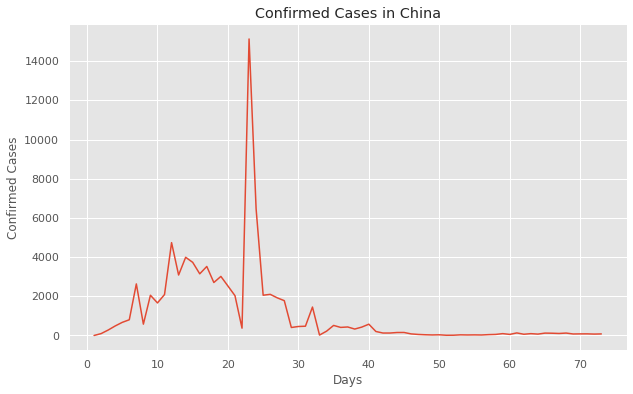

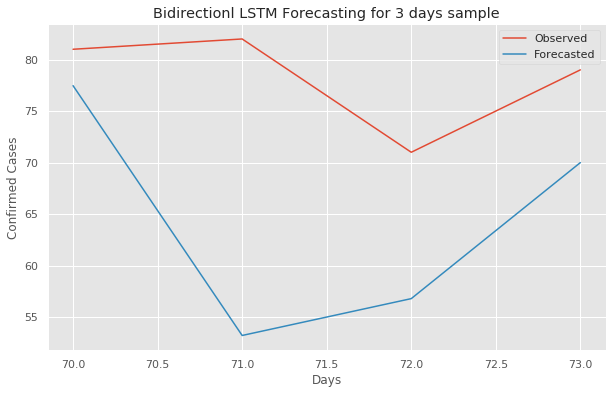

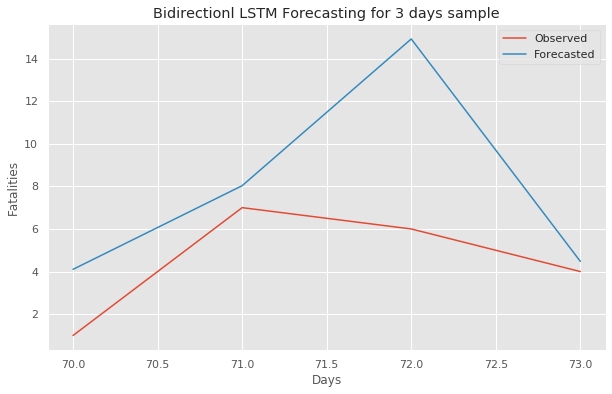

In [161]:
#Country Model
#def train_country_forecast1(w3_df,country,epochs):
no_of_epochs=3500
country="China"

country="China"
w3_df=pd.read_csv('train.csv')
w3_df1=w3_df
w3_df=w3_df.groupby(['Country_Region','Date'])['ConfirmedCases','Fatalities'].sum()
w3_df=w3_df.reset_index()
w3_df=w3_df[w3_df['Country_Region']==country]
w3_df['New Cases']=w3_df[w3_df['Country_Region']==country]['ConfirmedCases'].diff()
w3_df['New Fatalities']=w3_df[w3_df['Country_Region']==country]['Fatalities'].diff()
w3_df=w3_df.fillna(0)

w3_df['days']=[i for i in range(1,74)]
#print(w3_df.head())



x=w3_df['Country_Region']
time=w3_df['days']
y=w3_df['New Cases']
#z=w3_df.iloc[:,3]
time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")
#time.shape

time=np.array(time)
series=np.array(series)
split_time = 69
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 2
batch_size = 3
shuffle_buffer_size = 69

# Bidirectional LSTM
print('-'*20+"Training for Confirmed Cases"+"-"*20)

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

country_model_emerging_cases = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True,activation="relu")),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation="relu")),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


country_model_emerging_cases.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
history = country_model_emerging_cases.fit(dataset,epochs=no_of_epochs)

plt.figure(figsize=(10, 6))

plt.plot(time, series)
plt.title("Confirmed Cases in {}".format(country))
plt.ylabel("Confirmed Cases")
plt.xlabel("Days")
#plt.legend()

forecast=[]
for time in range(len(series) - window_size):
    forecast.append(country_model_emerging_cases.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
#print(forecast)

plt.figure(figsize=(10, 6))

plt.plot( time_valid, x_valid,label="Observed")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for 3 days sample")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.xlabel("Days")

w3_df=w3_df1
w3_df=w3_df.groupby(['Country_Region','Date'])['ConfirmedCases','Fatalities'].sum()
w3_df=w3_df.reset_index()
w3_df=w3_df[w3_df['Country_Region']==country]
w3_df['New Cases']=w3_df[w3_df['Country_Region']==country]['ConfirmedCases'].diff()
w3_df['New Fatalities']=w3_df[w3_df['Country_Region']==country]['Fatalities'].diff()

w3_df=w3_df.fillna(0)

w3_df['days']=[i for i in range(1,74)]
#print(w3_df.head())


print('-'*20+"Training for Fatalities"+"-"*20)
x=w3_df['Country_Region']
time=w3_df['days']
y=w3_df['New Fatalities']
time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")
#time.shape

time=np.array(time)
series=np.array(series)
split_time = 69
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 2
batch_size = 3
shuffle_buffer_size = 69

# Bidirectional LSTM

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

country_model_emerging_fatalities = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True,activation="relu")),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation="relu")),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


country_model_emerging_fatalities.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
history = country_model_emerging_fatalities.fit(dataset,epochs=no_of_epochs)



forecast=[]
for time in range(len(series) - window_size):
    forecast.append(country_model_emerging_fatalities.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
#print(forecast)

plt.figure(figsize=(10, 6))

plt.plot( time_valid, x_valid,label="Observed")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting for 3 days sample")
plt.ylabel("Fatalities")
plt.legend()
plt.xlabel("Days")

#return country_model_cases, country_model_fatalities


print('-'*100)


# Testing the Forecasting model

In [153]:
def country_wise_forecast(country):
    w3_df=pd.read_csv('train.csv')
    #country_model_cases=tf.keras.models.Sequential()
    #country_model_fatalities=tf.keras.models.Sequential()

    #country_model_cases,country_model_fatalities=train_country_forecast1(w3_df,country,epochs)
    df=pd.read_csv("test.csv")
    df1=pd.read_csv('train.csv')
    df1=df1.groupby(['Country_Region','Date']).mean()
    df1=df1.reset_index()
    df1=df1[df1['Country_Region']==country]

    df2=pd.DataFrame()
    df2["days_test"]=[x for x in range(1,108)]

        
    df3=df1.groupby(['Country_Region','Date']).mean()
    df3=df3.reset_index()
    df3=df3[df3['Country_Region']==country]
    #df3=df3.reset_index()
    df2=df2.reset_index()
    df4 = [df3, df2]
    df_test = pd.concat(df4, axis=1)
    Date=pd.date_range(start=df_test['Date'].tolist()[0],periods=107)
    
    x=df_test.iloc[:,0]
    time=df_test.iloc[:,6]
    dates=Date
    y=df_test.iloc[:,3]
    time=time.to_numpy(dtype="float32")
    dates=dates.to_numpy(dtype="float32")
    series=y.to_numpy(dtype="float32")

    time=np.array(time)
    dates=np.array(dates)
    series=np.array(series)
    split_time = 71
    time_train = time[:split_time]
    dates_train=dates[:split_time]
    x_train = series[:split_time]
    time_valid = time[split_time:]
    dates_valid=dates[split_time:]
    x_valid = series[split_time:]

    
    window_size = 2
    batch_size = 3
    shuffle_buffer_size = 73


    forecast=[]
    for time in range(len(series) - window_size):
        #print(time)
        z=country_model_cases.predict(series[time:time + window_size][np.newaxis])
        #print(z)
        if time >= 71:
            series[time+window_size]=z
            #print(series)
        forecast.append(country_model_cases.predict(series[time:time + window_size][np.newaxis]))




    forecast = forecast[split_time-window_size:]
    results = np.array(forecast)[:, 0, 0]
    print('-'*80)
    print('-'*20+'Forecasting in {}'.format(country)+'-'*20)
    print('-'*80)
    plt.figure(figsize=(20, 10))

    plt.plot( Date[split_time:], x_valid,label="Real")
    plt.plot(Date[split_time:], results,label="Forecasted")
    plt.title("Bidirectionl LSTM Forecasting for Cases in {}".format(country))
    plt.ylabel("Number of Cases".format(country))
    plt.xlabel("Days")
    plt.legend()
    
    
    
    x=df_test.iloc[:,0]
    time=df_test.iloc[:,6]
    dates=Date
    y=df_test.iloc[:,4]
    time=time.to_numpy(dtype="float32")
    dates=dates.to_numpy(dtype="float32")
    series=y.to_numpy(dtype="float32")

    time=np.array(time)
    dates=np.array(dates)
    series=np.array(series)
    split_time = 71
    time_train = time[:split_time]
    dates_train=dates[:split_time]
    x_train = series[:split_time]
    time_valid = time[split_time:]
    dates_valid=dates[split_time:]
    x_valid = series[split_time:]


    window_size = 2
    batch_size = 3
    shuffle_buffer_size = 73


    forecast=[]
    for time in range(len(series) - window_size):
        #print(time)
        z=country_model_fatalities.predict(series[time:time + window_size][np.newaxis])
        #print(z)
        if time >= 71:
            series[time+window_size]=z
            #print(series)
        forecast.append(country_model_fatalities.predict(series[time:time + window_size][np.newaxis]))




    forecast = forecast[split_time-window_size:]
    results = np.array(forecast)[:, 0, 0]

    
    plt.figure(figsize=(20, 10))
    

    plt.plot( Date[split_time:], x_valid,label="Real")
    plt.plot(Date[split_time:], results,label="Forecasted")
    plt.title("Bidirectionl LSTM Forecasting for fatalities in {}".format(country))
    plt.ylabel("Number of Fatalities".format(country))
    plt.xlabel("Days")
    plt.legend()    
    

In [177]:
def country_wise_emerging_forecast(country):
    w3_df=pd.read_csv('train.csv')
    #country_model_cases=tf.keras.models.Sequential()
    #country_model_fatalities=tf.keras.models.Sequential()

    #country_model_cases,country_model_fatalities=train_country_forecast1(w3_df,country,epochs)
    df=pd.read_csv("test.csv")
    df1=pd.read_csv('train.csv')
    df1=df1.groupby(['Country_Region','Date']).mean()
    df1=df1.reset_index()
    df1=df1[df1['Country_Region']==country]

    df2=pd.DataFrame()
    df2["days_test"]=[x for x in range(1,108)]

        
    df3=df1.groupby(['Country_Region','Date']).mean()
    df3=df3.reset_index()
    df3=df3[df3['Country_Region']==country]
    #df3=df3.reset_index()
    df2=df2.reset_index()
    df4 = [df3, df2]
    df_test = pd.concat(df4, axis=1)
    Date=pd.date_range(start=df_test['Date'].tolist()[0],periods=107)
    
    x=df_test.iloc[:,0]
    time=df_test.iloc[:,6]
    dates=Date
    y=df_test.iloc[:,3]
    time=time.to_numpy(dtype="float32")
    dates=dates.to_numpy(dtype="float32")
    series=y.to_numpy(dtype="float32")

    time=np.array(time)
    dates=np.array(dates)
    series=np.array(series)
    split_time = 71
    time_train = time[:split_time]
    dates_train=dates[:split_time]
    x_train = series[:split_time]
    time_valid = time[split_time:]
    dates_valid=dates[split_time:]
    x_valid = series[split_time:]

    
    window_size = 2
    batch_size = 3
    shuffle_buffer_size = 73


    forecast=[]
    for time in range(len(series) - window_size):
        #print(time)
        z=country_model_emerging_cases.predict(series[time:time + window_size][np.newaxis])
        #print(z)
        if time >= 71:
            series[time+window_size]=z
            #print(series)
        forecast.append(country_model_emerging_cases.predict(series[time:time + window_size][np.newaxis]))




    forecast = forecast[split_time-window_size:]
    results = np.array(forecast)[:, 0, 0]
    print('-'*80)
    print('-'*20+'Forecasting in {}'.format(country)+'-'*20)
    print('-'*80)
    '''plt.figure(figsize=(20, 10))

    plt.plot( Date[split_time:], x_valid,label="Real")
    plt.plot(Date[split_time:], results,label="Forecasted")
    plt.title("Bidirectionl LSTM Forecasting for Cases/day in {}".format(country))
    plt.ylabel("Number of Cases".format(country))
    plt.xlabel("Days")
    plt.legend()
    '''
    
    
    x=df_test.iloc[:,0]
    time=df_test.iloc[:,6]
    dates=Date
    y=df_test.iloc[:,4]
    time=time.to_numpy(dtype="float32")
    dates=dates.to_numpy(dtype="float32")
    series=y.to_numpy(dtype="float32")

    time=np.array(time)
    dates=np.array(dates)
    series=np.array(series)
    split_time = 71
    time_train = time[:split_time]
    dates_train=dates[:split_time]
    x_train = series[:split_time]
    time_valid = time[split_time:]
    dates_valid=dates[split_time:]
    x_valid = series[split_time:]


    window_size = 2
    batch_size = 3
    shuffle_buffer_size = 73


    forecast=[]
    for time in range(len(series) - window_size):
        #print(time)
        z=country_model_emerging_fatalities.predict(series[time:time + window_size][np.newaxis])
        #print(z)
        if time >= 71:
            series[time+window_size]=z
            #print(series)
        forecast.append(country_model_emerging_fatalities.predict(series[time:time + window_size][np.newaxis]))




    forecast = forecast[split_time-window_size:]
    results = np.array(forecast)[:, 0, 0]

    
    plt.figure(figsize=(20, 10))
    

    plt.plot( Date[split_time:], x_valid,label="Real")
    plt.plot(Date[split_time:], results,label="Forecasted")
    plt.title("Bidirectionl LSTM Forecasting for fatalities/day in {}".format(country))
    plt.ylabel("Number of Fatalities".format(country))
    plt.xlabel("Days")
    plt.legend()    
    

--------------------------------------------------------------------------------
--------------------Forecasting in India--------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------Forecasting in India--------------------
--------------------------------------------------------------------------------


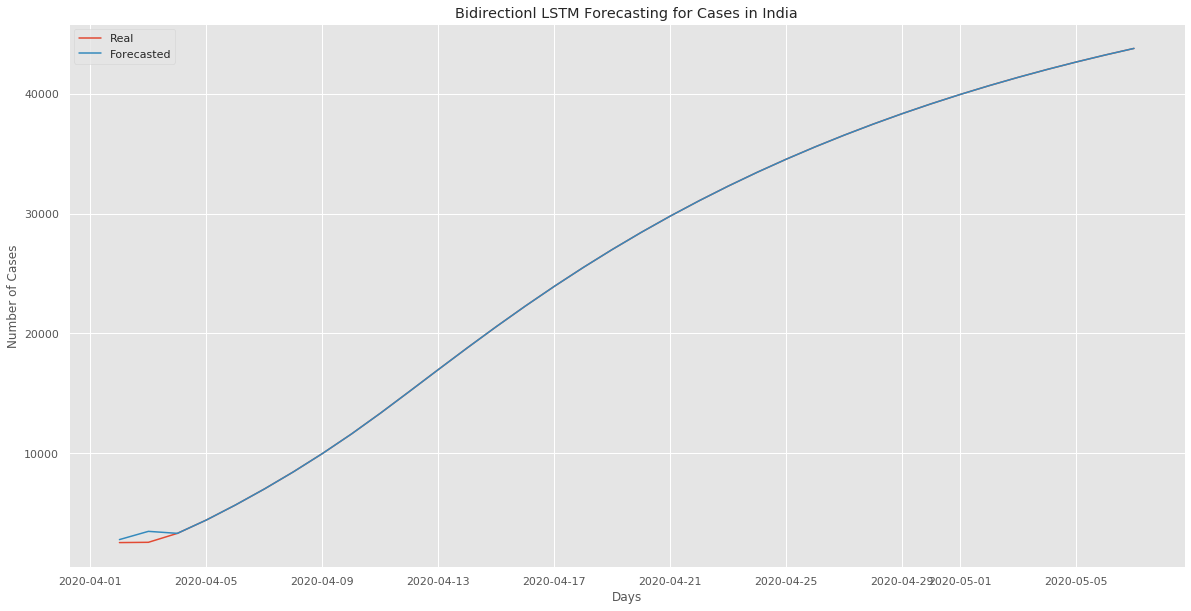

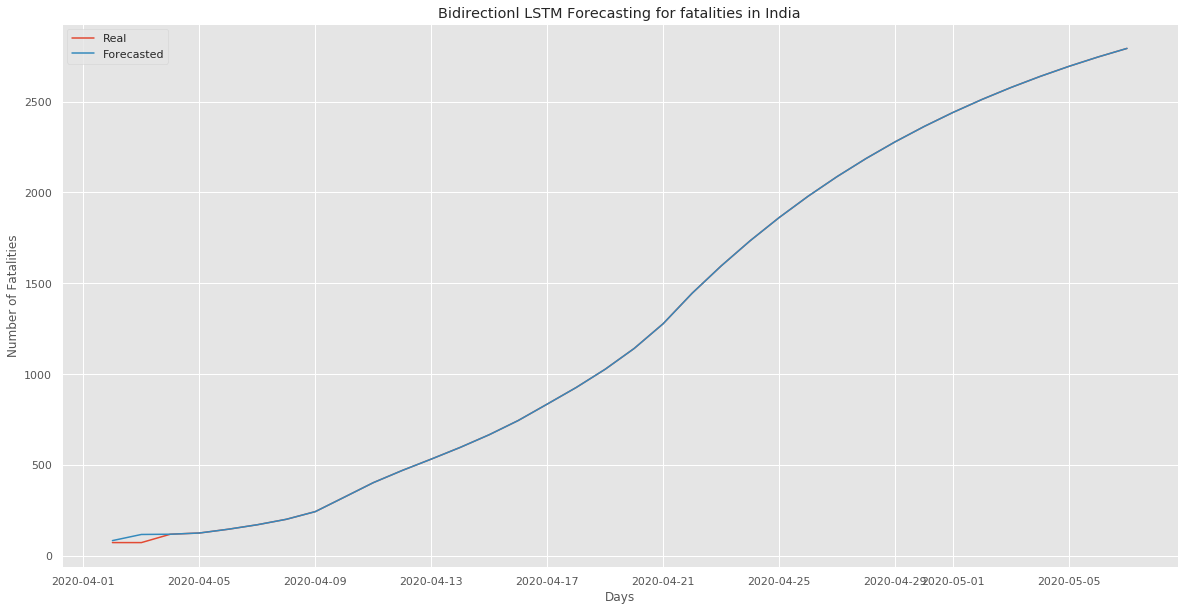

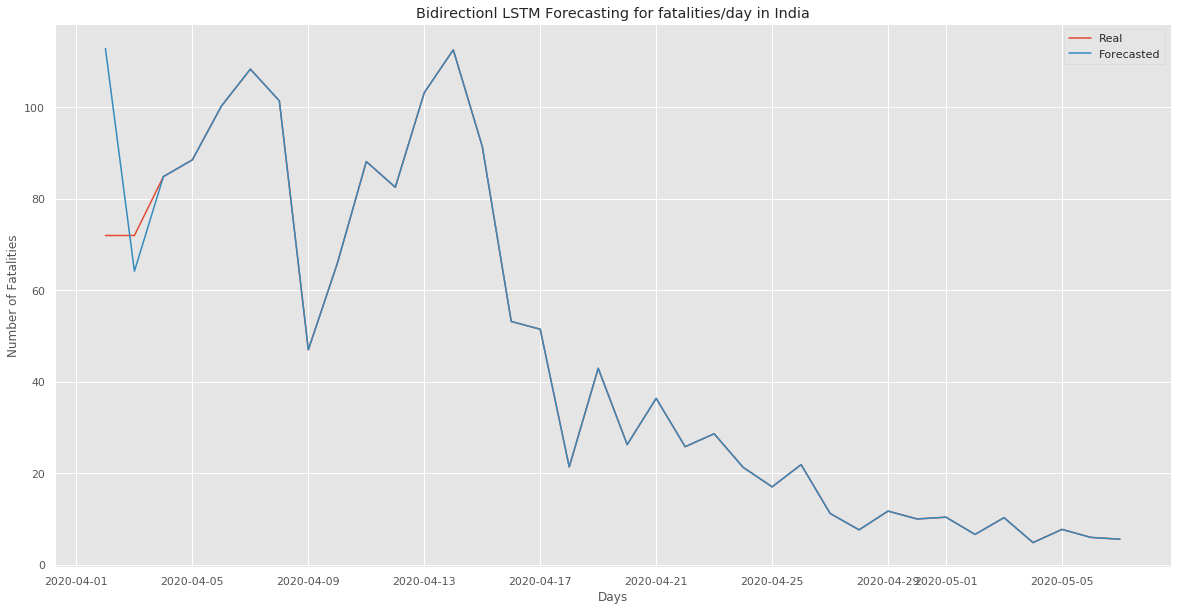

In [178]:
country_wise_forecast('India')
country_wise_emerging_forecast('India')

--------------------------------------------------------------------------------
--------------------Forecasting in US--------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------Forecasting in US--------------------
--------------------------------------------------------------------------------


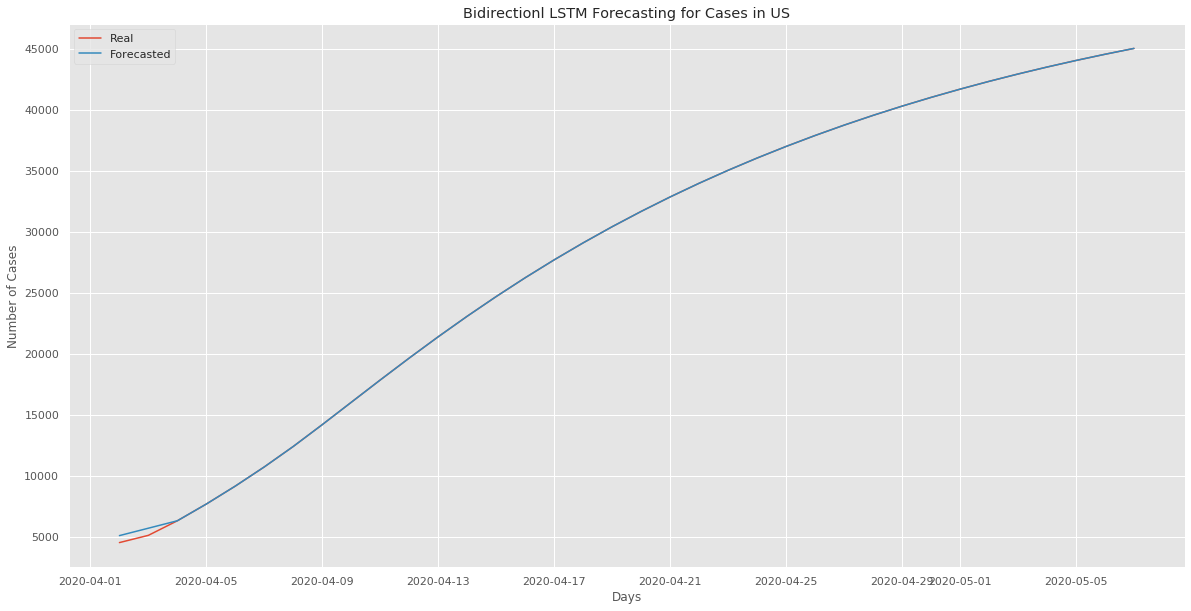

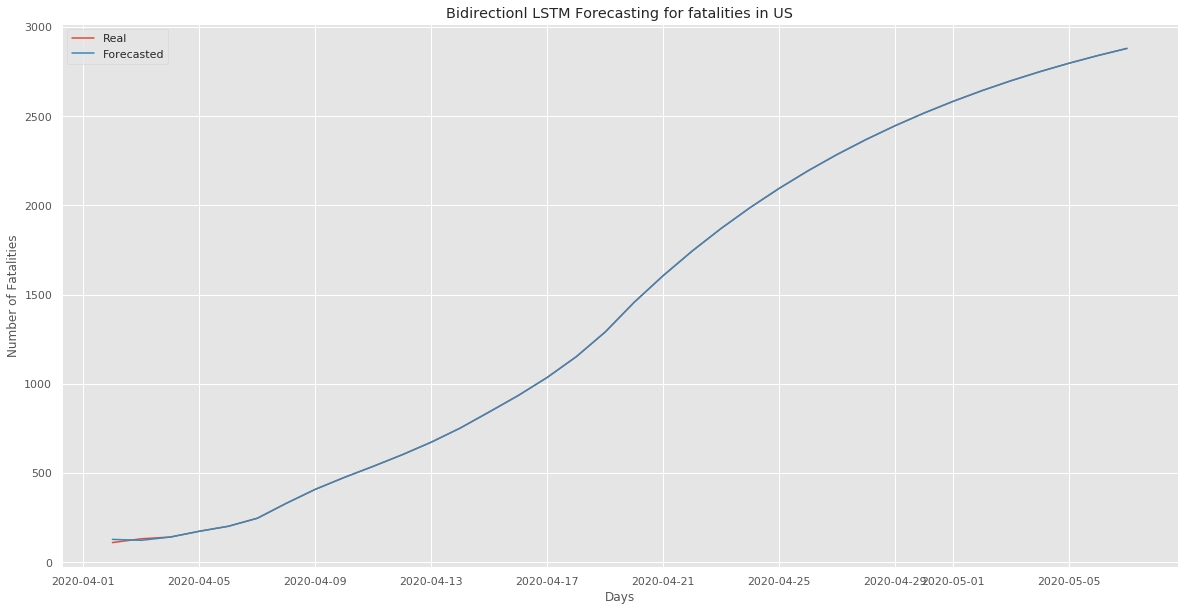

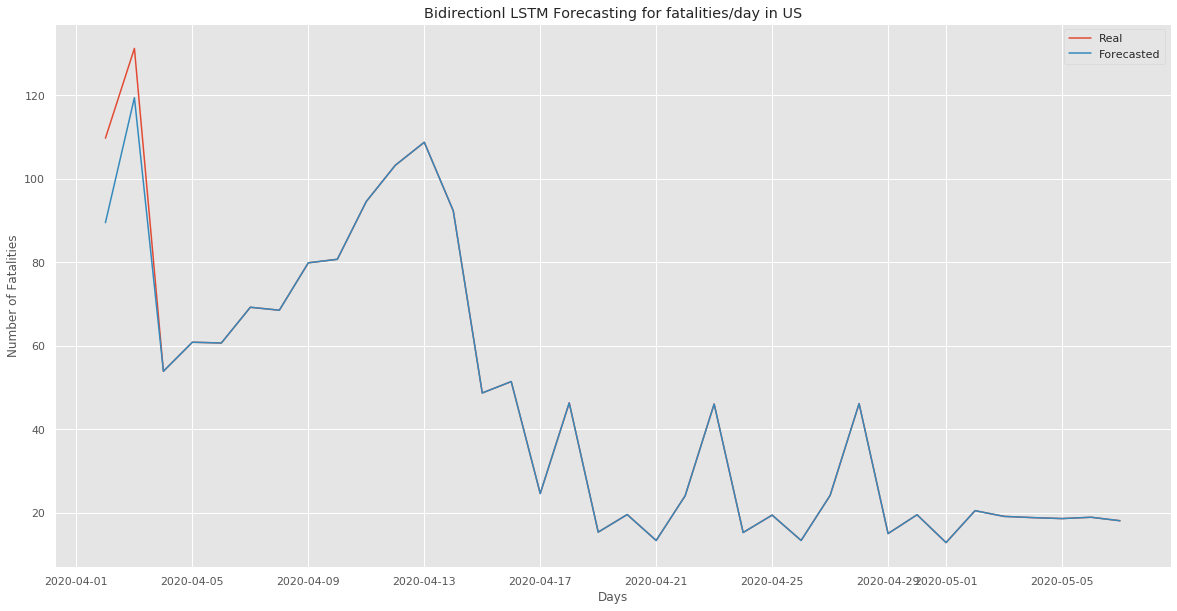

In [179]:
country_wise_forecast('US')
country_wise_emerging_forecast('US')

from IPython.display import HTML

HTML(
'''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();}
 else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')